In [89]:
import os
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [90]:
train_df = pd.read_csv('raw.csv', sep=';', encoding_errors='ignore')

# Análise Exploratória

In [91]:
train_df.shape

(70783, 46)

In [92]:
train_df.columns

Index(['AVISO_CIRURGICO', 'EMPRESA', 'RGHC', 'PACIENTE', 'IDADE', 'SEXO',
       'COD_PACIENTE', 'COD_ATENDIMENTO', 'DT_AVISO_CIRURGIA',
       'DT_AGENDAMENTO', 'USUARIO_INDICACAO', 'FILA', 'COD_CIRURGIA_MV',
       'DESC_CIRURGIA', 'COD_FATURAMENTO', 'DESC_FATURAMENTO', 'LATERALIDADE',
       'ESPECIALIDADE', 'GRUPO_CIRURGIA', 'SUB_GRUPO_CIRURGIA', 'TP_CIRURGIA',
       'CONVENIO', 'UTI', 'CENTRO_CIRURGICO', 'SALA_CIRURGICA', 'PRESTADOR',
       'FUNCAO_PRESTADOR', 'SITUACAO', 'DT_ENTRADA_SALA', 'DT_SAIDA_SALA',
       'TEMPO_SALA', 'DT_INICIO_ANESTESIA', 'DT_FIM_ANESTESIA',
       'TEMPO_ANESTESIA', 'DT_INICIO_CIRURGIA', 'DT_FIM_CIRURGIA',
       'TEMPO_CIRURGIA', 'USUARIO_CONFIRMACAO', 'LOCAL_POS_CIR', 'ORDEM',
       'FINANCIAMENTO', 'MES_ENTRADA', 'DIA_SEMANA', 'SUS_SS', 'ANESTESIA',
       'MODALIDADE_CIRURGIA'],
      dtype='object')

In [93]:
train_df.head()

,AVISO_CIRURGICO,EMPRESA,RGHC,PACIENTE,IDADE,SEXO,COD_PACIENTE,COD_ATENDIMENTO,DT_AVISO_CIRURGIA,DT_AGENDAMENTO,...,TEMPO_CIRURGIA,USUARIO_CONFIRMACAO,LOCAL_POS_CIR,ORDEM,FINANCIAMENTO,MES_ENTRADA,DIA_SEMANA,SUS_SS,ANESTESIA,MODALIDADE_CIRURGIA
0,546,ICHC,13747116I,PAULO SERGIO DE JESUS,45,M,3998547,412464,28/05/2015 12:23,06/05/2016 07:00,...,02:45,CAROLINA.TERTULIANO,RPA,1/3,M,mai/16,sex,SUS,GERAL - BALANCEADA,ASSISTENCIAL
1,549,ICHC,13977056B,PATRICIA DE ARAUJO SILVA,35,F,3369970,444036,28/05/2015 12:31,14/06/2016 16:00,...,02:33,ALINE.PESSOA,RPA,2/3,M,jun/16,ter,SUS,GERAL - BALANCEADA,ASSISTENCIAL
2,564,ICHC,13679495H,KAREN TELES SILVA,20,F,3948849,406655,28/05/2015 15:44,29/04/2016 11:30,...,00:10,NUBIA.OLIVEIRA,UNIDADE,2/3,M,abr/16,sex,SUS,GERAL - BALANCEADA,ASSISTENCIAL
3,709,ICHC,88231673E,BEATRIZ VIEIRA SANTOS WATERMAN,11,F,4941215,308343,01/06/2015 18:30,09/11/2015 10:30,...,00:10,PEDRO.RAMOS,NaN,2/3,M,nov/15,seg,SUS,NaN,ASSISTENCIAL
4,975,ICHC,13838985F,MARIA CLARA DE CARVALHO GREGIO,13,F,4445152,713023,15/06/2015 17:12,17/02/2017 07:00,...,00:55,ANA.FERREIRA110,RPA,1/2,M,fev/17,sex,SUS,GERAL - BALANCEADA,ASSISTENCIAL


In [94]:
train_df.DESC_CIRURGIA

0                     MASTOIDECTOMIA SUBTOTAL  (PRINCIPAL)
1              TIMPANOPLASTIA (UNI/BILATERAL)  (PRINCIPAL)
2              TIMPANOPLASTIA (UNI/BILATERAL)  (PRINCIPAL)
3             AMIGDALECTOMIA C/ ADENOIDECTOMIA (PRINCIPAL)
4             AMIGDALECTOMIA C/ ADENOIDECTOMIA (PRINCIPAL)
                               ...                        
70778    CURATIVO GRAU II C/ OU S/ DEBRIDAMENTO  (PRINC...
70779    AMPUTACAO/DESARTICULACAO DE MEMBROS INFERIORES...
70780                              COLOSTOMIA  (PRINCIPAL)
70781              CRANIOTOMIA DESCOMPRESSIVA  (PRINCIPAL)
70782    AMPUTACAO/DESARTICULACAO DE MEMBROS INFERIORES...
Name: DESC_CIRURGIA, Length: 70783, dtype: object

In [95]:
for x in range(len(train_df.columns.values)):
    print(train_df[train_df.columns.values[x]].value_counts())

167332    7
71754     7
197567    7
91880     6
172711    6
         ..
89414     1
89423     1
89443     1
89445     1
283642    1
Name: AVISO_CIRURGICO, Length: 63646, dtype: int64
ICHC    70783
Name: EMPRESA, dtype: int64
91676601G    38
6075536D     34
6159397K     24
15162702I    24
15143655B    21
             ..
14190629K     1
13709379E     1
14169458F     1
15145160C     1
2639294E      1
Name: RGHC, Length: 48217, dtype: int64
RODRIGO MAX DA SILVA               38
BRUNO RAMON SANTOS CORONADO        34
MARIA APARECIDA DA SILVA           33
ALEX FABIANO MOREIRA               24
PEDRO BELORT NEVES IDELFONSO       24
                                   ..
CLAUDIO DI BIASE                    1
REJANE MARIA DA COSTA ALEXANDRE     1
CRISTIANE APARECIDA AQUINO          1
ERICK ELI BARRIENTOS                1
RUTH OSTELONIZ CARRINHO             1
Name: PACIENTE, Length: 47411, dtype: int64
 64     1363
 63     1360
 65     1325
 56     1300
 67     1279
        ... 
 121       1
-22   

05/10/2015 07:10    15
25/07/2019 07:30    12
01/10/2015 07:10    11
14/02/2020 07:30    10
17/09/2015 07:10    10
                    ..
05/10/2017 09:33     1
06/10/2017 14:51     1
04/10/2017 08:30     1
05/10/2017 14:00     1
08/08/2021 16:25     1
Name: DT_INICIO_ANESTESIA, Length: 55194, dtype: int64
09/05/2017 18:30    9
17/09/2015 07:22    9
09/12/2019 17:30    8
03/07/2018 17:30    8
05/10/2015 07:22    7
                   ..
10/10/2017 15:05    1
04/10/2017 21:45    1
10/10/2017 11:20    1
05/10/2017 11:15    1
08/08/2021 22:00    1
Name: DT_FIM_ANESTESIA, Length: 57967, dtype: int64
03:00       713
02:30       707
03:30       687
02:00       658
04:00       627
           ... 
31:00:00      1
20:58         1
45:20:00      1
41:34:00      1
23:37         1
Name: TEMPO_ANESTESIA, Length: 1435, dtype: int64
05/10/2015 07:11    14
01/10/2015 07:11    11
31/01/2017 08:30    10
08/02/2019 08:30    10
02/09/2016 08:00     9
                    ..
25/10/2017 16:30     1
25/10/2017 

In [96]:
# contagem dos duplicados

In [107]:
print(train_df.duplicated(subset=['AVISO_CIRURGICO'], keep=False).sum())
print(train_df['AVISO_CIRURGICO'].count() - train_df.duplicated(subset=['AVISO_CIRURGICO'], keep=False).sum())

13089
57694


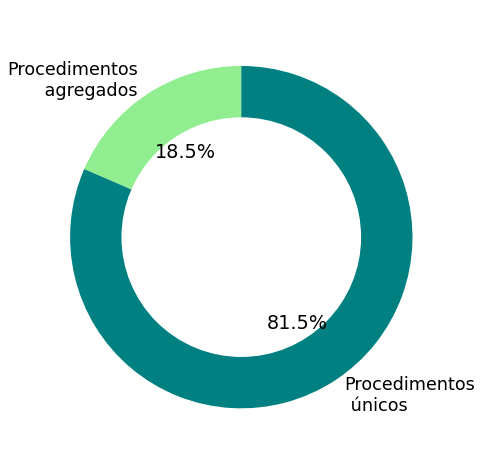

In [117]:
# Lateralidade e missing
sns.set_context("paper", font_scale= 2)
# Pie chartdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnkAAAGeCAYAAADooBcGAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABipElEQVR4nO3dd5xddbX//9fKTJiUIZ0MJCRBxQJXFBBQxILSvRas2EVEv4peK/aLoniv+lOuYsPrVSlewYbtYlewi3RFBFSQBAJMSEJ6ZshM1u+PvQ85s+fMnPY5e5/9mffz8TiP5OzZZa2ZZGbNp5q7IyIiIiJxmVZ0ACIiIiISnoo8ERERkQipyBMRERGJkIo8ERERkQipyBMRERGJkIo8ERERkQipyBMRaYOZnWlmXvW6Pcdn35559pl5PVtEul9v0QGIiEzEzAx4EPBIYC9gPrATuA9YC1zj7quKi1BEpHupyBORrmJm+wFPA54KPBHYvc75dwEXA59z99s6H6GISDmou1ZEuoKZvc3MbgD+CnycpNCbtMBLLQHeBvzdzD5mZn0dDFMaYGbnZ7qRf1l0TCJTkYo8EekWbyHplm3VNOB04A9mtiBMSCIi5aXuWhHpZuuA3wC/Bm4D1gA7gAHgcOClwIrMNQcBPzazI919W46x5s7d9yk6BhHpXiryRKTbjACXAl8CfuTuoxOc94N0NunpwFmM/X52KPAe4N87GKeISFdTd62IdIsR4ELg4e7+bHe/dJICDwB3H3H3jwCvrPHh081soBOBioiUgYo8EekWT3T3V7QyQ9bd/xf4euZwH/CsIJGJiJSQijwR6Qrufkebt/hkjWPHtHlPEZHS0pg8EYnFlcD9wG5Vx/YuKJZxzGwF8FhgGUkr4zrgDuA37r65wLimA48gmdm8iGTZGge2AuuBfwJ/c/d7i4qxlnSh7IOAfYHFwBySeNcAN7j73zvwzL2Ax7FrYe4twK3AH/P8/JhZP3AY8LA0DiNZHPzb7r62zrXTgAcD+wFLST5vPSQLjK8D/uzut3Qu+jFxHAIcAOyRHr4HuMrdb2ziHgcBjyL5N7AzvcfV7n5T8KDLyN310ksvvR54ASeT/JCvfv0QsCbv8wiSH4LV97kDWNTB2O/OPO+WHD5fZ2aeeXvm488C/ljjc1p53Q98F9ivhWffnrnXmU1c+xjgAmDTJLFVv24DzgeeAUyvcb9fNnifiV7nNxj3Q4HzSIq5ye53K/ARYEGAr/EJJDO8Ryd41ijwY+DxVdccWeO8feo8Z58a1xxZ9fFDgG8DwxPEceQE990beBPwf8DGBr4Wa4DPAw9p8fOV/bdwftXH+oEP1Pn6XQ+cMMn9+0kmVa2e5B43Ac/s9P//bn8VHoBeeunVfa/0h2j2m+a7mrh+JnBD5vodwBM6GHMPScFU/cwrcvhcnZl55u3p8dnANxr4gVr9+XlZk8++PXOPMxu4phf4DBMXLI28xn0da/xgD1rkAdNJuuR3NHnf+4DTWvzazga+1sSzdgL/SdKydmSNj+9T53n71LjmSJKhVf/ZwNfsyBr3vCCNq5WvyQjwIWBak5+37L+F89Pjj2b8v9nJXh+uce8DgX80cY9PdPp7QDe/NCZPRGp5PZDtMjnLzI5o8PrPMn5h4zPc/bdtRzax/UkKgWp3dvB5EzKzWcBPgOc3cVkvcIGZPbszUT3gYpKvb2m+/5vZ7iStyW+i+WFG84DPmtkn0i7eRp85G/gBcFITzzLg3cB/NRVhfeem923la/YvJHG1ogd4L/DNZj53tZjZo0laQ1c0cdm7zOz0qnscQlJAPqSJe7zZzN7TxPlR0Zg8ERnH3beZ2fOBq0haMyD5fvE1MzvIJxn3Y2YvZ/ySJj8CPtqRYHd5eY1jl3X4mRP5MlApiHeQdLH9mGR822aS8UNPAl4DLKy6zoBzzeyX7n5f6KDSr83zMod3knx9fgrcQjKubQfJ2LwFJGO3DiSZxDLZTiK/IhkXBkm3YvUP87Xpxydz1QQxG3AJcHSND19B0tJ2Yxr3AMm4x5eQjNWr9maScYaNrp14HvDkGsd/TzKT+0aSVsI9gIOBF5GML6s8q6fB59TzKpJFvytuAL5F8vlaQ/J1WgE8l6TlbTKrgMuBv5B8rTeQ/HucQTIe8wCS7vjDM9c9h2Tdyf9oMYe5wPdIxv9BMmzjIpKFzgfT5z+SJNdDMtf+h5l9l2RYwXfTe0HyC1zlHveQjHN9JHBqjXu8z8y+6R0Yp9n1im5K1Esvvbr3BbyM8d0fE47PIykIsuPw7qSD4/DS584nGTRe/dxRYO8cPkdnZp5b3TV2BfDQSa5dAPyhxuf47Q0++/bMdWfWOf+6zPm3AQc0+Kwe4CkkBcbj6px7fuY5v2zj8/u2Gp+fzcCLJrlmOvDBGteNkizVU++Zz61x7RbgpEmumQa8kaTQqjwrRHdt5TVEUsA0Ozb2hyS/YO3fxDWHk4xpq37+DmBZg9f/cpL/E2cDMyf5HJ5dI/f/ISmsK+8/Xucen6hxj8+3+m+wzK/CA9BLL726+wV8scY3zHHj84BZJC0E2R8MHRuHV/XsL9SI8eKcPj9nTvBD+XfArAauX0zSIlR97V8bfPbtmevOrPOcbIxHdOhzcn7mOb9s8T7zSVrfqu81DDylwetPr5Hz9XWumUbS4pr9d/zUBp/58gn+PbRT5I0yyUSEOvdsqiisum4hyeSV6jg+2uC1v5wgj7MaiZfkl6Pq66rH2k74bzxzjysz97gP2K0T/967+VWaMRkiUph/I+kiqnaWmT0hc+xzJON/qnV6HB5m9izg1ZnD24F3dfK5dWwjaWmqu3euu68hGXNVbT8zWxQ4pmWZ9/e5++8CPyO0V5P88lDtI+5+eSMXu/vHgZ9nDj/azI6c5LITSIqtap9y94a6/t39QuA7jZzbhM+4+49audDTqqeF69YBb88cfmEr90pdRfILUb3nOklLXLXKWNs/krTQNnKPszOH55FM/JhSVOSJyKTcfTvJBIItVYd7gYsrhYiZnQy8InPpj+nwODwzezjJ7MGsd7r7yk4+u44L3H1VE+fXKgoODhVMKtQYsTy9KvN+PfDhJu9xeo1jp05y/ssy7++n+bFo72/y/MmM0vnxrBP5AWPH+S03syUt3uvDXmebwio/Iml9y/qIu+9s4h5ZBzV4bTRU5IlIXZ4sjvr/Mof3Bi40s0eSzKattppkOZCWWhEaYWYLgUvZNRC74nskS4QU6RtNnn8DybilatmWt3atzryfb2bPDPyMYNJ9hx+WOXyxuw81cx93/xNwTebwEye5JDuD/Efuvr7JZ94A/LmZayZxmbvfFeheTXH3YZLJHdUe08KthkgKxkafu4nxM+NbuUd2F53ljV4fCxV5ItIQd7+IZOxbtRNIZhtWd6mNknRVTrryfjvS5S0uZfwMyr8Ar+hkcdkAJ+lWavyCpHDZlDmcLV7b4u6rSWZUVrvIzP4tXfKl22RneAL8rMV7/STzvmaLVHosu0tKq8MNQg1TaOrf0mTMrNfMjjezj5jZD8zs72a2xsy2m5nXegHZz9Mete5dx/Xufn+T12R3ELnO3Xe0eY85Nc+KmIo8EWnGm4A/ZY7tnnl/hrv/plMBmFkfSffm4zIfug04zt03durZDdqYdnE3K7u1WX+IYDL+v8z72cCngLvN7GtmdoqZPbQDz21FrTiubfFeta7LthICPKjGsVZb5EK15N3c7g3MrM/M3gvcRdKN+U7gaSS/JO1BsoRJo+a3EMLdLVyzJfP+ngD36MT/qa6mdfJEpGHuPpSun3cN44s7SMbhfaRTzzezXpKlFI7JfGg1cHRR3VoZ2Ra5RmW7a4P/Eu7uX04nzGTXMZxDsujvSQBmtpZkdvCvgJ96g3uJBpYtJpzxXc6NqrUodq1iZV6NY63uSRuqJXtDOxeb2T4kLZm1itpWtFIotbI3c7Y1PsQ9plzDloo8EWmKu//dzL7F+ELhfuDkTnWVppuRf4VkL9hqa4Cj3P2fnXhuC4rsKq7L3U8xs+tIZjpOtLjxIpLP87MAzOxGkhnAX0zHaeUhW4RtbWLQfVat1t1auc+rcayV4gJaL/aztrZ6oZntSVKoTzQWbTtJAXxX+vchkuEW1U5g7HCMVna+CPF/oqv/X3UrFXki0hQzO4rxM2kBdiPZweGsDjzTgC8xfgmH9SQteNmxZjIJd/+0mV0AvJjkc3o4yddvIv9CMpnldDN7ibv/Pocws8VE6B/yte5Xq4Cd7PMymVavC+njjC/w7iGZKHUp8Od6hbOZraxxDymJKdd0KSKtS1sGvsrE3zveb2ZP7sCjzwVOzhzbRDIGL7uGnzTA3Te5++fd/UiSFqynkiz98TMmbr3aB/iFmT0+hxCzM1r709bcVtSaxHJfjWMbahxrdbB+oYP8027al2QOX02yw8mH3P36BltGg04AknypyBORhqQ/YL9Ksj9oteolLXpI1s9bHPC55zB++ZatJDsAXB3qOVOZu29398vd/YPufixJV+mTgHMYX/jMAM5Lx0d2UrYIM8bP9GzU0gbuD7XH0T24xWc+pMXrQnlG5r0DL21m1ruZTWcKzkiNiYo8EWnU+0hae6p9mvEL1u4FfKWNVpcHmNlHSfYDrbYdeEZOXYZTkruPuvtv3P3NJMVKdumShzH+30JotTaTb3WB6Fpru/2txrG/Mr7LttVnFr3wbvb517QwrOFgWhuDJ11CRZ6I1GVmTwHOyBy+Bjg9XT/vi5mPHQu8u81nfgB4R+bwMPDsRre1kvalCwG/hGRiTbXstnbVst2ArRQKtYr4o1u4D4yfjb2y1kzsdC236zOHsxN96krXHcw+M2/Z1vTbWrjHUSECkeKoyBORSaU7D1zE2O8XG4EXVC1w+kbG72/7ATN7UovPfCdJy2G1HcDz3T27sK10mLvfy/h13ybrks/u2TuzhWeuYfzizS9O10lsWLojy6GZw7+e5JLsdlj7mlmzrZYvpvYSQ3nKbmPXVPe6mfUwfpiElIyKPBGZUNU4vD0zHzrV3R9oGUgX/30BY5d7qIzPa2qFfDN7I+PX2hsh2UXj/5q5lwSVLa6yC81Wyy5Z0upYumwL8UKShXyb8fEG7pv92Ejm2Dlm1tBsWTObT/N73XZCdn2/Zrud345m1ZaeijwRmcy/M77L5rPu/q3sie5+M/C6zOElJOPzGuquM7NTgU9mDu8EXu7ulzQUsdRkZoea2f4tXrs/8MjM4Vpj5iqy492WprM9m/VFxq8T924zm2zv2QeY2VuA4zKHr3P3CVvy0u3fvpY5/EiSX1gmbQ0zs36SpUmCTTxqQ3aXj33M7DmNXGhmxwAfCB+S5E1FnojUZGZHMr7L9FrgbRNd4+5fAc7LHD4OeFcDz3sR8N+MHb/lwCnufnH9iKWOI4AbzezHZvZCM2uoO9HMDgC+x9ivywjJ1nITqbXf6ufMbGHD0QLuvoHkF41qM4BL051XajKz6Wb2fuDszIdGgX9r4NFvZfxM2+cAV5nZ0dlJRWa2m5k9l2TIQmV5mX808JxOupTxYyO/PNkSR2bWY2anpddWWi6zrZpSIloMWUTGSZdAuYix43o2ASc1sOPBG4DDSBbQrTjLzH7j7jU3bU/H/V3I+F881wDPMLPschDNeF06pkwSx6WvYTP7DckEmj+RfK4ry4rMBx6RnvevjP+6fCIdM1eTu99sZtcwdlbrCSR75N5AssNC9t/R5e7+2Rq3Owc4nrEtcnOAb5jZ70la3W4kWeplMcm/vZdSe+/b/3D3300Ud1X895rZySSF7PSqDx1IMtP4XjO7OX3mIpJ/69VLjdxBMvHom9lb13t2KO7+DzP7OvCiqsNzgcvM7HvAd0laXHeQfN4eS7Kt3SOqzj8feAqwIoeQpQNU5InIGFXj8PbKfOjV7l63dcLdt6WtLFcBs9PDPcDXzOzACdbpmknt70cDwHMbDr6202l9/9GY9ZHMVm12xuqPGT/Tupa3kxRE1b8oTCcZG1ZrfFjNMX7u7mb2PODbjJ+x+nh2tZzV818kW7k1xN1/YGYnkeyVPD3z4T3SVy2DJIVxrY9nJ6R02ptJPj/VRdo04NnpazK/B04DbupIZJILddeKSNZ7Gf+D/1x3/0ajN3D3m4DXZw4vBS5sdHyeBDfZRIlG7CDp/nxGI/vXpsvcnMT4nSua5u5bSAqnc2i++3ADcJq7v63ZfZXd/TvAIcAVDV7yE+CwdBeWWjtF1NpDt2PS1tZjab5Q+xZwbDqhSkpMRZ6IPCAdr/P+zOHrScYoNcXdLwAuyBw+geZnR0oA7v5FYBlJ68wlJF2mjbibpLh6pLuf7u4NF1npZJl9gFeSdP//mWSsW90isca9dqSLM+9PMu6zXuvsbcBHgYe4+7nNPq/quX8maQ07mmTMaCWHUZKi7VqSfX0f7+7Hu/uq9NJFmVttr1pyKDfu/jeSJWTex+SfMwd+AzzT3Z/v7tkJL1JC1uQvNiIiEgkzW0Iydu1BJOPwZpMseryZpAj8s7v/s7gIJ5a2CB8M7Esypmx3kjGFa4Ab0uKmMGZ2LvDaqkM3uPujiooHHhiKcRDwaJIitJdkrO1twJXNbHkm5aAiT0REJDAzu4Vk+7eKL7t7dgtAkY5Sd62IiEhAZnYsYws8aHxcn0gwaskTEREJJF0Q+RrGFnnbgSXpun8iuVFLnoiISIaZLTWzk9I9XBu9ZiHwf4xvxbtYBZ4UQUWeSHge6jUyMhLsXt3yUk7lecWYV6M53XDDDXcCX3vQgx40csYZZ/j111/vo6OjNc+9++67/eMf/7jvueeea4EjqbJw4UJWr159SjfkVLZXjHkFzqkuddeKhBfsP9WGDRuYN29eqNt1BeVUHjHm1WhOf/nLXzjggAPGHJs1axb77bcfCxcuZObMmWzYsIE77riD2267reY9pk2bxiWXXMKJJ54YIPKJxfh1gjjzCpxT3TVHteOFSBfbuHFjdN/klFN5xJhXOzlt27aNa665pqFz+/v7ueiii3jGM9rZka8xMX6dIM688s5J3bUiXWxoaKjoEIJTTuURY16N5rRgwQIOPrjW7muT6+np4SUveQnXXnttLgUexPl1gjjzyjsnteSJiIhkLFmyhGuuuYaVK1dy2WWXccUVV3DzzTezatUq1q9fz7Zt2+jt7WX+/PksXLiQAw44gCc/+ckcf/zxrFixoujwRQCNyRPpBI3Jm4RyKo8Y81JO5RFjXnmPyVN3rUgXGx0dLTqE4JRTecSYl3IqjxjzyjsnFXkiIiIiEVKRJ9LF1q6Nb79w5VQeMealnMojxrzyzklFnoiIiEiEVOSJdLH+/v6iQwhOOZVHjHkpp/KIMa+8c1KRJ9LFZsyYUXQIwSmn8ogxL+VUHjHmlXdOKvJEutjs2bOLDiE45VQeMealnMojxrzyzklFnkgXe/SjD8ZsetuvbrJy5cqiQwguxpwgzryUU3nEmFfeOanIExEREYmQijwRERGRCGlbM5Hwgv2nmjmzn6Gh4bbv474jQDRhDA0NRTegOsacIM68lFN5xJhX4Jy0rZlImfX09BYdQnAjIyNFhxBcjDlBnHkpp/KIMa+8c1KRJ9LFBgYWFx1CcIODg0WHEFyMOUGceSmn8ogxr7xzUpEn0sV6e9WSVwYx5gRx5qWcyiPGvNSSJyIiIiJt08QLkfCC/afq75/H1q1b275PN0282LJlS3TbFcWYE8SZl3IqjxjzCpxT3YkX8fUFiURkxoy+IEVeNxkeHo7uG3eMOUGceSmn8giZ1/DwMJs3b2br1q3s3LkzyD2rTZs2jdmzZ7P77rvT19c3aRx5fq1U5Il0MY3JK4cYc4I481JO5REiry1btnDvvffS29vLnDlz2Hvvvenp6QkQ3Vijo6Ns2bKFNWvWMDIywh577FGzmNOYPBF5wNy5c4sOIbgNGzYUHUJwMeYEcealnMqj3bw2b97M2rVrWb58OcuWLWPu3LkdKfAAenp6mDt3LsuWLWP58uWsXbuWzZs3jzsv76+VijwRERGJypYtW1i3bh3Lli3rWGE3kZ6eHpYtW8a6devYsmVLrs/OUpEn0sU2btxYdAjBzZs3r+gQgosxJ4gzL+VUHu3kde+99xZS4FVUCr177713zPG8v1aFD/gxs2nAU4EnAIuBLcDfge+4+9oiYxMpWoxjbWIcZxhjThBnXsqpPFrNa3h4mN7e3sIKvIqenh56e3sZHh5+YDJG3l+rIE8zs17gsKpDI+5+ZQPXPQ44D3hYjQ9/xsz+C3ifd9P6DyI5CrFvbbeZbOZZWcWYE8SZl3Iqj1bz2rx5M3PmzAkcTWvmzJnD5s2bH8gl769VqO7a44HfVL1Or3eBmR0O/IKkwLMar+nAO4DvpK19IlPO0qVLig4huNWrVxcdQnAx5gRx5qWcyqPVvLZu3do1S8r09/ePWQYr769VqOLpuewqzgA+O9nJZrYb8FVgZnrI2bWArFe9DDgB+HCgOEVERCRiO3fuLLyrtqKnp6cj6/I1KlSR9yR2FWnrgV/XOf9UYJ+qawzYAVwN/KXqvEqh9yYz2zdQrCKloTF55RBjThBnXsqpPGLMK++c2i7yzGwR8KD0rQM/8/p7pb2OXQUcwM+Avd39MHd/NHAAcGvV+dPTa0SmlMHBNUWHENzAwEDRIQQXY04QZ17KqTxizCvvnEK05GUnTVw/2clmtj/wL1WHNgAnVc+kdfe/knQBV3fbnhQgVpFSGR1VS14ZxJgTxJmXciqPGPMqXUseu1rxKq1yN9U5/9iqvztwgbtvyJ7k7jcAP6i6715mtqKNOEVKZ/ny5UWHENzKlSuLDiG4GHOCOPNSTuURY1555xSiyFuQeb++zvlPTv+sFG+XTHLuTzLvH9VoUCIiIiJTWYgib3bm/fjN2sY6gl0TLjYDv5/k3JvTPyvnx7eehIiIiEgHhCjyLPN++oQnJjNkF6VvHbiiziSN+zLvd28+PJHyWrVqVdEhBLdiRXyjLmLMCeLMSzmVR4x55Z1TiCIv23KX7b6t9sTM+982+azdmjxfpNRmz842lJdf9cKgsYgxJ4gzL+VUHjHmlXdOIYq87P6yD5/k3Mqki0rr32/q3Ht+5n18X3GRScyYMaPoEIIbGhoqOoTgYswJ4sxLOZVHjHnlnVOIIq+yeHGl2/XYWieZ2UyS3Ssq590PXFHn3osrl6d/ZrtvRaIWY0veli1big4huBhzgjjzUk7lEWNeeecUosi7mV1dtgackK6Fl/UqoLJjsAN/cPd6u68/OvP+ny1HKSIiIjKFtF3kufsI8F2SAs+BHuD7Zva4yjlm9nSS/Werd7n4WgO3f0zm/d/bjVekTNatW1d0CMEtWrSo/kklE2NOEGdeyqk8Yswr75xCLb18DvASdhV6DwZ+Z2aV7tX5VR+DZC29iya7oZn1k0zUqBSGd7n7PYHiFREREYlaiO5a3P1a4PPsaqWrFGYL0pdVHXPgTHev1zH9r0Bf1f3+ECJWkTIZGRktOoTgenp6ig4huBhzgjjzUk7lEWNeeecUpMhLvYlk94rqQq/6VTl+nrt/toH7ncyulj+AX4QJU6Q8BgYW1z+pZAYHB4sOIbgYc4I481JO5RFjXnnnFKzIc/dRd38+SXH2J5Kirvp1C/Aqdz+13r3MbD/guKprAf4vVKwiIiIisQs1Ju8B7n4hcKGZ7QEsI5mIsdrd72riNrOBt1S939Lk9SJRGB6uNwG9fGJc+y/GnCDOvJRTecSYV945BS/yKtz9XuDeFq+9Grg6bEQi5bNhw8aiQwhu7ty5RYcQXIw5QZx5KafyiDGvvHMKOSZPRAIbHo5vxXf9dl4eMealnMojxrzyzklFnkgXW758edEhBLdy5cqiQwguxpwgzryUU3nEmFfeOanIExERkWhMmzaN0dHuWH5qdHSUadOKK7VU5ImIiEg0Zs+e3TX73m7ZsqXQPcjN3eufJSLNCPafaubMfoaG2p9h674jQDRhDA0NRTfWJsacIM68lFN5tJrX8PAwa9asYdmyZR2Iqjl33HEHixcvpq8v2dsh8NfK6p3Qsdm1ZnYI8GTgIGA5MAfop/XWQ3f3hwQKT6QU+vpmBCnyukmMP5BizAnizEs5lUerefX19TEyMsLo6Gihu2aMjIwwMjLyQIEH+X+tghd5ZvZS4N3AI7IfavPWanKUKWfevLls3BjXMiobN25k3rx5RYcRVIw5QZx5KafyaCevPfbYgzvuuINly5YVUuiNjo5y5513sscee4w5nvfXKliRZ2azSLY1O5bxBV1la7OWb9/GtSKlVf0bYCyGhuJbFibGnCDOvJRTebSTV39/P+5eSKE3OjrKHXfcwcKFC+nv7x/zsby/VkGKPDPrAX4MHEFSkFUXdNVbk4mIiIh03O67746ZsWrVKnp7e5kzZw79/f0dKfhGR0fZsmULmzZtYmRkhD322GNcgVeEUC15bwGewNgWOwN2AtcBN5LsfrEFdbuKNGxwcE3RIQQ3MDBQdAjBxZgTxJmXciqPEHn19/fT39/P8PAwmzdv5s4772Tnzp0Bohtr2rRpzJ49e8wki1ry/lq1XeSZ2TTgHYwt7kaBTwJnu/s97T5DZKrq7S1u0HCndMv6VSHFmBPEmZdyKo+QefX19dHX18eiRYuC3bMVeX+tQrTkPQ5YRFLkVbpqX+Tu3wpwbxERERFpQYjFkKtn0TpwiQo8kTAWLlxYdAjBrV27tugQgosxJ4gzL+VUHjHmlXdOIYq8xemflckV3wxwTxERERFpQ4gi7/7M+9sC3FNEgK1btxYdQnDdMOMstBhzgjjzUk7lEWNeeecUoshbnXk/PcA9RYQ417+KcWX+GHOCOPNSTuURY1555xSiyLs6/bMyu3bvAPcUEeJsyStys+5OiTEniDMv5VQeMeaVd05tF3nufivwZ3aNyTum3XuKSGL58uVFhxDcypUriw4huBhzgjjzUk7lEWNeeecUoiUP4GPpnwa8yMz2DHRfEREREWlBkCLP3b8K/Dx9Oxs4L93qTEREREQKYO5hdhkzswXA5cABJOPzfgqc7O6DQR4gUh7Btu6bObOfoaHhtu/jviNANGEMDQ1FN6A6xpwgzryUU3nEmFfgnKzeCaG6a3H39cCRwM/SBx8L3GJmZ5vZEWY28WZuIlJTT0+o7aW7x8jISNEhBBdjThBnXsqpPGLMK++cgv4Ecff7zOx44LUke9fOAd6cvnaa2UZgM621dLi7PyRMpCLlMDCwmNtu+2fRYQQ1ODgY3fpXMeYEcealnMojxrzyzqkTzQQvBt5Isl5eZT9bgB5gQfpqRbAuMJGy6O1VS14ZxJgTxJmXciqPGPMqbUuemc0CLgaenvlQiOKsbr+ziIiIiOwSZOKFmU0DfsTYNfIqNw5VoLm7a8aulEGwVuf+/nlBFkTupokXW7Zsia4LJsacIM68lFN5xJhX4Jzq1lehWvLeQFLgVf9wM2AncB1wI3AvsIUu7XY1sxnAfulrEbA7SbzrgZuB69w9aDtruszMocAj02cayefpBuBqdx/V87r3eXmYMaMvul0vhoeHo/vGHWNOEGdeyqk8Yswr75zaLvLSH6zvZGzL3QjwCeAT7n5Pu8/oFDM7BHgGcBTwWCb/fGw3s+8D57j7H9p87hySz9lrSIqRWtaa2ReAj7r7Jj2ve56XJ43JK4cYc4I481JO5RFjXnnnFGIJlcOAvdK/G0mxd5K7v7NbCzwze46Z3QpcBbwPOIL6Be9M4CTg92b2FTOb2+KzHwfcBLyHiQsS0o+9B/hrek1L9Lywz8vb3Lkt/TPrahs2bCg6hOBizAnizEs5lUeMeeWdU4gi71FVf3fg2+7+nQD37aTDgAdP8nEH7gPun+DjLwWuMLPJiopxzOwI4BfAkhofHgJqrXq7FPiFmT2+mWfpeeGfJyIiUiYhirzKkiiVAYDfDHDPvG0EziMp3vYBdnP3Be7eB+wLvAPI7tzxCODSRrdvM7PFwCXArKrDO4CPp8+YRdJa+FDg7PRjFbOAS9J7NETPC/u8omzcuLHoEIKbN29e0SEEF2NOEGdeyqk8Yswr75xCFHnZ1q7bAtwzL38FXgUscfdT3P2r7r6yeoKFu9/q7h8j2a7tt5nrH0syDqwRZwEDVe+3A09397enz6j4h7ufDjwzPadiT+CDTeSm54V9XiFiHJMS4zjDGHOCOPNSTuURY1555xSiyFudeV+GZU5WAa8EHuXuX3b3bfUucPd7SSZp3J750DvrXWtmD06fV+297v7TSZ73Y+CMzOFTzOxBel6+zytSiH1ru01fX3w7HMaYE8SZl3IqjxjzyjunEEXetemfldm1ywLcs6Pc/XPufn6zS2q4+wbgA5nDK8zsgDqXvpVkB5CKfwCfauCRn0zPrZgOvKWB6/S8sM8rzNKltYYbltvq1dnfC8svxpwgzryUU3nEmFfeObVd5Ln730hmN1bG5B0zyekx+C7j1/p7dJ1rnpV5/6VGCsz0nC9nDp9Y7zo9L/jzRERESidESx7Ax9I/DXiRme0Z6L5dJ23NW5c5PGG+ZvYYYO/M4W808cjsucvM7GA9L5/nFU1j8sohxpwgzryUU3nEmFcZx+Th7ucDl6dvZwPnm1l8X51dpmfeT7aLx1My7+9x94Ynp7j7rYyf2ftUPS+35xVqcHBN0SEENzAwUP+kkokxJ4gzL+VUHjHmlXdOoVryAJ5Psn2UkXTZ/jDGFr10bbzsCrWTLfq8f+b9lS089o+Z9/vpebk9r1Cjo2rJK4MYc4I481JO5RFjXqVsyQNw9/XAE4HvkBR6RwE3m9l/mdkTzCyWaTLPrnHsmknOf0TmfStLzPyzzj31vM49r1DLly8vOoTgVq5cWXQIwcWYE8SZl3IqjxjzyjunICWlmWV/0DpJoTcHeFP62mlmG4HNTN69ORF394e0FWgY2XXxbnX3myc5/2GZ93e08MzsNdl76nmde56IiEgphWo33IddhV2lgKv8WZl120OyO8YCWtNKYRiUmb0cOCRz+L/rXDY/876V/Xzvzryfp+fl9jwREZFSCjkmD2oXYh7gVTgz2xv4RObwHcBnJ7lmJuM/x3UXXq5he+Z9r5nN0PM6+7xusGrVqqJDCG7FihVFhxBcjDlBnHkpp/KIMa+8cwpZ5FkHX4Uys+nA1xnfCvm6Ortl9Nc4NtRCCLWuma3ndfx5hZs9uyvDasvWrVuLDiG4GHOCOPNSTuURY1555xSquza7C0RsPgc8PnPsXHf/QZ3rarUOZff6bUStva1m6nkdf15L1q1bx9q1awHo7+9nxowZzJ49e8yA2xUrVjAyMsLg4OADa+EtXbqU4eFhRkZG2LBhAwBLluwFJNubVXa/SK5bw+joyJiJGatWrWL27NkPPK8SC8CGDRsYHExWjpkxYwZz585lxowZ42IaGhpi48aNDA0ldfDAwACjo8k606FyGh5OPv19fX0PrP7e29vLwMAAvb294+65detWhoaG2LJlCwCLFi0CoKenRzl1MKd58+axbt065aScCsmpt7eX9evXP3BP5TQ+p4c//OHUY+5d0RvatczsvcCHMod/Bxzl7pNuLGpmewDZhc5OSPdRbSaGE4AfZg7v4e5r9bzOPa8Nwf5TPfzh+/O3v/297fu47wgQTRi33HJLQ9+cyiTGnCDOvJRTecSYV+Cc6vZ0hh6TFxUzO5XxBd6NwDPqFXipLTWOtTL2q9Y1te6t54V9noiISGmpyJuAmT0X+Hzm8O3Ase5+XyP3cPftwM7M4VkthJPtShx193HjyvS8sM/rBpXu1phUuh1iEmNOEGdeyqk8Yswr75ziW046ADM7GriIZNmXikHgGHe/q8nbbWDshI1WdgHZK/N+siJTzwv7PMmYP+tRbV0/b34/G+5LGk7v2/bnECGJiEgNasnLMLPDge8Cu1Udvo+kwPtHC7f8W+b9shbukb1mskFael7Y5xVqZGS06BCCGx3NNsaWX09PT/2TSijGvJRTecSYV945qcirYmaPIhmQX71uxRaSwf03tHjb7G4YD27hHg/KvL9Jz8vteYUaGFhcdAjBLdoju/Vz+VVmu8UmxryUU3nEmFfeOanIS5nZQ4GfMnb3g2HgWe6e3dC+GX/NvD+shXs8NvN+sqJEzwv7PBERkVJSkQeY2TLg58BA1eER4AXuflmbt788835PM2u49Sk9dyBzOHtPPa9zzytUZf21mNw/3D3LuYQyY0ZXbpjSthjzUk7lEWNeeecUZOKFmbVbCDXC3f2o0Dc1s8UkBd7yqsM7gVe4+/cDPOIaYDWwtOrYC4CPNHj9SZn3d7r7NXpebs8r1IYNG4sOIbhNm1rZia67zZ0bXxc0xJmXciqPGPPKO6dQs2uPpLN7zFon7m9mc4GfAA/LfOg0d78oxDPc3c3se8BpVYdfZWYfc/dJR9WbWQ9wSubw9/S8/J5XtOHhrlzZpS1qySuPGPNSTuURY15559RN3bW57llrZrOAS4EDMx96h7v/d+DHfYKk+7diX+CNDVz35vTcipH0Xnpevs8rTPW2ZbFYsnd8a19Vb0kUkxjzUk7lEWNeeecUssirVaQ18/Iar44Ue2Y2HfgW8ITMhz7k7h8L/bx06ZXzs88ys2MmusbMjgPOyhw+z91v1fPyfZ6IiEgZhequvaDF6wyYS7Kg7YFAX3q8UuR9m85sN3UOcELm2K3AajN7bQv3u8Xd6w3ePwN4JlBZE2MWcKmZnQOcS7KbBiRLgrwWeBMwver6NcD7mohJzwv7PBERkVIx904OpWucme0GPAt4N0nB58A/gKe7e9DFas3sl8CTA97yAnc/uYHnPpFkDGB2Wy2AyuCrWh3220m2U/ttM0HpeWGf14Rg/6lmzuxnaKj9Gbbu4cbBtbvjRV/fdIbTcXmx7HgxNDQU5fihGPNSTuURY16Bc6rb09k1Y/Lc/X53/yZwKPApkuD3BX7dzBIZ3czdfwMcA9xd48MzqF2Q3A0c3UpBoueFfV4R+vri+gYHsFvf9PonlczQUHwTZCDOvJRTecSYV945dU2RV+Huo+7+ZpIxV0ayptl303F0pefuvwP2I1nyY/0kp65Pz9nP3X+v53XH8/I2b158SwjMmTOr6BCC27gxvqVuIM68lFN5xJhX3jmFGpPXCW8mGXO1APgXktmTZ4e4sbsfGeI+bTx/I/BuMzuDpOXyAKAy5fBe4C/AVe4+MsEt9LwCn5envr6++ieVjFryyiPGvJRTecSYV945dW2R5+6bzOxi4PUkLXpvIlCR1y3SouMP6UvPK9nzREREulnXdddmVM9YXWpmBxUWiUgBBgfXFB1CcGvvja8LZmAgu1NeHGLMSzmVR4x55Z1Ttxd5q9M/K7MVH11UICJF6O3tKTqE4Hp6uv3bTvNGRyfdbKW0YsxLOZVHjHnlnVO3f7fNjqGKr6wXERER6YBuL/KWZd7vLCQKkYIsXLiw6BCCm79g96JDCG7t2rVFh9ARMealnMojxrzyzqnbi7ynpX9WFvy7t6hARERERMqka4s8M3sk8ArG7h7wt4LCESnE1q1biw4huG3b4lsWob+/v+gQOiLGvJRTecSYV945dWWRZ2ZHkmxXVb2g1ibgiiLiESlKjOtEDQ+F22KtW8S29VJFjHkpp/KIMa+8cwqyTp6ZLW/ncqCfZFLFgcCJwBHpca/680vurjF5MqXE2JK3fVv7e/F2m9mzZxcdQkfEmJdyKo8Y88o7p1AtebcD/2zxdRvwZ+BnwMcYW+BVDAIfChSrSGksX97O70/dacnei+qfVDIrV64sOoSOiDEv5VQeMeaVd04hd7yw+qc0xNlV4BmwATje3TcEur+IiIhI9EKOyfNAL0iKOwN+Dhzk7n8OGKeIiIhI9Mzd659V7yZmocbK7QRuBn4FnO/uVwW6r0ie2v9PlZo5s5+hofbHsLmHm+wwf9aj2rq+r286w8NJPPdti+P3t6GhoSgHiceYl3IqjxjzCpxT3R7UUN21T2njWge2ABuBu9x9e5iQRMqvp6cXiGuiQozbmo2MZDfniUOMeSmn8ogxr7xzClLkufuvQtxHRMYaGFjMbbf9s+gwglq0eC6rbl9TdBhBDQ4ORrmmV4x5KafyiDGvvHOK71dqkYj09oacG9Udenp6ig4huBhbHCDOvJRTecSYV945qcgTERERiZCKPJEutnr1XUWHENzg3euLDiG4pUuXFh1CR8SYl3IqjxjzyjsnFXkiXWzGjL6iQwhut77p9U8qmeHhuCbHVMSYl3IqjxjzyjsnFXkiXSzGMXm9vfF924lx7BDEmZdyKo8Y89KYPBF5wNy5c4sOIbjd58S3H+WGDRuKDqEjYsxLOZVHjHnlnVNHmwnMbAFwMLAMmAv000Zh6e4fDBSaiIiISNSCF3lmNhc4FXglsF/g26vIkyll48aNRYcQ3OZNW4sOIbh58+YVHUJHxJiXciqPGPPKO6egRZ6ZPQs4Fxigge02mhRsqyiRsohzTEqoXRC7R4xjJyHOvJRTecSYV945BXuamb0UOJ9d3bEhi7LQBaNIKYTYt7bb3D8cbh/dbtHXF98saIgzL+VUHjHmlXdOQSZemNkjgC+n93N2FXiWvpxkb9o7gVUtvFamf4pMKUuXLik6hOAG9lpQdAjBrV69uugQOiLGvJRTecSYV945hWrJ+3B6r+ribgNJ1+13gBvcPb4mCREREZEu1XaRZ2b9wNNICrxKq90VwLPc/d527y8ylcU4Jm90dLToEIKLcewQxJmXciqPGPMq45i8JwLT2dWKtw54mrtvCHBvkSltcHBN0SEEt3ZNfDOGBwYGig6hI2LMSzmVR4x55Z1TiDF5y6r+7sAXVOCJhDE6GmNLnmbXlkWMeSmn8ogxr7xzClHkLUz/rMyA/XWAe4oIsHz58qJDCG7J3ouKDiG4lStXFh1CR8SYl3IqjxjzyjunEEVedkJFfP1LIiIiIiUTosi7I/N+9wD3FBEREZE2mHt7axab2XLgdnZNvHilu1/YZlwiZRZsIfCZM/uDLIjsHm4B4vmzHtXW9X190xlOF0S+b9ufQ4RUuKGhIWbMmFF0GMHFmJdyKo8Y8wqcU92NItpuyXP3VcCVVQ87vt17ikhi9uzZRYcQ3MxZ8a1iv3VrfPvxQpx5KafyiDGvvHMKsuMFyWLIkBR6zzGzBwe6r8iUFttvsQB9M6YXHUJwQ0NDRYfQETHmpZzKI8a88s4pSJHn7t8DvpW+nQ58xczi++kkkrMYW/JmzYrvW8OWLVuKDqEjYsxLOZVHjHnlnVOoljyAk4Hfk7TmPQ74qZktDXh/EREREWlQsCLP3bcBxwBfJyn0jgBuNrNPm9mTzCy+gTgiHbZu3bqiQwjuvvWbiw4huEWL4lv7D+LMSzmVR4x55Z1TkKWXzey2zKHKPrazgdPSl5vZRmATrc0+dHd/SFuBioiIiEwRofbX2IddhV2lgKv8aVV/zk9frQi2LIVIWYyMjBYdQnAxbmvW09NTdAgdEWNeyqk8Yswr75xCjsmD2oWYB3iJTEkDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU8idcusuyiciIiIi+QhV5H0g0H1EpMrwcPu7XXSb+4fD7b7RLWJczxDizEs5lUeMeeWdU5Aiz91V5Il0wIYNG4sOIbhNm7YVHUJwc+fG1wUNcealnMojxrzyzin0mDwRCWh4OL4V39WSVx4x5qWcyiPGvPLOSUWeSBdbvnx50SEEt2Tv+Na+WrlyZdEhdESMeSmn8ogxr7xzUpEnIiIiEiEVeSIiIiIRMnctQycSWLD/VDNn9jM01P4MW/dw4+Dmz3pUW9f39U1nOB2Xd9+2P4cIqXBDQ0NRjh+KMS/lVB4x5hU4p7pL16klT6SL9fXF9Q0OYLe+6UWHENzQUHwTZCDOvJRTecSYV945qcgT6WLz5sW3hMCcObOKDiG4jRvjW+oG4sxLOZVHjHnlnZOKPJEu1tfXV3QIwaklrzxizEs5lUeMeaklT0RERETapiJPpIsNDq4pOoTg1t4bXxfMwMBA0SF0RIx5KafyiDGvvHNSkSfSxXp7e4oOIbienvi+7YyOjhYdQkfEmJdyKo8Y88o7p/i+24qIiIiIijyRbrZw4cKiQwhu/oLdiw4huLVr1xYdQkfEmJdyKo8Y88o7JxV5IiIiIhFSkSfSxbZu3Vp0CMFt2xbfsgj9/f1Fh9ARMealnMojxrzyzklFnkgXi3GdqOGhcFusdYvYtl6qiDEv5VQeMeaVd04q8kS6WIwtedu3tb8Xb7eZPXt20SF0RIx5KafyiDGvvHNSkSfSxZYvX150CMEt2XtR0SEEt3LlyqJD6IgY81JO5RFjXnnnpCJPREREJEIq8kREREQiZO5edAwisQn2n2rmzH6Ghtofw+YebrLD/FmPauv6vr7pDA8n8dy37c8hQirc0NBQlIPEY8xLOZVHjHkFzsnqnaCWPJEu1tPTW3QIwcW4rdnIyEjRIXREjHkpp/KIMa+8c+rq77ZmttDMlldeRccjkreBgcVFhxDcosVziw4huMHBwaJD6IgY81JO5RFjXnnn1FIzgZntATwLOAbYG1gA3AfcCVwGfN/d7woQ3+eB56R/d1qMV6Ssenvj+yff09NTdAjBxdjiAHHmpZzKI8a88s6pqZ8gZjYDeA9wOtBX/SGSIuyxwHOBT5vZ14F3u/sdbcZYt89ZRERERMZquLvWzOYBvwTeC8wgKb4qL8+87wFeBNxkZqcFjVhkClm9OkSDeHcZvHt90SEEt3Tp0qJD6IgY81JO5RFjXnnn1FCRZ2a7Ab8ADmNXUVf9osYxA2aRtOpdYma7hw1dJH4zZvTVP6lkduubXnQIwQ0Px7eLB8SZl3IqjxjzyjunRlvyPgQcxNiirtJqtwMYBEaqjsHYYu9E4DdmtmeQqEWmiBjH5PX2dvV8r5bEOHYI4sxLOZVHjHl13exaM3sQ8FbGrv1lwNeBw4GZ7r4EmAk8CjibZBJGdbFn6cd+rVmyIo2bOze+mai7z4lvP8oNGzYUHUJHxJiXciqPGPPKO6dGfqU+reo8I2mxe5m7v8jd/+jpasruvtPd/+Lubwf2Bb7I2EKP9PhvzGzfYBmIiIiIyDiNFHkvYldrnANnuPtXJ7vA3Te4+2uAZwObKofT1zKSFr39W45aZIrYuHFj0SEEt3nT1qJDCG7evHlFh9ARMealnMojxrzyzmnSIs/MlgFLqg6tBD7e6M3d/XvA44DbGNuqtyfwKzM7qKloRaaYOMek7Cw6hOBiHDsJcealnMojxrzyzqleS95jqv7uwP+6e1Pfod39FpL18/7I2EJvIXCZmT22mfuJTCUh9q3tNvcPh9tHt1v09cU3CxrizEs5lUeMeeWdU70ib1H6Z6U4+0MrD3H39cBRwM8ZW+jNBX5mZk9q5b4isVu6dEn9k0pmYK8FRYcQ3OrVq4sOoSNizEs5lUeMeeWdU70ib37mfcubrrn7NuDpwPcZW+j1Az80s6NbvbeIiIiIjFWvyMt+vK1VTN39fpJtz77O2EJvFvB9M3taO/cXiU2MY/JGR0eLDiG4GMcOQZx5KafyiDGvbhuTd1/m/eJ2H+juo8CLgQsYW+jNAL5tZie2+wyRWAwOrik6hODWrolvxvDAwEDRIXREjHkpp/KIMa+8c6pX5N2d/llZ5+7BIR7qiVcCX2Bsobcb8HUze0GI54iU3ehojC15ml1bFjHmpZzKI8a8uq0l7y+Z90EnSLj7a4FPM7bQmw581cxeFvJZImW0fHl8G8Qs2XtR/ZNKZuXKlUWH0BEx5qWcyiPGvPLOadKS0t3/aWabSSZHGPBEM7PKLhchuPubzGwIeDu7FkzuAc4D4uurEhEREclBIzte/IZdLW0LgRNCB+Hu7wTOYmyL3jRggLF75oqIiIhIAxop8i5L/6wUW6d0IhB3fz/wbsYWejbxFSLxW7VqVdEhBHfXnWuLDiG4FStWFB1CR8SYl3IqjxjzyjunRoq8H1b93YBnmNk+nQjG3T8KvLn6UCeeI1IWs2fPLjqE4GbOim8V+61b49uPF+LMSzmVR4x55Z1T3SLP3W9m1wQMJxnH975OBeTunwL+HyrwRJgxY0bRIQTXN6Ot5Ta70tDQUNEhdESMeSmn8ogxr7xzaqQlD5I17e6qeh1pZks7FZS7fxF4GTCKumxlCouxJW/WrPgK1y1bthQdQkfEmJdyKo8Y88o7p4YWbHH3s4GzOxxL9pkXm9kvgJl5PldEREQkBl290qC7awkVmdLWrVtXdAjB3bd+c9EhBLdoUXxr/0GceSmn8ogxr7xzarS7VkRERERKREWeSBcbGRktOoTgYtzWrKenp+gQOiLGvJRTecSYV945qcgT6WIDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU5Aiz8wWhLhPnWe8o9PPEBEREYlFqJa868zs8ED3GsPMFpjZD4APd+L+It1seHi46BCCu394R9EhBBfjeoYQZ17KqTxizCvvnEIVecuAX5rZ2wPdDwAzezxwPR3YL1ekDDZs2Fh0CMFt2rSt6BCCmzs3vi5oiDMv5VQeMeaVd04hl1CZDnzEzJ4EvMLd17dzMzN7J3AWEN/IS5EGDQ/Ht+J7t7fkvXrxm5q+xnYz/P7xm/T8z5pzQoRUGLWklEOMOUGceZW1JQ+SbcgMeBptdN+a2UIz+yHwn3T5On4inbZ8+fKiQwhuyd7xrX3VtyTOb1UrV64sOoTglFN5xJhX3jmFKvIq/S+VQq+l7lszewJJ9+xx6X2qfzW+oP0wRURERKaGUEXeIcBf2VWYObu6by9tZPatmb0buAxYWnUfIykgT3b3UwLFKiIiIhK9IEWeu98MHAqcT1KYwa4i7QSS7tvH17rWzBaZ2Y+AD5F0z3rVtTcCh7r7hSHiFCmbVatWFR1CcHfdubboEIIbvmuk6BA6YsWKFUWHEJxyKo8Y88o7p2Bj8tx9KG1tO5mJu2/HrHVnZk8k6Z49lrHdswacBxyWFpAiU1JfX3wDj3frm150CMFN67P6J5XQ0FB8E3+UU3nEmFfeOQXf8SJtdTsMuImx3be9wIfT7ts9zOzfgV8ASxjfPftyd3+Vu28PHZ9ImcybF98SAnPmzCo6hOB6+uPcPGjjxviW8FFO5RFjXnnn1JEpYe5+k5kdCpwLvJyxXbAnAKuA3RjfencD8AJ3v6UTcYmUTV9fX9EhBKeWvPJQS0o5xJgTxJlX6VvyKtx9u7ufDJwCVFrkKoVeH2Nb7wz4IvBYFXgiIiIi7et4H4O7nw88FthSOcTYlr3twIvd/TXuHl/ZLtKGwcE1RYcQ3Np74+uC2bFutOgQOmJgYKDoEIJTTuURY15559TxIi9dPuWjwO4TnDIDeKyZxbmaqEgbenvj2/Clpye+8WsWX0oAjI7GV7wqp/KIMa+8c+rot6Z02ZTrSMbhVS9snF1m5Y3A78wsvvnSIiIiIgXoWJGXLpdyOcnyKZWizki6bc9jV9FXKfQOJVlP79mdikmkbBYuXFh0CMHNXzBRo3559c6Pr8UVYO3a+NY0VE7lEWNeeecUvMgzswVmdinwYZJdL6rH3/0JeIy7v4pk67I1jF1mZR7wLTM7x8zim4InIiIikpOgRZ6ZHc6u7tns8ihfAB7n7v8AcPdfAAeStPZlu2/fQNJ9+6CQ8YmUzdatW4sOIbht2+KbXzW6bWfRIXREf39/0SEEp5zKI8a88s4pWJGXds/+kl3ds5WCbSvwEnd/rbsPV1/j7oPA0cAHGd99ewhwrZk9N1SMImUT4zpRw0M7ig4hOB/2+ieV0IwZ8e24opzKI8a88s4pSJE3SffsDcAh7n7xRNd64kzgGGCQsd23c4FvmNmnzWy3ELGKlEmMLXnbtw3XP6lkRrfHWeTNnj276BCCU07lEWNeeecUqiXvaemf1d2zXyJZ3PhvjdzA3S8n6b69jPHdt6cBvw8Uq0hpLF++vOgQgluy96KiQwiub0mcK0CtXLmy6BCCU07lEWNeeecUeuJF9d6zr252cWN3X0PSoncmUBnkUin0DgoYp4iIiEjUQhZ5BtwIHOru/9vqTdLu2w+SFHv3sKtVT0REREQaFLLIOw84zN1vDnEzd/8lSfftL0LcT6SMVq1aVXQIwd11Z3xrXw3fNVJ0CB2xYkV869Mrp/KIMa+8cwpV5L3S3V/l7tsD3Q8Ad78XOBZ4P7u6b0WmjJ6e+MZ6RbmtWZxrITMyEl/xqpzKI8a88s4pyHdbd78gxH0muLe7+1nAUZ16hki3GhhYXHQIwS1aPLfoEIKbvjDOKm9wcLDoEIJTTuURY15551SaX6nd/ddFxyCSt97eGFvy4iuIrDfOocNqSSmHGHOCOPMqZUueiIiIiHQXFXkiXWz16ruKDiG4wbvXFx1CcPcPxtfiALB06dKiQwhOOZVHjHnlnZOKPJEuNmNGX9EhBLdb3/SiQwhu2m5xdtcOD8e3O4lyKo8Y88o7JxV5Il0sxjF5vb3xfdvRmLzyUE7lEWNeGpMnIg+YOze+mai7z4lvP8qe3eP8Vrphw4aiQwhOOZVHjHnlnVN8zQQy5ZlZD3Ao8EhgEcmuKfcCNwBXu/togeGJiIjkQkWeRMPM5gDvBF5DUtzVstbMvgB81N035RZcizZu3Fh0CMFt3rS16BCCG90c51rt8+bNKzqE4JRTecSYV945qciTKJjZ44BLgCV1Tl0EvAd4hZk9z92v6HhwbYhzTEp8BZGPeNEhdEScY0LLndOX93/1uGM7+nuZvqX57xWn/PV/QoTUMWX/WtWSd05xDiSRKcXMjiDZ47hWgTcE1JrOtBT4hZk9vpOxtWtoKL7ZZfcP7yg6hOB23h9nkdfXF9/s7hhzmrYjvl+cIM6vVd45qciTUjOzxSQteLOqDu8APg7smx6fCTwUODv9WMUs4JL0Hl1p6dJ6DZPlM7DXgqJDCG63gfhaHABWr15ddAjBxZjT/Qt3KzqEjojxa5V3TirypOzOAgaq3m8Hnu7ub3f3W32Xf7j76cAz03Mq9gQ+mGO8IiIiuVCRJ6VlZg8GXpk5/F53/+lE17j7j4EzModPMbMHhY4vhBjH5I2Oxje5WWPyyiPGnGxU//7KQmPyRBr3VqB6+4R/AJ9q4LpPpudWTAfeEi6scAYH1xQdQnBr18Q3Y3jHuvgKV4CBgYH6J5VMjDlN3xDfOFeI82uVd04q8qTMnpV5/6VG1sBLz/ly5vCJoYIKaXQ0xpa8+AaJx7ryolpSysF2qiWvLNSSJ9IAM3sMsHfm8DeauEX23GVmdnB7UYW3fPnyokMIbsneEy1hWF59S+L7YQSwcuXKokMILsachveIbxYqxPm1yjsnFXlSVk/JvL/H3W9r9GJ3vxUYzBx+attRiYiIdIk4f/2UqWD/zPsrW7jHH0lm21bs13o4IuXwhyc9s/5JqTWL5rJ+7cRjKA//9fdDhCQiHaKWPCmrR2TeN9yKV+Wfde5ZuFWrVhUdQnB33bm26BCCG74rvrGTAPM3bCk6hOBWrFhRdAjB9d0b36LpEOfXKu+cVORJWT0s8/6OFu6RvSZ7z8LNnj276BCCmzkrvvFDPTOt6BA64v7p8XX2bN0a4d7JfT1Fh9ARMX6t8s5JRZ6U1fzM+3tauMfdmffzWgulc2bMmFF0CMH1zZhe/6SSsb44i7yR6fEVD0NDQ0WHENzO3eL89xfj1yrvnFTkSemY2UzG/9vd1sKttmfe95pZV1VVMbbkzZrVVZ/iIHpmxfmtdHi3+AryLVvi64LeOSO+Yhzi/FrlnVOc35kkdv01jrXy61Gta+KrqkREZEoy9zgXUZR4mdkyIDsj4Sh3v6zJ+zwV+EXm8DJ3v7Od+ERERLqBWvKkjGq1wO3Wwn1qzQCIbxCIiIhMSSrypIxqDWpoZaBXrWviGwQiIiJTkoo8KR133w5kN0Cd1cKtZmbej7q7WvJERCQKKvKkrDZk3u/Zwj32yry/r7VQREREuo+KPCmrv2XeL2vhHtlr/t5iLCIiIl1HRZ6U1c2Z9w9u4R4Pyry/qcVYREREuo6KPCmrv2beH9bCPR6bea8iT0REoqEiT8rq8sz7Pc2s4da89NyBOvcUEREpLRV5UlbXAKszx17QxPUnZd7f6e7XtBeSiIhI9+gtOgCRVri7m9n3gNOqDr/KzD7m7qOTXWtmPcApmcPfCx2jTC1mtifwUGA5sIhki7ydJDPBB4Fr3D27U4uINMHMpgEHAvuTrKowg2Tv8jXArcCf3L2VvcyjpG3NpLTMbF+ScXTVv6y81d0/Uee6twEfrzo0AjzC3W8NH6XUYmYzgP3S1yJgd5KFqNeTTKq5zt1HiouwPjN7LHACcATJD51FDVx2J3A+8Hl3z7ZEi8gEzOwhwFuAFwELJjl1BLgW+AHwX+4+pRe4V5EnpWZm/wOcWnVoG3Ciu/9sgvOPA77D2IWQ/8fdX9O5KFtnZgbsSzKx5ND0z4MYu1vHSnffJ//ommNmhwDPAI4imfQyWU/CduD7wDnu/occwmuamf0YOK7Fy7cA73H3TwcMKVdm1gtcDTw6+zF3t/wjmpiZHUn7Y25/5e5Hth2MNCX9d/Z+4B00v33lfu6eXYkhV2Z2MnBe4Ns+xd1/2ciJ6q6VsjsDeCawOH0/C7jUzM4BzgVuT48/GHgt8CZgetX1a4D35RJpg8ysH3g3SVF3KDCv0IDaZGbPAT5Gc8vczCQZN3mSmf0v8AZ339iJ+DpkGNhM8u+x1m4s/cCnzGxfd39TrpGF82ZqFHgioZjZ7sB3gadOcEplOMRsau9FHquGezk08UJKzd3vAZ5H0vJTsRvwduA2kpa9bcA/gNMZW+BtB56b3qObLALeAxxDyQu81GFMXuA5yW4j90/w8ZcCV5hZI92hRVgFXEAyzvMQYHd3n+Hue7j7bJKupROAr5PkWu2NZvbaXKMNwMxWAGcWHYfEy8z6gEsZX+D9FXgrSQ9Hn7svdPcZJL/oPw34DNBt39NDug+4qtGT1V0rUTCzI4BvMn6rsoncDTzP3X/fuahaY2b7AP9s4pKu7q41s48A76w6tBH4NvAL4LfA6sr4u3TczXOAtzF+iZs/AkfUm1iTFzN7IfD3ZmZlm9nRJMMF+qsObwSWu/umwCF2jJn9H/D0iT5egu7avwP/1eRt7nL374eKSSZnZp8k6Xmpdibwn+6+o86100nG7v3M3e/uSIANMrOHA09p8fJ+kl6Qap9z99c3/HwVeRILM5sLvAt4DRMPzF0PfAH4SLd2/9Uo8raSDCS+Kn3tC5xV9fGyFHl/Bc4GvlZv9puZ7UFSCD4h86HT3P3cjgSaEzN7GXBh5vBL3f2rRcTTLDN7HskvVBXfBU6sPqcERZ7G13UxMzsUuIKxvY2nu/vZBYVUiAnG8z3W3a9s+B4q8iQ26UDdQ4ED2DXj8V7gL8BVJZi1uRj4ALuKur9Wt17V+I/f7UXeaSRd5l9pphXOzOYB1wH7VB3u6lwbkU6muZuxLZVfcPf/V1BIDTOzOSQz2pekhy4FLiHzg0hFnrTDzK4jmbFe8T13P7GYaIpjZpcDR1Ydutnd92vmHpp4IdFJi7g/pK/Scfc1wOuKjiMUd/9ci9dtMLMPMLaAWGFmB7j7DWGiy1+6xuNVjO3uXDLR+V3mP9kV63bgjcCTiwtHYpMW5AdWHdpBMnxjSjGz5Yz/v3VBs/fRxAsR6WbfZfxkhRhmdG7OvO/678VpF1r1Lx//4e7NjB0VacSrMu9/PEXXMH05UN0ivhP4SrM36fpvLCIydbn7BmBd5vCeBYQS2tLM+zsKiaJB6S4xX2DXz4y/MX5AuEhbzGwW8NzM4VKMVe2Al2fe/7yVBdRV5IlIt5ueeV/qgcTpUjCPyxxud6HeTnszY7vQXu/uEy15I9Kqgxm7UD3Az4sIpEhm9niSLRKrNd1VCxqTJyJdLC2I5mYOl3YNrHTSxTmMXbn/DpJlVbpSOjboA1WHvu7uU+4Hr+Ti0Mz7f7r7mJZ8M1sKPJykNXwHyaS6myPbJjDbireJFr9HqMgTkW727BrHGl6XrpukP5w+SbJ4d8UI8KoubxX7DMmOApCMJXxrgbEEk66ldiCwjGTR8U0kSyz9zd3vLC6yKe2QzPvrKn9Jl+55A/Akxo5Vq3z8JpKliT7t7ls7GWQnpYtAn5Q5/A13317r/HpU5IlIN8vuKXxr0XtRTiRdXuTFmcOzSFbiP4RkKYSeqo9tAV450T7L3cDMnkuy33DF+9z9rqLiCehQkkWos12DAJjZbSTLw3xSk0tytSzzfrWZzQf+h/Fj9bL2Az4MvNnMXuLuv+hEgDl4FuN3OmqpqxZU5IlIlzKzlzP+N/v/LiKWBi0m2S+5nq0kW5yd5e63dzSiNqT7hp5TdehPwKcLCie0WvsJV3swyfIwrzezc0kW4h3ufFhTXnZoxn3A9xm/KPpkBoAfm9nJZVlgPOMVmfe3uvtvW72ZJl6ISNcxs72BT2QO3wF8toBwQvshyW4eK4sOpI7/ZNcsYCfZbaQrtpTLUQ9JF+Hv00XKpbPmZd6/nrEF3i+B55Os1dhHMtP+ROAnmet6gS+Z2cGdCLJTzGwAODZzOLs7TlNU5IlIV0nHSn2d8VvTva7edmgl8XySrsDrzKwr1/xL18Q7rerQed24z3ML1pL80HwFyUzORSSTYOYBjwBOAX5a47qDge+a2Yx8wpyyZmfeL6z6+zvc/Snu/i13v9vd73f3QXf/nrsfT1IQVs+87wMuSCc7lcVLGNvD6qjIE5HIfA54fObYue7+gyKCaZS7/8PdrfIi+f46D9gfeCWQHSP0aOAKMzsq30gnl66J99/s+vmwnmTv4TK7i2TD+iXu/gp3v9Ddr3P3de6+w903uvst7n6eux9HstNAdrbm4cAH8w58ipmoS/zT7j7puozpzjofyRx+JGN3lul22a7aX7U7pENFnoh0DTN7L3Bq5vDvgLcUEE5bPLHR3W9y9/Pd/WjgOGBN1WkzgG+ny5R0izcBB1W9f5e7ry0qmBDc/W/u/jV339Hg+b8m+UUju1zPG8ysLFvQldGWGsc2Ae9p8PoPMPb/F8DL2oooJ2Z2IPCozOGWJ1xUqMgTka5gZqcCH8ocvhF4RiyD3t39p8AxQHW38xzgo8VENJaZLWPsmnhXAF8sKJxCufsqku7bajMZ39oi4WS3+wP4prvXKv7GSb9PZCdblGVv5ezaeFuBb7V7UxV5IlK4dKmOz2cO3w4c6+735R9R57j7n4GzM4efZ2YLa52fs88A/enfR0nGQZZ6h5F2uPuPGL8uY3ZgvIRT6/96szNLs+cvNrOu3grRzHoZv/zSJY0Wt5NRkScihTKzo4GLGLuG3CBwTCRrstWS3Wi8l+aWiQjOzJ4DPLPq0Gfd/fqCwukm/5d5n92VQcK5pcax25u8R63zu+EXqMkcT7L0S7W2u2pBRZ6IFMjMDge+y9htvu4jKfD+UUhQOXD3vzO2yxbgQUXEUqW6m/Ye4IyiAuky2cW3Z5tZzUWUpW031ThWqwt3MptqHMuuv9dtskMAVhFoP2sVeSJSCDN7FMmacdXLJmwBTnD3G4qJKlcbM++LLhx2r/r7nsBGM/N6L+C87I1qnHdmXkl0wPoax+bnHsXUcGONY/01jk2m1vm1Cr+uYGbzGLurDMCFoYZJqMgTkdyZ2UNJ1iObV3V4GHiWu/+xkKDyl10H8N5CopB6arUCZQt0CeMKkgkH1bJbndVT6/xunh3+QpI1/aq1tTZeNRV5IpKrdAbnzxk7BmUEeIG7X1ZMVPkyswMY/4091vGHZffQzPvt7p4tRCQAdx9i/O4V2TUz68meP+ju2aVwukm2q/b36XCOILR3rYjkJt0a6udA9bpwO4FXuPv3i4mqENnlEu4HflNEIFXey9gu20Ydzvh8Xpd5f3VLEXWHEzLv/1xIFFPHJcBzqt6/wMzemhaAk0oX8n5p5nDX/uKY9mg8LnM4yISLChV5IpILM5tL8lv6wzIfOs3dLyogpJaZWV+ra/elW4a9MXP45+7e7ADzoFrdzN3MhsgUee6eXQ6nlMzsCOCJmcPZliYJ65skO4s8JH2/kGQx5Pc1cO3pwN6ZY0GLpsCyrXhDJFs6BqPuWhHpODObRbJf64GZD73D3f87/4jadr6ZfSzdULxhZvZMkiKhejbxTpJWNOmAVvcuNbNFjC8QRkmW+5EOSXclyRZ07zGzSXeuSJcAOitz+Ep378qiPP13mc3pu+4edLynijwR6Sgzm06ycnt2HbgP1duPsovNJGk1WG1mPzOzfzOzx5vZnOqTzKzHzPY3s1PN7NfA9xg/M/PDWo+uo84xsw83U5Cb2f7Ar9jVmlTxZXevtZabhHUx8LOq9z3AhWZ2cfr/rAfAzKaZ2WFmdh7J95jpVddsIdkzuls9hbHDVqADrY7qrhXpQmZ2CHDIBB8+PPN+dzN77UT36oKus3MYP67pVpICacK4J3GLuwdZQyqAHuDo9AWAme0gWbJhN5LlHCZrSTrH3f+9oxHKHODfgNPN7HKSQvta4C/VXeRpgf54ktmOL2ZswQDJGm7vzCXiKc7d3cxeBPwSeGTVh16YvkbNbCPJzOee8XdgGHiJu/+107G2IdtVexdjC9sgVOSJdKenA+9v8NwFwLmTfLzoIm//GscewuQxT+YCAi0U2iHTqb/C/l3AG9z9OznEI4lekn2Dj6kcMLP7SRbbncXk6xTeChwf2xZ73czd15nZk0m6x4/LfLiH8UsQVawGntvNSzGZ2WzGTi4B+F93Hw39LHXXiog071SSyQYXAysbvGaYpDh9BfBQFXhdYTeSgnyiAq+y2POB7r4qt6gEAHdf7+7HAydRf4b2rcDbSf5vdW2Bl3ou4xdt7sgEEbXkiYg0yd3Xkuw/+xV4YGmYhwP7kBQNs0nW/tsEbCDp6rsxHVQu+foEyTZRTwYOprEdFO4CvgN8xt2z25pJztz9G8A30jU2DwNWkLS+bgTWAFe7+60FhtisbFft1Z3qWrZAO2eIiIh0tXRG477Ag0mW2pgPzCBpZb2PZGeEa9VqJ7FQkSciIiISIY3JExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERHAzM40M6963V50TCLt6C06ABGRqczMDHgQ8EhgL2A+sBO4D1gLXOPuq4qLUETKSkWeiEjOzGw/4GnAU4EnArvXOf8u4GLgc+5+W+cjFJEYqLtWRCQnZvY2M7sB+CvwcZJCb9ICL7UEeBvwdzP7mJn1dTBMEYmEijwRkfy8haRbtlXTgNOBP5jZgjAhiUis1F0rIlKsdcBvgF8DtwFrgB3AAHA48FJgReaag4Afm9mR7r4tx1hFpERU5ImI5G8EuBT4EvAjdx+d4LwfmNmZJK13ZzH2e/ahwHuAf+9gnCJSYuquFRHJzwhwIfBwd3+2u186SYEHgLuPuPtHgFfW+PDpZjbQiUBFpPxU5ImI5OeJ7v6KVmbIuvv/Al/PHO4DnhUkMhGJjoo8EZGcuPsdbd7ikzWOHdPmPUUkUhqTJyJSHlcC9wO7VR3bu6BYcpUuGr0ceATJRJS5wHRgA7AeuAm4wd13FhVjNzGzXpJxm8uBPYA5JJ+ne4Fr3f2fBYYnOVGRJyJTjpmdDJyXOfwj4F/d3Zu4zyOAq4HZVYfvBA5y97Xtxpnl7jvNbD2wZ9XhjiylYmZHApdnDp/o7t9r455fB15QdegeYO+JxiWa2ULgOcCxwJHAojqP2GhmPwT+P3e/vtU4m5FOjHl/1aGV7r5PC/e5nbGzqD/g7me2cJ+jgDeQLLQ9Z5Lz/kEyPvQT7r6l2edIOai7VkSmHHc/Hzg/c/gE4J2N3sPMZgLfZGyBNwK8qBMFXvrMHmBh5vB9nXgW8CuSJV2q1Zr80RAzmwc8M3P4K5MUeB8iKQK/ADyP+gUeJK17LwKuM7MvTqVFo83sYWb2M+DnwIlMUuCl9gU+CNxmZs/ucHhSEBV5IjJVvR64MXPsLDM7osHrP8v4hY3PcPffth3ZxPYn6aKsdmcnHpS2aF6QOfw0M9ujxVu+CJiROXb+JOc/gvZ6m14FXG5m2WdGx8yeDFwBHN3C5XsA3zKzt4aNSrqBumtFZEpy921m9nzgKna1xvUCXzOzSbtbzezljG/V+hHw0Y4Eu8vLaxy7rIPPuwA4E7D0/XTgJdSeAFLPyZn3f3T3vzZ47RqSPG8gGXu3HtiUxrMA+BfgOJIuyp6q6w4HPg28uoV4S8HMngT8lLHjNCEp/r8B/BG4C9gKzAMOIJmR/dSqc6cBZ5vZSne/pNMxS35U5InIlOXuN5nZ60jGJlXsDVxoZjXH55nZfsDnModXAy9vZjxfs8xsPnBK5vBO4Pudeqa7rzSzy4Cjqg6fTJNFXvo5OyxzODsmMmsjcC7wZeCaOp/bH5MUKfsDXyQp7ipONbMvufsVzcRcBma2GPgaYwu8zSSLZ39pgq7wy4FPpa1/F5Hsi1zxZTO7MsAscOkS6q4VkSnN3b9CsvNEtZrj88xsFrXH4b2wU+PwqnyU8ZMsvuHuHemurZItxh5tZgc1eY9sq+cQSXEymVPd/TR3v7rR4jltGTyKpOuy2lsaC7N0PgXsVfV+PfAkd/9CA4ts/wo4gmS2bcUc4O3Bo5TCqMgTEYF/I+kKrHaWmT0hc+xzJF2D1To9Dg8zexbjuxy3A+/q5HNT3yZpVat2cqMXp5NFXpq9p7tn7zlGq62i7r6dZLxltRNjG5tnZvsCz88cfk0zs4rd/XbgzZnDr0onyUgEVOSJyJSXFgbPB6qXkugFLjazRfDAsiuvyFz6Yzo8Ds/MHs74CRAA73T3lZ18NjzwucnutPFiM8tOAJnIcYxtbYL6XbVtcfdrgeoux92Agzv5zAK8ibE/w69scTzd14C7q97PIlmuRiKgIk9EBHD3W4D/lzlcGZ/3SJLZtNVWAy/r8Di8hcClJEuDVPse8JlOPbeGbFG2CHh6g9eenHm/is5OFqnIjit7TA7PzNPxmfcXtXKTdPHoX2YOP6mVe0n3UZEnIpJy94tI1mWrdgLwe5IWjopROrgeHoCZzSYp8PbNfOgvwCs6WVxmpZMWbs4cPrnedelkkezaeBc0uyuFJZ5oZh80s++a2c1mdo+ZbTMzr/UCHp+5TatLv3QdM1vC+H8XV7dxy+y4zv3auJd0Ec2uFREZ603AY4FHVx3bPXPOGe7+m04FkC7i+x3gcZkP3QYcV288W4ecx9iu6aeZ2WJ3XzPJNS8GqhckrrX23oTMbBrwGuDdJNtztWN+m9d3k1pdz79Ndn4LIrvgtpSUWvJERKq4+xDJ+LzNE5zyY+AjnXp+uufo14FjMh9aDRzt7nd16tl1fIWkBbOil/ETKrJOzrz/tbvf2sjDzGwB8DuSZVTaLfAA+gPco1s0svtHO2IqiKc0teSJiGS4+9/N7FuMX/rjfuDkTnWVpi1XXyFZrLbaGuCoIjeVd/e7zewnwNOqDp8M/Fet89M16w7JHG5owkW6VM1ljG1NrXY/SdG7mmSR3+2MLUABnszYYihYM1cX6HRLW6OTaqTLqcgTEclIN3nPzqSFZJbma4CzOvBMI1mv74WZD60nacG7JfQzW3AeY4u8A8zs4HQ2a1a2QN4CfKvB57yH8QXeRuC/SZZ0udbdd0x2AzP7FfFOIMjubgHJ5yXULx+TdcFLiajIExGpYmZ7Al9l4uEs7zezX6eLyYZ0LuO7NzeRjMHLruFXlO8D6xjbknQyMKbIm2BtvG+6+9Z6DzCzmYxfvPifNN+SmZ2R3O2aaWlcX+PYG919dahgJA4akycikkq7S78KDGQ+NFT19x6S9fMWB3zuOYxfvmUrcIK7tzNrMih3v5/xS3W82MyyLUsnAHtmjjW6Nt7RjJ3JDPDaFrqqOz1urSLbetZqt3AzRWmtWd0PbvG5EjEVeSIiu7yPsRu3Q7LB/asyx/YCvpIWhW0xs48Cb8wc3g48w91/3+79OyBbrC0EnpE5dnLm/T+amI2c3TLtXuBnDV4LgJkNAEubuaYNWzLvm57gkbZezmniklpd909u9rkSPxV5IiKAmT0FOCNz+Brg9HT9vC9mPnYsydIe7TzzA8A7MoeHgWe7++Xt3LtT3P064E+ZwydX/pLOis0Wfec38YhsC+k/W5joclST57cju5zN3Ba2UHssTbQAuvtfgHsyh7OTdURU5ImIpC0/FzH2e+JG4AVpFyUkrW3ZsXEfMLOWBveb2TtJWg6r7QCe7+4/aeWeOcq25h2ffg4hWRuvuvt2J3BhE/fuybxvZex4du/aTsouJNwDPLLJe2T3oG3ETzPvDzGzo1u4j0RMRZ6ITGlV4/CyY8hOdffbKm/SPVxfQDJWrqIyPq+p3RTM7I2MX2tvhGQXjf9r5l4F+SrJMiYV1WvmnZw59+funt1ibDL3Zt7vl3ZnNsTMXsj43S466Zoax05s9GIzW04Du4fU8AnGjwc8x8yyC3fLFKYiT0Smun9nfPfeZ9193HIf7n4z8LrM4SUk4/Ma6m4zs1OBT2YO7wRe3uIG87lLt3O7NHP45HSP3+wesY1OuKjILscyk/Gf85rM7EDgc00+ry3ufi9wU+bw68ys7sSPdD3ArzF+okkjz72eZFeUavsDX0+3xGuamc0xs5e1cq10JxV5IjJlmdmRjO8yvRZ420TXuPtXGF+4HAe8q4HnvYhkrbfqgtCBU9z94voRd5Xs5+CRwKcyxzYA323yvpcxtrUU4MNm9oLJLko/fjm7dmsYafK57Tg/834B8J10796azGxfkngPTw+1ssbdG4G7M8dOAK5Mx5g2xMwOMbOPA6uA97cQh3Qpy3GPaxGRrpEugXI9yUzZik3AY9z9H3WunQVcCfxL1eFR4Eh3/+0E1wyQjN/KjjEbBGpe04TXpS1KuUm3X7uD8d3c1c5199NauPd/UntSy8+BbwA3ksxA3gM4kGRMW/XuGpeRfJ6rx0te4O4n13numYwtcla6+z4NxLuApDUvO2lkLUlR/2uSbuh+4CHA8cBz2fVv4Rskky9WVF37AXc/s4FnHwb8Cqg12eM6km34rkqfv4VkH+Z5wENJ9sB9Qua5t7r7vvWeK+WgxZBFZMqpGoe3V+ZDr65X4AG4+zYzez7JD89K11gP8DUzOzDtzsyaSe3vuQMkP/DbcTrjx7J1lLuPmNlXgLdPclqzXbUVHyKZvZzt+j06fU3mbyS7hnyzxWc3zd3Xm9lrgUsY20q7CHhv+prIH4BTSArXVp59ZTr55xJgWebDBzF+SRqZQtRdKyJT0XsZXyyc6+7faPQG7n4T42dxLgUubHR8XgQmK+JudPerWrmpu28D/hX4XZOX/gp4Yt6tmgDu/h2SrfCa6Sb+DnBsIzuB1Hn2VSStcl9l/B6+zdhIsj2aREJFnohMKWb2ZMaPO7oeeGuz93L3C4ALModPAN7ZUnAlkxa6f5zgw+e3ee9B4Ckk485W1jn9WpIC6ynuXti+q+l4zUeRFG+T7a17HclSOc9x9+xiyq0+e627vxR4OPBZ4NYGL11Jsmfy84E93T27bqOUmMbkiYhI1zOzfyEZd7eIpOt7M3A7cHU37tmaLmXyRGA5yUSMHSRjGK+sXpqnwzHsTdJdu4hkZ5I+ks/bRuA24KYJhhZIJFTkiYiIiERI3bUiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhKh/x/SblekkdI67AAAAABJRU5ErkJggg==
dims = (7, 7)
labels = ['Procedimentos\n agregados', 'Procedimentos\n únicos']
sizes = [train_df.duplicated(subset=['AVISO_CIRURGICO'], keep=False).sum()/100,
         (train_df['AVISO_CIRURGICO'].count() - train_df.duplicated(subset=['AVISO_CIRURGICO'], keep=False).sum())/100]
#colors
colors = ['lightgreen', 'teal']
 
fig1, ax1 = plt.subplots(figsize=dims)
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show();
fig.savefig('duplicados.png', dpi=fig.dpi);

Apagadas todas ocorrencias que têm dados duplicados

In [8]:
train_df = train_df.drop_duplicates(subset=['AVISO_CIRURGICO'], keep=False)

In [9]:
train_df.shape

(57694, 46)

In [10]:
train_df = train_df.dropna(subset=['TEMPO_SALA'])

In [11]:
train_df.shape

(57694, 46)

In [12]:
# nenhum dados faltante para tempo de sala

In [13]:
# determinação de tipo de variavel - tempo e passando tempo para minutos

In [14]:
train_df.DT_SAIDA_SALA = pd.to_datetime(train_df.DT_SAIDA_SALA)

In [15]:
train_df.DT_ENTRADA_SALA = pd.to_datetime(train_df.DT_ENTRADA_SALA)

In [16]:
train_df.DT_SAIDA_SALA = (train_df.DT_SAIDA_SALA.dt.hour)*60 + (train_df.DT_SAIDA_SALA.dt.minute)

In [17]:
train_df.DT_ENTRADA_SALA = (train_df.DT_ENTRADA_SALA.dt.hour)*60 + (train_df.DT_ENTRADA_SALA.dt.minute)

In [18]:
train_df.TEMPO_SALA = train_df.DT_SAIDA_SALA - train_df.DT_ENTRADA_SALA

In [19]:
for x in range(len(train_df.TEMPO_SALA)):
    if train_df.TEMPO_SALA.iloc[x]<0:
        train_df.TEMPO_SALA.iloc[x]=train_df.TEMPO_SALA.iloc[x]*-1

/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
## distribuição do tempo de sala

In [21]:
print(train_df.TEMPO_SALA.min())
print(np.percentile(train_df.TEMPO_SALA, 10))
print(np.percentile(train_df.TEMPO_SALA, 25))
print(train_df.TEMPO_SALA.median())
print(np.percentile(train_df.TEMPO_SALA, 75))
print(np.percentile(train_df.TEMPO_SALA, 90))
print(train_df.TEMPO_SALA.max())

0
120.0
170.0
252.0
380.0
605.0
1421


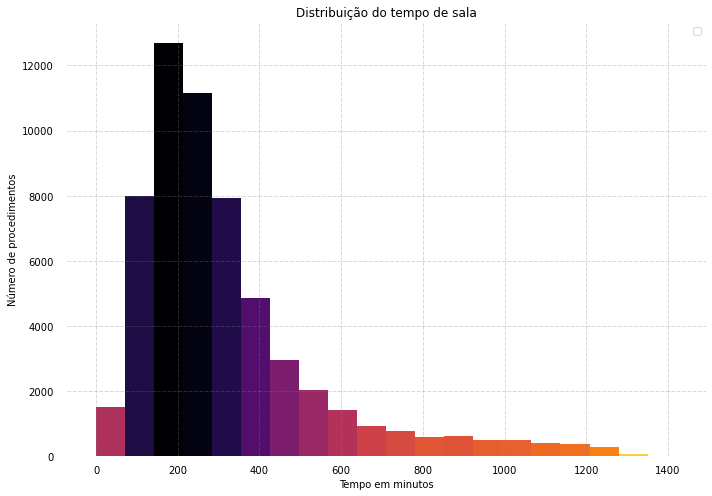

In [22]:
# Creating dataset
a = np.array(train_df.TEMPO_SALA)

n_bins = 20

# Creating distribution
x = a
y = len(train_df.TEMPO_SALA)
legend = ''

# Creating histogram
fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
	
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
axs.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.6)

# Add Text watermark
fig.text(0.9, 0.15, '',
		fontsize = 12,
		color ='red',
		ha ='right',
		va ='bottom',
		alpha = 0.7)

# Creating histogram
N, bins, patches = axs.hist(x, bins = n_bins)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
	color = plt.cm.inferno_r(norm(thisfrac))
	thispatch.set_facecolor(color)

# Adding extra features	
plt.xlabel("Tempo em minutos")
plt.ylabel("Número de procedimentos")
plt.legend(legend)
plt.title('Distribuição do tempo de sala')

# Show plot
plt.show()

fig.savefig('temposala.png', dpi=fig.dpi)


In [23]:
## Rmovendo espaços e caracteres especiais de DESC_CIRURGIA

In [24]:
for x in range(len(train_df.DESC_CIRURGIA)):
    train_df.DESC_CIRURGIA.iloc[x] = train_df.DESC_CIRURGIA.iloc[x].replace('Ã', 'A')\
                                                                  .replace('Â', 'A')\
                                                                  .replace('Ç', 'C')\
                                                                  .replace('É', 'E')\
                                                                  .replace('Ê', 'E')\
                                                                  .replace('.', '')\
                                                                  .replace(' ', '')\
                                                                  .replace('(', '')\
                                                                  .replace(')', '')\
                                                                  .replace('/', '')\
                                                                  .replace(',', '')\
                                                                  .replace('-', '')

In [25]:
for x in range(len(train_df.DESC_CIRURGIA)):
    train_df.DESC_CIRURGIA.iloc[x] = train_df.DESC_CIRURGIA.iloc[x].replace('PRINCIPAL', '')

In [26]:
train_df['ORDEM'] = train_df['ORDEM'].str.split('/').str[0]

In [27]:
## construindo lista com todos os procedimentos realizados

In [28]:
lista_desc_cir = train_df.groupby(by='DESC_CIRURGIA').count().sort_values(by='AVISO_CIRURGICO', ascending=False)\
    .index\
    .tolist()

In [29]:
## numero total de procedimentos

In [30]:
len(lista_desc_cir)

1048

In [31]:
## Métricas de cada procedimento

In [32]:
for x in range(len(lista_desc_cir)):
    print(lista_desc_cir[x])
    print('Total de procedimentos',train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].AVISO_CIRURGICO.count())
    print('Minimo',train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].TEMPO_SALA.min())
    print('10%', np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].TEMPO_SALA, 10))
    print('25%', np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].TEMPO_SALA, 25))
    print('Mediana', train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].TEMPO_SALA.median())
    print('75%', np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].TEMPO_SALA, 75))
    print('90%', np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].TEMPO_SALA, 90))
    print('Maximo', train_df[train_df.DESC_CIRURGIA == lista_desc_cir[x]].TEMPO_SALA.max(), '\n')

COLECISTECTOMIAVIDEOLAPAROSCOPICA
Total de procedimentos 1865
Minimo 14
10% 150.0
25% 185.0
Mediana 241.0
75% 330.0
90% 435.0
Maximo 1305 

LAPAROTOMIAEXPLORADORA
Total de procedimentos 1809
Minimo 5
10% 164.8
25% 235.0
Mediana 374.0
75% 635.0
90% 970.0
Maximo 1335 

VITRECTOMIAPOSTERIORCOMINFUSAODEPERFLUOCARBONOOLEODESILICONEENDOLASER
Total de procedimentos 1330
Minimo 5
10% 136.0
25% 170.0
Mediana 210.0
75% 265.0
90% 338.2000000000003
Maximo 1073 

CURATIVOGRAUIICOUSDEBRIDAMENTO
Total de procedimentos 1330
Minimo 35
10% 120.0
25% 162.0
Mediana 227.0
75% 327.75
90% 495.0
Maximo 1295 

AMPUTACAODESARTICULACAODEMEMBROSINFERIORES
Total de procedimentos 955
Minimo 0
10% 195.8
25% 261.0
Mediana 375.0
75% 630.0
90% 1002.8000000000001
Maximo 1375 

ANESTESIAREGIONALINFILTRACAO
Total de procedimentos 831
Minimo 10
10% 49.0
25% 63.0
Mediana 80.0
75% 103.0
90% 133.0
Maximo 268 

CRANIOTOMIADESCOMPRESSIVA
Total de procedimentos 742
Minimo 4
10% 218.20000000000002
25% 352.75
Mediana 538.0
75% 799

90% 1029.5000000000032
Maximo 1370 

PAROTIDECTOMIAPARCIALOUSUBTOTAL
Total de procedimentos 212
Minimo 32
10% 200.0
25% 230.0
Mediana 270.0
75% 309.25
90% 359.70000000000005
Maximo 670 

ENXERTODERMOEPIDERMICO
Total de procedimentos 211
Minimo 40
10% 141.0
25% 180.0
Mediana 230.0
75% 313.0
90% 400.0
Maximo 1095 

EVISCERACAODEGLOBOOCULAR
Total de procedimentos 210
Minimo 100
10% 165.0
25% 202.25
Mediana 257.0
75% 364.0
90% 1035.4999999999998
Maximo 1301 

VITRECTOMIAPOSTERIORCOMINFUSAODEPERFLUOCARBONOEENDOLASER
Total de procedimentos 209
Minimo 32
10% 141.60000000000002
25% 169.0
Mediana 216.0
75% 266.0
90% 356.0000000000001
Maximo 1100 

CIRURGIADECATARATACONGENITA
Total de procedimentos 207
Minimo 54
10% 95.0
25% 107.0
Mediana 121.0
75% 147.0
90% 171.4
Maximo 265 

EXERESEDETUMORDEPELEEANEXOSCISTOSEBACEOLIPOMA
Total de procedimentos 205
Minimo 5
10% 95.0
25% 120.0
Mediana 160.0
75% 215.0
90% 296.59999999999997
Maximo 460 

SUPRARRENALECTOMIAUNILATERAL
Total de procedimentos 194
Minim

10% 184.7
25% 275.5
Mediana 370.0
75% 527.75
90% 740.0
Maximo 1120 

COLETAEACONDICIDEMEDULAOSSEANOBRASILPTRANSPLAUTOGENICOOUDEDOADORAPARENTOUNAO
Total de procedimentos 118
Minimo 37
10% 68.5
25% 81.0
Mediana 105.0
75% 170.75
90% 232.7
Maximo 415 

TRATAMENTOCIRDEBEXIGANEUROGENICA
Total de procedimentos 118
Minimo 24
10% 90.7
25% 110.0
Mediana 135.0
75% 203.75
90% 460.0
Maximo 810 

URETROTOMIAINTERNA
Total de procedimentos 117
Minimo 14
10% 80.0
25% 100.0
Mediana 126.0
75% 168.0
90% 209.8
Maximo 410 

RINOPLASTIAEMPACIENTECOMANOMALIACRANIOEBUCOMAXILOFACIAL
Total de procedimentos 117
Minimo 130
10% 191.40000000000003
25% 261.0
Mediana 320.0
75% 380.0
90% 467.4000000000001
Maximo 650 

TRATAMENTOCIRDEINCONTINENCIAURINARIA
Total de procedimentos 115
Minimo 71
10% 90.0
25% 105.0
Mediana 136.0
75% 175.5
90% 229.20000000000002
Maximo 410 

COLECTOMIAPARCIALHEMICOLECTOMIAEMONCOLOGIA
Total de procedimentos 115
Minimo 217
10% 295.0
25% 350.0
Mediana 425.0
75% 655.0
90% 765.0
Maximo 990 

COLEC

Maximo 1286 

TRATAMENTOCIRDEHIPERTROFIADOSPEQUENOSLABIOS
Total de procedimentos 71
Minimo 32
10% 95.0
25% 110.5
Mediana 140.0
75% 190.5
90% 256.0
Maximo 414 

COLOCACAOPERCUTANEADEFILTRODEVEIACAVANATROMBOSEVENOSAPERIFERICAEEMBOLIAPULMONAR
Total de procedimentos 71
Minimo 92
10% 120.0
25% 142.5
Mediana 186.0
75% 268.5
90% 385.0
Maximo 1262 

EXERESEDECISTOBRANQUIAL
Total de procedimentos 70
Minimo 33
10% 134.79999999999998
25% 160.5
Mediana 185.0
75% 226.5
90% 270.3
Maximo 505 

LIPOENXERTIA
Total de procedimentos 70
Minimo 80
10% 130.0
25% 140.75
Mediana 162.5
75% 185.75
90% 211.4
Maximo 514 

EXERESEDEPAPILOMAEMLARINGE
Total de procedimentos 69
Minimo 108
10% 133.20000000000002
25% 160.0
Mediana 200.0
75% 245.0
90% 286.8
Maximo 1015 

TRATAMENTOCIRDEFISTULALIQUORICACRANIANA
Total de procedimentos 69
Minimo 115
10% 231.40000000000003
25% 300.0
Mediana 364.0
75% 460.0
90% 719.8000000000001
Maximo 995 

CRANIOTOMIAPARARETIRADADETUMORINTRACRANIANO
Total de procedimentos 68
Minimo 23
10% 

Total de procedimentos 47
Minimo 32
10% 98.80000000000001
25% 116.0
Mediana 155.0
75% 240.5
90% 295.0
Maximo 510 

GASTRECTOMIAVIDEOLAPAROSCOPICA
Total de procedimentos 47
Minimo 168
10% 212.8
25% 247.5
Mediana 368.0
75% 452.0
90% 562.0
Maximo 920 

ARTRODESETORACOLOMBOSACRAPOSTERIORCINCONIVEIS
Total de procedimentos 47
Minimo 121
10% 408.0
25% 464.0
Mediana 560.0
75% 750.0
90% 814.0
Maximo 958 

IMPLANTEDECATETERDELONGAPERMANENCIAPHEMODIALISE
Total de procedimentos 47
Minimo 85
10% 107.4
25% 128.5
Mediana 148.0
75% 183.5
90% 215.8
Maximo 278 

IMPLANTEDECATETERURETERALPORTECNICACISTOSCOPICA
Total de procedimentos 47
Minimo 68
10% 90.0
25% 117.0
Mediana 171.0
75% 226.5
90% 737.7999999999998
Maximo 1240 

RETIRADADECATETERDELONGAPERMANENCIASEMIOUTOTALMENTEIMPLANTAVEL
Total de procedimentos 46
Minimo 44
10% 65.5
25% 77.0
Mediana 95.0
75% 131.0
90% 273.0
Maximo 1350 

EXCISAOEOUSUTURASIMPLESDEPEQUENASLESOESFERIMENTOSDEPELEANEXOSEMUCOSA
Total de procedimentos 45
Minimo 57
10% 88.1999999999

75% 837.5
90% 1087.2
Maximo 1223 

DISCECTOMIACERVICALANTERIORATE2NIVEISCMICROSCOPIO
Total de procedimentos 35
Minimo 185
10% 254.0
25% 325.5
Mediana 390.0
75% 457.5
90% 522.0
Maximo 850 

LOBECTOMIAPULMONAR
Total de procedimentos 34
Minimo 213
10% 297.8
25% 367.75
Mediana 459.0
75% 558.75
90% 592.1
Maximo 805 

PLASTIAARTERIALCREMENDOQUALQUERTECNICA
Total de procedimentos 34
Minimo 29
10% 259.8
25% 338.75
Mediana 547.5
75% 756.75
90% 903.5
Maximo 955 

RETIRADADECORPOESTRANHOSUBCUTANEO
Total de procedimentos 34
Minimo 65
10% 81.60000000000001
25% 128.0
Mediana 179.0
75% 263.75
90% 328.5
Maximo 1160 

TRATAMENTOCIRDECRANIOSSINOSTOSECOMSUTURAUNICA
Total de procedimentos 34
Minimo 41
10% 268.9
25% 330.75
Mediana 375.5
75% 433.75
90% 453.5
Maximo 556 

TRATAMENTOCIRDECRANIOSSINOSTOSECOMPLEXA
Total de procedimentos 34
Minimo 205
10% 307.3
25% 341.25
Mediana 373.0
75% 420.0
90% 463.5
Maximo 710 

DERMOLIPECTOMIACRURALPOSCIRURGIABARIATRICA
Total de procedimentos 34
Minimo 165
10% 227.9
25% 2

Maximo 1295 

CISTOPLASTIACORRECAODEEXTROFIAVESICAL
Total de procedimentos 25
Minimo 140
10% 210.2
25% 260.0
Mediana 375.0
75% 425.0
90% 515.2
Maximo 750 

INJECAOINTRAVITREO
Total de procedimentos 24
Minimo 41
10% 53.0
25% 68.0
Mediana 89.0
75% 139.25
90% 168.8
Maximo 230 

DISCECTOMIACERVICALLOMBARLOMBOSACRAPORVIAPOSTERIORUMNIVEL
Total de procedimentos 24
Minimo 75
10% 182.5
25% 249.5
Mediana 312.5
75% 387.5
90% 499.9
Maximo 900 

RESSECCAODEGLANDULASALIVAR
Total de procedimentos 24
Minimo 114
10% 134.0
25% 185.75
Mediana 226.0
75% 338.0
90% 362.0
Maximo 551 

ARTRODESECERVICALCERVICOTORACICAPOSTERIORTRESNIVEIS
Total de procedimentos 24
Minimo 284
10% 351.5
25% 447.25
Mediana 506.5
75% 612.5
90% 783.0999999999999
Maximo 889 

REMOCAODEOLEODESILICONE
Total de procedimentos 24
Minimo 65
10% 128.7
25% 153.25
Mediana 165.5
75% 196.25
90% 255.09999999999997
Maximo 366 

BIOPSIADEPELEEPARTESMOLES
Total de procedimentos 24
Minimo 61
10% 76.6
25% 93.75
Mediana 133.5
75% 147.5
90% 168.5
Maxim

25% 134.0
Mediana 153.0
75% 200.0
90% 209.0
Maximo 215 

PLASTICAMAMARIAMASCULINA
Total de procedimentos 17
Minimo 120
10% 151.0
25% 165.0
Mediana 209.0
75% 295.0
90% 378.0
Maximo 395 

RESSECCAODOGLOMOJUGULAR
Total de procedimentos 17
Minimo 165
10% 278.8
25% 412.0
Mediana 550.0
75% 691.0
90% 747.0
Maximo 865 

TREPANACAOCRANIANAPARAPROPEDEUTICAOUTERAPEUTICANEUROCIRURGICACOMTECNICACOMPLEMENTAR
Total de procedimentos 17
Minimo 32
10% 104.6
25% 180.0
Mediana 291.0
75% 330.0
90% 656.0
Maximo 1105 

ARTRODESECERVICALANTERIORDOISNIVEIS
Total de procedimentos 17
Minimo 150
10% 217.0
25% 320.0
Mediana 387.0
75% 650.0
90% 896.6
Maximo 1177 

TRATAMENTOCIRDEFISTULAECISTOSOROMAXILARES
Total de procedimentos 17
Minimo 105
10% 215.0
25% 247.0
Mediana 304.0
75% 357.0
90% 450.2
Maximo 486 

OSTEOTOMIADAMANDIBULAEMPACIENTECOMANOMALIACRANIOEBUCOMAXILOFACIAL
Total de procedimentos 17
Minimo 188
10% 275.0
25% 300.0
Mediana 393.0
75% 430.0
90% 519.6
Maximo 690 

ARTRODESEDECOLUNAVIAANTERIOROUPOSTEROLATE

75% 377.25
90% 782.1000000000003
Maximo 910 

RETIRADADECORPOESTRANHODACOLUNATORACOLOMBOSACRAPORVIAPOSTERIOR
Total de procedimentos 12
Minimo 120
10% 164.9
25% 207.5
Mediana 264.5
75% 374.75
90% 740.9000000000001
Maximo 1060 

RESSECCAOSIMPLESDETUMOROSSEODEPARTESMOLES
Total de procedimentos 12
Minimo 50
10% 108.2
25% 150.5
Mediana 255.5
75% 422.0
90% 636.8000000000001
Maximo 690 

MICRONEUROLISEDENERVOPERIFERICO
Total de procedimentos 12
Minimo 45
10% 62.699999999999996
25% 87.0
Mediana 126.0
75% 160.25
90% 173.6
Maximo 180 

PLEURECTOMIA
Total de procedimentos 12
Minimo 210
10% 234.8
25% 254.0
Mediana 272.5
75% 320.25
90% 351.6
Maximo 370 

MICROCIRURGIADETUMORMEDULARCOMTECNICACOMPLEMENTAR
Total de procedimentos 12
Minimo 181
10% 322.4
25% 365.0
Mediana 417.5
75% 613.75
90% 683.5
Maximo 710 

TRANSPLANTEDEPANCREAS
Total de procedimentos 12
Minimo 420
10% 476.0
25% 548.75
Mediana 702.5
75% 818.75
90% 942.5
Maximo 1059 

TRATAMENTOCIRDEFRATURALUXACAOFRATURALUXACAODISJUNCAODOANELPELVICOA

90% 353.0
Maximo 416 

TRATAMENTOCIRDEFISTULALIQUORICARAQUIDIANA
Total de procedimentos 10
Minimo 155
10% 193.70000000000002
25% 230.5
Mediana 258.0
75% 424.25
90% 893.5
Maximo 1015 

RESSECCAODEELEMENTOVERTEBRALPOSTERIORPOSTEROLATERALDISTALAC2MAISDE2SEGMENTOS
Total de procedimentos 10
Minimo 45
10% 220.5
25% 268.75
Mediana 294.5
75% 373.75
90% 564.0
Maximo 645 

TRATAMENTOCIRDEOSTEOMAODONTOMAOUTRASLESOESESPECIFICADAS
Total de procedimentos 10
Minimo 52
10% 122.2
25% 185.0
Mediana 250.0
75% 336.0
90% 368.9999999999999
Maximo 585 

HERNIOPLASTIADIAFRAGMATICAVIAABDOMINAL
Total de procedimentos 10
Minimo 250
10% 331.0
25% 355.0
Mediana 410.0
75% 471.0
90% 574.0
Maximo 655 

RETIRADADEPLACAEOUPARAFUSOS
Total de procedimentos 10
Minimo 110
10% 128.9
25% 150.75
Mediana 202.5
75% 274.5
90% 296.0
Maximo 305 

CORRECAOCIRURGICADEFISTULAORONASALOROSINUSAL
Total de procedimentos 10
Minimo 81
10% 127.8
25% 167.0
Mediana 222.5
75% 312.5
90% 412.0999999999999
Maximo 521 

PONTETROMBOENDARTERECTOMIAA

Minimo 150
10% 161.9
25% 236.0
Mediana 280.0
75% 323.75
90% 395.29999999999995
Maximo 431 

PANCREATECTOMIAPARCIAL
Total de procedimentos 8
Minimo 215
10% 275.2
25% 483.25
Mediana 576.5
75% 636.25
90% 778.0
Maximo 1030 

REPARACAOEOPERACAOPLASTICADOTESTICULO
Total de procedimentos 8
Minimo 71
10% 91.3
25% 115.0
Mediana 135.0
75% 164.25
90% 177.6
Maximo 207 

TRATAMENTOCIRDERETRACAOCICATRICIALEMUMESTAGIO
Total de procedimentos 8
Minimo 70
10% 94.5
25% 162.0
Mediana 256.0
75% 300.0
90% 351.0
Maximo 400 

LINFADENECTOMIARETROPERITONIAL
Total de procedimentos 8
Minimo 221
10% 234.3
25% 251.25
Mediana 287.5
75% 333.5
90% 391.7
Maximo 454 

AMPUTACAODESARTICULACAODEMEMBROSINFERIORESORT
Total de procedimentos 8
Minimo 245
10% 626.5
25% 842.5
Mediana 997.5
75% 1124.75
90% 1182.8
Maximo 1250 

LIPOASPIRACAODEGIBAOUREGIAOSUBMANDIBULAREMPACCOMLIPODISTROFIADECORRENTEDOUSODEANTIRET
Total de procedimentos 8
Minimo 140
10% 150.5
25% 162.5
Mediana 189.5
75% 276.0
90% 338.09999999999997
Maximo 448 

AN

90% 1142.5
Maximo 1160 

MICROCIRURGIACOMCORDOTOMIAMIELOTOMIAACEUABERTO
Total de procedimentos 6
Minimo 200
10% 210.0
25% 226.75
Mediana 278.0
75% 329.25
90% 388.5
Maximo 441 

TRATAMENTOEMESTAGIOSSUBSEQUENTESDEENXERTIA
Total de procedimentos 6
Minimo 101
10% 124.0
25% 150.25
Mediana 172.5
75% 196.25
90% 203.0
Maximo 206 

MEATOTOMIASIMPLES
Total de procedimentos 6
Minimo 70
10% 80.0
25% 93.75
Mediana 109.5
75% 149.25
90% 185.5
Maximo 210 

HERNIORRAFIACRESSECCAOINTESTINALHERNIAESTRANGULADA
Total de procedimentos 6
Minimo 235
10% 245.0
25% 255.25
Mediana 350.5
75% 565.0
90% 655.0
Maximo 705 

LARINGECTOMIAPARCIALEMONCOLOGIA
Total de procedimentos 6
Minimo 14
10% 23.0
25% 34.25
Mediana 90.5
75% 176.75
90% 189.5
Maximo 190 

TRATAMENTOCIRDEFISTULAVESICOVAGINAL
Total de procedimentos 6
Minimo 165
10% 170.0
25% 183.75
Mediana 217.5
75% 228.75
90% 282.5
Maximo 335 

TRATAMENTOCIRDECOAPTACAODENINFAS
Total de procedimentos 6
Minimo 125
10% 126.5
25% 132.75
Mediana 148.5
75% 150.75
90% 153.0
M

25% 485.0
Mediana 530.0
75% 535.0
90% 574.0
Maximo 600 

MONITORIZACAONEUROFISIOLOGICAINTRAOPERATORIA
Total de procedimentos 5
Minimo 95
10% 130.60000000000002
25% 184.0
Mediana 223.0
75% 238.0
90% 254.2
Maximo 265 

FOTOCOAGULACAOALASER
Total de procedimentos 5
Minimo 45
10% 60.6
25% 84.0
Mediana 135.0
75% 150.0
90% 315.0
Maximo 425 

OSTEOTOMIACRANIOFACIAL
Total de procedimentos 5
Minimo 270
10% 283.2
25% 303.0
Mediana 350.0
75% 367.0
90% 593.8
Maximo 745 

ESOFAGOCOLOPLASTIAOUESOFAGOGASTROPLASTIAEMONCOLOGIA
Total de procedimentos 5
Minimo 313
10% 371.79999999999995
25% 460.0
Mediana 545.0
75% 575.0
90% 671.0
Maximo 735 

EXCISAODECALCULODEGLANDULASALIVAR
Total de procedimentos 5
Minimo 70
10% 80.0
25% 95.0
Mediana 130.0
75% 150.0
90% 186.60000000000002
Maximo 211 

EPISIOPERINEORRAFIANAOOBSTETRICA
Total de procedimentos 5
Minimo 101
10% 108.6
25% 120.0
Mediana 165.0
75% 195.0
90% 207.0
Maximo 215 

RECONSTITUICAODEFORNIXCONJUNTIVAL
Total de procedimentos 5
Minimo 100
10% 126.4
25% 1

Mediana 192.5
75% 282.5
90% 395.0
Maximo 470 

DRENAGEMLIQUORICALOMBAREXTERNA
Total de procedimentos 4
Minimo 35
10% 38.300000000000004
25% 43.25
Mediana 63.5
75% 91.75
90% 111.10000000000001
Maximo 124 

REMOCAOCIRURGICADEFECALOMA
Total de procedimentos 4
Minimo 98
10% 101.3
25% 106.25
Mediana 179.5
75% 262.5
90% 285.0
Maximo 300 

DRENAGEMDEHEMATOMAABSCESSORETRORETAL
Total de procedimentos 3
Minimo 160
10% 172.0
25% 190.0
Mediana 220.0
75% 255.0
90% 276.0
Maximo 290 

TENOPLASTIAOUENXERTODETENDAOUNICO
Total de procedimentos 3
Minimo 105
10% 114.0
25% 127.5
Mediana 150.0
75% 452.5
90% 634.0
Maximo 755 

ARTRODESEOCCIPTOCERVICALC2POSTERIOR
Total de procedimentos 3
Minimo 240
10% 336.0
25% 480.0
Mediana 720.0
75% 771.0
90% 801.6
Maximo 822 

COLOCACAODEPROTESELARINGOTRAQUEALTRAQUEOBRONQUICAINCLUIPROTESE
Total de procedimentos 3
Minimo 36
10% 49.8
25% 70.5
Mediana 105.0
75% 132.5
90% 149.0
Maximo 160 

TRATAMENTOCIRDEESTENOSEDOCONDUTOAUDITIVO
Total de procedimentos 3
Minimo 110
10% 130.2

75% 474.5
90% 513.2
Maximo 539 

ALARGAMENTODAENTRADAVAGINAL
Total de procedimentos 3
Minimo 60
10% 68.8
25% 82.0
Mediana 104.0
75% 140.5
90% 162.39999999999998
Maximo 177 

RETIRADADEESPACADORESOUTROSMATERIAIS
Total de procedimentos 3
Minimo 85
10% 99.0
25% 120.0
Mediana 155.0
75% 312.5
90% 407.0
Maximo 470 

MIRINGOTOMIA
Total de procedimentos 3
Minimo 60
10% 70.8
25% 87.0
Mediana 114.0
75% 155.5
90% 180.4
Maximo 197 

ORQUIECTOMIAUNIOUBILATERALCESVAZIAMENTOGANGLIONAR
Total de procedimentos 2
Minimo 101
10% 116.9
25% 140.75
Mediana 180.5
75% 220.25
90% 244.1
Maximo 260 

BIOPSIAESTEREOTAXICA
Total de procedimentos 2
Minimo 170
10% 201.0
25% 247.5
Mediana 325.0
75% 402.5
90% 449.0
Maximo 480 

BULECTOMIAUNIOUBILATERAL
Total de procedimentos 2
Minimo 315
10% 335.3
25% 365.75
Mediana 416.5
75% 467.25
90% 497.7
Maximo 518 

ARTRODESEOCCIPTOCERVICALC4POSTERIORCURTADURACAO
Total de procedimentos 2
Minimo 430
10% 434.5
25% 441.25
Mediana 452.5
75% 463.75
90% 470.5
Maximo 475 

TRATAMENTOCIR

90% 115.5
Maximo 121 

ARTRODESECERVICALCERVICOTORACICAPOSTERIORUMNIVEL
Total de procedimentos 2
Minimo 160
10% 189.0
25% 232.5
Mediana 305.0
75% 377.5
90% 421.0
Maximo 450 

EXTIRPACAODEGLANDULALACRIMAL
Total de procedimentos 2
Minimo 130
10% 141.0
25% 157.5
Mediana 185.0
75% 212.5
90% 229.0
Maximo 240 

DEGASTROGASTRECTOMIACOUSVAGOTOMIA
Total de procedimentos 2
Minimo 409
10% 417.90000000000003
25% 431.25
Mediana 453.5
75% 475.75
90% 489.09999999999997
Maximo 498 

TRATAMENTOCIRURGICODEANOMALIASDOANUSERETO
Total de procedimentos 2
Minimo 300
10% 300.5
25% 301.25
Mediana 302.5
75% 303.75
90% 304.5
Maximo 305 

AMPUTACAOCONICADECOLODEUTEROCCOLPECTOMIAEMONCOLOGIA
Total de procedimentos 2
Minimo 105
10% 111.5
25% 121.25
Mediana 137.5
75% 153.75
90% 163.5
Maximo 170 

LINFADENECTOMIARADICALINGUINALUNILATERAL
Total de procedimentos 2
Minimo 330
10% 345.0
25% 367.5
Mediana 405.0
75% 442.5
90% 465.0
Maximo 480 

CIRURGIAPARAREIMPLANTACAODAPROTESEAUDITIVAANCORADANOOSSO
Total de procedimentos 

Total de procedimentos 1
Minimo 159
10% 159.0
25% 159.0
Mediana 159.0
75% 159.0
90% 159.0
Maximo 159 

DESCOMPRESSAOOSSEANAJUNCAOCRANIOCERVICALVIAPOSTERIORCDUROPLASTIA
Total de procedimentos 1
Minimo 450
10% 450.0
25% 450.0
Mediana 450.0
75% 450.0
90% 450.0
Maximo 450 

RIZOTOMIAPERCUTANEACOMBALAO
Total de procedimentos 1
Minimo 65
10% 65.0
25% 65.0
Mediana 65.0
75% 65.0
90% 65.0
Maximo 65 

RESSECCAOPARCIALDELABIOCOMENXERTOOURETALHOEMONCOLOGIA
Total de procedimentos 1
Minimo 85
10% 85.0
25% 85.0
Mediana 85.0
75% 85.0
90% 85.0
Maximo 85 

EXCISAOESUTURADELESAONAPELECPLASTICAEMZOUROTACAODERETALHOORT
Total de procedimentos 1
Minimo 165
10% 165.0
25% 165.0
Mediana 165.0
75% 165.0
90% 165.0
Maximo 165 

CORRECAODEFISTULAAORTOCAVITARIAS
Total de procedimentos 1
Minimo 75
10% 75.0
25% 75.0
Mediana 75.0
75% 75.0
90% 75.0
Maximo 75 

EXCISAOLOCALDETUMORDORETOEMONCOLOGIA
Total de procedimentos 1
Minimo 313
10% 313.0
25% 313.0
Mediana 313.0
75% 313.0
90% 313.0
Maximo 313 

SETORECTOMIAQUADRANTEC

Minimo 199
10% 199.0
25% 199.0
Mediana 199.0
75% 199.0
90% 199.0
Maximo 199 

REDUCAODELUXACAOTEMPOROMANDIBULAR
Total de procedimentos 1
Minimo 400
10% 400.0
25% 400.0
Mediana 400.0
75% 400.0
90% 400.0
Maximo 400 

HISTERECTOMIACANEXECTOMIABILATERALECOLPECTOMIASOBPROCESSOTRANSEXUALIZADOR
Total de procedimentos 1
Minimo 105
10% 105.0
25% 105.0
Mediana 105.0
75% 105.0
90% 105.0
Maximo 105 

TRATAMENTOCIRDEINFECCAOEMARTROPLASTIADASMEDIASPEQUENASARTICULACOES
Total de procedimentos 1
Minimo 255
10% 255.0
25% 255.0
Mediana 255.0
75% 255.0
90% 255.0
Maximo 255 

TRATAMENTOCIRDELESAOAGUDACAPSULOLIGAMENTARDOMEMBROSUPERIOR:COTOVELOPUNHO
Total de procedimentos 1
Minimo 819
10% 819.0
25% 819.0
Mediana 819.0
75% 819.0
90% 819.0
Maximo 819 

TRATAMENTOCIRDELESOESVASCULARESTRAUMATICASDEMEMBROINFERIORBILATERAL
Total de procedimentos 1
Minimo 905
10% 905.0
25% 905.0
Mediana 905.0
75% 905.0
90% 905.0
Maximo 905 

NEURORRAFIA
Total de procedimentos 1
Minimo 180
10% 180.0
25% 180.0
Mediana 180.0
75% 180.0

In [33]:
## Tabela com cada procedimento

In [34]:
tabela_min_max = pd.DataFrame()

In [35]:
tabela_min_max['cirurgias'] = lista_desc_cir
tabela_min_max['Total de procedimentos'] = 9999
tabela_min_max['minimo'] = 9999
tabela_min_max['10'] = 9999
tabela_min_max['25'] = 9999
tabela_min_max['mediana'] = 9999
tabela_min_max['75'] = 9999
tabela_min_max['90'] = 9999
tabela_min_max['maximo'] = 9999


In [36]:
for l in range(len(lista_desc_cir)):
    for x in range(len(tabela_min_max.cirurgias)):
        if tabela_min_max['cirurgias'].iloc[x] == lista_desc_cir[l]:
            tabela_min_max['Total de procedimentos'].iloc[x] = train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]]\
                                                            .DESC_CIRURGIA.count()
            tabela_min_max['minimo'].iloc[x]  = train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]].TEMPO_SALA.min()
            tabela_min_max['10'].iloc[x]  = np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]]\
                                                            .TEMPO_SALA, 10)
            tabela_min_max['25'].iloc[x] = np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]]\
                                                            .TEMPO_SALA, 25)
            tabela_min_max['mediana'].iloc[x]  = np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]]\
                                                            .TEMPO_SALA, 50)
            tabela_min_max['75'].iloc[x] = np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]]\
                                                            .TEMPO_SALA, 75)
            tabela_min_max['90'].iloc[x] = np.percentile(train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]]\
                                                            .TEMPO_SALA, 90)
            tabela_min_max['maximo'].iloc[x]  = train_df[train_df.DESC_CIRURGIA == lista_desc_cir[l]].TEMPO_SALA.max()

In [37]:
## ajustando tempo dos procedimento para min 25 e max 75

In [38]:
for l in range(len(lista_desc_cir)):
    for r in range(len(train_df.DESC_CIRURGIA)):
        if train_df.DESC_CIRURGIA.iloc[r] == lista_desc_cir[l]:
            if train_df.TEMPO_SALA.iloc[r] < tabela_min_max[tabela_min_max.cirurgias == lista_desc_cir[l]]\
                                                                                        .iloc[[0],[4]].values.tolist()[0][0]:
                        train_df.TEMPO_SALA.iloc[r] = tabela_min_max[tabela_min_max.cirurgias == lista_desc_cir[l]]\
                                                                                        .iloc[[0],[4]].values.tolist()[0][0]
            elif train_df.TEMPO_SALA.iloc[r] > tabela_min_max[tabela_min_max.cirurgias == lista_desc_cir[l]]\
                                                                                        .iloc[[0],[6]].values.tolist()[0][0]:
                        train_df.TEMPO_SALA.iloc[r] = tabela_min_max[tabela_min_max.cirurgias == lista_desc_cir[l]]\
                                                                                        .iloc[[0],[6]].values.tolist()[0][0]

In [39]:
print(train_df.TEMPO_SALA.min())
print(np.percentile(train_df.TEMPO_SALA, 10))
print(np.percentile(train_df.TEMPO_SALA, 25))
print(train_df.TEMPO_SALA.median())
print(np.percentile(train_df.TEMPO_SALA, 75))
print(np.percentile(train_df.TEMPO_SALA, 90))
print(train_df.TEMPO_SALA.max())

27.5
139.0
182.0
255.0
350.0
519.0
1195.0


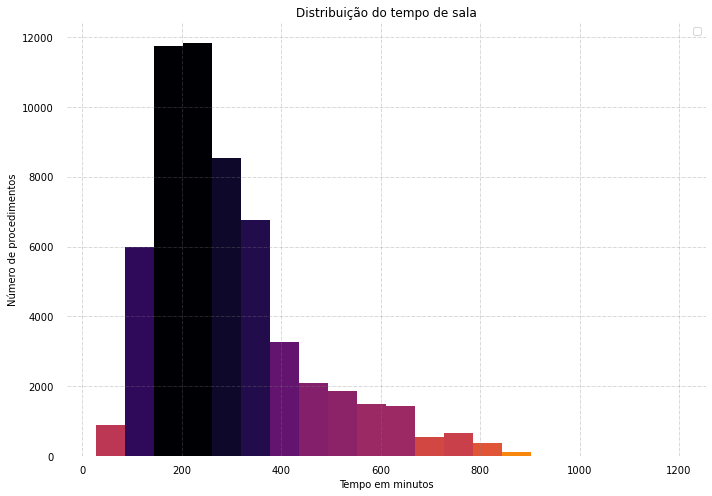

In [40]:
# Creating dataset
a = np.array(train_df.TEMPO_SALA)

n_bins = 20

# Creating distribution
x = a
y = len(train_df.TEMPO_SALA)
legend = ''

# Creating histogram
fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
	
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
axs.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.6)

# Add Text watermark
fig.text(0.9, 0.15, '',
		fontsize = 12,
		color ='red',
		ha ='right',
		va ='bottom',
		alpha = 0.7)

# Creating histogram
N, bins, patches = axs.hist(x, bins = n_bins)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
	color = plt.cm.inferno_r(norm(thisfrac))
	thispatch.set_facecolor(color)

# Adding extra features	
plt.xlabel("Tempo em minutos")
plt.ylabel("Número de procedimentos")
plt.legend(legend)
plt.title('Distribuição do tempo de sala')

# Show plot
plt.show()

fig.savefig('temposala.png', dpi=fig.dpi)

In [41]:
tabela_min_max

,cirurgias,Total de procedimentos,minimo,10,25,mediana,75,90,maximo
0,COLECISTECTOMIAVIDEOLAPAROSCOPICA,1865,14,150.0,185.0,241.0,330.00,435.0,1305
1,LAPAROTOMIAEXPLORADORA,1809,5,164.8,235.0,374.0,635.00,970.0,1335
2,VITRECTOMIAPOSTERIORCOMINFUSAODEPERFLUOCARBONO...,1330,5,136.0,170.0,210.0,265.00,338.2,1073
3,CURATIVOGRAUIICOUSDEBRIDAMENTO,1330,35,120.0,162.0,227.0,327.75,495.0,1295
4,AMPUTACAODESARTICULACAODEMEMBROSINFERIORES,955,0,195.8,261.0,375.0,630.00,1002.8,1375
...,...,...,...,...,...,...,...,...,...
1043,TRATAMENTOCIRDEDEDOEMMARTELOEMGARRAMAOEPE,1,195,195.0,195.0,195.0,195.00,195.0,195
1044,TRATAMENTOCIRDEDEFEITOSCONGENITOSDOTORAX,1,198,198.0,198.0,198.0,198.00,198.0,198
1045,TRATAMENTOCIRDEDEFORMIDADEDACOLUNAVIAANTERIORS...,1,95,95.0,95.0,95.0,95.00,95.0,95
1046,TRATAMENTOCIRDEDEFORMIDADEDACOLUNAVIAPOSTERIOR...,1,360,360.0,360.0,360.0,360.00,360.0,360


In [42]:
## train_df.to_csv('correcao_tempo2.csv', sep = ',')

In [43]:
## tabela_min_max.to_csv('tabela_min_max.csv', sep = ',')

In [44]:
## Lista para colocar no app

In [45]:
# train_df.DESC_CIRURGIA.drop_duplicates().sort_values().tolist()

In [46]:
# cir_limpo = pd.DataFrame()

In [47]:
# train_df.columns

In [48]:
# cir_limpo['var_comp'] = train_df.ANESTESIA.tolist()
# cir_limpo['var_ext'] = train_df2.ANESTESIA.tolist()

In [49]:
# cir_limpo = cir_limpo.drop_duplicates(subset='var_comp').sort_values(by='var_ext').reset_index(drop=True)

In [50]:
# lista = []

In [51]:
# for x in range(len(cir_limpo['var_comp'].tolist())):
#     y = [(cir_limpo['var_comp'].tolist()[x], cir_limpo['var_ext'].tolist()[x])]
#    lista = lista+y

In [52]:
#lista

In [53]:
train_df.ESPECIALIDADE.drop_duplicates().tolist()

['OTORRINOLARINGOLOGIA',
 'CIR CABECA E PESCOCO',
 'CIR GERAL',
 'GINECOLOGIA E OBSTETRICIA',
 'UROLOGIA',
 'CIR VASCULAR',
 'CIR APARELHO DIGESTIVO',
 'CIR PLASTICA',
 'NEUROCIRURGIA',
 'OFTALMOLOGIA',
 nan,
 'CIR TORACICA',
 'DERMATOLOGIA',
 'ANESTESIOLOGIA',
 'ODONTOLOGIA',
 'ORTOPEDIA E TRAUMATOLOGIA',
 'HEMATOLOGIA E HEMOTERAPIA',
 'ENDOSCOPIA',
 'GASTROENTEROLOGIA',
 'CIR PEDIATRICA']

In [54]:
# Analise das variaveis

In [55]:
## Correção de idade

In [56]:
print(train_df.IDADE.min())
print(np.percentile(train_df.IDADE, 10))
print(np.percentile(train_df.IDADE, 25))
print(train_df.IDADE.median())
print(np.percentile(train_df.IDADE, 75))
print(np.percentile(train_df.IDADE, 90))
print(train_df.IDADE.max())

-28
16.0
33.0
50.0
64.0
74.0
221


In [57]:
for x in range(len(train_df.IDADE)):
    if train_df.IDADE.iloc[x] < 0:
        train_df.IDADE.iloc[x] = train_df.IDADE.iloc[x]*-1
    elif train_df.IDADE.iloc[x] > 116:
        train_df.IDADE.iloc[x] = train_df.IDADE.median()

/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
print(train_df.IDADE.min())
print(np.percentile(train_df.IDADE, 10))
print(np.percentile(train_df.IDADE, 25))
print(train_df.IDADE.median())
print(np.percentile(train_df.IDADE, 75))
print(np.percentile(train_df.IDADE, 90))
print(train_df.IDADE.max())

0
16.0
33.0
50.0
64.0
74.0
106


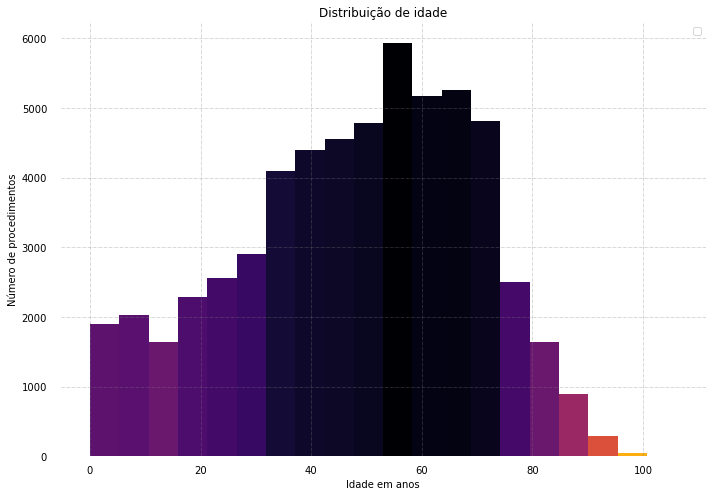

In [59]:
# Creating dataset
a = np.array(train_df.IDADE)

n_bins = 20

# Creating distribution
x = a
y = len(train_df.IDADE)
legend = ''

# Creating histogram
fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
	
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
axs.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.6)

# Add Text watermark
fig.text(0.9, 0.15, '',
		fontsize = 12,
		color ='red',
		ha ='right',
		va ='bottom',
		alpha = 0.7)

# Creating histogram
N, bins, patches = axs.hist(x, bins = n_bins)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
	color = plt.cm.inferno_r(norm(thisfrac))
	thispatch.set_facecolor(color)

# Adding extra features	
plt.xlabel("Idade em anos")
plt.ylabel("Número de procedimentos")
plt.legend(legend)
plt.title('Distribuição de idade')

# Show plot
plt.show()

fig.savefig('idade.png', dpi=fig.dpi)


In [60]:
## genero

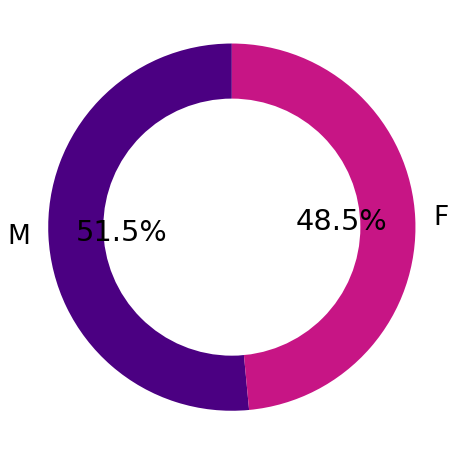

In [61]:
sns.set_context("paper", font_scale= 3)
# Pie chartdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnkAAAGeCAYAAADooBcGAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABipElEQVR4nO3dd5xddbX//9fKTJiUIZ0MJCRBxQJXFBBQxILSvRas2EVEv4peK/aLoniv+lOuYsPrVSlewYbtYlewi3RFBFSQBAJMSEJ6ZshM1u+PvQ85s+fMnPY5e5/9mffz8TiP5OzZZa2ZZGbNp5q7IyIiIiJxmVZ0ACIiIiISnoo8ERERkQipyBMRERGJkIo8ERERkQipyBMRERGJkIo8ERERkQipyBMRaYOZnWlmXvW6Pcdn35559pl5PVtEul9v0QGIiEzEzAx4EPBIYC9gPrATuA9YC1zj7quKi1BEpHupyBORrmJm+wFPA54KPBHYvc75dwEXA59z99s6H6GISDmou1ZEuoKZvc3MbgD+CnycpNCbtMBLLQHeBvzdzD5mZn0dDFMaYGbnZ7qRf1l0TCJTkYo8EekWbyHplm3VNOB04A9mtiBMSCIi5aXuWhHpZuuA3wC/Bm4D1gA7gAHgcOClwIrMNQcBPzazI919W46x5s7d9yk6BhHpXiryRKTbjACXAl8CfuTuoxOc94N0NunpwFmM/X52KPAe4N87GKeISFdTd62IdIsR4ELg4e7+bHe/dJICDwB3H3H3jwCvrPHh081soBOBioiUgYo8EekWT3T3V7QyQ9bd/xf4euZwH/CsIJGJiJSQijwR6Qrufkebt/hkjWPHtHlPEZHS0pg8EYnFlcD9wG5Vx/YuKJZxzGwF8FhgGUkr4zrgDuA37r65wLimA48gmdm8iGTZGge2AuuBfwJ/c/d7i4qxlnSh7IOAfYHFwBySeNcAN7j73zvwzL2Ax7FrYe4twK3AH/P8/JhZP3AY8LA0DiNZHPzb7r62zrXTgAcD+wFLST5vPSQLjK8D/uzut3Qu+jFxHAIcAOyRHr4HuMrdb2ziHgcBjyL5N7AzvcfV7n5T8KDLyN310ksvvR54ASeT/JCvfv0QsCbv8wiSH4LV97kDWNTB2O/OPO+WHD5fZ2aeeXvm488C/ljjc1p53Q98F9ivhWffnrnXmU1c+xjgAmDTJLFVv24DzgeeAUyvcb9fNnifiV7nNxj3Q4HzSIq5ye53K/ARYEGAr/EJJDO8Ryd41ijwY+DxVdccWeO8feo8Z58a1xxZ9fFDgG8DwxPEceQE990beBPwf8DGBr4Wa4DPAw9p8fOV/bdwftXH+oEP1Pn6XQ+cMMn9+0kmVa2e5B43Ac/s9P//bn8VHoBeeunVfa/0h2j2m+a7mrh+JnBD5vodwBM6GHMPScFU/cwrcvhcnZl55u3p8dnANxr4gVr9+XlZk8++PXOPMxu4phf4DBMXLI28xn0da/xgD1rkAdNJuuR3NHnf+4DTWvzazga+1sSzdgL/SdKydmSNj+9T53n71LjmSJKhVf/ZwNfsyBr3vCCNq5WvyQjwIWBak5+37L+F89Pjj2b8v9nJXh+uce8DgX80cY9PdPp7QDe/NCZPRGp5PZDtMjnLzI5o8PrPMn5h4zPc/bdtRzax/UkKgWp3dvB5EzKzWcBPgOc3cVkvcIGZPbszUT3gYpKvb2m+/5vZ7iStyW+i+WFG84DPmtkn0i7eRp85G/gBcFITzzLg3cB/NRVhfeem923la/YvJHG1ogd4L/DNZj53tZjZo0laQ1c0cdm7zOz0qnscQlJAPqSJe7zZzN7TxPlR0Zg8ERnH3beZ2fOBq0haMyD5fvE1MzvIJxn3Y2YvZ/ySJj8CPtqRYHd5eY1jl3X4mRP5MlApiHeQdLH9mGR822aS8UNPAl4DLKy6zoBzzeyX7n5f6KDSr83zMod3knx9fgrcQjKubQfJ2LwFJGO3DiSZxDLZTiK/IhkXBkm3YvUP87Xpxydz1QQxG3AJcHSND19B0tJ2Yxr3AMm4x5eQjNWr9maScYaNrp14HvDkGsd/TzKT+0aSVsI9gIOBF5GML6s8q6fB59TzKpJFvytuAL5F8vlaQ/J1WgE8l6TlbTKrgMuBv5B8rTeQ/HucQTIe8wCS7vjDM9c9h2Tdyf9oMYe5wPdIxv9BMmzjIpKFzgfT5z+SJNdDMtf+h5l9l2RYwXfTe0HyC1zlHveQjHN9JHBqjXu8z8y+6R0Yp9n1im5K1Esvvbr3BbyM8d0fE47PIykIsuPw7qSD4/DS584nGTRe/dxRYO8cPkdnZp5b3TV2BfDQSa5dAPyhxuf47Q0++/bMdWfWOf+6zPm3AQc0+Kwe4CkkBcbj6px7fuY5v2zj8/u2Gp+fzcCLJrlmOvDBGteNkizVU++Zz61x7RbgpEmumQa8kaTQqjwrRHdt5TVEUsA0Ozb2hyS/YO3fxDWHk4xpq37+DmBZg9f/cpL/E2cDMyf5HJ5dI/f/ISmsK+8/Xucen6hxj8+3+m+wzK/CA9BLL726+wV8scY3zHHj84BZJC0E2R8MHRuHV/XsL9SI8eKcPj9nTvBD+XfArAauX0zSIlR97V8bfPbtmevOrPOcbIxHdOhzcn7mOb9s8T7zSVrfqu81DDylwetPr5Hz9XWumUbS4pr9d/zUBp/58gn+PbRT5I0yyUSEOvdsqiisum4hyeSV6jg+2uC1v5wgj7MaiZfkl6Pq66rH2k74bzxzjysz97gP2K0T/967+VWaMRkiUph/I+kiqnaWmT0hc+xzJON/qnV6HB5m9izg1ZnD24F3dfK5dWwjaWmqu3euu68hGXNVbT8zWxQ4pmWZ9/e5++8CPyO0V5P88lDtI+5+eSMXu/vHgZ9nDj/azI6c5LITSIqtap9y94a6/t39QuA7jZzbhM+4+49audDTqqeF69YBb88cfmEr90pdRfILUb3nOklLXLXKWNs/krTQNnKPszOH55FM/JhSVOSJyKTcfTvJBIItVYd7gYsrhYiZnQy8InPpj+nwODwzezjJ7MGsd7r7yk4+u44L3H1VE+fXKgoODhVMKtQYsTy9KvN+PfDhJu9xeo1jp05y/ssy7++n+bFo72/y/MmM0vnxrBP5AWPH+S03syUt3uvDXmebwio/Iml9y/qIu+9s4h5ZBzV4bTRU5IlIXZ4sjvr/Mof3Bi40s0eSzKattppkOZCWWhEaYWYLgUvZNRC74nskS4QU6RtNnn8DybilatmWt3atzryfb2bPDPyMYNJ9hx+WOXyxuw81cx93/xNwTebwEye5JDuD/Efuvr7JZ94A/LmZayZxmbvfFeheTXH3YZLJHdUe08KthkgKxkafu4nxM+NbuUd2F53ljV4fCxV5ItIQd7+IZOxbtRNIZhtWd6mNknRVTrryfjvS5S0uZfwMyr8Ar+hkcdkAJ+lWavyCpHDZlDmcLV7b4u6rSWZUVrvIzP4tXfKl22RneAL8rMV7/STzvmaLVHosu0tKq8MNQg1TaOrf0mTMrNfMjjezj5jZD8zs72a2xsy2m5nXegHZz9Mete5dx/Xufn+T12R3ELnO3Xe0eY85Nc+KmIo8EWnGm4A/ZY7tnnl/hrv/plMBmFkfSffm4zIfug04zt03durZDdqYdnE3K7u1WX+IYDL+v8z72cCngLvN7GtmdoqZPbQDz21FrTiubfFeta7LthICPKjGsVZb5EK15N3c7g3MrM/M3gvcRdKN+U7gaSS/JO1BsoRJo+a3EMLdLVyzJfP+ngD36MT/qa6mdfJEpGHuPpSun3cN44s7SMbhfaRTzzezXpKlFI7JfGg1cHRR3VoZ2Ra5RmW7a4P/Eu7uX04nzGTXMZxDsujvSQBmtpZkdvCvgJ96g3uJBpYtJpzxXc6NqrUodq1iZV6NY63uSRuqJXtDOxeb2T4kLZm1itpWtFIotbI3c7Y1PsQ9plzDloo8EWmKu//dzL7F+ELhfuDkTnWVppuRf4VkL9hqa4Cj3P2fnXhuC4rsKq7L3U8xs+tIZjpOtLjxIpLP87MAzOxGkhnAX0zHaeUhW4RtbWLQfVat1t1auc+rcayV4gJaL/aztrZ6oZntSVKoTzQWbTtJAXxX+vchkuEW1U5g7HCMVna+CPF/oqv/X3UrFXki0hQzO4rxM2kBdiPZweGsDjzTgC8xfgmH9SQteNmxZjIJd/+0mV0AvJjkc3o4yddvIv9CMpnldDN7ibv/Pocws8VE6B/yte5Xq4Cd7PMymVavC+njjC/w7iGZKHUp8Od6hbOZraxxDymJKdd0KSKtS1sGvsrE3zveb2ZP7sCjzwVOzhzbRDIGL7uGnzTA3Te5++fd/UiSFqynkiz98TMmbr3aB/iFmT0+hxCzM1r709bcVtSaxHJfjWMbahxrdbB+oYP8027al2QOX02yw8mH3P36BltGg04AknypyBORhqQ/YL9Ksj9oteolLXpI1s9bHPC55zB++ZatJDsAXB3qOVOZu29398vd/YPufixJV+mTgHMYX/jMAM5Lx0d2UrYIM8bP9GzU0gbuD7XH0T24xWc+pMXrQnlG5r0DL21m1ruZTWcKzkiNiYo8EWnU+0hae6p9mvEL1u4FfKWNVpcHmNlHSfYDrbYdeEZOXYZTkruPuvtv3P3NJMVKdumShzH+30JotTaTb3WB6Fpru/2txrG/Mr7LttVnFr3wbvb517QwrOFgWhuDJ11CRZ6I1GVmTwHOyBy+Bjg9XT/vi5mPHQu8u81nfgB4R+bwMPDsRre1kvalCwG/hGRiTbXstnbVst2ArRQKtYr4o1u4D4yfjb2y1kzsdC236zOHsxN96krXHcw+M2/Z1vTbWrjHUSECkeKoyBORSaU7D1zE2O8XG4EXVC1w+kbG72/7ATN7UovPfCdJy2G1HcDz3T27sK10mLvfy/h13ybrks/u2TuzhWeuYfzizS9O10lsWLojy6GZw7+e5JLsdlj7mlmzrZYvpvYSQ3nKbmPXVPe6mfUwfpiElIyKPBGZUNU4vD0zHzrV3R9oGUgX/30BY5d7qIzPa2qFfDN7I+PX2hsh2UXj/5q5lwSVLa6yC81Wyy5Z0upYumwL8UKShXyb8fEG7pv92Ejm2Dlm1tBsWTObT/N73XZCdn2/Zrud345m1ZaeijwRmcy/M77L5rPu/q3sie5+M/C6zOElJOPzGuquM7NTgU9mDu8EXu7ulzQUsdRkZoea2f4tXrs/8MjM4Vpj5iqy492WprM9m/VFxq8T924zm2zv2QeY2VuA4zKHr3P3CVvy0u3fvpY5/EiSX1gmbQ0zs36SpUmCTTxqQ3aXj33M7DmNXGhmxwAfCB+S5E1FnojUZGZHMr7L9FrgbRNd4+5fAc7LHD4OeFcDz3sR8N+MHb/lwCnufnH9iKWOI4AbzezHZvZCM2uoO9HMDgC+x9ivywjJ1nITqbXf6ufMbGHD0QLuvoHkF41qM4BL051XajKz6Wb2fuDszIdGgX9r4NFvZfxM2+cAV5nZ0dlJRWa2m5k9l2TIQmV5mX808JxOupTxYyO/PNkSR2bWY2anpddWWi6zrZpSIloMWUTGSZdAuYix43o2ASc1sOPBG4DDSBbQrTjLzH7j7jU3bU/H/V3I+F881wDPMLPschDNeF06pkwSx6WvYTP7DckEmj+RfK4ry4rMBx6RnvevjP+6fCIdM1eTu99sZtcwdlbrCSR75N5AssNC9t/R5e7+2Rq3Owc4nrEtcnOAb5jZ70la3W4kWeplMcm/vZdSe+/b/3D3300Ud1X895rZySSF7PSqDx1IMtP4XjO7OX3mIpJ/69VLjdxBMvHom9lb13t2KO7+DzP7OvCiqsNzgcvM7HvAd0laXHeQfN4eS7Kt3SOqzj8feAqwIoeQpQNU5InIGFXj8PbKfOjV7l63dcLdt6WtLFcBs9PDPcDXzOzACdbpmknt70cDwHMbDr6202l9/9GY9ZHMVm12xuqPGT/Tupa3kxRE1b8oTCcZG1ZrfFjNMX7u7mb2PODbjJ+x+nh2tZzV818kW7k1xN1/YGYnkeyVPD3z4T3SVy2DJIVxrY9nJ6R02ptJPj/VRdo04NnpazK/B04DbupIZJILddeKSNZ7Gf+D/1x3/0ajN3D3m4DXZw4vBS5sdHyeBDfZRIlG7CDp/nxGI/vXpsvcnMT4nSua5u5bSAqnc2i++3ADcJq7v63ZfZXd/TvAIcAVDV7yE+CwdBeWWjtF1NpDt2PS1tZjab5Q+xZwbDqhSkpMRZ6IPCAdr/P+zOHrScYoNcXdLwAuyBw+geZnR0oA7v5FYBlJ68wlJF2mjbibpLh6pLuf7u4NF1npZJl9gFeSdP//mWSsW90isca9dqSLM+9PMu6zXuvsbcBHgYe4+7nNPq/quX8maQ07mmTMaCWHUZKi7VqSfX0f7+7Hu/uq9NJFmVttr1pyKDfu/jeSJWTex+SfMwd+AzzT3Z/v7tkJL1JC1uQvNiIiEgkzW0Iydu1BJOPwZpMseryZpAj8s7v/s7gIJ5a2CB8M7Esypmx3kjGFa4Ab0uKmMGZ2LvDaqkM3uPujiooHHhiKcRDwaJIitJdkrO1twJXNbHkm5aAiT0REJDAzu4Vk+7eKL7t7dgtAkY5Sd62IiEhAZnYsYws8aHxcn0gwaskTEREJJF0Q+RrGFnnbgSXpun8iuVFLnoiISIaZLTWzk9I9XBu9ZiHwf4xvxbtYBZ4UQUWeSHge6jUyMhLsXt3yUk7lecWYV6M53XDDDXcCX3vQgx40csYZZ/j111/vo6OjNc+9++67/eMf/7jvueeea4EjqbJw4UJWr159SjfkVLZXjHkFzqkuddeKhBfsP9WGDRuYN29eqNt1BeVUHjHm1WhOf/nLXzjggAPGHJs1axb77bcfCxcuZObMmWzYsIE77riD2267reY9pk2bxiWXXMKJJ54YIPKJxfh1gjjzCpxT3TVHteOFSBfbuHFjdN/klFN5xJhXOzlt27aNa665pqFz+/v7ueiii3jGM9rZka8xMX6dIM688s5J3bUiXWxoaKjoEIJTTuURY16N5rRgwQIOPrjW7muT6+np4SUveQnXXnttLgUexPl1gjjzyjsnteSJiIhkLFmyhGuuuYaVK1dy2WWXccUVV3DzzTezatUq1q9fz7Zt2+jt7WX+/PksXLiQAw44gCc/+ckcf/zxrFixoujwRQCNyRPpBI3Jm4RyKo8Y81JO5RFjXnmPyVN3rUgXGx0dLTqE4JRTecSYl3IqjxjzyjsnFXkiIiIiEVKRJ9LF1q6Nb79w5VQeMealnMojxrzyzklFnoiIiEiEVOSJdLH+/v6iQwhOOZVHjHkpp/KIMa+8c1KRJ9LFZsyYUXQIwSmn8ogxL+VUHjHmlXdOKvJEutjs2bOLDiE45VQeMealnMojxrzyzklFnkgXe/SjD8ZsetuvbrJy5cqiQwguxpwgzryUU3nEmFfeOanIExEREYmQijwRERGRCGlbM5Hwgv2nmjmzn6Gh4bbv474jQDRhDA0NRTegOsacIM68lFN5xJhX4Jy0rZlImfX09BYdQnAjIyNFhxBcjDlBnHkpp/KIMa+8c1KRJ9LFBgYWFx1CcIODg0WHEFyMOUGceSmn8ogxr7xzUpEn0sV6e9WSVwYx5gRx5qWcyiPGvNSSJyIiIiJt08QLkfCC/afq75/H1q1b275PN0282LJlS3TbFcWYE8SZl3IqjxjzCpxT3YkX8fUFiURkxoy+IEVeNxkeHo7uG3eMOUGceSmn8giZ1/DwMJs3b2br1q3s3LkzyD2rTZs2jdmzZ7P77rvT19c3aRx5fq1U5Il0MY3JK4cYc4I481JO5REiry1btnDvvffS29vLnDlz2Hvvvenp6QkQ3Vijo6Ns2bKFNWvWMDIywh577FGzmNOYPBF5wNy5c4sOIbgNGzYUHUJwMeYEcealnMqj3bw2b97M2rVrWb58OcuWLWPu3LkdKfAAenp6mDt3LsuWLWP58uWsXbuWzZs3jzsv76+VijwRERGJypYtW1i3bh3Lli3rWGE3kZ6eHpYtW8a6devYsmVLrs/OUpEn0sU2btxYdAjBzZs3r+gQgosxJ4gzL+VUHu3kde+99xZS4FVUCr177713zPG8v1aFD/gxs2nAU4EnAIuBLcDfge+4+9oiYxMpWoxjbWIcZxhjThBnXsqpPFrNa3h4mN7e3sIKvIqenh56e3sZHh5+YDJG3l+rIE8zs17gsKpDI+5+ZQPXPQ44D3hYjQ9/xsz+C3ifd9P6DyI5CrFvbbeZbOZZWcWYE8SZl3Iqj1bz2rx5M3PmzAkcTWvmzJnD5s2bH8gl769VqO7a44HfVL1Or3eBmR0O/IKkwLMar+nAO4DvpK19IlPO0qVLig4huNWrVxcdQnAx5gRx5qWcyqPVvLZu3do1S8r09/ePWQYr769VqOLpuewqzgA+O9nJZrYb8FVgZnrI2bWArFe9DDgB+HCgOEVERCRiO3fuLLyrtqKnp6cj6/I1KlSR9yR2FWnrgV/XOf9UYJ+qawzYAVwN/KXqvEqh9yYz2zdQrCKloTF55RBjThBnXsqpPGLMK++c2i7yzGwR8KD0rQM/8/p7pb2OXQUcwM+Avd39MHd/NHAAcGvV+dPTa0SmlMHBNUWHENzAwEDRIQQXY04QZ17KqTxizCvvnEK05GUnTVw/2clmtj/wL1WHNgAnVc+kdfe/knQBV3fbnhQgVpFSGR1VS14ZxJgTxJmXciqPGPMqXUseu1rxKq1yN9U5/9iqvztwgbtvyJ7k7jcAP6i6715mtqKNOEVKZ/ny5UWHENzKlSuLDiG4GHOCOPNSTuURY1555xSiyFuQeb++zvlPTv+sFG+XTHLuTzLvH9VoUCIiIiJTWYgib3bm/fjN2sY6gl0TLjYDv5/k3JvTPyvnx7eehIiIiEgHhCjyLPN++oQnJjNkF6VvHbiiziSN+zLvd28+PJHyWrVqVdEhBLdiRXyjLmLMCeLMSzmVR4x55Z1TiCIv23KX7b6t9sTM+982+azdmjxfpNRmz842lJdf9cKgsYgxJ4gzL+VUHjHmlXdOIYq87P6yD5/k3Mqki0rr32/q3Ht+5n18X3GRScyYMaPoEIIbGhoqOoTgYswJ4sxLOZVHjHnlnVOIIq+yeHGl2/XYWieZ2UyS3Ssq590PXFHn3osrl6d/ZrtvRaIWY0veli1big4huBhzgjjzUk7lEWNeeecUosi7mV1dtgackK6Fl/UqoLJjsAN/cPd6u68/OvP+ny1HKSIiIjKFtF3kufsI8F2SAs+BHuD7Zva4yjlm9nSS/Werd7n4WgO3f0zm/d/bjVekTNatW1d0CMEtWrSo/kklE2NOEGdeyqk8Yswr75xCLb18DvASdhV6DwZ+Z2aV7tX5VR+DZC29iya7oZn1k0zUqBSGd7n7PYHiFREREYlaiO5a3P1a4PPsaqWrFGYL0pdVHXPgTHev1zH9r0Bf1f3+ECJWkTIZGRktOoTgenp6ig4huBhzgjjzUk7lEWNeeecUpMhLvYlk94rqQq/6VTl+nrt/toH7ncyulj+AX4QJU6Q8BgYW1z+pZAYHB4sOIbgYc4I481JO5RFjXnnnFKzIc/dRd38+SXH2J5Kirvp1C/Aqdz+13r3MbD/guKprAf4vVKwiIiIisQs1Ju8B7n4hcKGZ7QEsI5mIsdrd72riNrOBt1S939Lk9SJRGB6uNwG9fGJc+y/GnCDOvJRTecSYV945BS/yKtz9XuDeFq+9Grg6bEQi5bNhw8aiQwhu7ty5RYcQXIw5QZx5KafyiDGvvHMKOSZPRAIbHo5vxXf9dl4eMealnMojxrzyzklFnkgXW758edEhBLdy5cqiQwguxpwgzryUU3nEmFfeOanIExERkWhMmzaN0dHuWH5qdHSUadOKK7VU5ImIiEg0Zs+e3TX73m7ZsqXQPcjN3eufJSLNCPafaubMfoaG2p9h674jQDRhDA0NRTfWJsacIM68lFN5tJrX8PAwa9asYdmyZR2Iqjl33HEHixcvpq8v2dsh8NfK6p3Qsdm1ZnYI8GTgIGA5MAfop/XWQ3f3hwQKT6QU+vpmBCnyukmMP5BizAnizEs5lUerefX19TEyMsLo6Gihu2aMjIwwMjLyQIEH+X+tghd5ZvZS4N3AI7IfavPWanKUKWfevLls3BjXMiobN25k3rx5RYcRVIw5QZx5KafyaCevPfbYgzvuuINly5YVUuiNjo5y5513sscee4w5nvfXKliRZ2azSLY1O5bxBV1la7OWb9/GtSKlVf0bYCyGhuJbFibGnCDOvJRTebSTV39/P+5eSKE3OjrKHXfcwcKFC+nv7x/zsby/VkGKPDPrAX4MHEFSkFUXdNVbk4mIiIh03O67746ZsWrVKnp7e5kzZw79/f0dKfhGR0fZsmULmzZtYmRkhD322GNcgVeEUC15bwGewNgWOwN2AtcBN5LsfrEFdbuKNGxwcE3RIQQ3MDBQdAjBxZgTxJmXciqPEHn19/fT39/P8PAwmzdv5s4772Tnzp0Bohtr2rRpzJ49e8wki1ry/lq1XeSZ2TTgHYwt7kaBTwJnu/s97T5DZKrq7S1u0HCndMv6VSHFmBPEmZdyKo+QefX19dHX18eiRYuC3bMVeX+tQrTkPQ5YRFLkVbpqX+Tu3wpwbxERERFpQYjFkKtn0TpwiQo8kTAWLlxYdAjBrV27tugQgosxJ4gzL+VUHjHmlXdOIYq8xemflckV3wxwTxERERFpQ4gi7/7M+9sC3FNEgK1btxYdQnDdMOMstBhzgjjzUk7lEWNeeecUoshbnXk/PcA9RYQ417+KcWX+GHOCOPNSTuURY1555xSiyLs6/bMyu3bvAPcUEeJsyStys+5OiTEniDMv5VQeMeaVd05tF3nufivwZ3aNyTum3XuKSGL58uVFhxDcypUriw4huBhzgjjzUk7lEWNeeecUoiUP4GPpnwa8yMz2DHRfEREREWlBkCLP3b8K/Dx9Oxs4L93qTEREREQKYO5hdhkzswXA5cABJOPzfgqc7O6DQR4gUh7Btu6bObOfoaHhtu/jviNANGEMDQ1FN6A6xpwgzryUU3nEmFfgnKzeCaG6a3H39cCRwM/SBx8L3GJmZ5vZEWY28WZuIlJTT0+o7aW7x8jISNEhBBdjThBnXsqpPGLMK++cgv4Ecff7zOx44LUke9fOAd6cvnaa2UZgM621dLi7PyRMpCLlMDCwmNtu+2fRYQQ1ODgY3fpXMeYEcealnMojxrzyzqkTzQQvBt5Isl5eZT9bgB5gQfpqRbAuMJGy6O1VS14ZxJgTxJmXciqPGPMqbUuemc0CLgaenvlQiOKsbr+ziIiIiOwSZOKFmU0DfsTYNfIqNw5VoLm7a8aulEGwVuf+/nlBFkTupokXW7Zsia4LJsacIM68lFN5xJhX4Jzq1lehWvLeQFLgVf9wM2AncB1wI3AvsIUu7XY1sxnAfulrEbA7SbzrgZuB69w9aDtruszMocAj02cayefpBuBqdx/V87r3eXmYMaMvul0vhoeHo/vGHWNOEGdeyqk8Yswr75zaLvLSH6zvZGzL3QjwCeAT7n5Pu8/oFDM7BHgGcBTwWCb/fGw3s+8D57j7H9p87hySz9lrSIqRWtaa2ReAj7r7Jj2ve56XJ43JK4cYc4I481JO5RFjXnnnFGIJlcOAvdK/G0mxd5K7v7NbCzwze46Z3QpcBbwPOIL6Be9M4CTg92b2FTOb2+KzHwfcBLyHiQsS0o+9B/hrek1L9Lywz8vb3Lkt/TPrahs2bCg6hOBizAnizEs5lUeMeeWdU4gi71FVf3fg2+7+nQD37aTDgAdP8nEH7gPun+DjLwWuMLPJiopxzOwI4BfAkhofHgJqrXq7FPiFmT2+mWfpeeGfJyIiUiYhirzKkiiVAYDfDHDPvG0EziMp3vYBdnP3Be7eB+wLvAPI7tzxCODSRrdvM7PFwCXArKrDO4CPp8+YRdJa+FDg7PRjFbOAS9J7NETPC/u8omzcuLHoEIKbN29e0SEEF2NOEGdeyqk8Yswr75xCFHnZ1q7bAtwzL38FXgUscfdT3P2r7r6yeoKFu9/q7h8j2a7tt5nrH0syDqwRZwEDVe+3A09397enz6j4h7ufDjwzPadiT+CDTeSm54V9XiFiHJMS4zjDGHOCOPNSTuURY1555xSiyFudeV+GZU5WAa8EHuXuX3b3bfUucPd7SSZp3J750DvrXWtmD06fV+297v7TSZ73Y+CMzOFTzOxBel6+zytSiH1ru01fX3w7HMaYE8SZl3IqjxjzyjunEEXetemfldm1ywLcs6Pc/XPufn6zS2q4+wbgA5nDK8zsgDqXvpVkB5CKfwCfauCRn0zPrZgOvKWB6/S8sM8rzNKltYYbltvq1dnfC8svxpwgzryUU3nEmFfeObVd5Ln730hmN1bG5B0zyekx+C7j1/p7dJ1rnpV5/6VGCsz0nC9nDp9Y7zo9L/jzRERESidESx7Ax9I/DXiRme0Z6L5dJ23NW5c5PGG+ZvYYYO/M4W808cjsucvM7GA9L5/nFU1j8sohxpwgzryUU3nEmFcZx+Th7ucDl6dvZwPnm1l8X51dpmfeT7aLx1My7+9x94Ynp7j7rYyf2ftUPS+35xVqcHBN0SEENzAwUP+kkokxJ4gzL+VUHjHmlXdOoVryAJ5Psn2UkXTZ/jDGFr10bbzsCrWTLfq8f+b9lS089o+Z9/vpebk9r1Cjo2rJK4MYc4I481JO5RFjXqVsyQNw9/XAE4HvkBR6RwE3m9l/mdkTzCyWaTLPrnHsmknOf0TmfStLzPyzzj31vM49r1DLly8vOoTgVq5cWXQIwcWYE8SZl3IqjxjzyjunICWlmWV/0DpJoTcHeFP62mlmG4HNTN69ORF394e0FWgY2XXxbnX3myc5/2GZ93e08MzsNdl76nmde56IiEgphWo33IddhV2lgKv8WZl120OyO8YCWtNKYRiUmb0cOCRz+L/rXDY/876V/Xzvzryfp+fl9jwREZFSCjkmD2oXYh7gVTgz2xv4RObwHcBnJ7lmJuM/x3UXXq5he+Z9r5nN0PM6+7xusGrVqqJDCG7FihVFhxBcjDlBnHkpp/KIMa+8cwpZ5FkHX4Uys+nA1xnfCvm6Ortl9Nc4NtRCCLWuma3ndfx5hZs9uyvDasvWrVuLDiG4GHOCOPNSTuURY1555xSquza7C0RsPgc8PnPsXHf/QZ3rarUOZff6bUStva1m6nkdf15L1q1bx9q1awHo7+9nxowZzJ49e8yA2xUrVjAyMsLg4OADa+EtXbqU4eFhRkZG2LBhAwBLluwFJNubVXa/SK5bw+joyJiJGatWrWL27NkPPK8SC8CGDRsYHExWjpkxYwZz585lxowZ42IaGhpi48aNDA0ldfDAwACjo8k606FyGh5OPv19fX0PrP7e29vLwMAAvb294+65detWhoaG2LJlCwCLFi0CoKenRzl1MKd58+axbt065aScCsmpt7eX9evXP3BP5TQ+p4c//OHUY+5d0RvatczsvcCHMod/Bxzl7pNuLGpmewDZhc5OSPdRbSaGE4AfZg7v4e5r9bzOPa8Nwf5TPfzh+/O3v/297fu47wgQTRi33HJLQ9+cyiTGnCDOvJRTecSYV+Cc6vZ0hh6TFxUzO5XxBd6NwDPqFXipLTWOtTL2q9Y1te6t54V9noiISGmpyJuAmT0X+Hzm8O3Ase5+XyP3cPftwM7M4VkthJPtShx193HjyvS8sM/rBpXu1phUuh1iEmNOEGdeyqk8Yswr75ziW046ADM7GriIZNmXikHgGHe/q8nbbWDshI1WdgHZK/N+siJTzwv7PMmYP+tRbV0/b34/G+5LGk7v2/bnECGJiEgNasnLMLPDge8Cu1Udvo+kwPtHC7f8W+b9shbukb1mskFael7Y5xVqZGS06BCCGx3NNsaWX09PT/2TSijGvJRTecSYV945qcirYmaPIhmQX71uxRaSwf03tHjb7G4YD27hHg/KvL9Jz8vteYUaGFhcdAjBLdoju/Vz+VVmu8UmxryUU3nEmFfeOanIS5nZQ4GfMnb3g2HgWe6e3dC+GX/NvD+shXs8NvN+sqJEzwv7PBERkVJSkQeY2TLg58BA1eER4AXuflmbt788835PM2u49Sk9dyBzOHtPPa9zzytUZf21mNw/3D3LuYQyY0ZXbpjSthjzUk7lEWNeeecUZOKFmbVbCDXC3f2o0Dc1s8UkBd7yqsM7gVe4+/cDPOIaYDWwtOrYC4CPNHj9SZn3d7r7NXpebs8r1IYNG4sOIbhNm1rZia67zZ0bXxc0xJmXciqPGPPKO6dQs2uPpLN7zFon7m9mc4GfAA/LfOg0d78oxDPc3c3se8BpVYdfZWYfc/dJR9WbWQ9wSubw9/S8/J5XtOHhrlzZpS1qySuPGPNSTuURY15559RN3bW57llrZrOAS4EDMx96h7v/d+DHfYKk+7diX+CNDVz35vTcipH0Xnpevs8rTPW2ZbFYsnd8a19Vb0kUkxjzUk7lEWNeeecUssirVaQ18/Iar44Ue2Y2HfgW8ITMhz7k7h8L/bx06ZXzs88ys2MmusbMjgPOyhw+z91v1fPyfZ6IiEgZhequvaDF6wyYS7Kg7YFAX3q8UuR9m85sN3UOcELm2K3AajN7bQv3u8Xd6w3ePwN4JlBZE2MWcKmZnQOcS7KbBiRLgrwWeBMwver6NcD7mohJzwv7PBERkVIx904OpWucme0GPAt4N0nB58A/gKe7e9DFas3sl8CTA97yAnc/uYHnPpFkDGB2Wy2AyuCrWh3220m2U/ttM0HpeWGf14Rg/6lmzuxnaKj9Gbbu4cbBtbvjRV/fdIbTcXmx7HgxNDQU5fihGPNSTuURY16Bc6rb09k1Y/Lc/X53/yZwKPApkuD3BX7dzBIZ3czdfwMcA9xd48MzqF2Q3A0c3UpBoueFfV4R+vri+gYHsFvf9PonlczQUHwTZCDOvJRTecSYV945dU2RV+Huo+7+ZpIxV0ayptl303F0pefuvwP2I1nyY/0kp65Pz9nP3X+v53XH8/I2b158SwjMmTOr6BCC27gxvqVuIM68lFN5xJhX3jmFGpPXCW8mGXO1APgXktmTZ4e4sbsfGeI+bTx/I/BuMzuDpOXyAKAy5fBe4C/AVe4+MsEt9LwCn5envr6++ieVjFryyiPGvJRTecSYV945dW2R5+6bzOxi4PUkLXpvIlCR1y3SouMP6UvPK9nzREREulnXdddmVM9YXWpmBxUWiUgBBgfXFB1CcGvvja8LZmAgu1NeHGLMSzmVR4x55Z1Ttxd5q9M/K7MVH11UICJF6O3tKTqE4Hp6uv3bTvNGRyfdbKW0YsxLOZVHjHnlnVO3f7fNjqGKr6wXERER6YBuL/KWZd7vLCQKkYIsXLiw6BCCm79g96JDCG7t2rVFh9ARMealnMojxrzyzqnbi7ynpX9WFvy7t6hARERERMqka4s8M3sk8ArG7h7wt4LCESnE1q1biw4huG3b4lsWob+/v+gQOiLGvJRTecSYV945dWWRZ2ZHkmxXVb2g1ibgiiLiESlKjOtEDQ+F22KtW8S29VJFjHkpp/KIMa+8cwqyTp6ZLW/ncqCfZFLFgcCJwBHpca/680vurjF5MqXE2JK3fVv7e/F2m9mzZxcdQkfEmJdyKo8Y88o7p1AtebcD/2zxdRvwZ+BnwMcYW+BVDAIfChSrSGksX97O70/dacnei+qfVDIrV64sOoSOiDEv5VQeMeaVd04hd7yw+qc0xNlV4BmwATje3TcEur+IiIhI9EKOyfNAL0iKOwN+Dhzk7n8OGKeIiIhI9Mzd659V7yZmocbK7QRuBn4FnO/uVwW6r0ie2v9PlZo5s5+hofbHsLmHm+wwf9aj2rq+r286w8NJPPdti+P3t6GhoSgHiceYl3IqjxjzCpxT3R7UUN21T2njWge2ABuBu9x9e5iQRMqvp6cXiGuiQozbmo2MZDfniUOMeSmn8ogxr7xzClLkufuvQtxHRMYaGFjMbbf9s+gwglq0eC6rbl9TdBhBDQ4ORrmmV4x5KafyiDGvvHOK71dqkYj09oacG9Udenp6ig4huBhbHCDOvJRTecSYV945qcgTERERiZCKPJEutnr1XUWHENzg3euLDiG4pUuXFh1CR8SYl3IqjxjzyjsnFXkiXWzGjL6iQwhut77p9U8qmeHhuCbHVMSYl3IqjxjzyjsnFXkiXSzGMXm9vfF924lx7BDEmZdyKo8Y89KYPBF5wNy5c4sOIbjd58S3H+WGDRuKDqEjYsxLOZVHjHnlnVNHmwnMbAFwMLAMmAv000Zh6e4fDBSaiIiISNSCF3lmNhc4FXglsF/g26vIkyll48aNRYcQ3OZNW4sOIbh58+YVHUJHxJiXciqPGPPKO6egRZ6ZPQs4Fxigge02mhRsqyiRsohzTEqoXRC7R4xjJyHOvJRTecSYV945BXuamb0UOJ9d3bEhi7LQBaNIKYTYt7bb3D8cbh/dbtHXF98saIgzL+VUHjHmlXdOQSZemNkjgC+n93N2FXiWvpxkb9o7gVUtvFamf4pMKUuXLik6hOAG9lpQdAjBrV69uugQOiLGvJRTecSYV945hWrJ+3B6r+ribgNJ1+13gBvcPb4mCREREZEu1XaRZ2b9wNNICrxKq90VwLPc/d527y8ylcU4Jm90dLToEIKLcewQxJmXciqPGPMq45i8JwLT2dWKtw54mrtvCHBvkSltcHBN0SEEt3ZNfDOGBwYGig6hI2LMSzmVR4x55Z1TiDF5y6r+7sAXVOCJhDE6GmNLnmbXlkWMeSmn8ogxr7xzClHkLUz/rMyA/XWAe4oIsHz58qJDCG7J3ouKDiG4lStXFh1CR8SYl3IqjxjzyjunEEVedkJFfP1LIiIiIiUTosi7I/N+9wD3FBEREZE2mHt7axab2XLgdnZNvHilu1/YZlwiZRZsIfCZM/uDLIjsHm4B4vmzHtXW9X190xlOF0S+b9ufQ4RUuKGhIWbMmFF0GMHFmJdyKo8Y8wqcU92NItpuyXP3VcCVVQ87vt17ikhi9uzZRYcQ3MxZ8a1iv3VrfPvxQpx5KafyiDGvvHMKsuMFyWLIkBR6zzGzBwe6r8iUFttvsQB9M6YXHUJwQ0NDRYfQETHmpZzKI8a88s4pSJHn7t8DvpW+nQ58xczi++kkkrMYW/JmzYrvW8OWLVuKDqEjYsxLOZVHjHnlnVOoljyAk4Hfk7TmPQ74qZktDXh/EREREWlQsCLP3bcBxwBfJyn0jgBuNrNPm9mTzCy+gTgiHbZu3bqiQwjuvvWbiw4huEWL4lv7D+LMSzmVR4x55Z1TkKWXzey2zKHKPrazgdPSl5vZRmATrc0+dHd/SFuBioiIiEwRofbX2IddhV2lgKv8aVV/zk9frQi2LIVIWYyMjBYdQnAxbmvW09NTdAgdEWNeyqk8Yswr75xCjsmD2oWYB3iJTEkDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU8idcusuyiciIiIi+QhV5H0g0H1EpMrwcPu7XXSb+4fD7b7RLWJczxDizEs5lUeMeeWdU5Aiz91V5Il0wIYNG4sOIbhNm7YVHUJwc+fG1wUNcealnMojxrzyzin0mDwRCWh4OL4V39WSVx4x5qWcyiPGvPLOSUWeSBdbvnx50SEEt2Tv+Na+WrlyZdEhdESMeSmn8ogxr7xzUpEnIiIiEiEVeSIiIiIRMnctQycSWLD/VDNn9jM01P4MW/dw4+Dmz3pUW9f39U1nOB2Xd9+2P4cIqXBDQ0NRjh+KMS/lVB4x5hU4p7pL16klT6SL9fXF9Q0OYLe+6UWHENzQUHwTZCDOvJRTecSYV945qcgT6WLz5sW3hMCcObOKDiG4jRvjW+oG4sxLOZVHjHnlnZOKPJEu1tfXV3QIwaklrzxizEs5lUeMeaklT0RERETapiJPpIsNDq4pOoTg1t4bXxfMwMBA0SF0RIx5KafyiDGvvHNSkSfSxXp7e4oOIbienvi+7YyOjhYdQkfEmJdyKo8Y88o7p/i+24qIiIiIijyRbrZw4cKiQwhu/oLdiw4huLVr1xYdQkfEmJdyKo8Y88o7JxV5IiIiIhFSkSfSxbZu3Vp0CMFt2xbfsgj9/f1Fh9ARMealnMojxrzyzklFnkgXi3GdqOGhcFusdYvYtl6qiDEv5VQeMeaVd04q8kS6WIwtedu3tb8Xb7eZPXt20SF0RIx5KafyiDGvvHNSkSfSxZYvX150CMEt2XtR0SEEt3LlyqJD6IgY81JO5RFjXnnnpCJPREREJEIq8kREREQiZO5edAwisQn2n2rmzH6Ghtofw+YebrLD/FmPauv6vr7pDA8n8dy37c8hQirc0NBQlIPEY8xLOZVHjHkFzsnqnaCWPJEu1tPTW3QIwcW4rdnIyEjRIXREjHkpp/KIMa+8c+rq77ZmttDMlldeRccjkreBgcVFhxDcosVziw4huMHBwaJD6IgY81JO5RFjXnnn1FIzgZntATwLOAbYG1gA3AfcCVwGfN/d7woQ3+eB56R/d1qMV6Ssenvj+yff09NTdAjBxdjiAHHmpZzKI8a88s6pqZ8gZjYDeA9wOtBX/SGSIuyxwHOBT5vZ14F3u/sdbcZYt89ZRERERMZquLvWzOYBvwTeC8wgKb4qL8+87wFeBNxkZqcFjVhkClm9OkSDeHcZvHt90SEEt3Tp0qJD6IgY81JO5RFjXnnn1FCRZ2a7Ab8ADmNXUVf9osYxA2aRtOpdYma7hw1dJH4zZvTVP6lkduubXnQIwQ0Px7eLB8SZl3IqjxjzyjunRlvyPgQcxNiirtJqtwMYBEaqjsHYYu9E4DdmtmeQqEWmiBjH5PX2dvV8r5bEOHYI4sxLOZVHjHl13exaM3sQ8FbGrv1lwNeBw4GZ7r4EmAk8CjibZBJGdbFn6cd+rVmyIo2bOze+mai7z4lvP8oNGzYUHUJHxJiXciqPGPPKO6dGfqU+reo8I2mxe5m7v8jd/+jpasruvtPd/+Lubwf2Bb7I2EKP9PhvzGzfYBmIiIiIyDiNFHkvYldrnANnuPtXJ7vA3Te4+2uAZwObKofT1zKSFr39W45aZIrYuHFj0SEEt3nT1qJDCG7evHlFh9ARMealnMojxrzyzmnSIs/MlgFLqg6tBD7e6M3d/XvA44DbGNuqtyfwKzM7qKloRaaYOMek7Cw6hOBiHDsJcealnMojxrzyzqleS95jqv7uwP+6e1Pfod39FpL18/7I2EJvIXCZmT22mfuJTCUh9q3tNvcPh9tHt1v09cU3CxrizEs5lUeMeeWdU70ib1H6Z6U4+0MrD3H39cBRwM8ZW+jNBX5mZk9q5b4isVu6dEn9k0pmYK8FRYcQ3OrVq4sOoSNizEs5lUeMeeWdU70ib37mfcubrrn7NuDpwPcZW+j1Az80s6NbvbeIiIiIjFWvyMt+vK1VTN39fpJtz77O2EJvFvB9M3taO/cXiU2MY/JGR0eLDiG4GMcOQZx5KafyiDGvbhuTd1/m/eJ2H+juo8CLgQsYW+jNAL5tZie2+wyRWAwOrik6hODWrolvxvDAwEDRIXREjHkpp/KIMa+8c6pX5N2d/llZ5+7BIR7qiVcCX2Bsobcb8HUze0GI54iU3ehojC15ml1bFjHmpZzKI8a8uq0l7y+Z90EnSLj7a4FPM7bQmw581cxeFvJZImW0fHl8G8Qs2XtR/ZNKZuXKlUWH0BEx5qWcyiPGvPLOadKS0t3/aWabSSZHGPBEM7PKLhchuPubzGwIeDu7FkzuAc4D4uurEhEREclBIzte/IZdLW0LgRNCB+Hu7wTOYmyL3jRggLF75oqIiIhIAxop8i5L/6wUW6d0IhB3fz/wbsYWejbxFSLxW7VqVdEhBHfXnWuLDiG4FStWFB1CR8SYl3IqjxjzyjunRoq8H1b93YBnmNk+nQjG3T8KvLn6UCeeI1IWs2fPLjqE4GbOim8V+61b49uPF+LMSzmVR4x55Z1T3SLP3W9m1wQMJxnH975OBeTunwL+HyrwRJgxY0bRIQTXN6Ot5Ta70tDQUNEhdESMeSmn8ogxr7xzaqQlD5I17e6qeh1pZks7FZS7fxF4GTCKumxlCouxJW/WrPgK1y1bthQdQkfEmJdyKo8Y88o7p4YWbHH3s4GzOxxL9pkXm9kvgJl5PldEREQkBl290qC7awkVmdLWrVtXdAjB3bd+c9EhBLdoUXxr/0GceSmn8ogxr7xzarS7VkRERERKREWeSBcbGRktOoTgYtzWrKenp+gQOiLGvJRTecSYV945qcgT6WIDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU5Aiz8wWhLhPnWe8o9PPEBEREYlFqJa868zs8ED3GsPMFpjZD4APd+L+It1seHi46BCCu394R9EhBBfjeoYQZ17KqTxizCvvnEIVecuAX5rZ2wPdDwAzezxwPR3YL1ekDDZs2Fh0CMFt2rSt6BCCmzs3vi5oiDMv5VQeMeaVd04hl1CZDnzEzJ4EvMLd17dzMzN7J3AWEN/IS5EGDQ/Ht+J7t7fkvXrxm5q+xnYz/P7xm/T8z5pzQoRUGLWklEOMOUGceZW1JQ+SbcgMeBptdN+a2UIz+yHwn3T5On4inbZ8+fKiQwhuyd7xrX3VtyTOb1UrV64sOoTglFN5xJhX3jmFKvIq/S+VQq+l7lszewJJ9+xx6X2qfzW+oP0wRURERKaGUEXeIcBf2VWYObu6by9tZPatmb0buAxYWnUfIykgT3b3UwLFKiIiIhK9IEWeu98MHAqcT1KYwa4i7QSS7tvH17rWzBaZ2Y+AD5F0z3rVtTcCh7r7hSHiFCmbVatWFR1CcHfdubboEIIbvmuk6BA6YsWKFUWHEJxyKo8Y88o7p2Bj8tx9KG1tO5mJu2/HrHVnZk8k6Z49lrHdswacBxyWFpAiU1JfX3wDj3frm150CMFN67P6J5XQ0FB8E3+UU3nEmFfeOQXf8SJtdTsMuImx3be9wIfT7ts9zOzfgV8ASxjfPftyd3+Vu28PHZ9ImcybF98SAnPmzCo6hOB6+uPcPGjjxviW8FFO5RFjXnnn1JEpYe5+k5kdCpwLvJyxXbAnAKuA3RjfencD8AJ3v6UTcYmUTV9fX9EhBKeWvPJQS0o5xJgTxJlX6VvyKtx9u7ufDJwCVFrkKoVeH2Nb7wz4IvBYFXgiIiIi7et4H4O7nw88FthSOcTYlr3twIvd/TXuHl/ZLtKGwcE1RYcQ3Np74+uC2bFutOgQOmJgYKDoEIJTTuURY15559TxIi9dPuWjwO4TnDIDeKyZxbmaqEgbenvj2/Clpye+8WsWX0oAjI7GV7wqp/KIMa+8c+rot6Z02ZTrSMbhVS9snF1m5Y3A78wsvvnSIiIiIgXoWJGXLpdyOcnyKZWizki6bc9jV9FXKfQOJVlP79mdikmkbBYuXFh0CMHNXzBRo3559c6Pr8UVYO3a+NY0VE7lEWNeeecUvMgzswVmdinwYZJdL6rH3/0JeIy7v4pk67I1jF1mZR7wLTM7x8zim4InIiIikpOgRZ6ZHc6u7tns8ihfAB7n7v8AcPdfAAeStPZlu2/fQNJ9+6CQ8YmUzdatW4sOIbht2+KbXzW6bWfRIXREf39/0SEEp5zKI8a88s4pWJGXds/+kl3ds5WCbSvwEnd/rbsPV1/j7oPA0cAHGd99ewhwrZk9N1SMImUT4zpRw0M7ig4hOB/2+ieV0IwZ8e24opzKI8a88s4pSJE3SffsDcAh7n7xRNd64kzgGGCQsd23c4FvmNmnzWy3ELGKlEmMLXnbtw3XP6lkRrfHWeTNnj276BCCU07lEWNeeecUqiXvaemf1d2zXyJZ3PhvjdzA3S8n6b69jPHdt6cBvw8Uq0hpLF++vOgQgluy96KiQwiub0mcK0CtXLmy6BCCU07lEWNeeecUeuJF9d6zr252cWN3X0PSoncmUBnkUin0DgoYp4iIiEjUQhZ5BtwIHOru/9vqTdLu2w+SFHv3sKtVT0REREQaFLLIOw84zN1vDnEzd/8lSfftL0LcT6SMVq1aVXQIwd11Z3xrXw3fNVJ0CB2xYkV869Mrp/KIMa+8cwpV5L3S3V/l7tsD3Q8Ad78XOBZ4P7u6b0WmjJ6e+MZ6RbmtWZxrITMyEl/xqpzKI8a88s4pyHdbd78gxH0muLe7+1nAUZ16hki3GhhYXHQIwS1aPLfoEIKbvjDOKm9wcLDoEIJTTuURY15551SaX6nd/ddFxyCSt97eGFvy4iuIrDfOocNqSSmHGHOCOPMqZUueiIiIiHQXFXkiXWz16ruKDiG4wbvXFx1CcPcPxtfiALB06dKiQwhOOZVHjHnlnZOKPJEuNmNGX9EhBLdb3/SiQwhu2m5xdtcOD8e3O4lyKo8Y88o7JxV5Il0sxjF5vb3xfdvRmLzyUE7lEWNeGpMnIg+YOze+mai7z4lvP8qe3eP8Vrphw4aiQwhOOZVHjHnlnVN8zQQy5ZlZD3Ao8EhgEcmuKfcCNwBXu/togeGJiIjkQkWeRMPM5gDvBF5DUtzVstbMvgB81N035RZcizZu3Fh0CMFt3rS16BCCG90c51rt8+bNKzqE4JRTecSYV945qciTKJjZ44BLgCV1Tl0EvAd4hZk9z92v6HhwbYhzTEp8BZGPeNEhdEScY0LLndOX93/1uGM7+nuZvqX57xWn/PV/QoTUMWX/WtWSd05xDiSRKcXMjiDZ47hWgTcE1JrOtBT4hZk9vpOxtWtoKL7ZZfcP7yg6hOB23h9nkdfXF9/s7hhzmrYjvl+cIM6vVd45qciTUjOzxSQteLOqDu8APg7smx6fCTwUODv9WMUs4JL0Hl1p6dJ6DZPlM7DXgqJDCG63gfhaHABWr15ddAjBxZjT/Qt3KzqEjojxa5V3TirypOzOAgaq3m8Hnu7ub3f3W32Xf7j76cAz03Mq9gQ+mGO8IiIiuVCRJ6VlZg8GXpk5/F53/+lE17j7j4EzModPMbMHhY4vhBjH5I2Oxje5WWPyyiPGnGxU//7KQmPyRBr3VqB6+4R/AJ9q4LpPpudWTAfeEi6scAYH1xQdQnBr18Q3Y3jHuvgKV4CBgYH6J5VMjDlN3xDfOFeI82uVd04q8qTMnpV5/6VG1sBLz/ly5vCJoYIKaXQ0xpa8+AaJx7ryolpSysF2qiWvLNSSJ9IAM3sMsHfm8DeauEX23GVmdnB7UYW3fPnyokMIbsneEy1hWF59S+L7YQSwcuXKokMILsachveIbxYqxPm1yjsnFXlSVk/JvL/H3W9r9GJ3vxUYzBx+attRiYiIdIk4f/2UqWD/zPsrW7jHH0lm21bs13o4IuXwhyc9s/5JqTWL5rJ+7cRjKA//9fdDhCQiHaKWPCmrR2TeN9yKV+Wfde5ZuFWrVhUdQnB33bm26BCCG74rvrGTAPM3bCk6hOBWrFhRdAjB9d0b36LpEOfXKu+cVORJWT0s8/6OFu6RvSZ7z8LNnj276BCCmzkrvvFDPTOt6BA64v7p8XX2bN0a4d7JfT1Fh9ARMX6t8s5JRZ6U1fzM+3tauMfdmffzWgulc2bMmFF0CMH1zZhe/6SSsb44i7yR6fEVD0NDQ0WHENzO3eL89xfj1yrvnFTkSemY2UzG/9vd1sKttmfe95pZV1VVMbbkzZrVVZ/iIHpmxfmtdHi3+AryLVvi64LeOSO+Yhzi/FrlnVOc35kkdv01jrXy61Gta+KrqkREZEoy9zgXUZR4mdkyIDsj4Sh3v6zJ+zwV+EXm8DJ3v7Od+ERERLqBWvKkjGq1wO3Wwn1qzQCIbxCIiIhMSSrypIxqDWpoZaBXrWviGwQiIiJTkoo8KR133w5kN0Cd1cKtZmbej7q7WvJERCQKKvKkrDZk3u/Zwj32yry/r7VQREREuo+KPCmrv2XeL2vhHtlr/t5iLCIiIl1HRZ6U1c2Z9w9u4R4Pyry/qcVYREREuo6KPCmrv2beH9bCPR6bea8iT0REoqEiT8rq8sz7Pc2s4da89NyBOvcUEREpLRV5UlbXAKszx17QxPUnZd7f6e7XtBeSiIhI9+gtOgCRVri7m9n3gNOqDr/KzD7m7qOTXWtmPcApmcPfCx2jTC1mtifwUGA5sIhki7ydJDPBB4Fr3D27U4uINMHMpgEHAvuTrKowg2Tv8jXArcCf3L2VvcyjpG3NpLTMbF+ScXTVv6y81d0/Uee6twEfrzo0AjzC3W8NH6XUYmYzgP3S1yJgd5KFqNeTTKq5zt1HiouwPjN7LHACcATJD51FDVx2J3A+8Hl3z7ZEi8gEzOwhwFuAFwELJjl1BLgW+AHwX+4+pRe4V5EnpWZm/wOcWnVoG3Ciu/9sgvOPA77D2IWQ/8fdX9O5KFtnZgbsSzKx5ND0z4MYu1vHSnffJ//ommNmhwDPAI4imfQyWU/CduD7wDnu/occwmuamf0YOK7Fy7cA73H3TwcMKVdm1gtcDTw6+zF3t/wjmpiZHUn7Y25/5e5Hth2MNCX9d/Z+4B00v33lfu6eXYkhV2Z2MnBe4Ns+xd1/2ciJ6q6VsjsDeCawOH0/C7jUzM4BzgVuT48/GHgt8CZgetX1a4D35RJpg8ysH3g3SVF3KDCv0IDaZGbPAT5Gc8vczCQZN3mSmf0v8AZ339iJ+DpkGNhM8u+x1m4s/cCnzGxfd39TrpGF82ZqFHgioZjZ7sB3gadOcEplOMRsau9FHquGezk08UJKzd3vAZ5H0vJTsRvwduA2kpa9bcA/gNMZW+BtB56b3qObLALeAxxDyQu81GFMXuA5yW4j90/w8ZcCV5hZI92hRVgFXEAyzvMQYHd3n+Hue7j7bJKupROAr5PkWu2NZvbaXKMNwMxWAGcWHYfEy8z6gEsZX+D9FXgrSQ9Hn7svdPcZJL/oPw34DNBt39NDug+4qtGT1V0rUTCzI4BvMn6rsoncDTzP3X/fuahaY2b7AP9s4pKu7q41s48A76w6tBH4NvAL4LfA6sr4u3TczXOAtzF+iZs/AkfUm1iTFzN7IfD3ZmZlm9nRJMMF+qsObwSWu/umwCF2jJn9H/D0iT5egu7avwP/1eRt7nL374eKSSZnZp8k6Xmpdibwn+6+o86100nG7v3M3e/uSIANMrOHA09p8fJ+kl6Qap9z99c3/HwVeRILM5sLvAt4DRMPzF0PfAH4SLd2/9Uo8raSDCS+Kn3tC5xV9fGyFHl/Bc4GvlZv9puZ7UFSCD4h86HT3P3cjgSaEzN7GXBh5vBL3f2rRcTTLDN7HskvVBXfBU6sPqcERZ7G13UxMzsUuIKxvY2nu/vZBYVUiAnG8z3W3a9s+B4q8iQ26UDdQ4ED2DXj8V7gL8BVJZi1uRj4ALuKur9Wt17V+I/f7UXeaSRd5l9pphXOzOYB1wH7VB3u6lwbkU6muZuxLZVfcPf/V1BIDTOzOSQz2pekhy4FLiHzg0hFnrTDzK4jmbFe8T13P7GYaIpjZpcDR1Ydutnd92vmHpp4IdFJi7g/pK/Scfc1wOuKjiMUd/9ci9dtMLMPMLaAWGFmB7j7DWGiy1+6xuNVjO3uXDLR+V3mP9kV63bgjcCTiwtHYpMW5AdWHdpBMnxjSjGz5Yz/v3VBs/fRxAsR6WbfZfxkhRhmdG7OvO/678VpF1r1Lx//4e7NjB0VacSrMu9/PEXXMH05UN0ivhP4SrM36fpvLCIydbn7BmBd5vCeBYQS2tLM+zsKiaJB6S4xX2DXz4y/MX5AuEhbzGwW8NzM4VKMVe2Al2fe/7yVBdRV5IlIt5ueeV/qgcTpUjCPyxxud6HeTnszY7vQXu/uEy15I9Kqgxm7UD3Az4sIpEhm9niSLRKrNd1VCxqTJyJdLC2I5mYOl3YNrHTSxTmMXbn/DpJlVbpSOjboA1WHvu7uU+4Hr+Ti0Mz7f7r7mJZ8M1sKPJykNXwHyaS6myPbJjDbireJFr9HqMgTkW727BrHGl6XrpukP5w+SbJ4d8UI8KoubxX7DMmOApCMJXxrgbEEk66ldiCwjGTR8U0kSyz9zd3vLC6yKe2QzPvrKn9Jl+55A/Akxo5Vq3z8JpKliT7t7ls7GWQnpYtAn5Q5/A13317r/HpU5IlIN8vuKXxr0XtRTiRdXuTFmcOzSFbiP4RkKYSeqo9tAV450T7L3cDMnkuy33DF+9z9rqLiCehQkkWos12DAJjZbSTLw3xSk0tytSzzfrWZzQf+h/Fj9bL2Az4MvNnMXuLuv+hEgDl4FuN3OmqpqxZU5IlIlzKzlzP+N/v/LiKWBi0m2S+5nq0kW5yd5e63dzSiNqT7hp5TdehPwKcLCie0WvsJV3swyfIwrzezc0kW4h3ufFhTXnZoxn3A9xm/KPpkBoAfm9nJZVlgPOMVmfe3uvtvW72ZJl6ISNcxs72BT2QO3wF8toBwQvshyW4eK4sOpI7/ZNcsYCfZbaQrtpTLUQ9JF+Hv00XKpbPmZd6/nrEF3i+B55Os1dhHMtP+ROAnmet6gS+Z2cGdCLJTzGwAODZzOLs7TlNU5IlIV0nHSn2d8VvTva7edmgl8XySrsDrzKwr1/xL18Q7rerQed24z3ML1pL80HwFyUzORSSTYOYBjwBOAX5a47qDge+a2Yx8wpyyZmfeL6z6+zvc/Snu/i13v9vd73f3QXf/nrsfT1IQVs+87wMuSCc7lcVLGNvD6qjIE5HIfA54fObYue7+gyKCaZS7/8PdrfIi+f46D9gfeCWQHSP0aOAKMzsq30gnl66J99/s+vmwnmTv4TK7i2TD+iXu/gp3v9Ddr3P3de6+w903uvst7n6eux9HstNAdrbm4cAH8w58ipmoS/zT7j7puozpzjofyRx+JGN3lul22a7aX7U7pENFnoh0DTN7L3Bq5vDvgLcUEE5bPLHR3W9y9/Pd/WjgOGBN1WkzgG+ny5R0izcBB1W9f5e7ry0qmBDc/W/u/jV339Hg+b8m+UUju1zPG8ysLFvQldGWGsc2Ae9p8PoPMPb/F8DL2oooJ2Z2IPCozOGWJ1xUqMgTka5gZqcCH8ocvhF4RiyD3t39p8AxQHW38xzgo8VENJaZLWPsmnhXAF8sKJxCufsqku7bajMZ39oi4WS3+wP4prvXKv7GSb9PZCdblGVv5ezaeFuBb7V7UxV5IlK4dKmOz2cO3w4c6+735R9R57j7n4GzM4efZ2YLa52fs88A/enfR0nGQZZ6h5F2uPuPGL8uY3ZgvIRT6/96szNLs+cvNrOu3grRzHoZv/zSJY0Wt5NRkScihTKzo4GLGLuG3CBwTCRrstWS3Wi8l+aWiQjOzJ4DPLPq0Gfd/fqCwukm/5d5n92VQcK5pcax25u8R63zu+EXqMkcT7L0S7W2u2pBRZ6IFMjMDge+y9htvu4jKfD+UUhQOXD3vzO2yxbgQUXEUqW6m/Ye4IyiAuky2cW3Z5tZzUWUpW031ThWqwt3MptqHMuuv9dtskMAVhFoP2sVeSJSCDN7FMmacdXLJmwBTnD3G4qJKlcbM++LLhx2r/r7nsBGM/N6L+C87I1qnHdmXkl0wPoax+bnHsXUcGONY/01jk2m1vm1Cr+uYGbzGLurDMCFoYZJqMgTkdyZ2UNJ1iObV3V4GHiWu/+xkKDyl10H8N5CopB6arUCZQt0CeMKkgkH1bJbndVT6/xunh3+QpI1/aq1tTZeNRV5IpKrdAbnzxk7BmUEeIG7X1ZMVPkyswMY/4091vGHZffQzPvt7p4tRCQAdx9i/O4V2TUz68meP+ju2aVwukm2q/b36XCOILR3rYjkJt0a6udA9bpwO4FXuPv3i4mqENnlEu4HflNEIFXey9gu20Ydzvh8Xpd5f3VLEXWHEzLv/1xIFFPHJcBzqt6/wMzemhaAk0oX8n5p5nDX/uKY9mg8LnM4yISLChV5IpILM5tL8lv6wzIfOs3dLyogpJaZWV+ra/elW4a9MXP45+7e7ADzoFrdzN3MhsgUee6eXQ6nlMzsCOCJmcPZliYJ65skO4s8JH2/kGQx5Pc1cO3pwN6ZY0GLpsCyrXhDJFs6BqPuWhHpODObRbJf64GZD73D3f87/4jadr6ZfSzdULxhZvZMkiKhejbxTpJWNOmAVvcuNbNFjC8QRkmW+5EOSXclyRZ07zGzSXeuSJcAOitz+Ep378qiPP13mc3pu+4edLynijwR6Sgzm06ycnt2HbgP1duPsovNJGk1WG1mPzOzfzOzx5vZnOqTzKzHzPY3s1PN7NfA9xg/M/PDWo+uo84xsw83U5Cb2f7Ar9jVmlTxZXevtZabhHUx8LOq9z3AhWZ2cfr/rAfAzKaZ2WFmdh7J95jpVddsIdkzuls9hbHDVqADrY7qrhXpQmZ2CHDIBB8+PPN+dzN77UT36oKus3MYP67pVpICacK4J3GLuwdZQyqAHuDo9AWAme0gWbJhN5LlHCZrSTrH3f+9oxHKHODfgNPN7HKSQvta4C/VXeRpgf54ktmOL2ZswQDJGm7vzCXiKc7d3cxeBPwSeGTVh16YvkbNbCPJzOee8XdgGHiJu/+107G2IdtVexdjC9sgVOSJdKenA+9v8NwFwLmTfLzoIm//GscewuQxT+YCAi0U2iHTqb/C/l3AG9z9OznEI4lekn2Dj6kcMLP7SRbbncXk6xTeChwf2xZ73czd15nZk0m6x4/LfLiH8UsQVawGntvNSzGZ2WzGTi4B+F93Hw39LHXXiog071SSyQYXAysbvGaYpDh9BfBQFXhdYTeSgnyiAq+y2POB7r4qt6gEAHdf7+7HAydRf4b2rcDbSf5vdW2Bl3ou4xdt7sgEEbXkiYg0yd3Xkuw/+xV4YGmYhwP7kBQNs0nW/tsEbCDp6rsxHVQu+foEyTZRTwYOprEdFO4CvgN8xt2z25pJztz9G8A30jU2DwNWkLS+bgTWAFe7+60FhtisbFft1Z3qWrZAO2eIiIh0tXRG477Ag0mW2pgPzCBpZb2PZGeEa9VqJ7FQkSciIiISIY3JExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERHAzM40M6963V50TCLt6C06ABGRqczMDHgQ8EhgL2A+sBO4D1gLXOPuq4qLUETKSkWeiEjOzGw/4GnAU4EnArvXOf8u4GLgc+5+W+cjFJEYqLtWRCQnZvY2M7sB+CvwcZJCb9ICL7UEeBvwdzP7mJn1dTBMEYmEijwRkfy8haRbtlXTgNOBP5jZgjAhiUis1F0rIlKsdcBvgF8DtwFrgB3AAHA48FJgReaag4Afm9mR7r4tx1hFpERU5ImI5G8EuBT4EvAjdx+d4LwfmNmZJK13ZzH2e/ahwHuAf+9gnCJSYuquFRHJzwhwIfBwd3+2u186SYEHgLuPuPtHgFfW+PDpZjbQiUBFpPxU5ImI5OeJ7v6KVmbIuvv/Al/PHO4DnhUkMhGJjoo8EZGcuPsdbd7ikzWOHdPmPUUkUhqTJyJSHlcC9wO7VR3bu6BYcpUuGr0ceATJRJS5wHRgA7AeuAm4wd13FhVjNzGzXpJxm8uBPYA5JJ+ne4Fr3f2fBYYnOVGRJyJTjpmdDJyXOfwj4F/d3Zu4zyOAq4HZVYfvBA5y97Xtxpnl7jvNbD2wZ9XhjiylYmZHApdnDp/o7t9r455fB15QdegeYO+JxiWa2ULgOcCxwJHAojqP2GhmPwT+P3e/vtU4m5FOjHl/1aGV7r5PC/e5nbGzqD/g7me2cJ+jgDeQLLQ9Z5Lz/kEyPvQT7r6l2edIOai7VkSmHHc/Hzg/c/gE4J2N3sPMZgLfZGyBNwK8qBMFXvrMHmBh5vB9nXgW8CuSJV2q1Zr80RAzmwc8M3P4K5MUeB8iKQK/ADyP+gUeJK17LwKuM7MvTqVFo83sYWb2M+DnwIlMUuCl9gU+CNxmZs/ucHhSEBV5IjJVvR64MXPsLDM7osHrP8v4hY3PcPffth3ZxPYn6aKsdmcnHpS2aF6QOfw0M9ujxVu+CJiROXb+JOc/gvZ6m14FXG5m2WdGx8yeDFwBHN3C5XsA3zKzt4aNSrqBumtFZEpy921m9nzgKna1xvUCXzOzSbtbzezljG/V+hHw0Y4Eu8vLaxy7rIPPuwA4E7D0/XTgJdSeAFLPyZn3f3T3vzZ47RqSPG8gGXu3HtiUxrMA+BfgOJIuyp6q6w4HPg28uoV4S8HMngT8lLHjNCEp/r8B/BG4C9gKzAMOIJmR/dSqc6cBZ5vZSne/pNMxS35U5InIlOXuN5nZ60jGJlXsDVxoZjXH55nZfsDnModXAy9vZjxfs8xsPnBK5vBO4Pudeqa7rzSzy4Cjqg6fTJNFXvo5OyxzODsmMmsjcC7wZeCaOp/bH5MUKfsDXyQp7ipONbMvufsVzcRcBma2GPgaYwu8zSSLZ39pgq7wy4FPpa1/F5Hsi1zxZTO7MsAscOkS6q4VkSnN3b9CsvNEtZrj88xsFrXH4b2wU+PwqnyU8ZMsvuHuHemurZItxh5tZgc1eY9sq+cQSXEymVPd/TR3v7rR4jltGTyKpOuy2lsaC7N0PgXsVfV+PfAkd/9CA4ts/wo4gmS2bcUc4O3Bo5TCqMgTEYF/I+kKrHaWmT0hc+xzJF2D1To9Dg8zexbjuxy3A+/q5HNT3yZpVat2cqMXp5NFXpq9p7tn7zlGq62i7r6dZLxltRNjG5tnZvsCz88cfk0zs4rd/XbgzZnDr0onyUgEVOSJyJSXFgbPB6qXkugFLjazRfDAsiuvyFz6Yzo8Ds/MHs74CRAA73T3lZ18NjzwucnutPFiM8tOAJnIcYxtbYL6XbVtcfdrgeoux92Agzv5zAK8ibE/w69scTzd14C7q97PIlmuRiKgIk9EBHD3W4D/lzlcGZ/3SJLZtNVWAy/r8Di8hcClJEuDVPse8JlOPbeGbFG2CHh6g9eenHm/is5OFqnIjit7TA7PzNPxmfcXtXKTdPHoX2YOP6mVe0n3UZEnIpJy94tI1mWrdgLwe5IWjopROrgeHoCZzSYp8PbNfOgvwCs6WVxmpZMWbs4cPrnedelkkezaeBc0uyuFJZ5oZh80s++a2c1mdo+ZbTMzr/UCHp+5TatLv3QdM1vC+H8XV7dxy+y4zv3auJd0Ec2uFREZ603AY4FHVx3bPXPOGe7+m04FkC7i+x3gcZkP3QYcV288W4ecx9iu6aeZ2WJ3XzPJNS8GqhckrrX23oTMbBrwGuDdJNtztWN+m9d3k1pdz79Ndn4LIrvgtpSUWvJERKq4+xDJ+LzNE5zyY+AjnXp+uufo14FjMh9aDRzt7nd16tl1fIWkBbOil/ETKrJOzrz/tbvf2sjDzGwB8DuSZVTaLfAA+gPco1s0svtHO2IqiKc0teSJiGS4+9/N7FuMX/rjfuDkTnWVpi1XXyFZrLbaGuCoIjeVd/e7zewnwNOqDp8M/Fet89M16w7JHG5owkW6VM1ljG1NrXY/SdG7mmSR3+2MLUABnszYYihYM1cX6HRLW6OTaqTLqcgTEclIN3nPzqSFZJbma4CzOvBMI1mv74WZD60nacG7JfQzW3AeY4u8A8zs4HQ2a1a2QN4CfKvB57yH8QXeRuC/SZZ0udbdd0x2AzP7FfFOIMjubgHJ5yXULx+TdcFLiajIExGpYmZ7Al9l4uEs7zezX6eLyYZ0LuO7NzeRjMHLruFXlO8D6xjbknQyMKbIm2BtvG+6+9Z6DzCzmYxfvPifNN+SmZ2R3O2aaWlcX+PYG919dahgJA4akycikkq7S78KDGQ+NFT19x6S9fMWB3zuOYxfvmUrcIK7tzNrMih3v5/xS3W82MyyLUsnAHtmjjW6Nt7RjJ3JDPDaFrqqOz1urSLbetZqt3AzRWmtWd0PbvG5EjEVeSIiu7yPsRu3Q7LB/asyx/YCvpIWhW0xs48Cb8wc3g48w91/3+79OyBbrC0EnpE5dnLm/T+amI2c3TLtXuBnDV4LgJkNAEubuaYNWzLvm57gkbZezmniklpd909u9rkSPxV5IiKAmT0FOCNz+Brg9HT9vC9mPnYsydIe7TzzA8A7MoeHgWe7++Xt3LtT3P064E+ZwydX/pLOis0Wfec38YhsC+k/W5joclST57cju5zN3Ba2UHssTbQAuvtfgHsyh7OTdURU5ImIpC0/FzH2e+JG4AVpFyUkrW3ZsXEfMLOWBveb2TtJWg6r7QCe7+4/aeWeOcq25h2ffg4hWRuvuvt2J3BhE/fuybxvZex4du/aTsouJNwDPLLJe2T3oG3ETzPvDzGzo1u4j0RMRZ6ITGlV4/CyY8hOdffbKm/SPVxfQDJWrqIyPq+p3RTM7I2MX2tvhGQXjf9r5l4F+SrJMiYV1WvmnZw59+funt1ibDL3Zt7vl3ZnNsTMXsj43S466Zoax05s9GIzW04Du4fU8AnGjwc8x8yyC3fLFKYiT0Smun9nfPfeZ9193HIf7n4z8LrM4SUk4/Ma6m4zs1OBT2YO7wRe3uIG87lLt3O7NHP45HSP3+wesY1OuKjILscyk/Gf85rM7EDgc00+ry3ufi9wU+bw68ys7sSPdD3ArzF+okkjz72eZFeUavsDX0+3xGuamc0xs5e1cq10JxV5IjJlmdmRjO8yvRZ420TXuPtXGF+4HAe8q4HnvYhkrbfqgtCBU9z94voRd5Xs5+CRwKcyxzYA323yvpcxtrUU4MNm9oLJLko/fjm7dmsYafK57Tg/834B8J10796azGxfkngPTw+1ssbdG4G7M8dOAK5Mx5g2xMwOMbOPA6uA97cQh3Qpy3GPaxGRrpEugXI9yUzZik3AY9z9H3WunQVcCfxL1eFR4Eh3/+0E1wyQjN/KjjEbBGpe04TXpS1KuUm3X7uD8d3c1c5199NauPd/UntSy8+BbwA3ksxA3gM4kGRMW/XuGpeRfJ6rx0te4O4n13numYwtcla6+z4NxLuApDUvO2lkLUlR/2uSbuh+4CHA8cBz2fVv4Rskky9WVF37AXc/s4FnHwb8Cqg12eM6km34rkqfv4VkH+Z5wENJ9sB9Qua5t7r7vvWeK+WgxZBFZMqpGoe3V+ZDr65X4AG4+zYzez7JD89K11gP8DUzOzDtzsyaSe3vuQMkP/DbcTrjx7J1lLuPmNlXgLdPclqzXbUVHyKZvZzt+j06fU3mbyS7hnyzxWc3zd3Xm9lrgUsY20q7CHhv+prIH4BTSArXVp59ZTr55xJgWebDBzF+SRqZQtRdKyJT0XsZXyyc6+7faPQG7n4T42dxLgUubHR8XgQmK+JudPerWrmpu28D/hX4XZOX/gp4Yt6tmgDu/h2SrfCa6Sb+DnBsIzuB1Hn2VSStcl9l/B6+zdhIsj2aREJFnohMKWb2ZMaPO7oeeGuz93L3C4ALModPAN7ZUnAlkxa6f5zgw+e3ee9B4Ckk485W1jn9WpIC6ynuXti+q+l4zUeRFG+T7a17HclSOc9x9+xiyq0+e627vxR4OPBZ4NYGL11Jsmfy84E93T27bqOUmMbkiYhI1zOzfyEZd7eIpOt7M3A7cHU37tmaLmXyRGA5yUSMHSRjGK+sXpqnwzHsTdJdu4hkZ5I+ks/bRuA24KYJhhZIJFTkiYiIiERI3bUiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhKh/x/SblekkdI67AAAAABJRU5ErkJggg==
dims = (7, 7)
labels = ['M', 'F']
sizes = [train_df.SEXO.value_counts().values[0]/100,
         train_df.SEXO.value_counts().values[1]/100]
#colors
colors = ['indigo','mediumvioletred']
 
fig1, ax1 = plt.subplots(figsize=dims)
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show();
fig.savefig('gender.png', dpi=fig.dpi);


In [62]:
## Ocasião do procedimento - Urgência ou eletivo

In [63]:
train_df.columns

Index(['AVISO_CIRURGICO', 'EMPRESA', 'RGHC', 'PACIENTE', 'IDADE', 'SEXO',
       'COD_PACIENTE', 'COD_ATENDIMENTO', 'DT_AVISO_CIRURGIA',
       'DT_AGENDAMENTO', 'USUARIO_INDICACAO', 'FILA', 'COD_CIRURGIA_MV',
       'DESC_CIRURGIA', 'COD_FATURAMENTO', 'DESC_FATURAMENTO', 'LATERALIDADE',
       'ESPECIALIDADE', 'GRUPO_CIRURGIA', 'SUB_GRUPO_CIRURGIA', 'TP_CIRURGIA',
       'CONVENIO', 'UTI', 'CENTRO_CIRURGICO', 'SALA_CIRURGICA', 'PRESTADOR',
       'FUNCAO_PRESTADOR', 'SITUACAO', 'DT_ENTRADA_SALA', 'DT_SAIDA_SALA',
       'TEMPO_SALA', 'DT_INICIO_ANESTESIA', 'DT_FIM_ANESTESIA',
       'TEMPO_ANESTESIA', 'DT_INICIO_CIRURGIA', 'DT_FIM_CIRURGIA',
       'TEMPO_CIRURGIA', 'USUARIO_CONFIRMACAO', 'LOCAL_POS_CIR', 'ORDEM',
       'FINANCIAMENTO', 'MES_ENTRADA', 'DIA_SEMANA', 'SUS_SS', 'ANESTESIA',
       'MODALIDADE_CIRURGIA'],
      dtype='object')

In [64]:
train_df.TP_CIRURGIA.value_counts()

ELETIVA       35544
URGENCIA      14749
EMERGENCIA     4058
EXTRA          1757
RESERVA        1586
Name: TP_CIRURGIA, dtype: int64

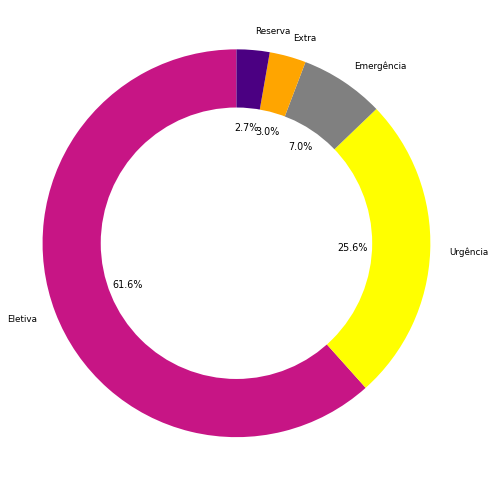

In [65]:
sns.set_context("paper", font_scale= 1)
# Pie chartdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnkAAAGeCAYAAADooBcGAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABipElEQVR4nO3dd5xddbX//9fKTJiUIZ0MJCRBxQJXFBBQxILSvRas2EVEv4peK/aLoniv+lOuYsPrVSlewYbtYlewi3RFBFSQBAJMSEJ6ZshM1u+PvQ85s+fMnPY5e5/9mffz8TiP5OzZZa2ZZGbNp5q7IyIiIiJxmVZ0ACIiIiISnoo8ERERkQipyBMRERGJkIo8ERERkQipyBMRERGJkIo8ERERkQipyBMRaYOZnWlmXvW6Pcdn35559pl5PVtEul9v0QGIiEzEzAx4EPBIYC9gPrATuA9YC1zj7quKi1BEpHupyBORrmJm+wFPA54KPBHYvc75dwEXA59z99s6H6GISDmou1ZEuoKZvc3MbgD+CnycpNCbtMBLLQHeBvzdzD5mZn0dDFMaYGbnZ7qRf1l0TCJTkYo8EekWbyHplm3VNOB04A9mtiBMSCIi5aXuWhHpZuuA3wC/Bm4D1gA7gAHgcOClwIrMNQcBPzazI919W46x5s7d9yk6BhHpXiryRKTbjACXAl8CfuTuoxOc94N0NunpwFmM/X52KPAe4N87GKeISFdTd62IdIsR4ELg4e7+bHe/dJICDwB3H3H3jwCvrPHh081soBOBioiUgYo8EekWT3T3V7QyQ9bd/xf4euZwH/CsIJGJiJSQijwR6Qrufkebt/hkjWPHtHlPEZHS0pg8EYnFlcD9wG5Vx/YuKJZxzGwF8FhgGUkr4zrgDuA37r65wLimA48gmdm8iGTZGge2AuuBfwJ/c/d7i4qxlnSh7IOAfYHFwBySeNcAN7j73zvwzL2Ax7FrYe4twK3AH/P8/JhZP3AY8LA0DiNZHPzb7r62zrXTgAcD+wFLST5vPSQLjK8D/uzut3Qu+jFxHAIcAOyRHr4HuMrdb2ziHgcBjyL5N7AzvcfV7n5T8KDLyN310ksvvR54ASeT/JCvfv0QsCbv8wiSH4LV97kDWNTB2O/OPO+WHD5fZ2aeeXvm488C/ljjc1p53Q98F9ivhWffnrnXmU1c+xjgAmDTJLFVv24DzgeeAUyvcb9fNnifiV7nNxj3Q4HzSIq5ye53K/ARYEGAr/EJJDO8Ryd41ijwY+DxVdccWeO8feo8Z58a1xxZ9fFDgG8DwxPEceQE990beBPwf8DGBr4Wa4DPAw9p8fOV/bdwftXH+oEP1Pn6XQ+cMMn9+0kmVa2e5B43Ac/s9P//bn8VHoBeeunVfa/0h2j2m+a7mrh+JnBD5vodwBM6GHMPScFU/cwrcvhcnZl55u3p8dnANxr4gVr9+XlZk8++PXOPMxu4phf4DBMXLI28xn0da/xgD1rkAdNJuuR3NHnf+4DTWvzazga+1sSzdgL/SdKydmSNj+9T53n71LjmSJKhVf/ZwNfsyBr3vCCNq5WvyQjwIWBak5+37L+F89Pjj2b8v9nJXh+uce8DgX80cY9PdPp7QDe/NCZPRGp5PZDtMjnLzI5o8PrPMn5h4zPc/bdtRzax/UkKgWp3dvB5EzKzWcBPgOc3cVkvcIGZPbszUT3gYpKvb2m+/5vZ7iStyW+i+WFG84DPmtkn0i7eRp85G/gBcFITzzLg3cB/NRVhfeem923la/YvJHG1ogd4L/DNZj53tZjZo0laQ1c0cdm7zOz0qnscQlJAPqSJe7zZzN7TxPlR0Zg8ERnH3beZ2fOBq0haMyD5fvE1MzvIJxn3Y2YvZ/ySJj8CPtqRYHd5eY1jl3X4mRP5MlApiHeQdLH9mGR822aS8UNPAl4DLKy6zoBzzeyX7n5f6KDSr83zMod3knx9fgrcQjKubQfJ2LwFJGO3DiSZxDLZTiK/IhkXBkm3YvUP87Xpxydz1QQxG3AJcHSND19B0tJ2Yxr3AMm4x5eQjNWr9maScYaNrp14HvDkGsd/TzKT+0aSVsI9gIOBF5GML6s8q6fB59TzKpJFvytuAL5F8vlaQ/J1WgE8l6TlbTKrgMuBv5B8rTeQ/HucQTIe8wCS7vjDM9c9h2Tdyf9oMYe5wPdIxv9BMmzjIpKFzgfT5z+SJNdDMtf+h5l9l2RYwXfTe0HyC1zlHveQjHN9JHBqjXu8z8y+6R0Yp9n1im5K1Esvvbr3BbyM8d0fE47PIykIsuPw7qSD4/DS584nGTRe/dxRYO8cPkdnZp5b3TV2BfDQSa5dAPyhxuf47Q0++/bMdWfWOf+6zPm3AQc0+Kwe4CkkBcbj6px7fuY5v2zj8/u2Gp+fzcCLJrlmOvDBGteNkizVU++Zz61x7RbgpEmumQa8kaTQqjwrRHdt5TVEUsA0Ozb2hyS/YO3fxDWHk4xpq37+DmBZg9f/cpL/E2cDMyf5HJ5dI/f/ISmsK+8/Xucen6hxj8+3+m+wzK/CA9BLL726+wV8scY3zHHj84BZJC0E2R8MHRuHV/XsL9SI8eKcPj9nTvBD+XfArAauX0zSIlR97V8bfPbtmevOrPOcbIxHdOhzcn7mOb9s8T7zSVrfqu81DDylwetPr5Hz9XWumUbS4pr9d/zUBp/58gn+PbRT5I0yyUSEOvdsqiisum4hyeSV6jg+2uC1v5wgj7MaiZfkl6Pq66rH2k74bzxzjysz97gP2K0T/967+VWaMRkiUph/I+kiqnaWmT0hc+xzJON/qnV6HB5m9izg1ZnD24F3dfK5dWwjaWmqu3euu68hGXNVbT8zWxQ4pmWZ9/e5++8CPyO0V5P88lDtI+5+eSMXu/vHgZ9nDj/azI6c5LITSIqtap9y94a6/t39QuA7jZzbhM+4+49audDTqqeF69YBb88cfmEr90pdRfILUb3nOklLXLXKWNs/krTQNnKPszOH55FM/JhSVOSJyKTcfTvJBIItVYd7gYsrhYiZnQy8InPpj+nwODwzezjJ7MGsd7r7yk4+u44L3H1VE+fXKgoODhVMKtQYsTy9KvN+PfDhJu9xeo1jp05y/ssy7++n+bFo72/y/MmM0vnxrBP5AWPH+S03syUt3uvDXmebwio/Iml9y/qIu+9s4h5ZBzV4bTRU5IlIXZ4sjvr/Mof3Bi40s0eSzKattppkOZCWWhEaYWYLgUvZNRC74nskS4QU6RtNnn8DybilatmWt3atzryfb2bPDPyMYNJ9hx+WOXyxuw81cx93/xNwTebwEye5JDuD/Efuvr7JZ94A/LmZayZxmbvfFeheTXH3YZLJHdUe08KthkgKxkafu4nxM+NbuUd2F53ljV4fCxV5ItIQd7+IZOxbtRNIZhtWd6mNknRVTrryfjvS5S0uZfwMyr8Ar+hkcdkAJ+lWavyCpHDZlDmcLV7b4u6rSWZUVrvIzP4tXfKl22RneAL8rMV7/STzvmaLVHosu0tKq8MNQg1TaOrf0mTMrNfMjjezj5jZD8zs72a2xsy2m5nXegHZz9Mete5dx/Xufn+T12R3ELnO3Xe0eY85Nc+KmIo8EWnGm4A/ZY7tnnl/hrv/plMBmFkfSffm4zIfug04zt03durZDdqYdnE3K7u1WX+IYDL+v8z72cCngLvN7GtmdoqZPbQDz21FrTiubfFeta7LthICPKjGsVZb5EK15N3c7g3MrM/M3gvcRdKN+U7gaSS/JO1BsoRJo+a3EMLdLVyzJfP+ngD36MT/qa6mdfJEpGHuPpSun3cN44s7SMbhfaRTzzezXpKlFI7JfGg1cHRR3VoZ2Ra5RmW7a4P/Eu7uX04nzGTXMZxDsujvSQBmtpZkdvCvgJ96g3uJBpYtJpzxXc6NqrUodq1iZV6NY63uSRuqJXtDOxeb2T4kLZm1itpWtFIotbI3c7Y1PsQ9plzDloo8EWmKu//dzL7F+ELhfuDkTnWVppuRf4VkL9hqa4Cj3P2fnXhuC4rsKq7L3U8xs+tIZjpOtLjxIpLP87MAzOxGkhnAX0zHaeUhW4RtbWLQfVat1t1auc+rcayV4gJaL/aztrZ6oZntSVKoTzQWbTtJAXxX+vchkuEW1U5g7HCMVna+CPF/oqv/X3UrFXki0hQzO4rxM2kBdiPZweGsDjzTgC8xfgmH9SQteNmxZjIJd/+0mV0AvJjkc3o4yddvIv9CMpnldDN7ibv/Pocws8VE6B/yte5Xq4Cd7PMymVavC+njjC/w7iGZKHUp8Od6hbOZraxxDymJKdd0KSKtS1sGvsrE3zveb2ZP7sCjzwVOzhzbRDIGL7uGnzTA3Te5++fd/UiSFqynkiz98TMmbr3aB/iFmT0+hxCzM1r709bcVtSaxHJfjWMbahxrdbB+oYP8027al2QOX02yw8mH3P36BltGg04AknypyBORhqQ/YL9Ksj9oteolLXpI1s9bHPC55zB++ZatJDsAXB3qOVOZu29398vd/YPufixJV+mTgHMYX/jMAM5Lx0d2UrYIM8bP9GzU0gbuD7XH0T24xWc+pMXrQnlG5r0DL21m1ruZTWcKzkiNiYo8EWnU+0hae6p9mvEL1u4FfKWNVpcHmNlHSfYDrbYdeEZOXYZTkruPuvtv3P3NJMVKdumShzH+30JotTaTb3WB6Fpru/2txrG/Mr7LttVnFr3wbvb517QwrOFgWhuDJ11CRZ6I1GVmTwHOyBy+Bjg9XT/vi5mPHQu8u81nfgB4R+bwMPDsRre1kvalCwG/hGRiTbXstnbVst2ArRQKtYr4o1u4D4yfjb2y1kzsdC236zOHsxN96krXHcw+M2/Z1vTbWrjHUSECkeKoyBORSaU7D1zE2O8XG4EXVC1w+kbG72/7ATN7UovPfCdJy2G1HcDz3T27sK10mLvfy/h13ybrks/u2TuzhWeuYfzizS9O10lsWLojy6GZw7+e5JLsdlj7mlmzrZYvpvYSQ3nKbmPXVPe6mfUwfpiElIyKPBGZUNU4vD0zHzrV3R9oGUgX/30BY5d7qIzPa2qFfDN7I+PX2hsh2UXj/5q5lwSVLa6yC81Wyy5Z0upYumwL8UKShXyb8fEG7pv92Ejm2Dlm1tBsWTObT/N73XZCdn2/Zrud345m1ZaeijwRmcy/M77L5rPu/q3sie5+M/C6zOElJOPzGuquM7NTgU9mDu8EXu7ulzQUsdRkZoea2f4tXrs/8MjM4Vpj5iqy492WprM9m/VFxq8T924zm2zv2QeY2VuA4zKHr3P3CVvy0u3fvpY5/EiSX1gmbQ0zs36SpUmCTTxqQ3aXj33M7DmNXGhmxwAfCB+S5E1FnojUZGZHMr7L9FrgbRNd4+5fAc7LHD4OeFcDz3sR8N+MHb/lwCnufnH9iKWOI4AbzezHZvZCM2uoO9HMDgC+x9ivywjJ1nITqbXf6ufMbGHD0QLuvoHkF41qM4BL051XajKz6Wb2fuDszIdGgX9r4NFvZfxM2+cAV5nZ0dlJRWa2m5k9l2TIQmV5mX808JxOupTxYyO/PNkSR2bWY2anpddWWi6zrZpSIloMWUTGSZdAuYix43o2ASc1sOPBG4DDSBbQrTjLzH7j7jU3bU/H/V3I+F881wDPMLPschDNeF06pkwSx6WvYTP7DckEmj+RfK4ry4rMBx6RnvevjP+6fCIdM1eTu99sZtcwdlbrCSR75N5AssNC9t/R5e7+2Rq3Owc4nrEtcnOAb5jZ70la3W4kWeplMcm/vZdSe+/b/3D3300Ud1X895rZySSF7PSqDx1IMtP4XjO7OX3mIpJ/69VLjdxBMvHom9lb13t2KO7+DzP7OvCiqsNzgcvM7HvAd0laXHeQfN4eS7Kt3SOqzj8feAqwIoeQpQNU5InIGFXj8PbKfOjV7l63dcLdt6WtLFcBs9PDPcDXzOzACdbpmknt70cDwHMbDr6202l9/9GY9ZHMVm12xuqPGT/Tupa3kxRE1b8oTCcZG1ZrfFjNMX7u7mb2PODbjJ+x+nh2tZzV818kW7k1xN1/YGYnkeyVPD3z4T3SVy2DJIVxrY9nJ6R02ptJPj/VRdo04NnpazK/B04DbupIZJILddeKSNZ7Gf+D/1x3/0ajN3D3m4DXZw4vBS5sdHyeBDfZRIlG7CDp/nxGI/vXpsvcnMT4nSua5u5bSAqnc2i++3ADcJq7v63ZfZXd/TvAIcAVDV7yE+CwdBeWWjtF1NpDt2PS1tZjab5Q+xZwbDqhSkpMRZ6IPCAdr/P+zOHrScYoNcXdLwAuyBw+geZnR0oA7v5FYBlJ68wlJF2mjbibpLh6pLuf7u4NF1npZJl9gFeSdP//mWSsW90isca9dqSLM+9PMu6zXuvsbcBHgYe4+7nNPq/quX8maQ07mmTMaCWHUZKi7VqSfX0f7+7Hu/uq9NJFmVttr1pyKDfu/jeSJWTex+SfMwd+AzzT3Z/v7tkJL1JC1uQvNiIiEgkzW0Iydu1BJOPwZpMseryZpAj8s7v/s7gIJ5a2CB8M7Esypmx3kjGFa4Ab0uKmMGZ2LvDaqkM3uPujiooHHhiKcRDwaJIitJdkrO1twJXNbHkm5aAiT0REJDAzu4Vk+7eKL7t7dgtAkY5Sd62IiEhAZnYsYws8aHxcn0gwaskTEREJJF0Q+RrGFnnbgSXpun8iuVFLnoiISIaZLTWzk9I9XBu9ZiHwf4xvxbtYBZ4UQUWeSHge6jUyMhLsXt3yUk7lecWYV6M53XDDDXcCX3vQgx40csYZZ/j111/vo6OjNc+9++67/eMf/7jvueeea4EjqbJw4UJWr159SjfkVLZXjHkFzqkuddeKhBfsP9WGDRuYN29eqNt1BeVUHjHm1WhOf/nLXzjggAPGHJs1axb77bcfCxcuZObMmWzYsIE77riD2267reY9pk2bxiWXXMKJJ54YIPKJxfh1gjjzCpxT3TVHteOFSBfbuHFjdN/klFN5xJhXOzlt27aNa665pqFz+/v7ueiii3jGM9rZka8xMX6dIM688s5J3bUiXWxoaKjoEIJTTuURY16N5rRgwQIOPrjW7muT6+np4SUveQnXXnttLgUexPl1gjjzyjsnteSJiIhkLFmyhGuuuYaVK1dy2WWXccUVV3DzzTezatUq1q9fz7Zt2+jt7WX+/PksXLiQAw44gCc/+ckcf/zxrFixoujwRQCNyRPpBI3Jm4RyKo8Y81JO5RFjXnmPyVN3rUgXGx0dLTqE4JRTecSYl3IqjxjzyjsnFXkiIiIiEVKRJ9LF1q6Nb79w5VQeMealnMojxrzyzklFnoiIiEiEVOSJdLH+/v6iQwhOOZVHjHkpp/KIMa+8c1KRJ9LFZsyYUXQIwSmn8ogxL+VUHjHmlXdOKvJEutjs2bOLDiE45VQeMealnMojxrzyzklFnkgXe/SjD8ZsetuvbrJy5cqiQwguxpwgzryUU3nEmFfeOanIExEREYmQijwRERGRCGlbM5Hwgv2nmjmzn6Gh4bbv474jQDRhDA0NRTegOsacIM68lFN5xJhX4Jy0rZlImfX09BYdQnAjIyNFhxBcjDlBnHkpp/KIMa+8c1KRJ9LFBgYWFx1CcIODg0WHEFyMOUGceSmn8ogxr7xzUpEn0sV6e9WSVwYx5gRx5qWcyiPGvNSSJyIiIiJt08QLkfCC/afq75/H1q1b275PN0282LJlS3TbFcWYE8SZl3IqjxjzCpxT3YkX8fUFiURkxoy+IEVeNxkeHo7uG3eMOUGceSmn8giZ1/DwMJs3b2br1q3s3LkzyD2rTZs2jdmzZ7P77rvT19c3aRx5fq1U5Il0MY3JK4cYc4I481JO5REiry1btnDvvffS29vLnDlz2Hvvvenp6QkQ3Vijo6Ns2bKFNWvWMDIywh577FGzmNOYPBF5wNy5c4sOIbgNGzYUHUJwMeYEcealnMqj3bw2b97M2rVrWb58OcuWLWPu3LkdKfAAenp6mDt3LsuWLWP58uWsXbuWzZs3jzsv76+VijwRERGJypYtW1i3bh3Lli3rWGE3kZ6eHpYtW8a6devYsmVLrs/OUpEn0sU2btxYdAjBzZs3r+gQgosxJ4gzL+VUHu3kde+99xZS4FVUCr177713zPG8v1aFD/gxs2nAU4EnAIuBLcDfge+4+9oiYxMpWoxjbWIcZxhjThBnXsqpPFrNa3h4mN7e3sIKvIqenh56e3sZHh5+YDJG3l+rIE8zs17gsKpDI+5+ZQPXPQ44D3hYjQ9/xsz+C3ifd9P6DyI5CrFvbbeZbOZZWcWYE8SZl3Iqj1bz2rx5M3PmzAkcTWvmzJnD5s2bH8gl769VqO7a44HfVL1Or3eBmR0O/IKkwLMar+nAO4DvpK19IlPO0qVLig4huNWrVxcdQnAx5gRx5qWcyqPVvLZu3do1S8r09/ePWQYr769VqOLpuewqzgA+O9nJZrYb8FVgZnrI2bWArFe9DDgB+HCgOEVERCRiO3fuLLyrtqKnp6cj6/I1KlSR9yR2FWnrgV/XOf9UYJ+qawzYAVwN/KXqvEqh9yYz2zdQrCKloTF55RBjThBnXsqpPGLMK++c2i7yzGwR8KD0rQM/8/p7pb2OXQUcwM+Avd39MHd/NHAAcGvV+dPTa0SmlMHBNUWHENzAwEDRIQQXY04QZ17KqTxizCvvnEK05GUnTVw/2clmtj/wL1WHNgAnVc+kdfe/knQBV3fbnhQgVpFSGR1VS14ZxJgTxJmXciqPGPMqXUseu1rxKq1yN9U5/9iqvztwgbtvyJ7k7jcAP6i6715mtqKNOEVKZ/ny5UWHENzKlSuLDiG4GHOCOPNSTuURY1555xSiyFuQeb++zvlPTv+sFG+XTHLuTzLvH9VoUCIiIiJTWYgib3bm/fjN2sY6gl0TLjYDv5/k3JvTPyvnx7eehIiIiEgHhCjyLPN++oQnJjNkF6VvHbiiziSN+zLvd28+PJHyWrVqVdEhBLdiRXyjLmLMCeLMSzmVR4x55Z1TiCIv23KX7b6t9sTM+982+azdmjxfpNRmz842lJdf9cKgsYgxJ4gzL+VUHjHmlXdOIYq87P6yD5/k3Mqki0rr32/q3Ht+5n18X3GRScyYMaPoEIIbGhoqOoTgYswJ4sxLOZVHjHnlnVOIIq+yeHGl2/XYWieZ2UyS3Ssq590PXFHn3osrl6d/ZrtvRaIWY0veli1big4huBhzgjjzUk7lEWNeeecUosi7mV1dtgackK6Fl/UqoLJjsAN/cPd6u68/OvP+ny1HKSIiIjKFtF3kufsI8F2SAs+BHuD7Zva4yjlm9nSS/Werd7n4WgO3f0zm/d/bjVekTNatW1d0CMEtWrSo/kklE2NOEGdeyqk8Yswr75xCLb18DvASdhV6DwZ+Z2aV7tX5VR+DZC29iya7oZn1k0zUqBSGd7n7PYHiFREREYlaiO5a3P1a4PPsaqWrFGYL0pdVHXPgTHev1zH9r0Bf1f3+ECJWkTIZGRktOoTgenp6ig4huBhzgjjzUk7lEWNeeecUpMhLvYlk94rqQq/6VTl+nrt/toH7ncyulj+AX4QJU6Q8BgYW1z+pZAYHB4sOIbgYc4I481JO5RFjXnnnFKzIc/dRd38+SXH2J5Kirvp1C/Aqdz+13r3MbD/guKprAf4vVKwiIiIisQs1Ju8B7n4hcKGZ7QEsI5mIsdrd72riNrOBt1S939Lk9SJRGB6uNwG9fGJc+y/GnCDOvJRTecSYV945BS/yKtz9XuDeFq+9Grg6bEQi5bNhw8aiQwhu7ty5RYcQXIw5QZx5KafyiDGvvHMKOSZPRAIbHo5vxXf9dl4eMealnMojxrzyzklFnkgXW758edEhBLdy5cqiQwguxpwgzryUU3nEmFfeOanIExERkWhMmzaN0dHuWH5qdHSUadOKK7VU5ImIiEg0Zs+e3TX73m7ZsqXQPcjN3eufJSLNCPafaubMfoaG2p9h674jQDRhDA0NRTfWJsacIM68lFN5tJrX8PAwa9asYdmyZR2Iqjl33HEHixcvpq8v2dsh8NfK6p3Qsdm1ZnYI8GTgIGA5MAfop/XWQ3f3hwQKT6QU+vpmBCnyukmMP5BizAnizEs5lUerefX19TEyMsLo6Gihu2aMjIwwMjLyQIEH+X+tghd5ZvZS4N3AI7IfavPWanKUKWfevLls3BjXMiobN25k3rx5RYcRVIw5QZx5KafyaCevPfbYgzvuuINly5YVUuiNjo5y5513sscee4w5nvfXKliRZ2azSLY1O5bxBV1la7OWb9/GtSKlVf0bYCyGhuJbFibGnCDOvJRTebSTV39/P+5eSKE3OjrKHXfcwcKFC+nv7x/zsby/VkGKPDPrAX4MHEFSkFUXdNVbk4mIiIh03O67746ZsWrVKnp7e5kzZw79/f0dKfhGR0fZsmULmzZtYmRkhD322GNcgVeEUC15bwGewNgWOwN2AtcBN5LsfrEFdbuKNGxwcE3RIQQ3MDBQdAjBxZgTxJmXciqPEHn19/fT39/P8PAwmzdv5s4772Tnzp0Bohtr2rRpzJ49e8wki1ry/lq1XeSZ2TTgHYwt7kaBTwJnu/s97T5DZKrq7S1u0HCndMv6VSHFmBPEmZdyKo+QefX19dHX18eiRYuC3bMVeX+tQrTkPQ5YRFLkVbpqX+Tu3wpwbxERERFpQYjFkKtn0TpwiQo8kTAWLlxYdAjBrV27tugQgosxJ4gzL+VUHjHmlXdOIYq8xemflckV3wxwTxERERFpQ4gi7/7M+9sC3FNEgK1btxYdQnDdMOMstBhzgjjzUk7lEWNeeecUoshbnXk/PcA9RYQ417+KcWX+GHOCOPNSTuURY1555xSiyLs6/bMyu3bvAPcUEeJsyStys+5OiTEniDMv5VQeMeaVd05tF3nufivwZ3aNyTum3XuKSGL58uVFhxDcypUriw4huBhzgjjzUk7lEWNeeecUoiUP4GPpnwa8yMz2DHRfEREREWlBkCLP3b8K/Dx9Oxs4L93qTEREREQKYO5hdhkzswXA5cABJOPzfgqc7O6DQR4gUh7Btu6bObOfoaHhtu/jviNANGEMDQ1FN6A6xpwgzryUU3nEmFfgnKzeCaG6a3H39cCRwM/SBx8L3GJmZ5vZEWY28WZuIlJTT0+o7aW7x8jISNEhBBdjThBnXsqpPGLMK++cgv4Ecff7zOx44LUke9fOAd6cvnaa2UZgM621dLi7PyRMpCLlMDCwmNtu+2fRYQQ1ODgY3fpXMeYEcealnMojxrzyzqkTzQQvBt5Isl5eZT9bgB5gQfpqRbAuMJGy6O1VS14ZxJgTxJmXciqPGPMqbUuemc0CLgaenvlQiOKsbr+ziIiIiOwSZOKFmU0DfsTYNfIqNw5VoLm7a8aulEGwVuf+/nlBFkTupokXW7Zsia4LJsacIM68lFN5xJhX4Jzq1lehWvLeQFLgVf9wM2AncB1wI3AvsIUu7XY1sxnAfulrEbA7SbzrgZuB69w9aDtruszMocAj02cayefpBuBqdx/V87r3eXmYMaMvul0vhoeHo/vGHWNOEGdeyqk8Yswr75zaLvLSH6zvZGzL3QjwCeAT7n5Pu8/oFDM7BHgGcBTwWCb/fGw3s+8D57j7H9p87hySz9lrSIqRWtaa2ReAj7r7Jj2ve56XJ43JK4cYc4I481JO5RFjXnnnFGIJlcOAvdK/G0mxd5K7v7NbCzwze46Z3QpcBbwPOIL6Be9M4CTg92b2FTOb2+KzHwfcBLyHiQsS0o+9B/hrek1L9Lywz8vb3Lkt/TPrahs2bCg6hOBizAnizEs5lUeMeeWdU4gi71FVf3fg2+7+nQD37aTDgAdP8nEH7gPun+DjLwWuMLPJiopxzOwI4BfAkhofHgJqrXq7FPiFmT2+mWfpeeGfJyIiUiYhirzKkiiVAYDfDHDPvG0EziMp3vYBdnP3Be7eB+wLvAPI7tzxCODSRrdvM7PFwCXArKrDO4CPp8+YRdJa+FDg7PRjFbOAS9J7NETPC/u8omzcuLHoEIKbN29e0SEEF2NOEGdeyqk8Yswr75xCFHnZ1q7bAtwzL38FXgUscfdT3P2r7r6yeoKFu9/q7h8j2a7tt5nrH0syDqwRZwEDVe+3A09397enz6j4h7ufDjwzPadiT+CDTeSm54V9XiFiHJMS4zjDGHOCOPNSTuURY1555xSiyFudeV+GZU5WAa8EHuXuX3b3bfUucPd7SSZp3J750DvrXWtmD06fV+297v7TSZ73Y+CMzOFTzOxBel6+zytSiH1ru01fX3w7HMaYE8SZl3IqjxjzyjunEEXetemfldm1ywLcs6Pc/XPufn6zS2q4+wbgA5nDK8zsgDqXvpVkB5CKfwCfauCRn0zPrZgOvKWB6/S8sM8rzNKltYYbltvq1dnfC8svxpwgzryUU3nEmFfeObVd5Ln730hmN1bG5B0zyekx+C7j1/p7dJ1rnpV5/6VGCsz0nC9nDp9Y7zo9L/jzRERESidESx7Ax9I/DXiRme0Z6L5dJ23NW5c5PGG+ZvYYYO/M4W808cjsucvM7GA9L5/nFU1j8sohxpwgzryUU3nEmFcZx+Th7ucDl6dvZwPnm1l8X51dpmfeT7aLx1My7+9x94Ynp7j7rYyf2ftUPS+35xVqcHBN0SEENzAwUP+kkokxJ4gzL+VUHjHmlXdOoVryAJ5Psn2UkXTZ/jDGFr10bbzsCrWTLfq8f+b9lS089o+Z9/vpebk9r1Cjo2rJK4MYc4I481JO5RFjXqVsyQNw9/XAE4HvkBR6RwE3m9l/mdkTzCyWaTLPrnHsmknOf0TmfStLzPyzzj31vM49r1DLly8vOoTgVq5cWXQIwcWYE8SZl3IqjxjzyjunICWlmWV/0DpJoTcHeFP62mlmG4HNTN69ORF394e0FWgY2XXxbnX3myc5/2GZ93e08MzsNdl76nmde56IiEgphWo33IddhV2lgKv8WZl120OyO8YCWtNKYRiUmb0cOCRz+L/rXDY/876V/Xzvzryfp+fl9jwREZFSCjkmD2oXYh7gVTgz2xv4RObwHcBnJ7lmJuM/x3UXXq5he+Z9r5nN0PM6+7xusGrVqqJDCG7FihVFhxBcjDlBnHkpp/KIMa+8cwpZ5FkHX4Uys+nA1xnfCvm6Ortl9Nc4NtRCCLWuma3ndfx5hZs9uyvDasvWrVuLDiG4GHOCOPNSTuURY1555xSquza7C0RsPgc8PnPsXHf/QZ3rarUOZff6bUStva1m6nkdf15L1q1bx9q1awHo7+9nxowZzJ49e8yA2xUrVjAyMsLg4OADa+EtXbqU4eFhRkZG2LBhAwBLluwFJNubVXa/SK5bw+joyJiJGatWrWL27NkPPK8SC8CGDRsYHExWjpkxYwZz585lxowZ42IaGhpi48aNDA0ldfDAwACjo8k606FyGh5OPv19fX0PrP7e29vLwMAAvb294+65detWhoaG2LJlCwCLFi0CoKenRzl1MKd58+axbt065aScCsmpt7eX9evXP3BP5TQ+p4c//OHUY+5d0RvatczsvcCHMod/Bxzl7pNuLGpmewDZhc5OSPdRbSaGE4AfZg7v4e5r9bzOPa8Nwf5TPfzh+/O3v/297fu47wgQTRi33HJLQ9+cyiTGnCDOvJRTecSYV+Cc6vZ0hh6TFxUzO5XxBd6NwDPqFXipLTWOtTL2q9Y1te6t54V9noiISGmpyJuAmT0X+Hzm8O3Ase5+XyP3cPftwM7M4VkthJPtShx193HjyvS8sM/rBpXu1phUuh1iEmNOEGdeyqk8Yswr75ziW046ADM7GriIZNmXikHgGHe/q8nbbWDshI1WdgHZK/N+siJTzwv7PMmYP+tRbV0/b34/G+5LGk7v2/bnECGJiEgNasnLMLPDge8Cu1Udvo+kwPtHC7f8W+b9shbukb1mskFael7Y5xVqZGS06BCCGx3NNsaWX09PT/2TSijGvJRTecSYV945qcirYmaPIhmQX71uxRaSwf03tHjb7G4YD27hHg/KvL9Jz8vteYUaGFhcdAjBLdoju/Vz+VVmu8UmxryUU3nEmFfeOanIS5nZQ4GfMnb3g2HgWe6e3dC+GX/NvD+shXs8NvN+sqJEzwv7PBERkVJSkQeY2TLg58BA1eER4AXuflmbt788835PM2u49Sk9dyBzOHtPPa9zzytUZf21mNw/3D3LuYQyY0ZXbpjSthjzUk7lEWNeeecUZOKFmbVbCDXC3f2o0Dc1s8UkBd7yqsM7gVe4+/cDPOIaYDWwtOrYC4CPNHj9SZn3d7r7NXpebs8r1IYNG4sOIbhNm1rZia67zZ0bXxc0xJmXciqPGPPKO6dQs2uPpLN7zFon7m9mc4GfAA/LfOg0d78oxDPc3c3se8BpVYdfZWYfc/dJR9WbWQ9wSubw9/S8/J5XtOHhrlzZpS1qySuPGPNSTuURY15559RN3bW57llrZrOAS4EDMx96h7v/d+DHfYKk+7diX+CNDVz35vTcipH0Xnpevs8rTPW2ZbFYsnd8a19Vb0kUkxjzUk7lEWNeeecUssirVaQ18/Iar44Ue2Y2HfgW8ITMhz7k7h8L/bx06ZXzs88ys2MmusbMjgPOyhw+z91v1fPyfZ6IiEgZhequvaDF6wyYS7Kg7YFAX3q8UuR9m85sN3UOcELm2K3AajN7bQv3u8Xd6w3ePwN4JlBZE2MWcKmZnQOcS7KbBiRLgrwWeBMwver6NcD7mohJzwv7PBERkVIx904OpWucme0GPAt4N0nB58A/gKe7e9DFas3sl8CTA97yAnc/uYHnPpFkDGB2Wy2AyuCrWh3220m2U/ttM0HpeWGf14Rg/6lmzuxnaKj9Gbbu4cbBtbvjRV/fdIbTcXmx7HgxNDQU5fihGPNSTuURY16Bc6rb09k1Y/Lc/X53/yZwKPApkuD3BX7dzBIZ3czdfwMcA9xd48MzqF2Q3A0c3UpBoueFfV4R+vri+gYHsFvf9PonlczQUHwTZCDOvJRTecSYV945dU2RV+Huo+7+ZpIxV0ayptl303F0pefuvwP2I1nyY/0kp65Pz9nP3X+v53XH8/I2b158SwjMmTOr6BCC27gxvqVuIM68lFN5xJhX3jmFGpPXCW8mGXO1APgXktmTZ4e4sbsfGeI+bTx/I/BuMzuDpOXyAKAy5fBe4C/AVe4+MsEt9LwCn5envr6++ieVjFryyiPGvJRTecSYV945dW2R5+6bzOxi4PUkLXpvIlCR1y3SouMP6UvPK9nzREREulnXdddmVM9YXWpmBxUWiUgBBgfXFB1CcGvvja8LZmAgu1NeHGLMSzmVR4x55Z1Ttxd5q9M/K7MVH11UICJF6O3tKTqE4Hp6uv3bTvNGRyfdbKW0YsxLOZVHjHnlnVO3f7fNjqGKr6wXERER6YBuL/KWZd7vLCQKkYIsXLiw6BCCm79g96JDCG7t2rVFh9ARMealnMojxrzyzqnbi7ynpX9WFvy7t6hARERERMqka4s8M3sk8ArG7h7wt4LCESnE1q1biw4huG3b4lsWob+/v+gQOiLGvJRTecSYV945dWWRZ2ZHkmxXVb2g1ibgiiLiESlKjOtEDQ+F22KtW8S29VJFjHkpp/KIMa+8cwqyTp6ZLW/ncqCfZFLFgcCJwBHpca/680vurjF5MqXE2JK3fVv7e/F2m9mzZxcdQkfEmJdyKo8Y88o7p1AtebcD/2zxdRvwZ+BnwMcYW+BVDAIfChSrSGksX97O70/dacnei+qfVDIrV64sOoSOiDEv5VQeMeaVd04hd7yw+qc0xNlV4BmwATje3TcEur+IiIhI9EKOyfNAL0iKOwN+Dhzk7n8OGKeIiIhI9Mzd659V7yZmocbK7QRuBn4FnO/uVwW6r0ie2v9PlZo5s5+hofbHsLmHm+wwf9aj2rq+r286w8NJPPdti+P3t6GhoSgHiceYl3IqjxjzCpxT3R7UUN21T2njWge2ABuBu9x9e5iQRMqvp6cXiGuiQozbmo2MZDfniUOMeSmn8ogxr7xzClLkufuvQtxHRMYaGFjMbbf9s+gwglq0eC6rbl9TdBhBDQ4ORrmmV4x5KafyiDGvvHOK71dqkYj09oacG9Udenp6ig4huBhbHCDOvJRTecSYV945qcgTERERiZCKPJEutnr1XUWHENzg3euLDiG4pUuXFh1CR8SYl3IqjxjzyjsnFXkiXWzGjL6iQwhut77p9U8qmeHhuCbHVMSYl3IqjxjzyjsnFXkiXSzGMXm9vfF924lx7BDEmZdyKo8Y89KYPBF5wNy5c4sOIbjd58S3H+WGDRuKDqEjYsxLOZVHjHnlnVNHmwnMbAFwMLAMmAv000Zh6e4fDBSaiIiISNSCF3lmNhc4FXglsF/g26vIkyll48aNRYcQ3OZNW4sOIbh58+YVHUJHxJiXciqPGPPKO6egRZ6ZPQs4Fxigge02mhRsqyiRsohzTEqoXRC7R4xjJyHOvJRTecSYV945BXuamb0UOJ9d3bEhi7LQBaNIKYTYt7bb3D8cbh/dbtHXF98saIgzL+VUHjHmlXdOQSZemNkjgC+n93N2FXiWvpxkb9o7gVUtvFamf4pMKUuXLik6hOAG9lpQdAjBrV69uugQOiLGvJRTecSYV945hWrJ+3B6r+ribgNJ1+13gBvcPb4mCREREZEu1XaRZ2b9wNNICrxKq90VwLPc/d527y8ylcU4Jm90dLToEIKLcewQxJmXciqPGPMq45i8JwLT2dWKtw54mrtvCHBvkSltcHBN0SEEt3ZNfDOGBwYGig6hI2LMSzmVR4x55Z1TiDF5y6r+7sAXVOCJhDE6GmNLnmbXlkWMeSmn8ogxr7xzClHkLUz/rMyA/XWAe4oIsHz58qJDCG7J3ouKDiG4lStXFh1CR8SYl3IqjxjzyjunEEVedkJFfP1LIiIiIiUTosi7I/N+9wD3FBEREZE2mHt7axab2XLgdnZNvHilu1/YZlwiZRZsIfCZM/uDLIjsHm4B4vmzHtXW9X190xlOF0S+b9ufQ4RUuKGhIWbMmFF0GMHFmJdyKo8Y8wqcU92NItpuyXP3VcCVVQ87vt17ikhi9uzZRYcQ3MxZ8a1iv3VrfPvxQpx5KafyiDGvvHMKsuMFyWLIkBR6zzGzBwe6r8iUFttvsQB9M6YXHUJwQ0NDRYfQETHmpZzKI8a88s4pSJHn7t8DvpW+nQ58xczi++kkkrMYW/JmzYrvW8OWLVuKDqEjYsxLOZVHjHnlnVOoljyAk4Hfk7TmPQ74qZktDXh/EREREWlQsCLP3bcBxwBfJyn0jgBuNrNPm9mTzCy+gTgiHbZu3bqiQwjuvvWbiw4huEWL4lv7D+LMSzmVR4x55Z1TkKWXzey2zKHKPrazgdPSl5vZRmATrc0+dHd/SFuBioiIiEwRofbX2IddhV2lgKv8aVV/zk9frQi2LIVIWYyMjBYdQnAxbmvW09NTdAgdEWNeyqk8Yswr75xCjsmD2oWYB3iJTEkDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU8idcusuyiciIiIi+QhV5H0g0H1EpMrwcPu7XXSb+4fD7b7RLWJczxDizEs5lUeMeeWdU5Aiz91V5Il0wIYNG4sOIbhNm7YVHUJwc+fG1wUNcealnMojxrzyzin0mDwRCWh4OL4V39WSVx4x5qWcyiPGvPLOSUWeSBdbvnx50SEEt2Tv+Na+WrlyZdEhdESMeSmn8ogxr7xzUpEnIiIiEiEVeSIiIiIRMnctQycSWLD/VDNn9jM01P4MW/dw4+Dmz3pUW9f39U1nOB2Xd9+2P4cIqXBDQ0NRjh+KMS/lVB4x5hU4p7pL16klT6SL9fXF9Q0OYLe+6UWHENzQUHwTZCDOvJRTecSYV945qcgT6WLz5sW3hMCcObOKDiG4jRvjW+oG4sxLOZVHjHnlnZOKPJEu1tfXV3QIwaklrzxizEs5lUeMeaklT0RERETapiJPpIsNDq4pOoTg1t4bXxfMwMBA0SF0RIx5KafyiDGvvHNSkSfSxXp7e4oOIbienvi+7YyOjhYdQkfEmJdyKo8Y88o7p/i+24qIiIiIijyRbrZw4cKiQwhu/oLdiw4huLVr1xYdQkfEmJdyKo8Y88o7JxV5IiIiIhFSkSfSxbZu3Vp0CMFt2xbfsgj9/f1Fh9ARMealnMojxrzyzklFnkgXi3GdqOGhcFusdYvYtl6qiDEv5VQeMeaVd04q8kS6WIwtedu3tb8Xb7eZPXt20SF0RIx5KafyiDGvvHNSkSfSxZYvX150CMEt2XtR0SEEt3LlyqJD6IgY81JO5RFjXnnnpCJPREREJEIq8kREREQiZO5edAwisQn2n2rmzH6Ghtofw+YebrLD/FmPauv6vr7pDA8n8dy37c8hQirc0NBQlIPEY8xLOZVHjHkFzsnqnaCWPJEu1tPTW3QIwcW4rdnIyEjRIXREjHkpp/KIMa+8c+rq77ZmttDMlldeRccjkreBgcVFhxDcosVziw4huMHBwaJD6IgY81JO5RFjXnnn1FIzgZntATwLOAbYG1gA3AfcCVwGfN/d7woQ3+eB56R/d1qMV6Ssenvj+yff09NTdAjBxdjiAHHmpZzKI8a88s6pqZ8gZjYDeA9wOtBX/SGSIuyxwHOBT5vZ14F3u/sdbcZYt89ZRERERMZquLvWzOYBvwTeC8wgKb4qL8+87wFeBNxkZqcFjVhkClm9OkSDeHcZvHt90SEEt3Tp0qJD6IgY81JO5RFjXnnn1FCRZ2a7Ab8ADmNXUVf9osYxA2aRtOpdYma7hw1dJH4zZvTVP6lkduubXnQIwQ0Px7eLB8SZl3IqjxjzyjunRlvyPgQcxNiirtJqtwMYBEaqjsHYYu9E4DdmtmeQqEWmiBjH5PX2dvV8r5bEOHYI4sxLOZVHjHl13exaM3sQ8FbGrv1lwNeBw4GZ7r4EmAk8CjibZBJGdbFn6cd+rVmyIo2bOze+mai7z4lvP8oNGzYUHUJHxJiXciqPGPPKO6dGfqU+reo8I2mxe5m7v8jd/+jpasruvtPd/+Lubwf2Bb7I2EKP9PhvzGzfYBmIiIiIyDiNFHkvYldrnANnuPtXJ7vA3Te4+2uAZwObKofT1zKSFr39W45aZIrYuHFj0SEEt3nT1qJDCG7evHlFh9ARMealnMojxrzyzmnSIs/MlgFLqg6tBD7e6M3d/XvA44DbGNuqtyfwKzM7qKloRaaYOMek7Cw6hOBiHDsJcealnMojxrzyzqleS95jqv7uwP+6e1Pfod39FpL18/7I2EJvIXCZmT22mfuJTCUh9q3tNvcPh9tHt1v09cU3CxrizEs5lUeMeeWdU70ib1H6Z6U4+0MrD3H39cBRwM8ZW+jNBX5mZk9q5b4isVu6dEn9k0pmYK8FRYcQ3OrVq4sOoSNizEs5lUeMeeWdU70ib37mfcubrrn7NuDpwPcZW+j1Az80s6NbvbeIiIiIjFWvyMt+vK1VTN39fpJtz77O2EJvFvB9M3taO/cXiU2MY/JGR0eLDiG4GMcOQZx5KafyiDGvbhuTd1/m/eJ2H+juo8CLgQsYW+jNAL5tZie2+wyRWAwOrik6hODWrolvxvDAwEDRIXREjHkpp/KIMa+8c6pX5N2d/llZ5+7BIR7qiVcCX2Bsobcb8HUze0GI54iU3ehojC15ml1bFjHmpZzKI8a8uq0l7y+Z90EnSLj7a4FPM7bQmw581cxeFvJZImW0fHl8G8Qs2XtR/ZNKZuXKlUWH0BEx5qWcyiPGvPLOadKS0t3/aWabSSZHGPBEM7PKLhchuPubzGwIeDu7FkzuAc4D4uurEhEREclBIzte/IZdLW0LgRNCB+Hu7wTOYmyL3jRggLF75oqIiIhIAxop8i5L/6wUW6d0IhB3fz/wbsYWejbxFSLxW7VqVdEhBHfXnWuLDiG4FStWFB1CR8SYl3IqjxjzyjunRoq8H1b93YBnmNk+nQjG3T8KvLn6UCeeI1IWs2fPLjqE4GbOim8V+61b49uPF+LMSzmVR4x55Z1T3SLP3W9m1wQMJxnH975OBeTunwL+HyrwRJgxY0bRIQTXN6Ot5Ta70tDQUNEhdESMeSmn8ogxr7xzaqQlD5I17e6qeh1pZks7FZS7fxF4GTCKumxlCouxJW/WrPgK1y1bthQdQkfEmJdyKo8Y88o7p4YWbHH3s4GzOxxL9pkXm9kvgJl5PldEREQkBl290qC7awkVmdLWrVtXdAjB3bd+c9EhBLdoUXxr/0GceSmn8ogxr7xzarS7VkRERERKREWeSBcbGRktOoTgYtzWrKenp+gQOiLGvJRTecSYV945qcgT6WIDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU5Aiz8wWhLhPnWe8o9PPEBEREYlFqJa868zs8ED3GsPMFpjZD4APd+L+It1seHi46BCCu394R9EhBBfjeoYQZ17KqTxizCvvnEIVecuAX5rZ2wPdDwAzezxwPR3YL1ekDDZs2Fh0CMFt2rSt6BCCmzs3vi5oiDMv5VQeMeaVd04hl1CZDnzEzJ4EvMLd17dzMzN7J3AWEN/IS5EGDQ/Ht+J7t7fkvXrxm5q+xnYz/P7xm/T8z5pzQoRUGLWklEOMOUGceZW1JQ+SbcgMeBptdN+a2UIz+yHwn3T5On4inbZ8+fKiQwhuyd7xrX3VtyTOb1UrV64sOoTglFN5xJhX3jmFKvIq/S+VQq+l7lszewJJ9+xx6X2qfzW+oP0wRURERKaGUEXeIcBf2VWYObu6by9tZPatmb0buAxYWnUfIykgT3b3UwLFKiIiIhK9IEWeu98MHAqcT1KYwa4i7QSS7tvH17rWzBaZ2Y+AD5F0z3rVtTcCh7r7hSHiFCmbVatWFR1CcHfdubboEIIbvmuk6BA6YsWKFUWHEJxyKo8Y88o7p2Bj8tx9KG1tO5mJu2/HrHVnZk8k6Z49lrHdswacBxyWFpAiU1JfX3wDj3frm150CMFN67P6J5XQ0FB8E3+UU3nEmFfeOQXf8SJtdTsMuImx3be9wIfT7ts9zOzfgV8ASxjfPftyd3+Vu28PHZ9ImcybF98SAnPmzCo6hOB6+uPcPGjjxviW8FFO5RFjXnnn1JEpYe5+k5kdCpwLvJyxXbAnAKuA3RjfencD8AJ3v6UTcYmUTV9fX9EhBKeWvPJQS0o5xJgTxJlX6VvyKtx9u7ufDJwCVFrkKoVeH2Nb7wz4IvBYFXgiIiIi7et4H4O7nw88FthSOcTYlr3twIvd/TXuHl/ZLtKGwcE1RYcQ3Np74+uC2bFutOgQOmJgYKDoEIJTTuURY15559TxIi9dPuWjwO4TnDIDeKyZxbmaqEgbenvj2/Clpye+8WsWX0oAjI7GV7wqp/KIMa+8c+rot6Z02ZTrSMbhVS9snF1m5Y3A78wsvvnSIiIiIgXoWJGXLpdyOcnyKZWizki6bc9jV9FXKfQOJVlP79mdikmkbBYuXFh0CMHNXzBRo3559c6Pr8UVYO3a+NY0VE7lEWNeeecUvMgzswVmdinwYZJdL6rH3/0JeIy7v4pk67I1jF1mZR7wLTM7x8zim4InIiIikpOgRZ6ZHc6u7tns8ihfAB7n7v8AcPdfAAeStPZlu2/fQNJ9+6CQ8YmUzdatW4sOIbht2+KbXzW6bWfRIXREf39/0SEEp5zKI8a88s4pWJGXds/+kl3ds5WCbSvwEnd/rbsPV1/j7oPA0cAHGd99ewhwrZk9N1SMImUT4zpRw0M7ig4hOB/2+ieV0IwZ8e24opzKI8a88s4pSJE3SffsDcAh7n7xRNd64kzgGGCQsd23c4FvmNmnzWy3ELGKlEmMLXnbtw3XP6lkRrfHWeTNnj276BCCU07lEWNeeecUqiXvaemf1d2zXyJZ3PhvjdzA3S8n6b69jPHdt6cBvw8Uq0hpLF++vOgQgluy96KiQwiub0mcK0CtXLmy6BCCU07lEWNeeecUeuJF9d6zr252cWN3X0PSoncmUBnkUin0DgoYp4iIiEjUQhZ5BtwIHOru/9vqTdLu2w+SFHv3sKtVT0REREQaFLLIOw84zN1vDnEzd/8lSfftL0LcT6SMVq1aVXQIwd11Z3xrXw3fNVJ0CB2xYkV869Mrp/KIMa+8cwpV5L3S3V/l7tsD3Q8Ad78XOBZ4P7u6b0WmjJ6e+MZ6RbmtWZxrITMyEl/xqpzKI8a88s4pyHdbd78gxH0muLe7+1nAUZ16hki3GhhYXHQIwS1aPLfoEIKbvjDOKm9wcLDoEIJTTuURY15551SaX6nd/ddFxyCSt97eGFvy4iuIrDfOocNqSSmHGHOCOPMqZUueiIiIiHQXFXkiXWz16ruKDiG4wbvXFx1CcPcPxtfiALB06dKiQwhOOZVHjHnlnZOKPJEuNmNGX9EhBLdb3/SiQwhu2m5xdtcOD8e3O4lyKo8Y88o7JxV5Il0sxjF5vb3xfdvRmLzyUE7lEWNeGpMnIg+YOze+mai7z4lvP8qe3eP8Vrphw4aiQwhOOZVHjHnlnVN8zQQy5ZlZD3Ao8EhgEcmuKfcCNwBXu/togeGJiIjkQkWeRMPM5gDvBF5DUtzVstbMvgB81N035RZcizZu3Fh0CMFt3rS16BCCG90c51rt8+bNKzqE4JRTecSYV945qciTKJjZ44BLgCV1Tl0EvAd4hZk9z92v6HhwbYhzTEp8BZGPeNEhdEScY0LLndOX93/1uGM7+nuZvqX57xWn/PV/QoTUMWX/WtWSd05xDiSRKcXMjiDZ47hWgTcE1JrOtBT4hZk9vpOxtWtoKL7ZZfcP7yg6hOB23h9nkdfXF9/s7hhzmrYjvl+cIM6vVd45qciTUjOzxSQteLOqDu8APg7smx6fCTwUODv9WMUs4JL0Hl1p6dJ6DZPlM7DXgqJDCG63gfhaHABWr15ddAjBxZjT/Qt3KzqEjojxa5V3TirypOzOAgaq3m8Hnu7ub3f3W32Xf7j76cAz03Mq9gQ+mGO8IiIiuVCRJ6VlZg8GXpk5/F53/+lE17j7j4EzModPMbMHhY4vhBjH5I2Oxje5WWPyyiPGnGxU//7KQmPyRBr3VqB6+4R/AJ9q4LpPpudWTAfeEi6scAYH1xQdQnBr18Q3Y3jHuvgKV4CBgYH6J5VMjDlN3xDfOFeI82uVd04q8qTMnpV5/6VG1sBLz/ly5vCJoYIKaXQ0xpa8+AaJx7ryolpSysF2qiWvLNSSJ9IAM3sMsHfm8DeauEX23GVmdnB7UYW3fPnyokMIbsneEy1hWF59S+L7YQSwcuXKokMILsachveIbxYqxPm1yjsnFXlSVk/JvL/H3W9r9GJ3vxUYzBx+attRiYiIdIk4f/2UqWD/zPsrW7jHH0lm21bs13o4IuXwhyc9s/5JqTWL5rJ+7cRjKA//9fdDhCQiHaKWPCmrR2TeN9yKV+Wfde5ZuFWrVhUdQnB33bm26BCCG74rvrGTAPM3bCk6hOBWrFhRdAjB9d0b36LpEOfXKu+cVORJWT0s8/6OFu6RvSZ7z8LNnj276BCCmzkrvvFDPTOt6BA64v7p8XX2bN0a4d7JfT1Fh9ARMX6t8s5JRZ6U1fzM+3tauMfdmffzWgulc2bMmFF0CMH1zZhe/6SSsb44i7yR6fEVD0NDQ0WHENzO3eL89xfj1yrvnFTkSemY2UzG/9vd1sKttmfe95pZV1VVMbbkzZrVVZ/iIHpmxfmtdHi3+AryLVvi64LeOSO+Yhzi/FrlnVOc35kkdv01jrXy61Gta+KrqkREZEoy9zgXUZR4mdkyIDsj4Sh3v6zJ+zwV+EXm8DJ3v7Od+ERERLqBWvKkjGq1wO3Wwn1qzQCIbxCIiIhMSSrypIxqDWpoZaBXrWviGwQiIiJTkoo8KR133w5kN0Cd1cKtZmbej7q7WvJERCQKKvKkrDZk3u/Zwj32yry/r7VQREREuo+KPCmrv2XeL2vhHtlr/t5iLCIiIl1HRZ6U1c2Z9w9u4R4Pyry/qcVYREREuo6KPCmrv2beH9bCPR6bea8iT0REoqEiT8rq8sz7Pc2s4da89NyBOvcUEREpLRV5UlbXAKszx17QxPUnZd7f6e7XtBeSiIhI9+gtOgCRVri7m9n3gNOqDr/KzD7m7qOTXWtmPcApmcPfCx2jTC1mtifwUGA5sIhki7ydJDPBB4Fr3D27U4uINMHMpgEHAvuTrKowg2Tv8jXArcCf3L2VvcyjpG3NpLTMbF+ScXTVv6y81d0/Uee6twEfrzo0AjzC3W8NH6XUYmYzgP3S1yJgd5KFqNeTTKq5zt1HiouwPjN7LHACcATJD51FDVx2J3A+8Hl3z7ZEi8gEzOwhwFuAFwELJjl1BLgW+AHwX+4+pRe4V5EnpWZm/wOcWnVoG3Ciu/9sgvOPA77D2IWQ/8fdX9O5KFtnZgbsSzKx5ND0z4MYu1vHSnffJ//ommNmhwDPAI4imfQyWU/CduD7wDnu/occwmuamf0YOK7Fy7cA73H3TwcMKVdm1gtcDTw6+zF3t/wjmpiZHUn7Y25/5e5Hth2MNCX9d/Z+4B00v33lfu6eXYkhV2Z2MnBe4Ns+xd1/2ciJ6q6VsjsDeCawOH0/C7jUzM4BzgVuT48/GHgt8CZgetX1a4D35RJpg8ysH3g3SVF3KDCv0IDaZGbPAT5Gc8vczCQZN3mSmf0v8AZ339iJ+DpkGNhM8u+x1m4s/cCnzGxfd39TrpGF82ZqFHgioZjZ7sB3gadOcEplOMRsau9FHquGezk08UJKzd3vAZ5H0vJTsRvwduA2kpa9bcA/gNMZW+BtB56b3qObLALeAxxDyQu81GFMXuA5yW4j90/w8ZcCV5hZI92hRVgFXEAyzvMQYHd3n+Hue7j7bJKupROAr5PkWu2NZvbaXKMNwMxWAGcWHYfEy8z6gEsZX+D9FXgrSQ9Hn7svdPcZJL/oPw34DNBt39NDug+4qtGT1V0rUTCzI4BvMn6rsoncDTzP3X/fuahaY2b7AP9s4pKu7q41s48A76w6tBH4NvAL4LfA6sr4u3TczXOAtzF+iZs/AkfUm1iTFzN7IfD3ZmZlm9nRJMMF+qsObwSWu/umwCF2jJn9H/D0iT5egu7avwP/1eRt7nL374eKSSZnZp8k6Xmpdibwn+6+o86100nG7v3M3e/uSIANMrOHA09p8fJ+kl6Qap9z99c3/HwVeRILM5sLvAt4DRMPzF0PfAH4SLd2/9Uo8raSDCS+Kn3tC5xV9fGyFHl/Bc4GvlZv9puZ7UFSCD4h86HT3P3cjgSaEzN7GXBh5vBL3f2rRcTTLDN7HskvVBXfBU6sPqcERZ7G13UxMzsUuIKxvY2nu/vZBYVUiAnG8z3W3a9s+B4q8iQ26UDdQ4ED2DXj8V7gL8BVJZi1uRj4ALuKur9Wt17V+I/f7UXeaSRd5l9pphXOzOYB1wH7VB3u6lwbkU6muZuxLZVfcPf/V1BIDTOzOSQz2pekhy4FLiHzg0hFnrTDzK4jmbFe8T13P7GYaIpjZpcDR1Ydutnd92vmHpp4IdFJi7g/pK/Scfc1wOuKjiMUd/9ci9dtMLMPMLaAWGFmB7j7DWGiy1+6xuNVjO3uXDLR+V3mP9kV63bgjcCTiwtHYpMW5AdWHdpBMnxjSjGz5Yz/v3VBs/fRxAsR6WbfZfxkhRhmdG7OvO/678VpF1r1Lx//4e7NjB0VacSrMu9/PEXXMH05UN0ivhP4SrM36fpvLCIydbn7BmBd5vCeBYQS2tLM+zsKiaJB6S4xX2DXz4y/MX5AuEhbzGwW8NzM4VKMVe2Al2fe/7yVBdRV5IlIt5ueeV/qgcTpUjCPyxxud6HeTnszY7vQXu/uEy15I9Kqgxm7UD3Az4sIpEhm9niSLRKrNd1VCxqTJyJdLC2I5mYOl3YNrHTSxTmMXbn/DpJlVbpSOjboA1WHvu7uU+4Hr+Ti0Mz7f7r7mJZ8M1sKPJykNXwHyaS6myPbJjDbireJFr9HqMgTkW727BrHGl6XrpukP5w+SbJ4d8UI8KoubxX7DMmOApCMJXxrgbEEk66ldiCwjGTR8U0kSyz9zd3vLC6yKe2QzPvrKn9Jl+55A/Akxo5Vq3z8JpKliT7t7ls7GWQnpYtAn5Q5/A13317r/HpU5IlIN8vuKXxr0XtRTiRdXuTFmcOzSFbiP4RkKYSeqo9tAV450T7L3cDMnkuy33DF+9z9rqLiCehQkkWos12DAJjZbSTLw3xSk0tytSzzfrWZzQf+h/Fj9bL2Az4MvNnMXuLuv+hEgDl4FuN3OmqpqxZU5IlIlzKzlzP+N/v/LiKWBi0m2S+5nq0kW5yd5e63dzSiNqT7hp5TdehPwKcLCie0WvsJV3swyfIwrzezc0kW4h3ufFhTXnZoxn3A9xm/KPpkBoAfm9nJZVlgPOMVmfe3uvtvW72ZJl6ISNcxs72BT2QO3wF8toBwQvshyW4eK4sOpI7/ZNcsYCfZbaQrtpTLUQ9JF+Hv00XKpbPmZd6/nrEF3i+B55Os1dhHMtP+ROAnmet6gS+Z2cGdCLJTzGwAODZzOLs7TlNU5IlIV0nHSn2d8VvTva7edmgl8XySrsDrzKwr1/xL18Q7rerQed24z3ML1pL80HwFyUzORSSTYOYBjwBOAX5a47qDge+a2Yx8wpyyZmfeL6z6+zvc/Snu/i13v9vd73f3QXf/nrsfT1IQVs+87wMuSCc7lcVLGNvD6qjIE5HIfA54fObYue7+gyKCaZS7/8PdrfIi+f46D9gfeCWQHSP0aOAKMzsq30gnl66J99/s+vmwnmTv4TK7i2TD+iXu/gp3v9Ddr3P3de6+w903uvst7n6eux9HstNAdrbm4cAH8w58ipmoS/zT7j7puozpzjofyRx+JGN3lul22a7aX7U7pENFnoh0DTN7L3Bq5vDvgLcUEE5bPLHR3W9y9/Pd/WjgOGBN1WkzgG+ny5R0izcBB1W9f5e7ry0qmBDc/W/u/jV339Hg+b8m+UUju1zPG8ysLFvQldGWGsc2Ae9p8PoPMPb/F8DL2oooJ2Z2IPCozOGWJ1xUqMgTka5gZqcCH8ocvhF4RiyD3t39p8AxQHW38xzgo8VENJaZLWPsmnhXAF8sKJxCufsqku7bajMZ39oi4WS3+wP4prvXKv7GSb9PZCdblGVv5ezaeFuBb7V7UxV5IlK4dKmOz2cO3w4c6+735R9R57j7n4GzM4efZ2YLa52fs88A/enfR0nGQZZ6h5F2uPuPGL8uY3ZgvIRT6/96szNLs+cvNrOu3grRzHoZv/zSJY0Wt5NRkScihTKzo4GLGLuG3CBwTCRrstWS3Wi8l+aWiQjOzJ4DPLPq0Gfd/fqCwukm/5d5n92VQcK5pcax25u8R63zu+EXqMkcT7L0S7W2u2pBRZ6IFMjMDge+y9htvu4jKfD+UUhQOXD3vzO2yxbgQUXEUqW6m/Ye4IyiAuky2cW3Z5tZzUWUpW031ThWqwt3MptqHMuuv9dtskMAVhFoP2sVeSJSCDN7FMmacdXLJmwBTnD3G4qJKlcbM++LLhx2r/r7nsBGM/N6L+C87I1qnHdmXkl0wPoax+bnHsXUcGONY/01jk2m1vm1Cr+uYGbzGLurDMCFoYZJqMgTkdyZ2UNJ1iObV3V4GHiWu/+xkKDyl10H8N5CopB6arUCZQt0CeMKkgkH1bJbndVT6/xunh3+QpI1/aq1tTZeNRV5IpKrdAbnzxk7BmUEeIG7X1ZMVPkyswMY/4091vGHZffQzPvt7p4tRCQAdx9i/O4V2TUz68meP+ju2aVwukm2q/b36XCOILR3rYjkJt0a6udA9bpwO4FXuPv3i4mqENnlEu4HflNEIFXey9gu20Ydzvh8Xpd5f3VLEXWHEzLv/1xIFFPHJcBzqt6/wMzemhaAk0oX8n5p5nDX/uKY9mg8LnM4yISLChV5IpILM5tL8lv6wzIfOs3dLyogpJaZWV+ra/elW4a9MXP45+7e7ADzoFrdzN3MhsgUee6eXQ6nlMzsCOCJmcPZliYJ65skO4s8JH2/kGQx5Pc1cO3pwN6ZY0GLpsCyrXhDJFs6BqPuWhHpODObRbJf64GZD73D3f87/4jadr6ZfSzdULxhZvZMkiKhejbxTpJWNOmAVvcuNbNFjC8QRkmW+5EOSXclyRZ07zGzSXeuSJcAOitz+Ep378qiPP13mc3pu+4edLynijwR6Sgzm06ycnt2HbgP1duPsovNJGk1WG1mPzOzfzOzx5vZnOqTzKzHzPY3s1PN7NfA9xg/M/PDWo+uo84xsw83U5Cb2f7Ar9jVmlTxZXevtZabhHUx8LOq9z3AhWZ2cfr/rAfAzKaZ2WFmdh7J95jpVddsIdkzuls9hbHDVqADrY7qrhXpQmZ2CHDIBB8+PPN+dzN77UT36oKus3MYP67pVpICacK4J3GLuwdZQyqAHuDo9AWAme0gWbJhN5LlHCZrSTrH3f+9oxHKHODfgNPN7HKSQvta4C/VXeRpgf54ktmOL2ZswQDJGm7vzCXiKc7d3cxeBPwSeGTVh16YvkbNbCPJzOee8XdgGHiJu/+107G2IdtVexdjC9sgVOSJdKenA+9v8NwFwLmTfLzoIm//GscewuQxT+YCAi0U2iHTqb/C/l3AG9z9OznEI4lekn2Dj6kcMLP7SRbbncXk6xTeChwf2xZ73czd15nZk0m6x4/LfLiH8UsQVawGntvNSzGZ2WzGTi4B+F93Hw39LHXXiog071SSyQYXAysbvGaYpDh9BfBQFXhdYTeSgnyiAq+y2POB7r4qt6gEAHdf7+7HAydRf4b2rcDbSf5vdW2Bl3ou4xdt7sgEEbXkiYg0yd3Xkuw/+xV4YGmYhwP7kBQNs0nW/tsEbCDp6rsxHVQu+foEyTZRTwYOprEdFO4CvgN8xt2z25pJztz9G8A30jU2DwNWkLS+bgTWAFe7+60FhtisbFft1Z3qWrZAO2eIiIh0tXRG477Ag0mW2pgPzCBpZb2PZGeEa9VqJ7FQkSciIiISIY3JExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERHAzM40M6963V50TCLt6C06ABGRqczMDHgQ8EhgL2A+sBO4D1gLXOPuq4qLUETKSkWeiEjOzGw/4GnAU4EnArvXOf8u4GLgc+5+W+cjFJEYqLtWRCQnZvY2M7sB+CvwcZJCb9ICL7UEeBvwdzP7mJn1dTBMEYmEijwRkfy8haRbtlXTgNOBP5jZgjAhiUis1F0rIlKsdcBvgF8DtwFrgB3AAHA48FJgReaag4Afm9mR7r4tx1hFpERU5ImI5G8EuBT4EvAjdx+d4LwfmNmZJK13ZzH2e/ahwHuAf+9gnCJSYuquFRHJzwhwIfBwd3+2u186SYEHgLuPuPtHgFfW+PDpZjbQiUBFpPxU5ImI5OeJ7v6KVmbIuvv/Al/PHO4DnhUkMhGJjoo8EZGcuPsdbd7ikzWOHdPmPUUkUhqTJyJSHlcC9wO7VR3bu6BYcpUuGr0ceATJRJS5wHRgA7AeuAm4wd13FhVjNzGzXpJxm8uBPYA5JJ+ne4Fr3f2fBYYnOVGRJyJTjpmdDJyXOfwj4F/d3Zu4zyOAq4HZVYfvBA5y97Xtxpnl7jvNbD2wZ9XhjiylYmZHApdnDp/o7t9r455fB15QdegeYO+JxiWa2ULgOcCxwJHAojqP2GhmPwT+P3e/vtU4m5FOjHl/1aGV7r5PC/e5nbGzqD/g7me2cJ+jgDeQLLQ9Z5Lz/kEyPvQT7r6l2edIOai7VkSmHHc/Hzg/c/gE4J2N3sPMZgLfZGyBNwK8qBMFXvrMHmBh5vB9nXgW8CuSJV2q1Zr80RAzmwc8M3P4K5MUeB8iKQK/ADyP+gUeJK17LwKuM7MvTqVFo83sYWb2M+DnwIlMUuCl9gU+CNxmZs/ucHhSEBV5IjJVvR64MXPsLDM7osHrP8v4hY3PcPffth3ZxPYn6aKsdmcnHpS2aF6QOfw0M9ujxVu+CJiROXb+JOc/gvZ6m14FXG5m2WdGx8yeDFwBHN3C5XsA3zKzt4aNSrqBumtFZEpy921m9nzgKna1xvUCXzOzSbtbzezljG/V+hHw0Y4Eu8vLaxy7rIPPuwA4E7D0/XTgJdSeAFLPyZn3f3T3vzZ47RqSPG8gGXu3HtiUxrMA+BfgOJIuyp6q6w4HPg28uoV4S8HMngT8lLHjNCEp/r8B/BG4C9gKzAMOIJmR/dSqc6cBZ5vZSne/pNMxS35U5InIlOXuN5nZ60jGJlXsDVxoZjXH55nZfsDnModXAy9vZjxfs8xsPnBK5vBO4Pudeqa7rzSzy4Cjqg6fTJNFXvo5OyxzODsmMmsjcC7wZeCaOp/bH5MUKfsDXyQp7ipONbMvufsVzcRcBma2GPgaYwu8zSSLZ39pgq7wy4FPpa1/F5Hsi1zxZTO7MsAscOkS6q4VkSnN3b9CsvNEtZrj88xsFrXH4b2wU+PwqnyU8ZMsvuHuHemurZItxh5tZgc1eY9sq+cQSXEymVPd/TR3v7rR4jltGTyKpOuy2lsaC7N0PgXsVfV+PfAkd/9CA4ts/wo4gmS2bcUc4O3Bo5TCqMgTEYF/I+kKrHaWmT0hc+xzJF2D1To9Dg8zexbjuxy3A+/q5HNT3yZpVat2cqMXp5NFXpq9p7tn7zlGq62i7r6dZLxltRNjG5tnZvsCz88cfk0zs4rd/XbgzZnDr0onyUgEVOSJyJSXFgbPB6qXkugFLjazRfDAsiuvyFz6Yzo8Ds/MHs74CRAA73T3lZ18NjzwucnutPFiM8tOAJnIcYxtbYL6XbVtcfdrgeoux92Agzv5zAK8ibE/w69scTzd14C7q97PIlmuRiKgIk9EBHD3W4D/lzlcGZ/3SJLZtNVWAy/r8Di8hcClJEuDVPse8JlOPbeGbFG2CHh6g9eenHm/is5OFqnIjit7TA7PzNPxmfcXtXKTdPHoX2YOP6mVe0n3UZEnIpJy94tI1mWrdgLwe5IWjopROrgeHoCZzSYp8PbNfOgvwCs6WVxmpZMWbs4cPrnedelkkezaeBc0uyuFJZ5oZh80s++a2c1mdo+ZbTMzr/UCHp+5TatLv3QdM1vC+H8XV7dxy+y4zv3auJd0Ec2uFREZ603AY4FHVx3bPXPOGe7+m04FkC7i+x3gcZkP3QYcV288W4ecx9iu6aeZ2WJ3XzPJNS8GqhckrrX23oTMbBrwGuDdJNtztWN+m9d3k1pdz79Ndn4LIrvgtpSUWvJERKq4+xDJ+LzNE5zyY+AjnXp+uufo14FjMh9aDRzt7nd16tl1fIWkBbOil/ETKrJOzrz/tbvf2sjDzGwB8DuSZVTaLfAA+gPco1s0svtHO2IqiKc0teSJiGS4+9/N7FuMX/rjfuDkTnWVpi1XXyFZrLbaGuCoIjeVd/e7zewnwNOqDp8M/Fet89M16w7JHG5owkW6VM1ljG1NrXY/SdG7mmSR3+2MLUABnszYYihYM1cX6HRLW6OTaqTLqcgTEclIN3nPzqSFZJbma4CzOvBMI1mv74WZD60nacG7JfQzW3AeY4u8A8zs4HQ2a1a2QN4CfKvB57yH8QXeRuC/SZZ0udbdd0x2AzP7FfFOIMjubgHJ5yXULx+TdcFLiajIExGpYmZ7Al9l4uEs7zezX6eLyYZ0LuO7NzeRjMHLruFXlO8D6xjbknQyMKbIm2BtvG+6+9Z6DzCzmYxfvPifNN+SmZ2R3O2aaWlcX+PYG919dahgJA4akycikkq7S78KDGQ+NFT19x6S9fMWB3zuOYxfvmUrcIK7tzNrMih3v5/xS3W82MyyLUsnAHtmjjW6Nt7RjJ3JDPDaFrqqOz1urSLbetZqt3AzRWmtWd0PbvG5EjEVeSIiu7yPsRu3Q7LB/asyx/YCvpIWhW0xs48Cb8wc3g48w91/3+79OyBbrC0EnpE5dnLm/T+amI2c3TLtXuBnDV4LgJkNAEubuaYNWzLvm57gkbZezmniklpd909u9rkSPxV5IiKAmT0FOCNz+Brg9HT9vC9mPnYsydIe7TzzA8A7MoeHgWe7++Xt3LtT3P064E+ZwydX/pLOis0Wfec38YhsC+k/W5joclST57cju5zN3Ba2UHssTbQAuvtfgHsyh7OTdURU5ImIpC0/FzH2e+JG4AVpFyUkrW3ZsXEfMLOWBveb2TtJWg6r7QCe7+4/aeWeOcq25h2ffg4hWRuvuvt2J3BhE/fuybxvZex4du/aTsouJNwDPLLJe2T3oG3ETzPvDzGzo1u4j0RMRZ6ITGlV4/CyY8hOdffbKm/SPVxfQDJWrqIyPq+p3RTM7I2MX2tvhGQXjf9r5l4F+SrJMiYV1WvmnZw59+funt1ibDL3Zt7vl3ZnNsTMXsj43S466Zoax05s9GIzW04Du4fU8AnGjwc8x8yyC3fLFKYiT0Smun9nfPfeZ9193HIf7n4z8LrM4SUk4/Ma6m4zs1OBT2YO7wRe3uIG87lLt3O7NHP45HSP3+wesY1OuKjILscyk/Gf85rM7EDgc00+ry3ufi9wU+bw68ys7sSPdD3ArzF+okkjz72eZFeUavsDX0+3xGuamc0xs5e1cq10JxV5IjJlmdmRjO8yvRZ420TXuPtXGF+4HAe8q4HnvYhkrbfqgtCBU9z94voRd5Xs5+CRwKcyxzYA323yvpcxtrUU4MNm9oLJLko/fjm7dmsYafK57Tg/834B8J10796azGxfkngPTw+1ssbdG4G7M8dOAK5Mx5g2xMwOMbOPA6uA97cQh3Qpy3GPaxGRrpEugXI9yUzZik3AY9z9H3WunQVcCfxL1eFR4Eh3/+0E1wyQjN/KjjEbBGpe04TXpS1KuUm3X7uD8d3c1c5199NauPd/UntSy8+BbwA3ksxA3gM4kGRMW/XuGpeRfJ6rx0te4O4n13numYwtcla6+z4NxLuApDUvO2lkLUlR/2uSbuh+4CHA8cBz2fVv4Rskky9WVF37AXc/s4FnHwb8Cqg12eM6km34rkqfv4VkH+Z5wENJ9sB9Qua5t7r7vvWeK+WgxZBFZMqpGoe3V+ZDr65X4AG4+zYzez7JD89K11gP8DUzOzDtzsyaSe3vuQMkP/DbcTrjx7J1lLuPmNlXgLdPclqzXbUVHyKZvZzt+j06fU3mbyS7hnyzxWc3zd3Xm9lrgUsY20q7CHhv+prIH4BTSArXVp59ZTr55xJgWebDBzF+SRqZQtRdKyJT0XsZXyyc6+7faPQG7n4T42dxLgUubHR8XgQmK+JudPerWrmpu28D/hX4XZOX/gp4Yt6tmgDu/h2SrfCa6Sb+DnBsIzuB1Hn2VSStcl9l/B6+zdhIsj2aREJFnohMKWb2ZMaPO7oeeGuz93L3C4ALModPAN7ZUnAlkxa6f5zgw+e3ee9B4Ckk485W1jn9WpIC6ynuXti+q+l4zUeRFG+T7a17HclSOc9x9+xiyq0+e627vxR4OPBZ4NYGL11Jsmfy84E93T27bqOUmMbkiYhI1zOzfyEZd7eIpOt7M3A7cHU37tmaLmXyRGA5yUSMHSRjGK+sXpqnwzHsTdJdu4hkZ5I+ks/bRuA24KYJhhZIJFTkiYiIiERI3bUiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhKh/x/SblekkdI67AAAAABJRU5ErkJggg==
dims = (7, 7)
labels = ['Eletiva', 'Urgência',  'Emergência', 'Extra',  'Reserva']
sizes = [train_df.TP_CIRURGIA.value_counts().values[0]/100,
         train_df.TP_CIRURGIA.value_counts().values[1]/100,
         train_df.TP_CIRURGIA.value_counts().values[2]/100,
         train_df.TP_CIRURGIA.value_counts().values[3]/100,
         train_df.TP_CIRURGIA.value_counts().values[4]/100]

#colors
colors = ['mediumvioletred', 'yellow','gray', 'orange', 'indigo']
 
fig1, ax1 = plt.subplots(figsize=dims)
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show();
fig.savefig('tp_cirurgia.png', dpi=fig.dpi);

In [ ]:
## Tipo de anestesia

In [66]:
## Local pos cirurgico

In [67]:
for x in range(len(train_df.LOCAL_POS_CIR)):
    if train_df.LOCAL_POS_CIR.iloc[x] == 'RPA':
        train_df.LOCAL_POS_CIR.iloc[x] = 'UNIDADE'
    elif train_df.LOCAL_POS_CIR.iloc[x] == 'OBITO':
        train_df.LOCAL_POS_CIR.iloc[x] = 'UTI'

In [68]:
train_df.LOCAL_POS_CIR.value_counts()

UNIDADE    39336
UTI        14707
ALTA        1386
Name: LOCAL_POS_CIR, dtype: int64

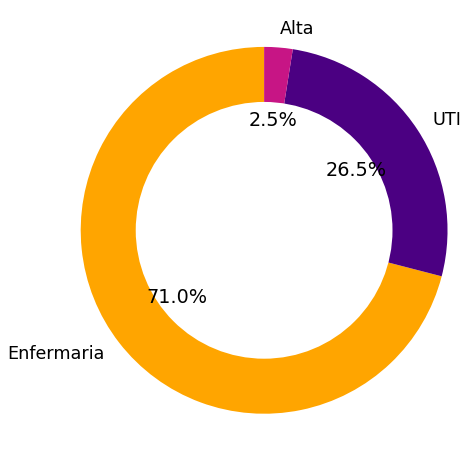

In [69]:
sns.set_context("paper", font_scale= 2)
# Pie chartdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnkAAAGeCAYAAADooBcGAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABipElEQVR4nO3dd5xddbX//9fKTJiUIZ0MJCRBxQJXFBBQxILSvRas2EVEv4peK/aLoniv+lOuYsPrVSlewYbtYlewi3RFBFSQBAJMSEJ6ZshM1u+PvQ85s+fMnPY5e5/9mffz8TiP5OzZZa2ZZGbNp5q7IyIiIiJxmVZ0ACIiIiISnoo8ERERkQipyBMRERGJkIo8ERERkQipyBMRERGJkIo8ERERkQipyBMRaYOZnWlmXvW6Pcdn35559pl5PVtEul9v0QGIiEzEzAx4EPBIYC9gPrATuA9YC1zj7quKi1BEpHupyBORrmJm+wFPA54KPBHYvc75dwEXA59z99s6H6GISDmou1ZEuoKZvc3MbgD+CnycpNCbtMBLLQHeBvzdzD5mZn0dDFMaYGbnZ7qRf1l0TCJTkYo8EekWbyHplm3VNOB04A9mtiBMSCIi5aXuWhHpZuuA3wC/Bm4D1gA7gAHgcOClwIrMNQcBPzazI919W46x5s7d9yk6BhHpXiryRKTbjACXAl8CfuTuoxOc94N0NunpwFmM/X52KPAe4N87GKeISFdTd62IdIsR4ELg4e7+bHe/dJICDwB3H3H3jwCvrPHh081soBOBioiUgYo8EekWT3T3V7QyQ9bd/xf4euZwH/CsIJGJiJSQijwR6Qrufkebt/hkjWPHtHlPEZHS0pg8EYnFlcD9wG5Vx/YuKJZxzGwF8FhgGUkr4zrgDuA37r65wLimA48gmdm8iGTZGge2AuuBfwJ/c/d7i4qxlnSh7IOAfYHFwBySeNcAN7j73zvwzL2Ax7FrYe4twK3AH/P8/JhZP3AY8LA0DiNZHPzb7r62zrXTgAcD+wFLST5vPSQLjK8D/uzut3Qu+jFxHAIcAOyRHr4HuMrdb2ziHgcBjyL5N7AzvcfV7n5T8KDLyN310ksvvR54ASeT/JCvfv0QsCbv8wiSH4LV97kDWNTB2O/OPO+WHD5fZ2aeeXvm488C/ljjc1p53Q98F9ivhWffnrnXmU1c+xjgAmDTJLFVv24DzgeeAUyvcb9fNnifiV7nNxj3Q4HzSIq5ye53K/ARYEGAr/EJJDO8Ryd41ijwY+DxVdccWeO8feo8Z58a1xxZ9fFDgG8DwxPEceQE990beBPwf8DGBr4Wa4DPAw9p8fOV/bdwftXH+oEP1Pn6XQ+cMMn9+0kmVa2e5B43Ac/s9P//bn8VHoBeeunVfa/0h2j2m+a7mrh+JnBD5vodwBM6GHMPScFU/cwrcvhcnZl55u3p8dnANxr4gVr9+XlZk8++PXOPMxu4phf4DBMXLI28xn0da/xgD1rkAdNJuuR3NHnf+4DTWvzazga+1sSzdgL/SdKydmSNj+9T53n71LjmSJKhVf/ZwNfsyBr3vCCNq5WvyQjwIWBak5+37L+F89Pjj2b8v9nJXh+uce8DgX80cY9PdPp7QDe/NCZPRGp5PZDtMjnLzI5o8PrPMn5h4zPc/bdtRzax/UkKgWp3dvB5EzKzWcBPgOc3cVkvcIGZPbszUT3gYpKvb2m+/5vZ7iStyW+i+WFG84DPmtkn0i7eRp85G/gBcFITzzLg3cB/NRVhfeem923la/YvJHG1ogd4L/DNZj53tZjZo0laQ1c0cdm7zOz0qnscQlJAPqSJe7zZzN7TxPlR0Zg8ERnH3beZ2fOBq0haMyD5fvE1MzvIJxn3Y2YvZ/ySJj8CPtqRYHd5eY1jl3X4mRP5MlApiHeQdLH9mGR822aS8UNPAl4DLKy6zoBzzeyX7n5f6KDSr83zMod3knx9fgrcQjKubQfJ2LwFJGO3DiSZxDLZTiK/IhkXBkm3YvUP87Xpxydz1QQxG3AJcHSND19B0tJ2Yxr3AMm4x5eQjNWr9maScYaNrp14HvDkGsd/TzKT+0aSVsI9gIOBF5GML6s8q6fB59TzKpJFvytuAL5F8vlaQ/J1WgE8l6TlbTKrgMuBv5B8rTeQ/HucQTIe8wCS7vjDM9c9h2Tdyf9oMYe5wPdIxv9BMmzjIpKFzgfT5z+SJNdDMtf+h5l9l2RYwXfTe0HyC1zlHveQjHN9JHBqjXu8z8y+6R0Yp9n1im5K1Esvvbr3BbyM8d0fE47PIykIsuPw7qSD4/DS584nGTRe/dxRYO8cPkdnZp5b3TV2BfDQSa5dAPyhxuf47Q0++/bMdWfWOf+6zPm3AQc0+Kwe4CkkBcbj6px7fuY5v2zj8/u2Gp+fzcCLJrlmOvDBGteNkizVU++Zz61x7RbgpEmumQa8kaTQqjwrRHdt5TVEUsA0Ozb2hyS/YO3fxDWHk4xpq37+DmBZg9f/cpL/E2cDMyf5HJ5dI/f/ISmsK+8/Xucen6hxj8+3+m+wzK/CA9BLL726+wV8scY3zHHj84BZJC0E2R8MHRuHV/XsL9SI8eKcPj9nTvBD+XfArAauX0zSIlR97V8bfPbtmevOrPOcbIxHdOhzcn7mOb9s8T7zSVrfqu81DDylwetPr5Hz9XWumUbS4pr9d/zUBp/58gn+PbRT5I0yyUSEOvdsqiisum4hyeSV6jg+2uC1v5wgj7MaiZfkl6Pq66rH2k74bzxzjysz97gP2K0T/967+VWaMRkiUph/I+kiqnaWmT0hc+xzJON/qnV6HB5m9izg1ZnD24F3dfK5dWwjaWmqu3euu68hGXNVbT8zWxQ4pmWZ9/e5++8CPyO0V5P88lDtI+5+eSMXu/vHgZ9nDj/azI6c5LITSIqtap9y94a6/t39QuA7jZzbhM+4+49audDTqqeF69YBb88cfmEr90pdRfILUb3nOklLXLXKWNs/krTQNnKPszOH55FM/JhSVOSJyKTcfTvJBIItVYd7gYsrhYiZnQy8InPpj+nwODwzezjJ7MGsd7r7yk4+u44L3H1VE+fXKgoODhVMKtQYsTy9KvN+PfDhJu9xeo1jp05y/ssy7++n+bFo72/y/MmM0vnxrBP5AWPH+S03syUt3uvDXmebwio/Iml9y/qIu+9s4h5ZBzV4bTRU5IlIXZ4sjvr/Mof3Bi40s0eSzKattppkOZCWWhEaYWYLgUvZNRC74nskS4QU6RtNnn8DybilatmWt3atzryfb2bPDPyMYNJ9hx+WOXyxuw81cx93/xNwTebwEye5JDuD/Efuvr7JZ94A/LmZayZxmbvfFeheTXH3YZLJHdUe08KthkgKxkafu4nxM+NbuUd2F53ljV4fCxV5ItIQd7+IZOxbtRNIZhtWd6mNknRVTrryfjvS5S0uZfwMyr8Ar+hkcdkAJ+lWavyCpHDZlDmcLV7b4u6rSWZUVrvIzP4tXfKl22RneAL8rMV7/STzvmaLVHosu0tKq8MNQg1TaOrf0mTMrNfMjjezj5jZD8zs72a2xsy2m5nXegHZz9Mete5dx/Xufn+T12R3ELnO3Xe0eY85Nc+KmIo8EWnGm4A/ZY7tnnl/hrv/plMBmFkfSffm4zIfug04zt03durZDdqYdnE3K7u1WX+IYDL+v8z72cCngLvN7GtmdoqZPbQDz21FrTiubfFeta7LthICPKjGsVZb5EK15N3c7g3MrM/M3gvcRdKN+U7gaSS/JO1BsoRJo+a3EMLdLVyzJfP+ngD36MT/qa6mdfJEpGHuPpSun3cN44s7SMbhfaRTzzezXpKlFI7JfGg1cHRR3VoZ2Ra5RmW7a4P/Eu7uX04nzGTXMZxDsujvSQBmtpZkdvCvgJ96g3uJBpYtJpzxXc6NqrUodq1iZV6NY63uSRuqJXtDOxeb2T4kLZm1itpWtFIotbI3c7Y1PsQ9plzDloo8EWmKu//dzL7F+ELhfuDkTnWVppuRf4VkL9hqa4Cj3P2fnXhuC4rsKq7L3U8xs+tIZjpOtLjxIpLP87MAzOxGkhnAX0zHaeUhW4RtbWLQfVat1t1auc+rcayV4gJaL/aztrZ6oZntSVKoTzQWbTtJAXxX+vchkuEW1U5g7HCMVna+CPF/oqv/X3UrFXki0hQzO4rxM2kBdiPZweGsDjzTgC8xfgmH9SQteNmxZjIJd/+0mV0AvJjkc3o4yddvIv9CMpnldDN7ibv/Pocws8VE6B/yte5Xq4Cd7PMymVavC+njjC/w7iGZKHUp8Od6hbOZraxxDymJKdd0KSKtS1sGvsrE3zveb2ZP7sCjzwVOzhzbRDIGL7uGnzTA3Te5++fd/UiSFqynkiz98TMmbr3aB/iFmT0+hxCzM1r709bcVtSaxHJfjWMbahxrdbB+oYP8027al2QOX02yw8mH3P36BltGg04AknypyBORhqQ/YL9Ksj9oteolLXpI1s9bHPC55zB++ZatJDsAXB3qOVOZu29398vd/YPufixJV+mTgHMYX/jMAM5Lx0d2UrYIM8bP9GzU0gbuD7XH0T24xWc+pMXrQnlG5r0DL21m1ruZTWcKzkiNiYo8EWnU+0hae6p9mvEL1u4FfKWNVpcHmNlHSfYDrbYdeEZOXYZTkruPuvtv3P3NJMVKdumShzH+30JotTaTb3WB6Fpru/2txrG/Mr7LttVnFr3wbvb517QwrOFgWhuDJ11CRZ6I1GVmTwHOyBy+Bjg9XT/vi5mPHQu8u81nfgB4R+bwMPDsRre1kvalCwG/hGRiTbXstnbVst2ArRQKtYr4o1u4D4yfjb2y1kzsdC236zOHsxN96krXHcw+M2/Z1vTbWrjHUSECkeKoyBORSaU7D1zE2O8XG4EXVC1w+kbG72/7ATN7UovPfCdJy2G1HcDz3T27sK10mLvfy/h13ybrks/u2TuzhWeuYfzizS9O10lsWLojy6GZw7+e5JLsdlj7mlmzrZYvpvYSQ3nKbmPXVPe6mfUwfpiElIyKPBGZUNU4vD0zHzrV3R9oGUgX/30BY5d7qIzPa2qFfDN7I+PX2hsh2UXj/5q5lwSVLa6yC81Wyy5Z0upYumwL8UKShXyb8fEG7pv92Ejm2Dlm1tBsWTObT/N73XZCdn2/Zrud345m1ZaeijwRmcy/M77L5rPu/q3sie5+M/C6zOElJOPzGuquM7NTgU9mDu8EXu7ulzQUsdRkZoea2f4tXrs/8MjM4Vpj5iqy492WprM9m/VFxq8T924zm2zv2QeY2VuA4zKHr3P3CVvy0u3fvpY5/EiSX1gmbQ0zs36SpUmCTTxqQ3aXj33M7DmNXGhmxwAfCB+S5E1FnojUZGZHMr7L9FrgbRNd4+5fAc7LHD4OeFcDz3sR8N+MHb/lwCnufnH9iKWOI4AbzezHZvZCM2uoO9HMDgC+x9ivywjJ1nITqbXf6ufMbGHD0QLuvoHkF41qM4BL051XajKz6Wb2fuDszIdGgX9r4NFvZfxM2+cAV5nZ0dlJRWa2m5k9l2TIQmV5mX808JxOupTxYyO/PNkSR2bWY2anpddWWi6zrZpSIloMWUTGSZdAuYix43o2ASc1sOPBG4DDSBbQrTjLzH7j7jU3bU/H/V3I+F881wDPMLPschDNeF06pkwSx6WvYTP7DckEmj+RfK4ry4rMBx6RnvevjP+6fCIdM1eTu99sZtcwdlbrCSR75N5AssNC9t/R5e7+2Rq3Owc4nrEtcnOAb5jZ70la3W4kWeplMcm/vZdSe+/b/3D3300Ud1X895rZySSF7PSqDx1IMtP4XjO7OX3mIpJ/69VLjdxBMvHom9lb13t2KO7+DzP7OvCiqsNzgcvM7HvAd0laXHeQfN4eS7Kt3SOqzj8feAqwIoeQpQNU5InIGFXj8PbKfOjV7l63dcLdt6WtLFcBs9PDPcDXzOzACdbpmknt70cDwHMbDr6202l9/9GY9ZHMVm12xuqPGT/Tupa3kxRE1b8oTCcZG1ZrfFjNMX7u7mb2PODbjJ+x+nh2tZzV818kW7k1xN1/YGYnkeyVPD3z4T3SVy2DJIVxrY9nJ6R02ptJPj/VRdo04NnpazK/B04DbupIZJILddeKSNZ7Gf+D/1x3/0ajN3D3m4DXZw4vBS5sdHyeBDfZRIlG7CDp/nxGI/vXpsvcnMT4nSua5u5bSAqnc2i++3ADcJq7v63ZfZXd/TvAIcAVDV7yE+CwdBeWWjtF1NpDt2PS1tZjab5Q+xZwbDqhSkpMRZ6IPCAdr/P+zOHrScYoNcXdLwAuyBw+geZnR0oA7v5FYBlJ68wlJF2mjbibpLh6pLuf7u4NF1npZJl9gFeSdP//mWSsW90isca9dqSLM+9PMu6zXuvsbcBHgYe4+7nNPq/quX8maQ07mmTMaCWHUZKi7VqSfX0f7+7Hu/uq9NJFmVttr1pyKDfu/jeSJWTex+SfMwd+AzzT3Z/v7tkJL1JC1uQvNiIiEgkzW0Iydu1BJOPwZpMseryZpAj8s7v/s7gIJ5a2CB8M7Esypmx3kjGFa4Ab0uKmMGZ2LvDaqkM3uPujiooHHhiKcRDwaJIitJdkrO1twJXNbHkm5aAiT0REJDAzu4Vk+7eKL7t7dgtAkY5Sd62IiEhAZnYsYws8aHxcn0gwaskTEREJJF0Q+RrGFnnbgSXpun8iuVFLnoiISIaZLTWzk9I9XBu9ZiHwf4xvxbtYBZ4UQUWeSHge6jUyMhLsXt3yUk7lecWYV6M53XDDDXcCX3vQgx40csYZZ/j111/vo6OjNc+9++67/eMf/7jvueeea4EjqbJw4UJWr159SjfkVLZXjHkFzqkuddeKhBfsP9WGDRuYN29eqNt1BeVUHjHm1WhOf/nLXzjggAPGHJs1axb77bcfCxcuZObMmWzYsIE77riD2267reY9pk2bxiWXXMKJJ54YIPKJxfh1gjjzCpxT3TVHteOFSBfbuHFjdN/klFN5xJhXOzlt27aNa665pqFz+/v7ueiii3jGM9rZka8xMX6dIM688s5J3bUiXWxoaKjoEIJTTuURY16N5rRgwQIOPrjW7muT6+np4SUveQnXXnttLgUexPl1gjjzyjsnteSJiIhkLFmyhGuuuYaVK1dy2WWXccUVV3DzzTezatUq1q9fz7Zt2+jt7WX+/PksXLiQAw44gCc/+ckcf/zxrFixoujwRQCNyRPpBI3Jm4RyKo8Y81JO5RFjXnmPyVN3rUgXGx0dLTqE4JRTecSYl3IqjxjzyjsnFXkiIiIiEVKRJ9LF1q6Nb79w5VQeMealnMojxrzyzklFnoiIiEiEVOSJdLH+/v6iQwhOOZVHjHkpp/KIMa+8c1KRJ9LFZsyYUXQIwSmn8ogxL+VUHjHmlXdOKvJEutjs2bOLDiE45VQeMealnMojxrzyzklFnkgXe/SjD8ZsetuvbrJy5cqiQwguxpwgzryUU3nEmFfeOanIExEREYmQijwRERGRCGlbM5Hwgv2nmjmzn6Gh4bbv474jQDRhDA0NRTegOsacIM68lFN5xJhX4Jy0rZlImfX09BYdQnAjIyNFhxBcjDlBnHkpp/KIMa+8c1KRJ9LFBgYWFx1CcIODg0WHEFyMOUGceSmn8ogxr7xzUpEn0sV6e9WSVwYx5gRx5qWcyiPGvNSSJyIiIiJt08QLkfCC/afq75/H1q1b275PN0282LJlS3TbFcWYE8SZl3IqjxjzCpxT3YkX8fUFiURkxoy+IEVeNxkeHo7uG3eMOUGceSmn8giZ1/DwMJs3b2br1q3s3LkzyD2rTZs2jdmzZ7P77rvT19c3aRx5fq1U5Il0MY3JK4cYc4I481JO5REiry1btnDvvffS29vLnDlz2Hvvvenp6QkQ3Vijo6Ns2bKFNWvWMDIywh577FGzmNOYPBF5wNy5c4sOIbgNGzYUHUJwMeYEcealnMqj3bw2b97M2rVrWb58OcuWLWPu3LkdKfAAenp6mDt3LsuWLWP58uWsXbuWzZs3jzsv76+VijwRERGJypYtW1i3bh3Lli3rWGE3kZ6eHpYtW8a6devYsmVLrs/OUpEn0sU2btxYdAjBzZs3r+gQgosxJ4gzL+VUHu3kde+99xZS4FVUCr177713zPG8v1aFD/gxs2nAU4EnAIuBLcDfge+4+9oiYxMpWoxjbWIcZxhjThBnXsqpPFrNa3h4mN7e3sIKvIqenh56e3sZHh5+YDJG3l+rIE8zs17gsKpDI+5+ZQPXPQ44D3hYjQ9/xsz+C3ifd9P6DyI5CrFvbbeZbOZZWcWYE8SZl3Iqj1bz2rx5M3PmzAkcTWvmzJnD5s2bH8gl769VqO7a44HfVL1Or3eBmR0O/IKkwLMar+nAO4DvpK19IlPO0qVLig4huNWrVxcdQnAx5gRx5qWcyqPVvLZu3do1S8r09/ePWQYr769VqOLpuewqzgA+O9nJZrYb8FVgZnrI2bWArFe9DDgB+HCgOEVERCRiO3fuLLyrtqKnp6cj6/I1KlSR9yR2FWnrgV/XOf9UYJ+qawzYAVwN/KXqvEqh9yYz2zdQrCKloTF55RBjThBnXsqpPGLMK++c2i7yzGwR8KD0rQM/8/p7pb2OXQUcwM+Avd39MHd/NHAAcGvV+dPTa0SmlMHBNUWHENzAwEDRIQQXY04QZ17KqTxizCvvnEK05GUnTVw/2clmtj/wL1WHNgAnVc+kdfe/knQBV3fbnhQgVpFSGR1VS14ZxJgTxJmXciqPGPMqXUseu1rxKq1yN9U5/9iqvztwgbtvyJ7k7jcAP6i6715mtqKNOEVKZ/ny5UWHENzKlSuLDiG4GHOCOPNSTuURY1555xSiyFuQeb++zvlPTv+sFG+XTHLuTzLvH9VoUCIiIiJTWYgib3bm/fjN2sY6gl0TLjYDv5/k3JvTPyvnx7eehIiIiEgHhCjyLPN++oQnJjNkF6VvHbiiziSN+zLvd28+PJHyWrVqVdEhBLdiRXyjLmLMCeLMSzmVR4x55Z1TiCIv23KX7b6t9sTM+982+azdmjxfpNRmz842lJdf9cKgsYgxJ4gzL+VUHjHmlXdOIYq87P6yD5/k3Mqki0rr32/q3Ht+5n18X3GRScyYMaPoEIIbGhoqOoTgYswJ4sxLOZVHjHnlnVOIIq+yeHGl2/XYWieZ2UyS3Ssq590PXFHn3osrl6d/ZrtvRaIWY0veli1big4huBhzgjjzUk7lEWNeeecUosi7mV1dtgackK6Fl/UqoLJjsAN/cPd6u68/OvP+ny1HKSIiIjKFtF3kufsI8F2SAs+BHuD7Zva4yjlm9nSS/Werd7n4WgO3f0zm/d/bjVekTNatW1d0CMEtWrSo/kklE2NOEGdeyqk8Yswr75xCLb18DvASdhV6DwZ+Z2aV7tX5VR+DZC29iya7oZn1k0zUqBSGd7n7PYHiFREREYlaiO5a3P1a4PPsaqWrFGYL0pdVHXPgTHev1zH9r0Bf1f3+ECJWkTIZGRktOoTgenp6ig4huBhzgjjzUk7lEWNeeecUpMhLvYlk94rqQq/6VTl+nrt/toH7ncyulj+AX4QJU6Q8BgYW1z+pZAYHB4sOIbgYc4I481JO5RFjXnnnFKzIc/dRd38+SXH2J5Kirvp1C/Aqdz+13r3MbD/guKprAf4vVKwiIiIisQs1Ju8B7n4hcKGZ7QEsI5mIsdrd72riNrOBt1S939Lk9SJRGB6uNwG9fGJc+y/GnCDOvJRTecSYV945BS/yKtz9XuDeFq+9Grg6bEQi5bNhw8aiQwhu7ty5RYcQXIw5QZx5KafyiDGvvHMKOSZPRAIbHo5vxXf9dl4eMealnMojxrzyzklFnkgXW758edEhBLdy5cqiQwguxpwgzryUU3nEmFfeOanIExERkWhMmzaN0dHuWH5qdHSUadOKK7VU5ImIiEg0Zs+e3TX73m7ZsqXQPcjN3eufJSLNCPafaubMfoaG2p9h674jQDRhDA0NRTfWJsacIM68lFN5tJrX8PAwa9asYdmyZR2Iqjl33HEHixcvpq8v2dsh8NfK6p3Qsdm1ZnYI8GTgIGA5MAfop/XWQ3f3hwQKT6QU+vpmBCnyukmMP5BizAnizEs5lUerefX19TEyMsLo6Gihu2aMjIwwMjLyQIEH+X+tghd5ZvZS4N3AI7IfavPWanKUKWfevLls3BjXMiobN25k3rx5RYcRVIw5QZx5KafyaCevPfbYgzvuuINly5YVUuiNjo5y5513sscee4w5nvfXKliRZ2azSLY1O5bxBV1la7OWb9/GtSKlVf0bYCyGhuJbFibGnCDOvJRTebSTV39/P+5eSKE3OjrKHXfcwcKFC+nv7x/zsby/VkGKPDPrAX4MHEFSkFUXdNVbk4mIiIh03O67746ZsWrVKnp7e5kzZw79/f0dKfhGR0fZsmULmzZtYmRkhD322GNcgVeEUC15bwGewNgWOwN2AtcBN5LsfrEFdbuKNGxwcE3RIQQ3MDBQdAjBxZgTxJmXciqPEHn19/fT39/P8PAwmzdv5s4772Tnzp0Bohtr2rRpzJ49e8wki1ry/lq1XeSZ2TTgHYwt7kaBTwJnu/s97T5DZKrq7S1u0HCndMv6VSHFmBPEmZdyKo+QefX19dHX18eiRYuC3bMVeX+tQrTkPQ5YRFLkVbpqX+Tu3wpwbxERERFpQYjFkKtn0TpwiQo8kTAWLlxYdAjBrV27tugQgosxJ4gzL+VUHjHmlXdOIYq8xemflckV3wxwTxERERFpQ4gi7/7M+9sC3FNEgK1btxYdQnDdMOMstBhzgjjzUk7lEWNeeecUoshbnXk/PcA9RYQ417+KcWX+GHOCOPNSTuURY1555xSiyLs6/bMyu3bvAPcUEeJsyStys+5OiTEniDMv5VQeMeaVd05tF3nufivwZ3aNyTum3XuKSGL58uVFhxDcypUriw4huBhzgjjzUk7lEWNeeecUoiUP4GPpnwa8yMz2DHRfEREREWlBkCLP3b8K/Dx9Oxs4L93qTEREREQKYO5hdhkzswXA5cABJOPzfgqc7O6DQR4gUh7Btu6bObOfoaHhtu/jviNANGEMDQ1FN6A6xpwgzryUU3nEmFfgnKzeCaG6a3H39cCRwM/SBx8L3GJmZ5vZEWY28WZuIlJTT0+o7aW7x8jISNEhBBdjThBnXsqpPGLMK++cgv4Ecff7zOx44LUke9fOAd6cvnaa2UZgM621dLi7PyRMpCLlMDCwmNtu+2fRYQQ1ODgY3fpXMeYEcealnMojxrzyzqkTzQQvBt5Isl5eZT9bgB5gQfpqRbAuMJGy6O1VS14ZxJgTxJmXciqPGPMqbUuemc0CLgaenvlQiOKsbr+ziIiIiOwSZOKFmU0DfsTYNfIqNw5VoLm7a8aulEGwVuf+/nlBFkTupokXW7Zsia4LJsacIM68lFN5xJhX4Jzq1lehWvLeQFLgVf9wM2AncB1wI3AvsIUu7XY1sxnAfulrEbA7SbzrgZuB69w9aDtruszMocAj02cayefpBuBqdx/V87r3eXmYMaMvul0vhoeHo/vGHWNOEGdeyqk8Yswr75zaLvLSH6zvZGzL3QjwCeAT7n5Pu8/oFDM7BHgGcBTwWCb/fGw3s+8D57j7H9p87hySz9lrSIqRWtaa2ReAj7r7Jj2ve56XJ43JK4cYc4I481JO5RFjXnnnFGIJlcOAvdK/G0mxd5K7v7NbCzwze46Z3QpcBbwPOIL6Be9M4CTg92b2FTOb2+KzHwfcBLyHiQsS0o+9B/hrek1L9Lywz8vb3Lkt/TPrahs2bCg6hOBizAnizEs5lUeMeeWdU4gi71FVf3fg2+7+nQD37aTDgAdP8nEH7gPun+DjLwWuMLPJiopxzOwI4BfAkhofHgJqrXq7FPiFmT2+mWfpeeGfJyIiUiYhirzKkiiVAYDfDHDPvG0EziMp3vYBdnP3Be7eB+wLvAPI7tzxCODSRrdvM7PFwCXArKrDO4CPp8+YRdJa+FDg7PRjFbOAS9J7NETPC/u8omzcuLHoEIKbN29e0SEEF2NOEGdeyqk8Yswr75xCFHnZ1q7bAtwzL38FXgUscfdT3P2r7r6yeoKFu9/q7h8j2a7tt5nrH0syDqwRZwEDVe+3A09397enz6j4h7ufDjwzPadiT+CDTeSm54V9XiFiHJMS4zjDGHOCOPNSTuURY1555xSiyFudeV+GZU5WAa8EHuXuX3b3bfUucPd7SSZp3J750DvrXWtmD06fV+297v7TSZ73Y+CMzOFTzOxBel6+zytSiH1ru01fX3w7HMaYE8SZl3IqjxjzyjunEEXetemfldm1ywLcs6Pc/XPufn6zS2q4+wbgA5nDK8zsgDqXvpVkB5CKfwCfauCRn0zPrZgOvKWB6/S8sM8rzNKltYYbltvq1dnfC8svxpwgzryUU3nEmFfeObVd5Ln730hmN1bG5B0zyekx+C7j1/p7dJ1rnpV5/6VGCsz0nC9nDp9Y7zo9L/jzRERESidESx7Ax9I/DXiRme0Z6L5dJ23NW5c5PGG+ZvYYYO/M4W808cjsucvM7GA9L5/nFU1j8sohxpwgzryUU3nEmFcZx+Th7ucDl6dvZwPnm1l8X51dpmfeT7aLx1My7+9x94Ynp7j7rYyf2ftUPS+35xVqcHBN0SEENzAwUP+kkokxJ4gzL+VUHjHmlXdOoVryAJ5Psn2UkXTZ/jDGFr10bbzsCrWTLfq8f+b9lS089o+Z9/vpebk9r1Cjo2rJK4MYc4I481JO5RFjXqVsyQNw9/XAE4HvkBR6RwE3m9l/mdkTzCyWaTLPrnHsmknOf0TmfStLzPyzzj31vM49r1DLly8vOoTgVq5cWXQIwcWYE8SZl3IqjxjzyjunICWlmWV/0DpJoTcHeFP62mlmG4HNTN69ORF394e0FWgY2XXxbnX3myc5/2GZ93e08MzsNdl76nmde56IiEgphWo33IddhV2lgKv8WZl120OyO8YCWtNKYRiUmb0cOCRz+L/rXDY/876V/Xzvzryfp+fl9jwREZFSCjkmD2oXYh7gVTgz2xv4RObwHcBnJ7lmJuM/x3UXXq5he+Z9r5nN0PM6+7xusGrVqqJDCG7FihVFhxBcjDlBnHkpp/KIMa+8cwpZ5FkHX4Uys+nA1xnfCvm6Ortl9Nc4NtRCCLWuma3ndfx5hZs9uyvDasvWrVuLDiG4GHOCOPNSTuURY1555xSquza7C0RsPgc8PnPsXHf/QZ3rarUOZff6bUStva1m6nkdf15L1q1bx9q1awHo7+9nxowZzJ49e8yA2xUrVjAyMsLg4OADa+EtXbqU4eFhRkZG2LBhAwBLluwFJNubVXa/SK5bw+joyJiJGatWrWL27NkPPK8SC8CGDRsYHExWjpkxYwZz585lxowZ42IaGhpi48aNDA0ldfDAwACjo8k606FyGh5OPv19fX0PrP7e29vLwMAAvb294+65detWhoaG2LJlCwCLFi0CoKenRzl1MKd58+axbt065aScCsmpt7eX9evXP3BP5TQ+p4c//OHUY+5d0RvatczsvcCHMod/Bxzl7pNuLGpmewDZhc5OSPdRbSaGE4AfZg7v4e5r9bzOPa8Nwf5TPfzh+/O3v/297fu47wgQTRi33HJLQ9+cyiTGnCDOvJRTecSYV+Cc6vZ0hh6TFxUzO5XxBd6NwDPqFXipLTWOtTL2q9Y1te6t54V9noiISGmpyJuAmT0X+Hzm8O3Ase5+XyP3cPftwM7M4VkthJPtShx193HjyvS8sM/rBpXu1phUuh1iEmNOEGdeyqk8Yswr75ziW046ADM7GriIZNmXikHgGHe/q8nbbWDshI1WdgHZK/N+siJTzwv7PMmYP+tRbV0/b34/G+5LGk7v2/bnECGJiEgNasnLMLPDge8Cu1Udvo+kwPtHC7f8W+b9shbukb1mskFael7Y5xVqZGS06BCCGx3NNsaWX09PT/2TSijGvJRTecSYV945qcirYmaPIhmQX71uxRaSwf03tHjb7G4YD27hHg/KvL9Jz8vteYUaGFhcdAjBLdoju/Vz+VVmu8UmxryUU3nEmFfeOanIS5nZQ4GfMnb3g2HgWe6e3dC+GX/NvD+shXs8NvN+sqJEzwv7PBERkVJSkQeY2TLg58BA1eER4AXuflmbt788835PM2u49Sk9dyBzOHtPPa9zzytUZf21mNw/3D3LuYQyY0ZXbpjSthjzUk7lEWNeeecUZOKFmbVbCDXC3f2o0Dc1s8UkBd7yqsM7gVe4+/cDPOIaYDWwtOrYC4CPNHj9SZn3d7r7NXpebs8r1IYNG4sOIbhNm1rZia67zZ0bXxc0xJmXciqPGPPKO6dQs2uPpLN7zFon7m9mc4GfAA/LfOg0d78oxDPc3c3se8BpVYdfZWYfc/dJR9WbWQ9wSubw9/S8/J5XtOHhrlzZpS1qySuPGPNSTuURY15559RN3bW57llrZrOAS4EDMx96h7v/d+DHfYKk+7diX+CNDVz35vTcipH0Xnpevs8rTPW2ZbFYsnd8a19Vb0kUkxjzUk7lEWNeeecUssirVaQ18/Iar44Ue2Y2HfgW8ITMhz7k7h8L/bx06ZXzs88ys2MmusbMjgPOyhw+z91v1fPyfZ6IiEgZhequvaDF6wyYS7Kg7YFAX3q8UuR9m85sN3UOcELm2K3AajN7bQv3u8Xd6w3ePwN4JlBZE2MWcKmZnQOcS7KbBiRLgrwWeBMwver6NcD7mohJzwv7PBERkVIx904OpWucme0GPAt4N0nB58A/gKe7e9DFas3sl8CTA97yAnc/uYHnPpFkDGB2Wy2AyuCrWh3220m2U/ttM0HpeWGf14Rg/6lmzuxnaKj9Gbbu4cbBtbvjRV/fdIbTcXmx7HgxNDQU5fihGPNSTuURY16Bc6rb09k1Y/Lc/X53/yZwKPApkuD3BX7dzBIZ3czdfwMcA9xd48MzqF2Q3A0c3UpBoueFfV4R+vri+gYHsFvf9PonlczQUHwTZCDOvJRTecSYV945dU2RV+Huo+7+ZpIxV0ayptl303F0pefuvwP2I1nyY/0kp65Pz9nP3X+v53XH8/I2b158SwjMmTOr6BCC27gxvqVuIM68lFN5xJhX3jmFGpPXCW8mGXO1APgXktmTZ4e4sbsfGeI+bTx/I/BuMzuDpOXyAKAy5fBe4C/AVe4+MsEt9LwCn5envr6++ieVjFryyiPGvJRTecSYV945dW2R5+6bzOxi4PUkLXpvIlCR1y3SouMP6UvPK9nzREREulnXdddmVM9YXWpmBxUWiUgBBgfXFB1CcGvvja8LZmAgu1NeHGLMSzmVR4x55Z1Ttxd5q9M/K7MVH11UICJF6O3tKTqE4Hp6uv3bTvNGRyfdbKW0YsxLOZVHjHnlnVO3f7fNjqGKr6wXERER6YBuL/KWZd7vLCQKkYIsXLiw6BCCm79g96JDCG7t2rVFh9ARMealnMojxrzyzqnbi7ynpX9WFvy7t6hARERERMqka4s8M3sk8ArG7h7wt4LCESnE1q1biw4huG3b4lsWob+/v+gQOiLGvJRTecSYV945dWWRZ2ZHkmxXVb2g1ibgiiLiESlKjOtEDQ+F22KtW8S29VJFjHkpp/KIMa+8cwqyTp6ZLW/ncqCfZFLFgcCJwBHpca/680vurjF5MqXE2JK3fVv7e/F2m9mzZxcdQkfEmJdyKo8Y88o7p1AtebcD/2zxdRvwZ+BnwMcYW+BVDAIfChSrSGksX97O70/dacnei+qfVDIrV64sOoSOiDEv5VQeMeaVd04hd7yw+qc0xNlV4BmwATje3TcEur+IiIhI9EKOyfNAL0iKOwN+Dhzk7n8OGKeIiIhI9Mzd659V7yZmocbK7QRuBn4FnO/uVwW6r0ie2v9PlZo5s5+hofbHsLmHm+wwf9aj2rq+r286w8NJPPdti+P3t6GhoSgHiceYl3IqjxjzCpxT3R7UUN21T2njWge2ABuBu9x9e5iQRMqvp6cXiGuiQozbmo2MZDfniUOMeSmn8ogxr7xzClLkufuvQtxHRMYaGFjMbbf9s+gwglq0eC6rbl9TdBhBDQ4ORrmmV4x5KafyiDGvvHOK71dqkYj09oacG9Udenp6ig4huBhbHCDOvJRTecSYV945qcgTERERiZCKPJEutnr1XUWHENzg3euLDiG4pUuXFh1CR8SYl3IqjxjzyjsnFXkiXWzGjL6iQwhut77p9U8qmeHhuCbHVMSYl3IqjxjzyjsnFXkiXSzGMXm9vfF924lx7BDEmZdyKo8Y89KYPBF5wNy5c4sOIbjd58S3H+WGDRuKDqEjYsxLOZVHjHnlnVNHmwnMbAFwMLAMmAv000Zh6e4fDBSaiIiISNSCF3lmNhc4FXglsF/g26vIkyll48aNRYcQ3OZNW4sOIbh58+YVHUJHxJiXciqPGPPKO6egRZ6ZPQs4Fxigge02mhRsqyiRsohzTEqoXRC7R4xjJyHOvJRTecSYV945BXuamb0UOJ9d3bEhi7LQBaNIKYTYt7bb3D8cbh/dbtHXF98saIgzL+VUHjHmlXdOQSZemNkjgC+n93N2FXiWvpxkb9o7gVUtvFamf4pMKUuXLik6hOAG9lpQdAjBrV69uugQOiLGvJRTecSYV945hWrJ+3B6r+ribgNJ1+13gBvcPb4mCREREZEu1XaRZ2b9wNNICrxKq90VwLPc/d527y8ylcU4Jm90dLToEIKLcewQxJmXciqPGPMq45i8JwLT2dWKtw54mrtvCHBvkSltcHBN0SEEt3ZNfDOGBwYGig6hI2LMSzmVR4x55Z1TiDF5y6r+7sAXVOCJhDE6GmNLnmbXlkWMeSmn8ogxr7xzClHkLUz/rMyA/XWAe4oIsHz58qJDCG7J3ouKDiG4lStXFh1CR8SYl3IqjxjzyjunEEVedkJFfP1LIiIiIiUTosi7I/N+9wD3FBEREZE2mHt7axab2XLgdnZNvHilu1/YZlwiZRZsIfCZM/uDLIjsHm4B4vmzHtXW9X190xlOF0S+b9ufQ4RUuKGhIWbMmFF0GMHFmJdyKo8Y8wqcU92NItpuyXP3VcCVVQ87vt17ikhi9uzZRYcQ3MxZ8a1iv3VrfPvxQpx5KafyiDGvvHMKsuMFyWLIkBR6zzGzBwe6r8iUFttvsQB9M6YXHUJwQ0NDRYfQETHmpZzKI8a88s4pSJHn7t8DvpW+nQ58xczi++kkkrMYW/JmzYrvW8OWLVuKDqEjYsxLOZVHjHnlnVOoljyAk4Hfk7TmPQ74qZktDXh/EREREWlQsCLP3bcBxwBfJyn0jgBuNrNPm9mTzCy+gTgiHbZu3bqiQwjuvvWbiw4huEWL4lv7D+LMSzmVR4x55Z1TkKWXzey2zKHKPrazgdPSl5vZRmATrc0+dHd/SFuBioiIiEwRofbX2IddhV2lgKv8aVV/zk9frQi2LIVIWYyMjBYdQnAxbmvW09NTdAgdEWNeyqk8Yswr75xCjsmD2oWYB3iJTEkDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU8idcusuyiciIiIi+QhV5H0g0H1EpMrwcPu7XXSb+4fD7b7RLWJczxDizEs5lUeMeeWdU5Aiz91V5Il0wIYNG4sOIbhNm7YVHUJwc+fG1wUNcealnMojxrzyzin0mDwRCWh4OL4V39WSVx4x5qWcyiPGvPLOSUWeSBdbvnx50SEEt2Tv+Na+WrlyZdEhdESMeSmn8ogxr7xzUpEnIiIiEiEVeSIiIiIRMnctQycSWLD/VDNn9jM01P4MW/dw4+Dmz3pUW9f39U1nOB2Xd9+2P4cIqXBDQ0NRjh+KMS/lVB4x5hU4p7pL16klT6SL9fXF9Q0OYLe+6UWHENzQUHwTZCDOvJRTecSYV945qcgT6WLz5sW3hMCcObOKDiG4jRvjW+oG4sxLOZVHjHnlnZOKPJEu1tfXV3QIwaklrzxizEs5lUeMeaklT0RERETapiJPpIsNDq4pOoTg1t4bXxfMwMBA0SF0RIx5KafyiDGvvHNSkSfSxXp7e4oOIbienvi+7YyOjhYdQkfEmJdyKo8Y88o7p/i+24qIiIiIijyRbrZw4cKiQwhu/oLdiw4huLVr1xYdQkfEmJdyKo8Y88o7JxV5IiIiIhFSkSfSxbZu3Vp0CMFt2xbfsgj9/f1Fh9ARMealnMojxrzyzklFnkgXi3GdqOGhcFusdYvYtl6qiDEv5VQeMeaVd04q8kS6WIwtedu3tb8Xb7eZPXt20SF0RIx5KafyiDGvvHNSkSfSxZYvX150CMEt2XtR0SEEt3LlyqJD6IgY81JO5RFjXnnnpCJPREREJEIq8kREREQiZO5edAwisQn2n2rmzH6Ghtofw+YebrLD/FmPauv6vr7pDA8n8dy37c8hQirc0NBQlIPEY8xLOZVHjHkFzsnqnaCWPJEu1tPTW3QIwcW4rdnIyEjRIXREjHkpp/KIMa+8c+rq77ZmttDMlldeRccjkreBgcVFhxDcosVziw4huMHBwaJD6IgY81JO5RFjXnnn1FIzgZntATwLOAbYG1gA3AfcCVwGfN/d7woQ3+eB56R/d1qMV6Ssenvj+yff09NTdAjBxdjiAHHmpZzKI8a88s6pqZ8gZjYDeA9wOtBX/SGSIuyxwHOBT5vZ14F3u/sdbcZYt89ZRERERMZquLvWzOYBvwTeC8wgKb4qL8+87wFeBNxkZqcFjVhkClm9OkSDeHcZvHt90SEEt3Tp0qJD6IgY81JO5RFjXnnn1FCRZ2a7Ab8ADmNXUVf9osYxA2aRtOpdYma7hw1dJH4zZvTVP6lkduubXnQIwQ0Px7eLB8SZl3IqjxjzyjunRlvyPgQcxNiirtJqtwMYBEaqjsHYYu9E4DdmtmeQqEWmiBjH5PX2dvV8r5bEOHYI4sxLOZVHjHl13exaM3sQ8FbGrv1lwNeBw4GZ7r4EmAk8CjibZBJGdbFn6cd+rVmyIo2bOze+mai7z4lvP8oNGzYUHUJHxJiXciqPGPPKO6dGfqU+reo8I2mxe5m7v8jd/+jpasruvtPd/+Lubwf2Bb7I2EKP9PhvzGzfYBmIiIiIyDiNFHkvYldrnANnuPtXJ7vA3Te4+2uAZwObKofT1zKSFr39W45aZIrYuHFj0SEEt3nT1qJDCG7evHlFh9ARMealnMojxrzyzmnSIs/MlgFLqg6tBD7e6M3d/XvA44DbGNuqtyfwKzM7qKloRaaYOMek7Cw6hOBiHDsJcealnMojxrzyzqleS95jqv7uwP+6e1Pfod39FpL18/7I2EJvIXCZmT22mfuJTCUh9q3tNvcPh9tHt1v09cU3CxrizEs5lUeMeeWdU70ib1H6Z6U4+0MrD3H39cBRwM8ZW+jNBX5mZk9q5b4isVu6dEn9k0pmYK8FRYcQ3OrVq4sOoSNizEs5lUeMeeWdU70ib37mfcubrrn7NuDpwPcZW+j1Az80s6NbvbeIiIiIjFWvyMt+vK1VTN39fpJtz77O2EJvFvB9M3taO/cXiU2MY/JGR0eLDiG4GMcOQZx5KafyiDGvbhuTd1/m/eJ2H+juo8CLgQsYW+jNAL5tZie2+wyRWAwOrik6hODWrolvxvDAwEDRIXREjHkpp/KIMa+8c6pX5N2d/llZ5+7BIR7qiVcCX2Bsobcb8HUze0GI54iU3ehojC15ml1bFjHmpZzKI8a8uq0l7y+Z90EnSLj7a4FPM7bQmw581cxeFvJZImW0fHl8G8Qs2XtR/ZNKZuXKlUWH0BEx5qWcyiPGvPLOadKS0t3/aWabSSZHGPBEM7PKLhchuPubzGwIeDu7FkzuAc4D4uurEhEREclBIzte/IZdLW0LgRNCB+Hu7wTOYmyL3jRggLF75oqIiIhIAxop8i5L/6wUW6d0IhB3fz/wbsYWejbxFSLxW7VqVdEhBHfXnWuLDiG4FStWFB1CR8SYl3IqjxjzyjunRoq8H1b93YBnmNk+nQjG3T8KvLn6UCeeI1IWs2fPLjqE4GbOim8V+61b49uPF+LMSzmVR4x55Z1T3SLP3W9m1wQMJxnH975OBeTunwL+HyrwRJgxY0bRIQTXN6Ot5Ta70tDQUNEhdESMeSmn8ogxr7xzaqQlD5I17e6qeh1pZks7FZS7fxF4GTCKumxlCouxJW/WrPgK1y1bthQdQkfEmJdyKo8Y88o7p4YWbHH3s4GzOxxL9pkXm9kvgJl5PldEREQkBl290qC7awkVmdLWrVtXdAjB3bd+c9EhBLdoUXxr/0GceSmn8ogxr7xzarS7VkRERERKREWeSBcbGRktOoTgYtzWrKenp+gQOiLGvJRTecSYV945qcgT6WIDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU5Aiz8wWhLhPnWe8o9PPEBEREYlFqJa868zs8ED3GsPMFpjZD4APd+L+It1seHi46BCCu394R9EhBBfjeoYQZ17KqTxizCvvnEIVecuAX5rZ2wPdDwAzezxwPR3YL1ekDDZs2Fh0CMFt2rSt6BCCmzs3vi5oiDMv5VQeMeaVd04hl1CZDnzEzJ4EvMLd17dzMzN7J3AWEN/IS5EGDQ/Ht+J7t7fkvXrxm5q+xnYz/P7xm/T8z5pzQoRUGLWklEOMOUGceZW1JQ+SbcgMeBptdN+a2UIz+yHwn3T5On4inbZ8+fKiQwhuyd7xrX3VtyTOb1UrV64sOoTglFN5xJhX3jmFKvIq/S+VQq+l7lszewJJ9+xx6X2qfzW+oP0wRURERKaGUEXeIcBf2VWYObu6by9tZPatmb0buAxYWnUfIykgT3b3UwLFKiIiIhK9IEWeu98MHAqcT1KYwa4i7QSS7tvH17rWzBaZ2Y+AD5F0z3rVtTcCh7r7hSHiFCmbVatWFR1CcHfdubboEIIbvmuk6BA6YsWKFUWHEJxyKo8Y88o7p2Bj8tx9KG1tO5mJu2/HrHVnZk8k6Z49lrHdswacBxyWFpAiU1JfX3wDj3frm150CMFN67P6J5XQ0FB8E3+UU3nEmFfeOQXf8SJtdTsMuImx3be9wIfT7ts9zOzfgV8ASxjfPftyd3+Vu28PHZ9ImcybF98SAnPmzCo6hOB6+uPcPGjjxviW8FFO5RFjXnnn1JEpYe5+k5kdCpwLvJyxXbAnAKuA3RjfencD8AJ3v6UTcYmUTV9fX9EhBKeWvPJQS0o5xJgTxJlX6VvyKtx9u7ufDJwCVFrkKoVeH2Nb7wz4IvBYFXgiIiIi7et4H4O7nw88FthSOcTYlr3twIvd/TXuHl/ZLtKGwcE1RYcQ3Np74+uC2bFutOgQOmJgYKDoEIJTTuURY15559TxIi9dPuWjwO4TnDIDeKyZxbmaqEgbenvj2/Clpye+8WsWX0oAjI7GV7wqp/KIMa+8c+rot6Z02ZTrSMbhVS9snF1m5Y3A78wsvvnSIiIiIgXoWJGXLpdyOcnyKZWizki6bc9jV9FXKfQOJVlP79mdikmkbBYuXFh0CMHNXzBRo3559c6Pr8UVYO3a+NY0VE7lEWNeeecUvMgzswVmdinwYZJdL6rH3/0JeIy7v4pk67I1jF1mZR7wLTM7x8zim4InIiIikpOgRZ6ZHc6u7tns8ihfAB7n7v8AcPdfAAeStPZlu2/fQNJ9+6CQ8YmUzdatW4sOIbht2+KbXzW6bWfRIXREf39/0SEEp5zKI8a88s4pWJGXds/+kl3ds5WCbSvwEnd/rbsPV1/j7oPA0cAHGd99ewhwrZk9N1SMImUT4zpRw0M7ig4hOB/2+ieV0IwZ8e24opzKI8a88s4pSJE3SffsDcAh7n7xRNd64kzgGGCQsd23c4FvmNmnzWy3ELGKlEmMLXnbtw3XP6lkRrfHWeTNnj276BCCU07lEWNeeecUqiXvaemf1d2zXyJZ3PhvjdzA3S8n6b69jPHdt6cBvw8Uq0hpLF++vOgQgluy96KiQwiub0mcK0CtXLmy6BCCU07lEWNeeecUeuJF9d6zr252cWN3X0PSoncmUBnkUin0DgoYp4iIiEjUQhZ5BtwIHOru/9vqTdLu2w+SFHv3sKtVT0REREQaFLLIOw84zN1vDnEzd/8lSfftL0LcT6SMVq1aVXQIwd11Z3xrXw3fNVJ0CB2xYkV869Mrp/KIMa+8cwpV5L3S3V/l7tsD3Q8Ad78XOBZ4P7u6b0WmjJ6e+MZ6RbmtWZxrITMyEl/xqpzKI8a88s4pyHdbd78gxH0muLe7+1nAUZ16hki3GhhYXHQIwS1aPLfoEIKbvjDOKm9wcLDoEIJTTuURY15551SaX6nd/ddFxyCSt97eGFvy4iuIrDfOocNqSSmHGHOCOPMqZUueiIiIiHQXFXkiXWz16ruKDiG4wbvXFx1CcPcPxtfiALB06dKiQwhOOZVHjHnlnZOKPJEuNmNGX9EhBLdb3/SiQwhu2m5xdtcOD8e3O4lyKo8Y88o7JxV5Il0sxjF5vb3xfdvRmLzyUE7lEWNeGpMnIg+YOze+mai7z4lvP8qe3eP8Vrphw4aiQwhOOZVHjHnlnVN8zQQy5ZlZD3Ao8EhgEcmuKfcCNwBXu/togeGJiIjkQkWeRMPM5gDvBF5DUtzVstbMvgB81N035RZcizZu3Fh0CMFt3rS16BCCG90c51rt8+bNKzqE4JRTecSYV945qciTKJjZ44BLgCV1Tl0EvAd4hZk9z92v6HhwbYhzTEp8BZGPeNEhdEScY0LLndOX93/1uGM7+nuZvqX57xWn/PV/QoTUMWX/WtWSd05xDiSRKcXMjiDZ47hWgTcE1JrOtBT4hZk9vpOxtWtoKL7ZZfcP7yg6hOB23h9nkdfXF9/s7hhzmrYjvl+cIM6vVd45qciTUjOzxSQteLOqDu8APg7smx6fCTwUODv9WMUs4JL0Hl1p6dJ6DZPlM7DXgqJDCG63gfhaHABWr15ddAjBxZjT/Qt3KzqEjojxa5V3TirypOzOAgaq3m8Hnu7ub3f3W32Xf7j76cAz03Mq9gQ+mGO8IiIiuVCRJ6VlZg8GXpk5/F53/+lE17j7j4EzModPMbMHhY4vhBjH5I2Oxje5WWPyyiPGnGxU//7KQmPyRBr3VqB6+4R/AJ9q4LpPpudWTAfeEi6scAYH1xQdQnBr18Q3Y3jHuvgKV4CBgYH6J5VMjDlN3xDfOFeI82uVd04q8qTMnpV5/6VG1sBLz/ly5vCJoYIKaXQ0xpa8+AaJx7ryolpSysF2qiWvLNSSJ9IAM3sMsHfm8DeauEX23GVmdnB7UYW3fPnyokMIbsneEy1hWF59S+L7YQSwcuXKokMILsachveIbxYqxPm1yjsnFXlSVk/JvL/H3W9r9GJ3vxUYzBx+attRiYiIdIk4f/2UqWD/zPsrW7jHH0lm21bs13o4IuXwhyc9s/5JqTWL5rJ+7cRjKA//9fdDhCQiHaKWPCmrR2TeN9yKV+Wfde5ZuFWrVhUdQnB33bm26BCCG74rvrGTAPM3bCk6hOBWrFhRdAjB9d0b36LpEOfXKu+cVORJWT0s8/6OFu6RvSZ7z8LNnj276BCCmzkrvvFDPTOt6BA64v7p8XX2bN0a4d7JfT1Fh9ARMX6t8s5JRZ6U1fzM+3tauMfdmffzWgulc2bMmFF0CMH1zZhe/6SSsb44i7yR6fEVD0NDQ0WHENzO3eL89xfj1yrvnFTkSemY2UzG/9vd1sKttmfe95pZV1VVMbbkzZrVVZ/iIHpmxfmtdHi3+AryLVvi64LeOSO+Yhzi/FrlnVOc35kkdv01jrXy61Gta+KrqkREZEoy9zgXUZR4mdkyIDsj4Sh3v6zJ+zwV+EXm8DJ3v7Od+ERERLqBWvKkjGq1wO3Wwn1qzQCIbxCIiIhMSSrypIxqDWpoZaBXrWviGwQiIiJTkoo8KR133w5kN0Cd1cKtZmbej7q7WvJERCQKKvKkrDZk3u/Zwj32yry/r7VQREREuo+KPCmrv2XeL2vhHtlr/t5iLCIiIl1HRZ6U1c2Z9w9u4R4Pyry/qcVYREREuo6KPCmrv2beH9bCPR6bea8iT0REoqEiT8rq8sz7Pc2s4da89NyBOvcUEREpLRV5UlbXAKszx17QxPUnZd7f6e7XtBeSiIhI9+gtOgCRVri7m9n3gNOqDr/KzD7m7qOTXWtmPcApmcPfCx2jTC1mtifwUGA5sIhki7ydJDPBB4Fr3D27U4uINMHMpgEHAvuTrKowg2Tv8jXArcCf3L2VvcyjpG3NpLTMbF+ScXTVv6y81d0/Uee6twEfrzo0AjzC3W8NH6XUYmYzgP3S1yJgd5KFqNeTTKq5zt1HiouwPjN7LHACcATJD51FDVx2J3A+8Hl3z7ZEi8gEzOwhwFuAFwELJjl1BLgW+AHwX+4+pRe4V5EnpWZm/wOcWnVoG3Ciu/9sgvOPA77D2IWQ/8fdX9O5KFtnZgbsSzKx5ND0z4MYu1vHSnffJ//ommNmhwDPAI4imfQyWU/CduD7wDnu/occwmuamf0YOK7Fy7cA73H3TwcMKVdm1gtcDTw6+zF3t/wjmpiZHUn7Y25/5e5Hth2MNCX9d/Z+4B00v33lfu6eXYkhV2Z2MnBe4Ns+xd1/2ciJ6q6VsjsDeCawOH0/C7jUzM4BzgVuT48/GHgt8CZgetX1a4D35RJpg8ysH3g3SVF3KDCv0IDaZGbPAT5Gc8vczCQZN3mSmf0v8AZ339iJ+DpkGNhM8u+x1m4s/cCnzGxfd39TrpGF82ZqFHgioZjZ7sB3gadOcEplOMRsau9FHquGezk08UJKzd3vAZ5H0vJTsRvwduA2kpa9bcA/gNMZW+BtB56b3qObLALeAxxDyQu81GFMXuA5yW4j90/w8ZcCV5hZI92hRVgFXEAyzvMQYHd3n+Hue7j7bJKupROAr5PkWu2NZvbaXKMNwMxWAGcWHYfEy8z6gEsZX+D9FXgrSQ9Hn7svdPcZJL/oPw34DNBt39NDug+4qtGT1V0rUTCzI4BvMn6rsoncDTzP3X/fuahaY2b7AP9s4pKu7q41s48A76w6tBH4NvAL4LfA6sr4u3TczXOAtzF+iZs/AkfUm1iTFzN7IfD3ZmZlm9nRJMMF+qsObwSWu/umwCF2jJn9H/D0iT5egu7avwP/1eRt7nL374eKSSZnZp8k6Xmpdibwn+6+o86100nG7v3M3e/uSIANMrOHA09p8fJ+kl6Qap9z99c3/HwVeRILM5sLvAt4DRMPzF0PfAH4SLd2/9Uo8raSDCS+Kn3tC5xV9fGyFHl/Bc4GvlZv9puZ7UFSCD4h86HT3P3cjgSaEzN7GXBh5vBL3f2rRcTTLDN7HskvVBXfBU6sPqcERZ7G13UxMzsUuIKxvY2nu/vZBYVUiAnG8z3W3a9s+B4q8iQ26UDdQ4ED2DXj8V7gL8BVJZi1uRj4ALuKur9Wt17V+I/f7UXeaSRd5l9pphXOzOYB1wH7VB3u6lwbkU6muZuxLZVfcPf/V1BIDTOzOSQz2pekhy4FLiHzg0hFnrTDzK4jmbFe8T13P7GYaIpjZpcDR1Ydutnd92vmHpp4IdFJi7g/pK/Scfc1wOuKjiMUd/9ci9dtMLMPMLaAWGFmB7j7DWGiy1+6xuNVjO3uXDLR+V3mP9kV63bgjcCTiwtHYpMW5AdWHdpBMnxjSjGz5Yz/v3VBs/fRxAsR6WbfZfxkhRhmdG7OvO/678VpF1r1Lx//4e7NjB0VacSrMu9/PEXXMH05UN0ivhP4SrM36fpvLCIydbn7BmBd5vCeBYQS2tLM+zsKiaJB6S4xX2DXz4y/MX5AuEhbzGwW8NzM4VKMVe2Al2fe/7yVBdRV5IlIt5ueeV/qgcTpUjCPyxxud6HeTnszY7vQXu/uEy15I9Kqgxm7UD3Az4sIpEhm9niSLRKrNd1VCxqTJyJdLC2I5mYOl3YNrHTSxTmMXbn/DpJlVbpSOjboA1WHvu7uU+4Hr+Ti0Mz7f7r7mJZ8M1sKPJykNXwHyaS6myPbJjDbireJFr9HqMgTkW727BrHGl6XrpukP5w+SbJ4d8UI8KoubxX7DMmOApCMJXxrgbEEk66ldiCwjGTR8U0kSyz9zd3vLC6yKe2QzPvrKn9Jl+55A/Akxo5Vq3z8JpKliT7t7ls7GWQnpYtAn5Q5/A13317r/HpU5IlIN8vuKXxr0XtRTiRdXuTFmcOzSFbiP4RkKYSeqo9tAV450T7L3cDMnkuy33DF+9z9rqLiCehQkkWos12DAJjZbSTLw3xSk0tytSzzfrWZzQf+h/Fj9bL2Az4MvNnMXuLuv+hEgDl4FuN3OmqpqxZU5IlIlzKzlzP+N/v/LiKWBi0m2S+5nq0kW5yd5e63dzSiNqT7hp5TdehPwKcLCie0WvsJV3swyfIwrzezc0kW4h3ufFhTXnZoxn3A9xm/KPpkBoAfm9nJZVlgPOMVmfe3uvtvW72ZJl6ISNcxs72BT2QO3wF8toBwQvshyW4eK4sOpI7/ZNcsYCfZbaQrtpTLUQ9JF+Hv00XKpbPmZd6/nrEF3i+B55Os1dhHMtP+ROAnmet6gS+Z2cGdCLJTzGwAODZzOLs7TlNU5IlIV0nHSn2d8VvTva7edmgl8XySrsDrzKwr1/xL18Q7rerQed24z3ML1pL80HwFyUzORSSTYOYBjwBOAX5a47qDge+a2Yx8wpyyZmfeL6z6+zvc/Snu/i13v9vd73f3QXf/nrsfT1IQVs+87wMuSCc7lcVLGNvD6qjIE5HIfA54fObYue7+gyKCaZS7/8PdrfIi+f46D9gfeCWQHSP0aOAKMzsq30gnl66J99/s+vmwnmTv4TK7i2TD+iXu/gp3v9Ddr3P3de6+w903uvst7n6eux9HstNAdrbm4cAH8w58ipmoS/zT7j7puozpzjofyRx+JGN3lul22a7aX7U7pENFnoh0DTN7L3Bq5vDvgLcUEE5bPLHR3W9y9/Pd/WjgOGBN1WkzgG+ny5R0izcBB1W9f5e7ry0qmBDc/W/u/jV339Hg+b8m+UUju1zPG8ysLFvQldGWGsc2Ae9p8PoPMPb/F8DL2oooJ2Z2IPCozOGWJ1xUqMgTka5gZqcCH8ocvhF4RiyD3t39p8AxQHW38xzgo8VENJaZLWPsmnhXAF8sKJxCufsqku7bajMZ39oi4WS3+wP4prvXKv7GSb9PZCdblGVv5ezaeFuBb7V7UxV5IlK4dKmOz2cO3w4c6+735R9R57j7n4GzM4efZ2YLa52fs88A/enfR0nGQZZ6h5F2uPuPGL8uY3ZgvIRT6/96szNLs+cvNrOu3grRzHoZv/zSJY0Wt5NRkScihTKzo4GLGLuG3CBwTCRrstWS3Wi8l+aWiQjOzJ4DPLPq0Gfd/fqCwukm/5d5n92VQcK5pcax25u8R63zu+EXqMkcT7L0S7W2u2pBRZ6IFMjMDge+y9htvu4jKfD+UUhQOXD3vzO2yxbgQUXEUqW6m/Ye4IyiAuky2cW3Z5tZzUWUpW031ThWqwt3MptqHMuuv9dtskMAVhFoP2sVeSJSCDN7FMmacdXLJmwBTnD3G4qJKlcbM++LLhx2r/r7nsBGM/N6L+C87I1qnHdmXkl0wPoax+bnHsXUcGONY/01jk2m1vm1Cr+uYGbzGLurDMCFoYZJqMgTkdyZ2UNJ1iObV3V4GHiWu/+xkKDyl10H8N5CopB6arUCZQt0CeMKkgkH1bJbndVT6/xunh3+QpI1/aq1tTZeNRV5IpKrdAbnzxk7BmUEeIG7X1ZMVPkyswMY/4091vGHZffQzPvt7p4tRCQAdx9i/O4V2TUz68meP+ju2aVwukm2q/b36XCOILR3rYjkJt0a6udA9bpwO4FXuPv3i4mqENnlEu4HflNEIFXey9gu20Ydzvh8Xpd5f3VLEXWHEzLv/1xIFFPHJcBzqt6/wMzemhaAk0oX8n5p5nDX/uKY9mg8LnM4yISLChV5IpILM5tL8lv6wzIfOs3dLyogpJaZWV+ra/elW4a9MXP45+7e7ADzoFrdzN3MhsgUee6eXQ6nlMzsCOCJmcPZliYJ65skO4s8JH2/kGQx5Pc1cO3pwN6ZY0GLpsCyrXhDJFs6BqPuWhHpODObRbJf64GZD73D3f87/4jadr6ZfSzdULxhZvZMkiKhejbxTpJWNOmAVvcuNbNFjC8QRkmW+5EOSXclyRZ07zGzSXeuSJcAOitz+Ep378qiPP13mc3pu+4edLynijwR6Sgzm06ycnt2HbgP1duPsovNJGk1WG1mPzOzfzOzx5vZnOqTzKzHzPY3s1PN7NfA9xg/M/PDWo+uo84xsw83U5Cb2f7Ar9jVmlTxZXevtZabhHUx8LOq9z3AhWZ2cfr/rAfAzKaZ2WFmdh7J95jpVddsIdkzuls9hbHDVqADrY7qrhXpQmZ2CHDIBB8+PPN+dzN77UT36oKus3MYP67pVpICacK4J3GLuwdZQyqAHuDo9AWAme0gWbJhN5LlHCZrSTrH3f+9oxHKHODfgNPN7HKSQvta4C/VXeRpgf54ktmOL2ZswQDJGm7vzCXiKc7d3cxeBPwSeGTVh16YvkbNbCPJzOee8XdgGHiJu/+107G2IdtVexdjC9sgVOSJdKenA+9v8NwFwLmTfLzoIm//GscewuQxT+YCAi0U2iHTqb/C/l3AG9z9OznEI4lekn2Dj6kcMLP7SRbbncXk6xTeChwf2xZ73czd15nZk0m6x4/LfLiH8UsQVawGntvNSzGZ2WzGTi4B+F93Hw39LHXXiog071SSyQYXAysbvGaYpDh9BfBQFXhdYTeSgnyiAq+y2POB7r4qt6gEAHdf7+7HAydRf4b2rcDbSf5vdW2Bl3ou4xdt7sgEEbXkiYg0yd3Xkuw/+xV4YGmYhwP7kBQNs0nW/tsEbCDp6rsxHVQu+foEyTZRTwYOprEdFO4CvgN8xt2z25pJztz9G8A30jU2DwNWkLS+bgTWAFe7+60FhtisbFft1Z3qWrZAO2eIiIh0tXRG477Ag0mW2pgPzCBpZb2PZGeEa9VqJ7FQkSciIiISIY3JExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERHAzM40M6963V50TCLt6C06ABGRqczMDHgQ8EhgL2A+sBO4D1gLXOPuq4qLUETKSkWeiEjOzGw/4GnAU4EnArvXOf8u4GLgc+5+W+cjFJEYqLtWRCQnZvY2M7sB+CvwcZJCb9ICL7UEeBvwdzP7mJn1dTBMEYmEijwRkfy8haRbtlXTgNOBP5jZgjAhiUis1F0rIlKsdcBvgF8DtwFrgB3AAHA48FJgReaag4Afm9mR7r4tx1hFpERU5ImI5G8EuBT4EvAjdx+d4LwfmNmZJK13ZzH2e/ahwHuAf+9gnCJSYuquFRHJzwhwIfBwd3+2u186SYEHgLuPuPtHgFfW+PDpZjbQiUBFpPxU5ImI5OeJ7v6KVmbIuvv/Al/PHO4DnhUkMhGJjoo8EZGcuPsdbd7ikzWOHdPmPUUkUhqTJyJSHlcC9wO7VR3bu6BYcpUuGr0ceATJRJS5wHRgA7AeuAm4wd13FhVjNzGzXpJxm8uBPYA5JJ+ne4Fr3f2fBYYnOVGRJyJTjpmdDJyXOfwj4F/d3Zu4zyOAq4HZVYfvBA5y97Xtxpnl7jvNbD2wZ9XhjiylYmZHApdnDp/o7t9r455fB15QdegeYO+JxiWa2ULgOcCxwJHAojqP2GhmPwT+P3e/vtU4m5FOjHl/1aGV7r5PC/e5nbGzqD/g7me2cJ+jgDeQLLQ9Z5Lz/kEyPvQT7r6l2edIOai7VkSmHHc/Hzg/c/gE4J2N3sPMZgLfZGyBNwK8qBMFXvrMHmBh5vB9nXgW8CuSJV2q1Zr80RAzmwc8M3P4K5MUeB8iKQK/ADyP+gUeJK17LwKuM7MvTqVFo83sYWb2M+DnwIlMUuCl9gU+CNxmZs/ucHhSEBV5IjJVvR64MXPsLDM7osHrP8v4hY3PcPffth3ZxPYn6aKsdmcnHpS2aF6QOfw0M9ujxVu+CJiROXb+JOc/gvZ6m14FXG5m2WdGx8yeDFwBHN3C5XsA3zKzt4aNSrqBumtFZEpy921m9nzgKna1xvUCXzOzSbtbzezljG/V+hHw0Y4Eu8vLaxy7rIPPuwA4E7D0/XTgJdSeAFLPyZn3f3T3vzZ47RqSPG8gGXu3HtiUxrMA+BfgOJIuyp6q6w4HPg28uoV4S8HMngT8lLHjNCEp/r8B/BG4C9gKzAMOIJmR/dSqc6cBZ5vZSne/pNMxS35U5InIlOXuN5nZ60jGJlXsDVxoZjXH55nZfsDnModXAy9vZjxfs8xsPnBK5vBO4Pudeqa7rzSzy4Cjqg6fTJNFXvo5OyxzODsmMmsjcC7wZeCaOp/bH5MUKfsDXyQp7ipONbMvufsVzcRcBma2GPgaYwu8zSSLZ39pgq7wy4FPpa1/F5Hsi1zxZTO7MsAscOkS6q4VkSnN3b9CsvNEtZrj88xsFrXH4b2wU+PwqnyU8ZMsvuHuHemurZItxh5tZgc1eY9sq+cQSXEymVPd/TR3v7rR4jltGTyKpOuy2lsaC7N0PgXsVfV+PfAkd/9CA4ts/wo4gmS2bcUc4O3Bo5TCqMgTEYF/I+kKrHaWmT0hc+xzJF2D1To9Dg8zexbjuxy3A+/q5HNT3yZpVat2cqMXp5NFXpq9p7tn7zlGq62i7r6dZLxltRNjG5tnZvsCz88cfk0zs4rd/XbgzZnDr0onyUgEVOSJyJSXFgbPB6qXkugFLjazRfDAsiuvyFz6Yzo8Ds/MHs74CRAA73T3lZ18NjzwucnutPFiM8tOAJnIcYxtbYL6XbVtcfdrgeoux92Agzv5zAK8ibE/w69scTzd14C7q97PIlmuRiKgIk9EBHD3W4D/lzlcGZ/3SJLZtNVWAy/r8Di8hcClJEuDVPse8JlOPbeGbFG2CHh6g9eenHm/is5OFqnIjit7TA7PzNPxmfcXtXKTdPHoX2YOP6mVe0n3UZEnIpJy94tI1mWrdgLwe5IWjopROrgeHoCZzSYp8PbNfOgvwCs6WVxmpZMWbs4cPrnedelkkezaeBc0uyuFJZ5oZh80s++a2c1mdo+ZbTMzr/UCHp+5TatLv3QdM1vC+H8XV7dxy+y4zv3auJd0Ec2uFREZ603AY4FHVx3bPXPOGe7+m04FkC7i+x3gcZkP3QYcV288W4ecx9iu6aeZ2WJ3XzPJNS8GqhckrrX23oTMbBrwGuDdJNtztWN+m9d3k1pdz79Ndn4LIrvgtpSUWvJERKq4+xDJ+LzNE5zyY+AjnXp+uufo14FjMh9aDRzt7nd16tl1fIWkBbOil/ETKrJOzrz/tbvf2sjDzGwB8DuSZVTaLfAA+gPco1s0svtHO2IqiKc0teSJiGS4+9/N7FuMX/rjfuDkTnWVpi1XXyFZrLbaGuCoIjeVd/e7zewnwNOqDp8M/Fet89M16w7JHG5owkW6VM1ljG1NrXY/SdG7mmSR3+2MLUABnszYYihYM1cX6HRLW6OTaqTLqcgTEclIN3nPzqSFZJbma4CzOvBMI1mv74WZD60nacG7JfQzW3AeY4u8A8zs4HQ2a1a2QN4CfKvB57yH8QXeRuC/SZZ0udbdd0x2AzP7FfFOIMjubgHJ5yXULx+TdcFLiajIExGpYmZ7Al9l4uEs7zezX6eLyYZ0LuO7NzeRjMHLruFXlO8D6xjbknQyMKbIm2BtvG+6+9Z6DzCzmYxfvPifNN+SmZ2R3O2aaWlcX+PYG919dahgJA4akycikkq7S78KDGQ+NFT19x6S9fMWB3zuOYxfvmUrcIK7tzNrMih3v5/xS3W82MyyLUsnAHtmjjW6Nt7RjJ3JDPDaFrqqOz1urSLbetZqt3AzRWmtWd0PbvG5EjEVeSIiu7yPsRu3Q7LB/asyx/YCvpIWhW0xs48Cb8wc3g48w91/3+79OyBbrC0EnpE5dnLm/T+amI2c3TLtXuBnDV4LgJkNAEubuaYNWzLvm57gkbZezmniklpd909u9rkSPxV5IiKAmT0FOCNz+Brg9HT9vC9mPnYsydIe7TzzA8A7MoeHgWe7++Xt3LtT3P064E+ZwydX/pLOis0Wfec38YhsC+k/W5joclST57cju5zN3Ba2UHssTbQAuvtfgHsyh7OTdURU5ImIpC0/FzH2e+JG4AVpFyUkrW3ZsXEfMLOWBveb2TtJWg6r7QCe7+4/aeWeOcq25h2ffg4hWRuvuvt2J3BhE/fuybxvZex4du/aTsouJNwDPLLJe2T3oG3ETzPvDzGzo1u4j0RMRZ6ITGlV4/CyY8hOdffbKm/SPVxfQDJWrqIyPq+p3RTM7I2MX2tvhGQXjf9r5l4F+SrJMiYV1WvmnZw59+funt1ibDL3Zt7vl3ZnNsTMXsj43S466Zoax05s9GIzW04Du4fU8AnGjwc8x8yyC3fLFKYiT0Smun9nfPfeZ9193HIf7n4z8LrM4SUk4/Ma6m4zs1OBT2YO7wRe3uIG87lLt3O7NHP45HSP3+wesY1OuKjILscyk/Gf85rM7EDgc00+ry3ufi9wU+bw68ys7sSPdD3ArzF+okkjz72eZFeUavsDX0+3xGuamc0xs5e1cq10JxV5IjJlmdmRjO8yvRZ420TXuPtXGF+4HAe8q4HnvYhkrbfqgtCBU9z94voRd5Xs5+CRwKcyxzYA323yvpcxtrUU4MNm9oLJLko/fjm7dmsYafK57Tg/834B8J10796azGxfkngPTw+1ssbdG4G7M8dOAK5Mx5g2xMwOMbOPA6uA97cQh3Qpy3GPaxGRrpEugXI9yUzZik3AY9z9H3WunQVcCfxL1eFR4Eh3/+0E1wyQjN/KjjEbBGpe04TXpS1KuUm3X7uD8d3c1c5199NauPd/UntSy8+BbwA3ksxA3gM4kGRMW/XuGpeRfJ6rx0te4O4n13numYwtcla6+z4NxLuApDUvO2lkLUlR/2uSbuh+4CHA8cBz2fVv4Rskky9WVF37AXc/s4FnHwb8Cqg12eM6km34rkqfv4VkH+Z5wENJ9sB9Qua5t7r7vvWeK+WgxZBFZMqpGoe3V+ZDr65X4AG4+zYzez7JD89K11gP8DUzOzDtzsyaSe3vuQMkP/DbcTrjx7J1lLuPmNlXgLdPclqzXbUVHyKZvZzt+j06fU3mbyS7hnyzxWc3zd3Xm9lrgUsY20q7CHhv+prIH4BTSArXVp59ZTr55xJgWebDBzF+SRqZQtRdKyJT0XsZXyyc6+7faPQG7n4T42dxLgUubHR8XgQmK+JudPerWrmpu28D/hX4XZOX/gp4Yt6tmgDu/h2SrfCa6Sb+DnBsIzuB1Hn2VSStcl9l/B6+zdhIsj2aREJFnohMKWb2ZMaPO7oeeGuz93L3C4ALModPAN7ZUnAlkxa6f5zgw+e3ee9B4Ckk485W1jn9WpIC6ynuXti+q+l4zUeRFG+T7a17HclSOc9x9+xiyq0+e627vxR4OPBZ4NYGL11Jsmfy84E93T27bqOUmMbkiYhI1zOzfyEZd7eIpOt7M3A7cHU37tmaLmXyRGA5yUSMHSRjGK+sXpqnwzHsTdJdu4hkZ5I+ks/bRuA24KYJhhZIJFTkiYiIiERI3bUiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhKh/x/SblekkdI67AAAAABJRU5ErkJggg==
dims = (7, 7)
labels = ['Enfermaria', 'UTI',  'Alta']
sizes = [train_df.LOCAL_POS_CIR.value_counts().values[0]/100,
         train_df.LOCAL_POS_CIR.value_counts().values[1]/100,
         train_df.LOCAL_POS_CIR.value_counts().values[2]/100]
#colors
colors = ['orange', 'indigo','mediumvioletred']
 
fig1, ax1 = plt.subplots(figsize=dims)
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show();
fig.savefig('loc_pos.png', dpi=fig.dpi);

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


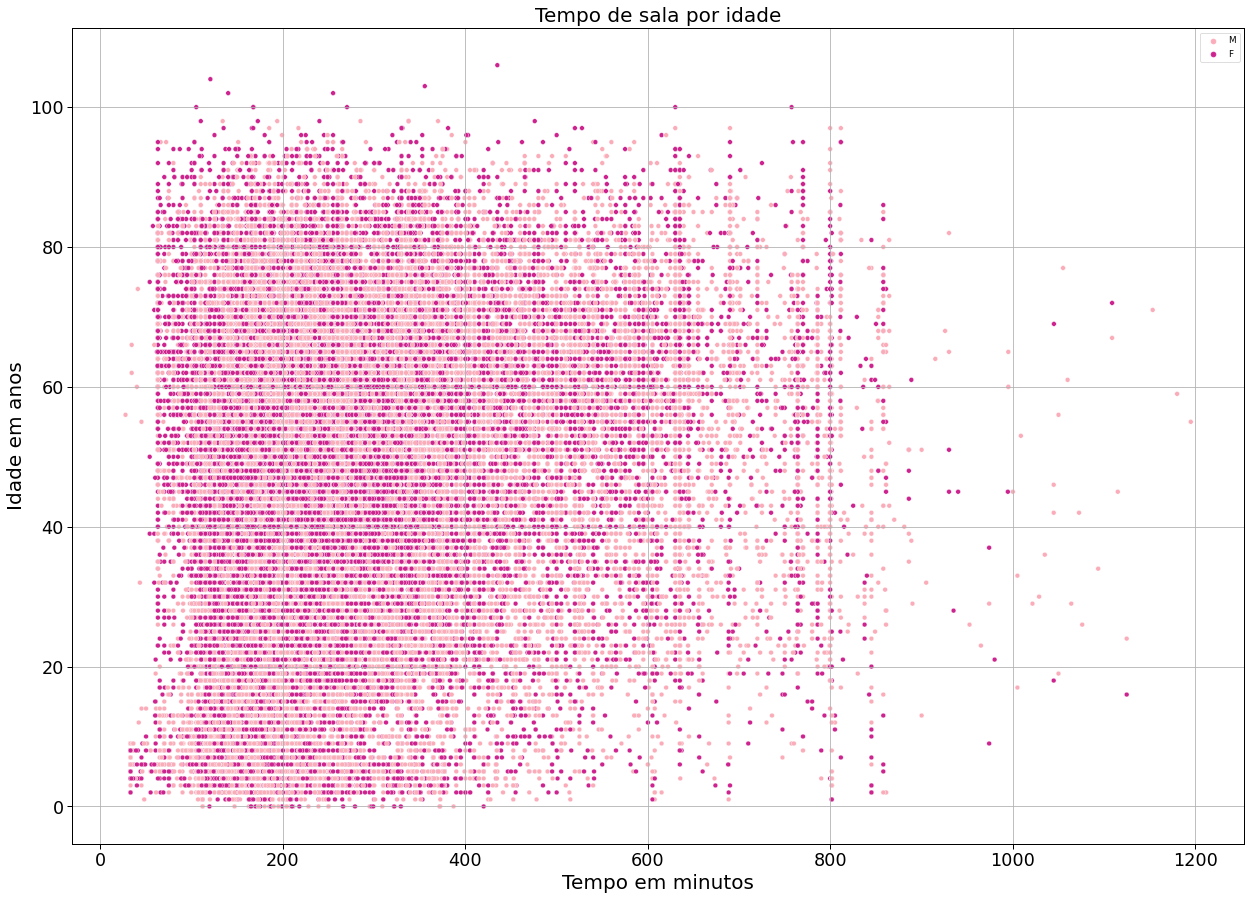

In [70]:
## Relação entre Idade e Tempo de sala
x_tempo_sala = train_df.TEMPO_SALA.tolist()
y_idade = train_df.IDADE.tolist()
h_idade = train_df.SEXO.tolist()
fig, ax = plt.subplots(figsize=(21,15))

sns.set_context("paper", font_scale=1.0) 
scatter =  sns.scatterplot(x_tempo_sala, y_idade, ax=ax, hue = h_idade, palette="RdPu")
scatter.set_xlabel('Tempo em minutos', fontsize=20)
scatter.set_ylabel('Idade em anos', fontsize=20)
scatter.axes.set_title("Tempo de sala por idade", fontsize=20)
#scatter.axes.set_facecolor('whitesmoke')
scatter.axes.grid()

plt.savefig('relacao_idade_tempo_sala.png')

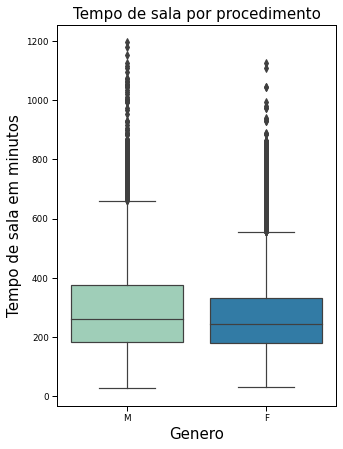

In [71]:
sns.set_context("paper", font_scale=1.0) 
fig, ax = plt.subplots(figsize=(5,7))
boxplot = sns.boxplot(y='TEMPO_SALA',x='SEXO', data=train_df, orient='v', palette="YlGnBu" )
boxplot.set_xlabel("Genero", fontsize=15)
boxplot.set_ylabel("Tempo de sala em minutos", fontsize=15)
boxplot.axes.set_title("Tempo de sala por procedimento", fontsize=15);


plt.savefig('sexo_tempo.png')

In [72]:
## Tempo de sala por especialidade

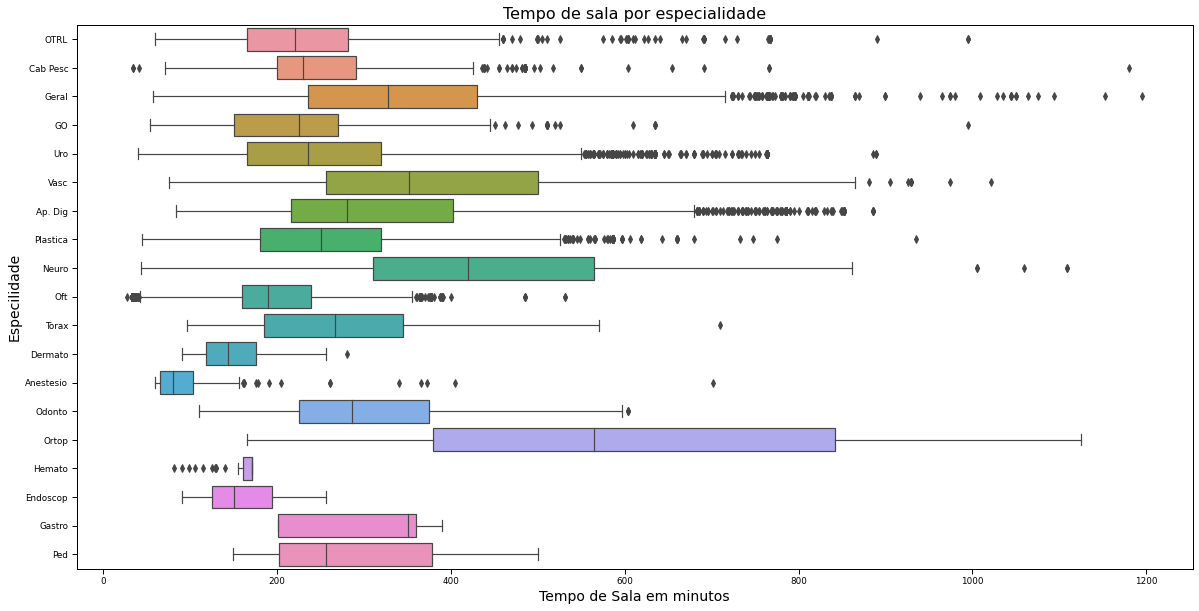

In [73]:
sns.set_context("paper", font_scale=1)
fig, ax = plt.subplots(figsize=(20,10))
boxplot = sns.boxplot(y = train_df.ESPECIALIDADE, x= train_df.TEMPO_SALA, orient="h")
boxplot.set_xlabel("Tempo de Sala em minutos", fontsize=14)
boxplot.set_ylabel("Especilidade", fontsize=14)
boxplot.axes.set_title("Tempo de sala por especialidade", fontsize=16)
boxplot.axes.set_yticklabels(  [
                                'OTRL',
                                'Cab Pesc',
                                'Geral',
                                'GO',
                                'Uro',
                                'Vasc',
                                'Ap. Dig',
                                'Plastica',
                                'Neuro',
                                'Oft',
                                'Torax',
                                'Dermato',
                                'Anestesio',
                                'Odonto',
                                'Ortop',
                                'Hemato',
                                'Endoscop',
                                'Gastro',
                                'Ped']);
                        


plt.savefig('especialidade_tempo.png')

In [74]:
## Tempo de sala dos 10 procedimentos mais frequentes

In [75]:
lista_plot = train_df.groupby(by='DESC_CIRURGIA').count().sort_values(by='AVISO_CIRURGICO', ascending= False)\
    .head(10).index\
    .values.tolist()

In [76]:
df_plot = train_df[(train_df.DESC_CIRURGIA == lista_plot[0])|
                 (train_df.DESC_CIRURGIA == lista_plot[1])|
                 (train_df.DESC_CIRURGIA == lista_plot[2])|
                 (train_df.DESC_CIRURGIA == lista_plot[3])|
                 (train_df.DESC_CIRURGIA == lista_plot[4])|
                 (train_df.DESC_CIRURGIA == lista_plot[5])|
                 (train_df.DESC_CIRURGIA == lista_plot[6])|
                 (train_df.DESC_CIRURGIA == lista_plot[7])|
                 (train_df.DESC_CIRURGIA == lista_plot[8])|
                 (train_df.DESC_CIRURGIA == lista_plot[9])
                ]

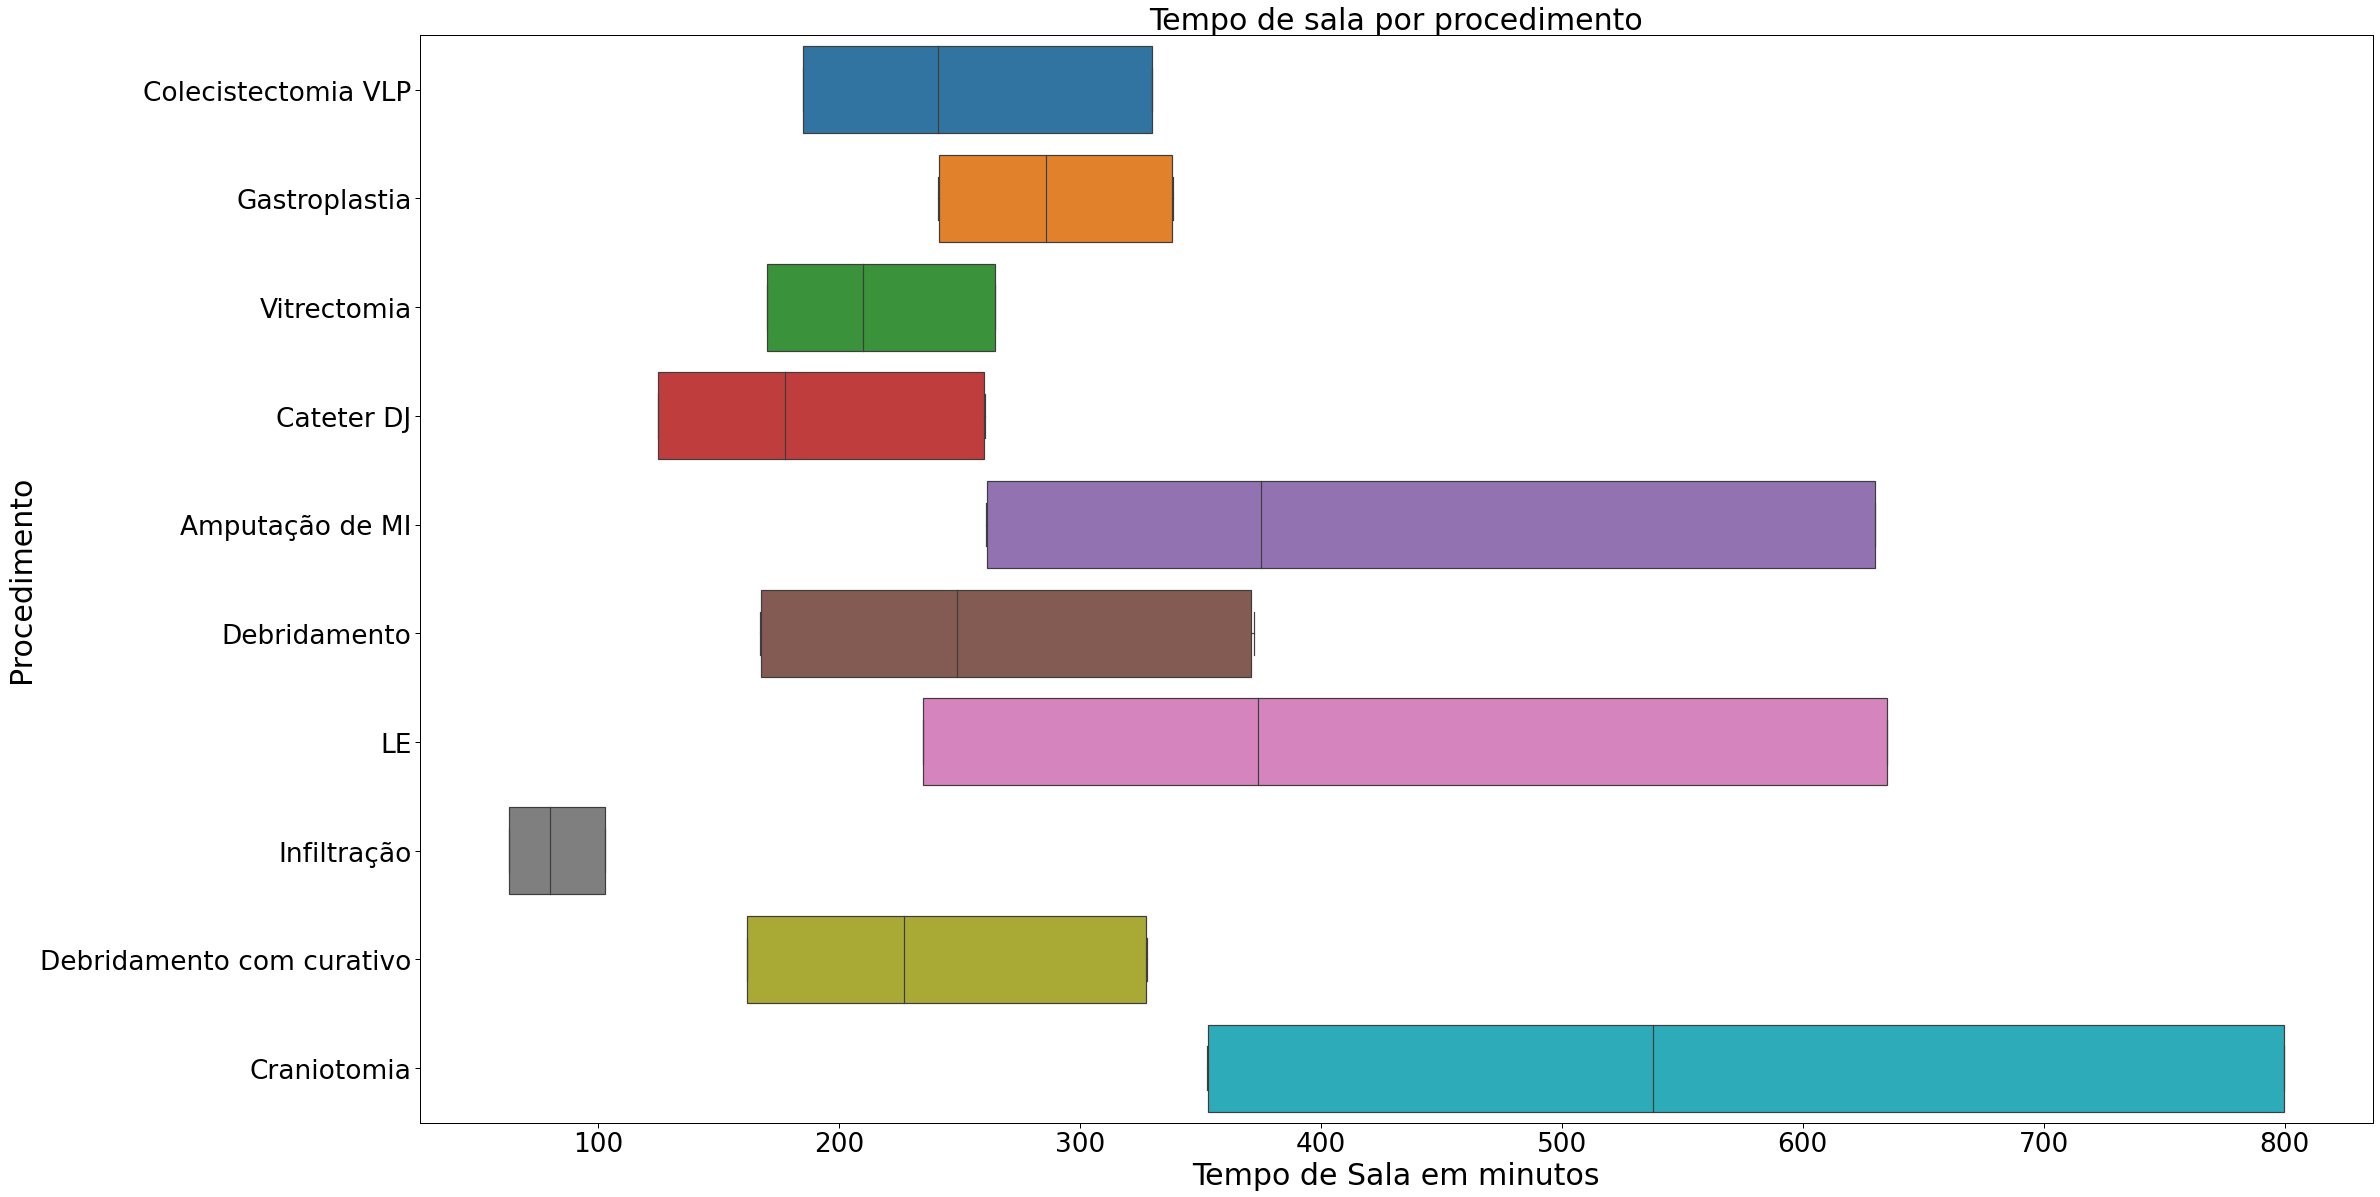

In [77]:
sns.set_context("paper", font_scale=3.0) 
fig, ax = plt.subplots(figsize=(35,20))
boxplot = sns.boxplot(y='DESC_CIRURGIA',x='TEMPO_SALA', data=df_plot, orient="h")
boxplot.set_xlabel("Tempo de Sala em minutos", fontsize=30)
boxplot.set_ylabel("Procedimento", fontsize=30)
boxplot.axes.set_title("Tempo de sala por procedimento", fontsize=30)
boxplot.axes.set_yticklabels(   ['Colecistectomia VLP',
                                 'Gastroplastia',
                                 'Vitrectomia',
                                 'Cateter DJ',
                                 'Amputação de MI',
                                 'Debridamento',
                                 'LE',
                                 'Infiltração',
                                 'Debridamento com curativo',
                                 'Craniotomia',
                                 ])

plt.savefig('top10_cirurgias_tempo.png')

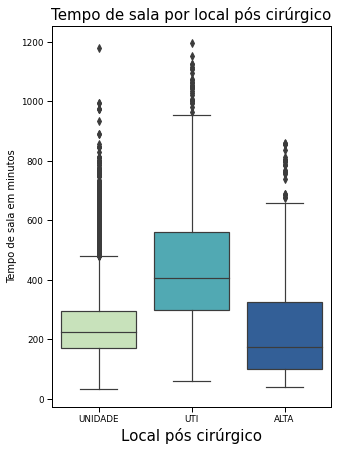

In [78]:
# Tempo por local pos cirurgico
sns.set_context("paper", font_scale=1.0) 
fig, ax = plt.subplots(figsize=(5,7))
        
boxplot = sns.boxplot(y='TEMPO_SALA',x='LOCAL_POS_CIR', data=train_df, orient='v', palette="YlGnBu" )
boxplot.set_xlabel("Local pós cirúrgico", fontsize=15)
boxplot.set_ylabel("Tempo de sala em minutos", fontsize=10)
boxplot.axes.set_title("Tempo de sala por local pós cirúrgico", fontsize=15);


plt.savefig('local_pos_tempo.png')

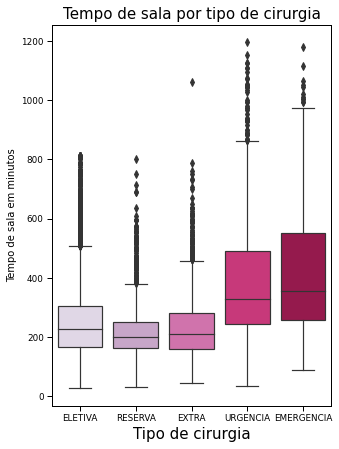

In [79]:
# Tempo por tipo de cirurgia
sns.set_context("paper", font_scale=1.0) 
fig, ax = plt.subplots(figsize=(5,7))
        
boxplot = sns.boxplot(y='TEMPO_SALA',x='TP_CIRURGIA', data=train_df, orient='v', palette="PuRd" )
boxplot.set_xlabel("Tipo de cirurgia", fontsize=15)
boxplot.set_ylabel("Tempo de sala em minutos", fontsize=10)
boxplot.axes.set_title("Tempo de sala por tipo de cirurgia", fontsize=15);


plt.savefig('tipo_de_cir_tempo.png')

In [80]:
lista_anest = list()

In [81]:
for x in range(len(train_df.ANESTESIA.value_counts().index.values.tolist())):
    lista_anest.append(train_df.ANESTESIA.value_counts()[x]/train_df.ANESTESIA.count())

In [82]:
(train_df.ANESTESIA.value_counts()[4]+
train_df.ANESTESIA.value_counts()[5]+
train_df.ANESTESIA.value_counts()[6]+
train_df.ANESTESIA.value_counts()[7]+
train_df.ANESTESIA.value_counts()[8]+
train_df.ANESTESIA.value_counts()[9]+
train_df.ANESTESIA.value_counts()[10]+
train_df.ANESTESIA.value_counts()[11]+
train_df.ANESTESIA.value_counts()[12])/train_df.ANESTESIA.count()

0.059133983861887784

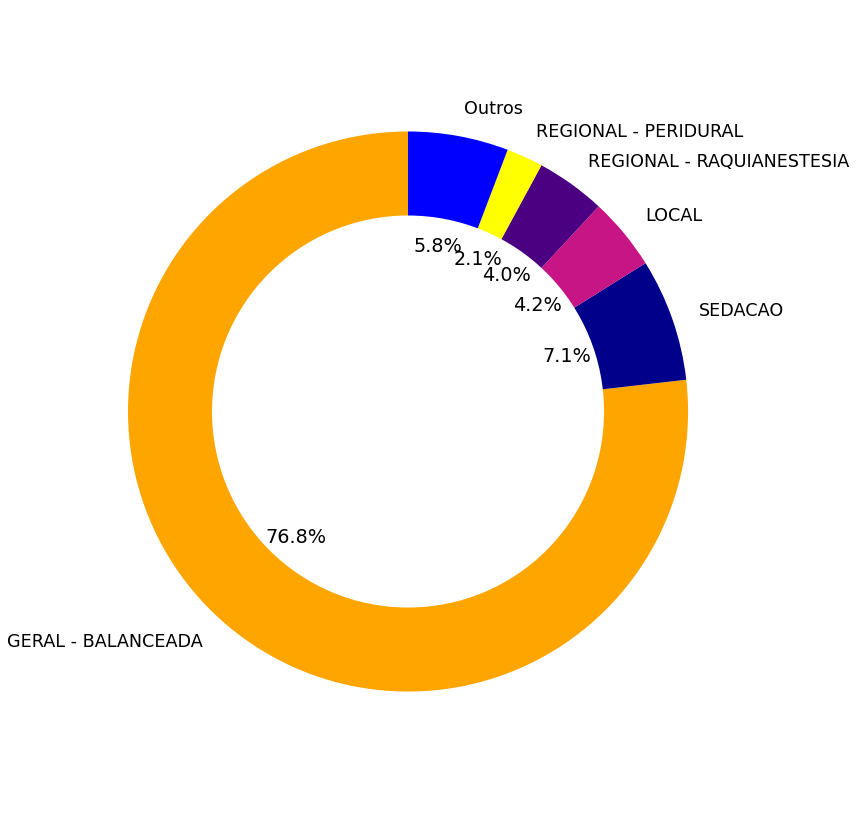

In [83]:
# Tipo de anestesia
sns.set_context("paper", font_scale= 2)
# Pie chartdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnkAAAGeCAYAAADooBcGAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABipElEQVR4nO3dd5xddbX//9fKTJiUIZ0MJCRBxQJXFBBQxILSvRas2EVEv4peK/aLoniv+lOuYsPrVSlewYbtYlewi3RFBFSQBAJMSEJ6ZshM1u+PvQ85s+fMnPY5e5/9mffz8TiP5OzZZa2ZZGbNp5q7IyIiIiJxmVZ0ACIiIiISnoo8ERERkQipyBMRERGJkIo8ERERkQipyBMRERGJkIo8ERERkQipyBMRaYOZnWlmXvW6Pcdn35559pl5PVtEul9v0QGIiEzEzAx4EPBIYC9gPrATuA9YC1zj7quKi1BEpHupyBORrmJm+wFPA54KPBHYvc75dwEXA59z99s6H6GISDmou1ZEuoKZvc3MbgD+CnycpNCbtMBLLQHeBvzdzD5mZn0dDFMaYGbnZ7qRf1l0TCJTkYo8EekWbyHplm3VNOB04A9mtiBMSCIi5aXuWhHpZuuA3wC/Bm4D1gA7gAHgcOClwIrMNQcBPzazI919W46x5s7d9yk6BhHpXiryRKTbjACXAl8CfuTuoxOc94N0NunpwFmM/X52KPAe4N87GKeISFdTd62IdIsR4ELg4e7+bHe/dJICDwB3H3H3jwCvrPHh081soBOBioiUgYo8EekWT3T3V7QyQ9bd/xf4euZwH/CsIJGJiJSQijwR6Qrufkebt/hkjWPHtHlPEZHS0pg8EYnFlcD9wG5Vx/YuKJZxzGwF8FhgGUkr4zrgDuA37r65wLimA48gmdm8iGTZGge2AuuBfwJ/c/d7i4qxlnSh7IOAfYHFwBySeNcAN7j73zvwzL2Ax7FrYe4twK3AH/P8/JhZP3AY8LA0DiNZHPzb7r62zrXTgAcD+wFLST5vPSQLjK8D/uzut3Qu+jFxHAIcAOyRHr4HuMrdb2ziHgcBjyL5N7AzvcfV7n5T8KDLyN310ksvvR54ASeT/JCvfv0QsCbv8wiSH4LV97kDWNTB2O/OPO+WHD5fZ2aeeXvm488C/ljjc1p53Q98F9ivhWffnrnXmU1c+xjgAmDTJLFVv24DzgeeAUyvcb9fNnifiV7nNxj3Q4HzSIq5ye53K/ARYEGAr/EJJDO8Ryd41ijwY+DxVdccWeO8feo8Z58a1xxZ9fFDgG8DwxPEceQE990beBPwf8DGBr4Wa4DPAw9p8fOV/bdwftXH+oEP1Pn6XQ+cMMn9+0kmVa2e5B43Ac/s9P//bn8VHoBeeunVfa/0h2j2m+a7mrh+JnBD5vodwBM6GHMPScFU/cwrcvhcnZl55u3p8dnANxr4gVr9+XlZk8++PXOPMxu4phf4DBMXLI28xn0da/xgD1rkAdNJuuR3NHnf+4DTWvzazga+1sSzdgL/SdKydmSNj+9T53n71LjmSJKhVf/ZwNfsyBr3vCCNq5WvyQjwIWBak5+37L+F89Pjj2b8v9nJXh+uce8DgX80cY9PdPp7QDe/NCZPRGp5PZDtMjnLzI5o8PrPMn5h4zPc/bdtRzax/UkKgWp3dvB5EzKzWcBPgOc3cVkvcIGZPbszUT3gYpKvb2m+/5vZ7iStyW+i+WFG84DPmtkn0i7eRp85G/gBcFITzzLg3cB/NRVhfeem923la/YvJHG1ogd4L/DNZj53tZjZo0laQ1c0cdm7zOz0qnscQlJAPqSJe7zZzN7TxPlR0Zg8ERnH3beZ2fOBq0haMyD5fvE1MzvIJxn3Y2YvZ/ySJj8CPtqRYHd5eY1jl3X4mRP5MlApiHeQdLH9mGR822aS8UNPAl4DLKy6zoBzzeyX7n5f6KDSr83zMod3knx9fgrcQjKubQfJ2LwFJGO3DiSZxDLZTiK/IhkXBkm3YvUP87Xpxydz1QQxG3AJcHSND19B0tJ2Yxr3AMm4x5eQjNWr9maScYaNrp14HvDkGsd/TzKT+0aSVsI9gIOBF5GML6s8q6fB59TzKpJFvytuAL5F8vlaQ/J1WgE8l6TlbTKrgMuBv5B8rTeQ/HucQTIe8wCS7vjDM9c9h2Tdyf9oMYe5wPdIxv9BMmzjIpKFzgfT5z+SJNdDMtf+h5l9l2RYwXfTe0HyC1zlHveQjHN9JHBqjXu8z8y+6R0Yp9n1im5K1Esvvbr3BbyM8d0fE47PIykIsuPw7qSD4/DS584nGTRe/dxRYO8cPkdnZp5b3TV2BfDQSa5dAPyhxuf47Q0++/bMdWfWOf+6zPm3AQc0+Kwe4CkkBcbj6px7fuY5v2zj8/u2Gp+fzcCLJrlmOvDBGteNkizVU++Zz61x7RbgpEmumQa8kaTQqjwrRHdt5TVEUsA0Ozb2hyS/YO3fxDWHk4xpq37+DmBZg9f/cpL/E2cDMyf5HJ5dI/f/ISmsK+8/Xucen6hxj8+3+m+wzK/CA9BLL726+wV8scY3zHHj84BZJC0E2R8MHRuHV/XsL9SI8eKcPj9nTvBD+XfArAauX0zSIlR97V8bfPbtmevOrPOcbIxHdOhzcn7mOb9s8T7zSVrfqu81DDylwetPr5Hz9XWumUbS4pr9d/zUBp/58gn+PbRT5I0yyUSEOvdsqiisum4hyeSV6jg+2uC1v5wgj7MaiZfkl6Pq66rH2k74bzxzjysz97gP2K0T/967+VWaMRkiUph/I+kiqnaWmT0hc+xzJON/qnV6HB5m9izg1ZnD24F3dfK5dWwjaWmqu3euu68hGXNVbT8zWxQ4pmWZ9/e5++8CPyO0V5P88lDtI+5+eSMXu/vHgZ9nDj/azI6c5LITSIqtap9y94a6/t39QuA7jZzbhM+4+49audDTqqeF69YBb88cfmEr90pdRfILUb3nOklLXLXKWNs/krTQNnKPszOH55FM/JhSVOSJyKTcfTvJBIItVYd7gYsrhYiZnQy8InPpj+nwODwzezjJ7MGsd7r7yk4+u44L3H1VE+fXKgoODhVMKtQYsTy9KvN+PfDhJu9xeo1jp05y/ssy7++n+bFo72/y/MmM0vnxrBP5AWPH+S03syUt3uvDXmebwio/Iml9y/qIu+9s4h5ZBzV4bTRU5IlIXZ4sjvr/Mof3Bi40s0eSzKattppkOZCWWhEaYWYLgUvZNRC74nskS4QU6RtNnn8DybilatmWt3atzryfb2bPDPyMYNJ9hx+WOXyxuw81cx93/xNwTebwEye5JDuD/Efuvr7JZ94A/LmZayZxmbvfFeheTXH3YZLJHdUe08KthkgKxkafu4nxM+NbuUd2F53ljV4fCxV5ItIQd7+IZOxbtRNIZhtWd6mNknRVTrryfjvS5S0uZfwMyr8Ar+hkcdkAJ+lWavyCpHDZlDmcLV7b4u6rSWZUVrvIzP4tXfKl22RneAL8rMV7/STzvmaLVHosu0tKq8MNQg1TaOrf0mTMrNfMjjezj5jZD8zs72a2xsy2m5nXegHZz9Mete5dx/Xufn+T12R3ELnO3Xe0eY85Nc+KmIo8EWnGm4A/ZY7tnnl/hrv/plMBmFkfSffm4zIfug04zt03durZDdqYdnE3K7u1WX+IYDL+v8z72cCngLvN7GtmdoqZPbQDz21FrTiubfFeta7LthICPKjGsVZb5EK15N3c7g3MrM/M3gvcRdKN+U7gaSS/JO1BsoRJo+a3EMLdLVyzJfP+ngD36MT/qa6mdfJEpGHuPpSun3cN44s7SMbhfaRTzzezXpKlFI7JfGg1cHRR3VoZ2Ra5RmW7a4P/Eu7uX04nzGTXMZxDsujvSQBmtpZkdvCvgJ96g3uJBpYtJpzxXc6NqrUodq1iZV6NY63uSRuqJXtDOxeb2T4kLZm1itpWtFIotbI3c7Y1PsQ9plzDloo8EWmKu//dzL7F+ELhfuDkTnWVppuRf4VkL9hqa4Cj3P2fnXhuC4rsKq7L3U8xs+tIZjpOtLjxIpLP87MAzOxGkhnAX0zHaeUhW4RtbWLQfVat1t1auc+rcayV4gJaL/aztrZ6oZntSVKoTzQWbTtJAXxX+vchkuEW1U5g7HCMVna+CPF/oqv/X3UrFXki0hQzO4rxM2kBdiPZweGsDjzTgC8xfgmH9SQteNmxZjIJd/+0mV0AvJjkc3o4yddvIv9CMpnldDN7ibv/Pocws8VE6B/yte5Xq4Cd7PMymVavC+njjC/w7iGZKHUp8Od6hbOZraxxDymJKdd0KSKtS1sGvsrE3zveb2ZP7sCjzwVOzhzbRDIGL7uGnzTA3Te5++fd/UiSFqynkiz98TMmbr3aB/iFmT0+hxCzM1r709bcVtSaxHJfjWMbahxrdbB+oYP8027al2QOX02yw8mH3P36BltGg04AknypyBORhqQ/YL9Ksj9oteolLXpI1s9bHPC55zB++ZatJDsAXB3qOVOZu29398vd/YPufixJV+mTgHMYX/jMAM5Lx0d2UrYIM8bP9GzU0gbuD7XH0T24xWc+pMXrQnlG5r0DL21m1ruZTWcKzkiNiYo8EWnU+0hae6p9mvEL1u4FfKWNVpcHmNlHSfYDrbYdeEZOXYZTkruPuvtv3P3NJMVKdumShzH+30JotTaTb3WB6Fpru/2txrG/Mr7LttVnFr3wbvb517QwrOFgWhuDJ11CRZ6I1GVmTwHOyBy+Bjg9XT/vi5mPHQu8u81nfgB4R+bwMPDsRre1kvalCwG/hGRiTbXstnbVst2ArRQKtYr4o1u4D4yfjb2y1kzsdC236zOHsxN96krXHcw+M2/Z1vTbWrjHUSECkeKoyBORSaU7D1zE2O8XG4EXVC1w+kbG72/7ATN7UovPfCdJy2G1HcDz3T27sK10mLvfy/h13ybrks/u2TuzhWeuYfzizS9O10lsWLojy6GZw7+e5JLsdlj7mlmzrZYvpvYSQ3nKbmPXVPe6mfUwfpiElIyKPBGZUNU4vD0zHzrV3R9oGUgX/30BY5d7qIzPa2qFfDN7I+PX2hsh2UXj/5q5lwSVLa6yC81Wyy5Z0upYumwL8UKShXyb8fEG7pv92Ejm2Dlm1tBsWTObT/N73XZCdn2/Zrud345m1ZaeijwRmcy/M77L5rPu/q3sie5+M/C6zOElJOPzGuquM7NTgU9mDu8EXu7ulzQUsdRkZoea2f4tXrs/8MjM4Vpj5iqy492WprM9m/VFxq8T924zm2zv2QeY2VuA4zKHr3P3CVvy0u3fvpY5/EiSX1gmbQ0zs36SpUmCTTxqQ3aXj33M7DmNXGhmxwAfCB+S5E1FnojUZGZHMr7L9FrgbRNd4+5fAc7LHD4OeFcDz3sR8N+MHb/lwCnufnH9iKWOI4AbzezHZvZCM2uoO9HMDgC+x9ivywjJ1nITqbXf6ufMbGHD0QLuvoHkF41qM4BL051XajKz6Wb2fuDszIdGgX9r4NFvZfxM2+cAV5nZ0dlJRWa2m5k9l2TIQmV5mX808JxOupTxYyO/PNkSR2bWY2anpddWWi6zrZpSIloMWUTGSZdAuYix43o2ASc1sOPBG4DDSBbQrTjLzH7j7jU3bU/H/V3I+F881wDPMLPschDNeF06pkwSx6WvYTP7DckEmj+RfK4ry4rMBx6RnvevjP+6fCIdM1eTu99sZtcwdlbrCSR75N5AssNC9t/R5e7+2Rq3Owc4nrEtcnOAb5jZ70la3W4kWeplMcm/vZdSe+/b/3D3300Ud1X895rZySSF7PSqDx1IMtP4XjO7OX3mIpJ/69VLjdxBMvHom9lb13t2KO7+DzP7OvCiqsNzgcvM7HvAd0laXHeQfN4eS7Kt3SOqzj8feAqwIoeQpQNU5InIGFXj8PbKfOjV7l63dcLdt6WtLFcBs9PDPcDXzOzACdbpmknt70cDwHMbDr6202l9/9GY9ZHMVm12xuqPGT/Tupa3kxRE1b8oTCcZG1ZrfFjNMX7u7mb2PODbjJ+x+nh2tZzV818kW7k1xN1/YGYnkeyVPD3z4T3SVy2DJIVxrY9nJ6R02ptJPj/VRdo04NnpazK/B04DbupIZJILddeKSNZ7Gf+D/1x3/0ajN3D3m4DXZw4vBS5sdHyeBDfZRIlG7CDp/nxGI/vXpsvcnMT4nSua5u5bSAqnc2i++3ADcJq7v63ZfZXd/TvAIcAVDV7yE+CwdBeWWjtF1NpDt2PS1tZjab5Q+xZwbDqhSkpMRZ6IPCAdr/P+zOHrScYoNcXdLwAuyBw+geZnR0oA7v5FYBlJ68wlJF2mjbibpLh6pLuf7u4NF1npZJl9gFeSdP//mWSsW90isca9dqSLM+9PMu6zXuvsbcBHgYe4+7nNPq/quX8maQ07mmTMaCWHUZKi7VqSfX0f7+7Hu/uq9NJFmVttr1pyKDfu/jeSJWTex+SfMwd+AzzT3Z/v7tkJL1JC1uQvNiIiEgkzW0Iydu1BJOPwZpMseryZpAj8s7v/s7gIJ5a2CB8M7Esypmx3kjGFa4Ab0uKmMGZ2LvDaqkM3uPujiooHHhiKcRDwaJIitJdkrO1twJXNbHkm5aAiT0REJDAzu4Vk+7eKL7t7dgtAkY5Sd62IiEhAZnYsYws8aHxcn0gwaskTEREJJF0Q+RrGFnnbgSXpun8iuVFLnoiISIaZLTWzk9I9XBu9ZiHwf4xvxbtYBZ4UQUWeSHge6jUyMhLsXt3yUk7lecWYV6M53XDDDXcCX3vQgx40csYZZ/j111/vo6OjNc+9++67/eMf/7jvueeea4EjqbJw4UJWr159SjfkVLZXjHkFzqkuddeKhBfsP9WGDRuYN29eqNt1BeVUHjHm1WhOf/nLXzjggAPGHJs1axb77bcfCxcuZObMmWzYsIE77riD2267reY9pk2bxiWXXMKJJ54YIPKJxfh1gjjzCpxT3TVHteOFSBfbuHFjdN/klFN5xJhXOzlt27aNa665pqFz+/v7ueiii3jGM9rZka8xMX6dIM688s5J3bUiXWxoaKjoEIJTTuURY16N5rRgwQIOPrjW7muT6+np4SUveQnXXnttLgUexPl1gjjzyjsnteSJiIhkLFmyhGuuuYaVK1dy2WWXccUVV3DzzTezatUq1q9fz7Zt2+jt7WX+/PksXLiQAw44gCc/+ckcf/zxrFixoujwRQCNyRPpBI3Jm4RyKo8Y81JO5RFjXnmPyVN3rUgXGx0dLTqE4JRTecSYl3IqjxjzyjsnFXkiIiIiEVKRJ9LF1q6Nb79w5VQeMealnMojxrzyzklFnoiIiEiEVOSJdLH+/v6iQwhOOZVHjHkpp/KIMa+8c1KRJ9LFZsyYUXQIwSmn8ogxL+VUHjHmlXdOKvJEutjs2bOLDiE45VQeMealnMojxrzyzklFnkgXe/SjD8ZsetuvbrJy5cqiQwguxpwgzryUU3nEmFfeOanIExEREYmQijwRERGRCGlbM5Hwgv2nmjmzn6Gh4bbv474jQDRhDA0NRTegOsacIM68lFN5xJhX4Jy0rZlImfX09BYdQnAjIyNFhxBcjDlBnHkpp/KIMa+8c1KRJ9LFBgYWFx1CcIODg0WHEFyMOUGceSmn8ogxr7xzUpEn0sV6e9WSVwYx5gRx5qWcyiPGvNSSJyIiIiJt08QLkfCC/afq75/H1q1b275PN0282LJlS3TbFcWYE8SZl3IqjxjzCpxT3YkX8fUFiURkxoy+IEVeNxkeHo7uG3eMOUGceSmn8giZ1/DwMJs3b2br1q3s3LkzyD2rTZs2jdmzZ7P77rvT19c3aRx5fq1U5Il0MY3JK4cYc4I481JO5REiry1btnDvvffS29vLnDlz2Hvvvenp6QkQ3Vijo6Ns2bKFNWvWMDIywh577FGzmNOYPBF5wNy5c4sOIbgNGzYUHUJwMeYEcealnMqj3bw2b97M2rVrWb58OcuWLWPu3LkdKfAAenp6mDt3LsuWLWP58uWsXbuWzZs3jzsv76+VijwRERGJypYtW1i3bh3Lli3rWGE3kZ6eHpYtW8a6devYsmVLrs/OUpEn0sU2btxYdAjBzZs3r+gQgosxJ4gzL+VUHu3kde+99xZS4FVUCr177713zPG8v1aFD/gxs2nAU4EnAIuBLcDfge+4+9oiYxMpWoxjbWIcZxhjThBnXsqpPFrNa3h4mN7e3sIKvIqenh56e3sZHh5+YDJG3l+rIE8zs17gsKpDI+5+ZQPXPQ44D3hYjQ9/xsz+C3ifd9P6DyI5CrFvbbeZbOZZWcWYE8SZl3Iqj1bz2rx5M3PmzAkcTWvmzJnD5s2bH8gl769VqO7a44HfVL1Or3eBmR0O/IKkwLMar+nAO4DvpK19IlPO0qVLig4huNWrVxcdQnAx5gRx5qWcyqPVvLZu3do1S8r09/ePWQYr769VqOLpuewqzgA+O9nJZrYb8FVgZnrI2bWArFe9DDgB+HCgOEVERCRiO3fuLLyrtqKnp6cj6/I1KlSR9yR2FWnrgV/XOf9UYJ+qawzYAVwN/KXqvEqh9yYz2zdQrCKloTF55RBjThBnXsqpPGLMK++c2i7yzGwR8KD0rQM/8/p7pb2OXQUcwM+Avd39MHd/NHAAcGvV+dPTa0SmlMHBNUWHENzAwEDRIQQXY04QZ17KqTxizCvvnEK05GUnTVw/2clmtj/wL1WHNgAnVc+kdfe/knQBV3fbnhQgVpFSGR1VS14ZxJgTxJmXciqPGPMqXUseu1rxKq1yN9U5/9iqvztwgbtvyJ7k7jcAP6i6715mtqKNOEVKZ/ny5UWHENzKlSuLDiG4GHOCOPNSTuURY1555xSiyFuQeb++zvlPTv+sFG+XTHLuTzLvH9VoUCIiIiJTWYgib3bm/fjN2sY6gl0TLjYDv5/k3JvTPyvnx7eehIiIiEgHhCjyLPN++oQnJjNkF6VvHbiiziSN+zLvd28+PJHyWrVqVdEhBLdiRXyjLmLMCeLMSzmVR4x55Z1TiCIv23KX7b6t9sTM+982+azdmjxfpNRmz842lJdf9cKgsYgxJ4gzL+VUHjHmlXdOIYq87P6yD5/k3Mqki0rr32/q3Ht+5n18X3GRScyYMaPoEIIbGhoqOoTgYswJ4sxLOZVHjHnlnVOIIq+yeHGl2/XYWieZ2UyS3Ssq590PXFHn3osrl6d/ZrtvRaIWY0veli1big4huBhzgjjzUk7lEWNeeecUosi7mV1dtgackK6Fl/UqoLJjsAN/cPd6u68/OvP+ny1HKSIiIjKFtF3kufsI8F2SAs+BHuD7Zva4yjlm9nSS/Werd7n4WgO3f0zm/d/bjVekTNatW1d0CMEtWrSo/kklE2NOEGdeyqk8Yswr75xCLb18DvASdhV6DwZ+Z2aV7tX5VR+DZC29iya7oZn1k0zUqBSGd7n7PYHiFREREYlaiO5a3P1a4PPsaqWrFGYL0pdVHXPgTHev1zH9r0Bf1f3+ECJWkTIZGRktOoTgenp6ig4huBhzgjjzUk7lEWNeeecUpMhLvYlk94rqQq/6VTl+nrt/toH7ncyulj+AX4QJU6Q8BgYW1z+pZAYHB4sOIbgYc4I481JO5RFjXnnnFKzIc/dRd38+SXH2J5Kirvp1C/Aqdz+13r3MbD/guKprAf4vVKwiIiIisQs1Ju8B7n4hcKGZ7QEsI5mIsdrd72riNrOBt1S939Lk9SJRGB6uNwG9fGJc+y/GnCDOvJRTecSYV945BS/yKtz9XuDeFq+9Grg6bEQi5bNhw8aiQwhu7ty5RYcQXIw5QZx5KafyiDGvvHMKOSZPRAIbHo5vxXf9dl4eMealnMojxrzyzklFnkgXW758edEhBLdy5cqiQwguxpwgzryUU3nEmFfeOanIExERkWhMmzaN0dHuWH5qdHSUadOKK7VU5ImIiEg0Zs+e3TX73m7ZsqXQPcjN3eufJSLNCPafaubMfoaG2p9h674jQDRhDA0NRTfWJsacIM68lFN5tJrX8PAwa9asYdmyZR2Iqjl33HEHixcvpq8v2dsh8NfK6p3Qsdm1ZnYI8GTgIGA5MAfop/XWQ3f3hwQKT6QU+vpmBCnyukmMP5BizAnizEs5lUerefX19TEyMsLo6Gihu2aMjIwwMjLyQIEH+X+tghd5ZvZS4N3AI7IfavPWanKUKWfevLls3BjXMiobN25k3rx5RYcRVIw5QZx5KafyaCevPfbYgzvuuINly5YVUuiNjo5y5513sscee4w5nvfXKliRZ2azSLY1O5bxBV1la7OWb9/GtSKlVf0bYCyGhuJbFibGnCDOvJRTebSTV39/P+5eSKE3OjrKHXfcwcKFC+nv7x/zsby/VkGKPDPrAX4MHEFSkFUXdNVbk4mIiIh03O67746ZsWrVKnp7e5kzZw79/f0dKfhGR0fZsmULmzZtYmRkhD322GNcgVeEUC15bwGewNgWOwN2AtcBN5LsfrEFdbuKNGxwcE3RIQQ3MDBQdAjBxZgTxJmXciqPEHn19/fT39/P8PAwmzdv5s4772Tnzp0Bohtr2rRpzJ49e8wki1ry/lq1XeSZ2TTgHYwt7kaBTwJnu/s97T5DZKrq7S1u0HCndMv6VSHFmBPEmZdyKo+QefX19dHX18eiRYuC3bMVeX+tQrTkPQ5YRFLkVbpqX+Tu3wpwbxERERFpQYjFkKtn0TpwiQo8kTAWLlxYdAjBrV27tugQgosxJ4gzL+VUHjHmlXdOIYq8xemflckV3wxwTxERERFpQ4gi7/7M+9sC3FNEgK1btxYdQnDdMOMstBhzgjjzUk7lEWNeeecUoshbnXk/PcA9RYQ417+KcWX+GHOCOPNSTuURY1555xSiyLs6/bMyu3bvAPcUEeJsyStys+5OiTEniDMv5VQeMeaVd05tF3nufivwZ3aNyTum3XuKSGL58uVFhxDcypUriw4huBhzgjjzUk7lEWNeeecUoiUP4GPpnwa8yMz2DHRfEREREWlBkCLP3b8K/Dx9Oxs4L93qTEREREQKYO5hdhkzswXA5cABJOPzfgqc7O6DQR4gUh7Btu6bObOfoaHhtu/jviNANGEMDQ1FN6A6xpwgzryUU3nEmFfgnKzeCaG6a3H39cCRwM/SBx8L3GJmZ5vZEWY28WZuIlJTT0+o7aW7x8jISNEhBBdjThBnXsqpPGLMK++cgv4Ecff7zOx44LUke9fOAd6cvnaa2UZgM621dLi7PyRMpCLlMDCwmNtu+2fRYQQ1ODgY3fpXMeYEcealnMojxrzyzqkTzQQvBt5Isl5eZT9bgB5gQfpqRbAuMJGy6O1VS14ZxJgTxJmXciqPGPMqbUuemc0CLgaenvlQiOKsbr+ziIiIiOwSZOKFmU0DfsTYNfIqNw5VoLm7a8aulEGwVuf+/nlBFkTupokXW7Zsia4LJsacIM68lFN5xJhX4Jzq1lehWvLeQFLgVf9wM2AncB1wI3AvsIUu7XY1sxnAfulrEbA7SbzrgZuB69w9aDtruszMocAj02cayefpBuBqdx/V87r3eXmYMaMvul0vhoeHo/vGHWNOEGdeyqk8Yswr75zaLvLSH6zvZGzL3QjwCeAT7n5Pu8/oFDM7BHgGcBTwWCb/fGw3s+8D57j7H9p87hySz9lrSIqRWtaa2ReAj7r7Jj2ve56XJ43JK4cYc4I481JO5RFjXnnnFGIJlcOAvdK/G0mxd5K7v7NbCzwze46Z3QpcBbwPOIL6Be9M4CTg92b2FTOb2+KzHwfcBLyHiQsS0o+9B/hrek1L9Lywz8vb3Lkt/TPrahs2bCg6hOBizAnizEs5lUeMeeWdU4gi71FVf3fg2+7+nQD37aTDgAdP8nEH7gPun+DjLwWuMLPJiopxzOwI4BfAkhofHgJqrXq7FPiFmT2+mWfpeeGfJyIiUiYhirzKkiiVAYDfDHDPvG0EziMp3vYBdnP3Be7eB+wLvAPI7tzxCODSRrdvM7PFwCXArKrDO4CPp8+YRdJa+FDg7PRjFbOAS9J7NETPC/u8omzcuLHoEIKbN29e0SEEF2NOEGdeyqk8Yswr75xCFHnZ1q7bAtwzL38FXgUscfdT3P2r7r6yeoKFu9/q7h8j2a7tt5nrH0syDqwRZwEDVe+3A09397enz6j4h7ufDjwzPadiT+CDTeSm54V9XiFiHJMS4zjDGHOCOPNSTuURY1555xSiyFudeV+GZU5WAa8EHuXuX3b3bfUucPd7SSZp3J750DvrXWtmD06fV+297v7TSZ73Y+CMzOFTzOxBel6+zytSiH1ru01fX3w7HMaYE8SZl3IqjxjzyjunEEXetemfldm1ywLcs6Pc/XPufn6zS2q4+wbgA5nDK8zsgDqXvpVkB5CKfwCfauCRn0zPrZgOvKWB6/S8sM8rzNKltYYbltvq1dnfC8svxpwgzryUU3nEmFfeObVd5Ln730hmN1bG5B0zyekx+C7j1/p7dJ1rnpV5/6VGCsz0nC9nDp9Y7zo9L/jzRERESidESx7Ax9I/DXiRme0Z6L5dJ23NW5c5PGG+ZvYYYO/M4W808cjsucvM7GA9L5/nFU1j8sohxpwgzryUU3nEmFcZx+Th7ucDl6dvZwPnm1l8X51dpmfeT7aLx1My7+9x94Ynp7j7rYyf2ftUPS+35xVqcHBN0SEENzAwUP+kkokxJ4gzL+VUHjHmlXdOoVryAJ5Psn2UkXTZ/jDGFr10bbzsCrWTLfq8f+b9lS089o+Z9/vpebk9r1Cjo2rJK4MYc4I481JO5RFjXqVsyQNw9/XAE4HvkBR6RwE3m9l/mdkTzCyWaTLPrnHsmknOf0TmfStLzPyzzj31vM49r1DLly8vOoTgVq5cWXQIwcWYE8SZl3IqjxjzyjunICWlmWV/0DpJoTcHeFP62mlmG4HNTN69ORF394e0FWgY2XXxbnX3myc5/2GZ93e08MzsNdl76nmde56IiEgphWo33IddhV2lgKv8WZl120OyO8YCWtNKYRiUmb0cOCRz+L/rXDY/876V/Xzvzryfp+fl9jwREZFSCjkmD2oXYh7gVTgz2xv4RObwHcBnJ7lmJuM/x3UXXq5he+Z9r5nN0PM6+7xusGrVqqJDCG7FihVFhxBcjDlBnHkpp/KIMa+8cwpZ5FkHX4Uys+nA1xnfCvm6Ortl9Nc4NtRCCLWuma3ndfx5hZs9uyvDasvWrVuLDiG4GHOCOPNSTuURY1555xSquza7C0RsPgc8PnPsXHf/QZ3rarUOZff6bUStva1m6nkdf15L1q1bx9q1awHo7+9nxowZzJ49e8yA2xUrVjAyMsLg4OADa+EtXbqU4eFhRkZG2LBhAwBLluwFJNubVXa/SK5bw+joyJiJGatWrWL27NkPPK8SC8CGDRsYHExWjpkxYwZz585lxowZ42IaGhpi48aNDA0ldfDAwACjo8k606FyGh5OPv19fX0PrP7e29vLwMAAvb294+65detWhoaG2LJlCwCLFi0CoKenRzl1MKd58+axbt065aScCsmpt7eX9evXP3BP5TQ+p4c//OHUY+5d0RvatczsvcCHMod/Bxzl7pNuLGpmewDZhc5OSPdRbSaGE4AfZg7v4e5r9bzOPa8Nwf5TPfzh+/O3v/297fu47wgQTRi33HJLQ9+cyiTGnCDOvJRTecSYV+Cc6vZ0hh6TFxUzO5XxBd6NwDPqFXipLTWOtTL2q9Y1te6t54V9noiISGmpyJuAmT0X+Hzm8O3Ase5+XyP3cPftwM7M4VkthJPtShx193HjyvS8sM/rBpXu1phUuh1iEmNOEGdeyqk8Yswr75ziW046ADM7GriIZNmXikHgGHe/q8nbbWDshI1WdgHZK/N+siJTzwv7PMmYP+tRbV0/b34/G+5LGk7v2/bnECGJiEgNasnLMLPDge8Cu1Udvo+kwPtHC7f8W+b9shbukb1mskFael7Y5xVqZGS06BCCGx3NNsaWX09PT/2TSijGvJRTecSYV945qcirYmaPIhmQX71uxRaSwf03tHjb7G4YD27hHg/KvL9Jz8vteYUaGFhcdAjBLdoju/Vz+VVmu8UmxryUU3nEmFfeOanIS5nZQ4GfMnb3g2HgWe6e3dC+GX/NvD+shXs8NvN+sqJEzwv7PBERkVJSkQeY2TLg58BA1eER4AXuflmbt788835PM2u49Sk9dyBzOHtPPa9zzytUZf21mNw/3D3LuYQyY0ZXbpjSthjzUk7lEWNeeecUZOKFmbVbCDXC3f2o0Dc1s8UkBd7yqsM7gVe4+/cDPOIaYDWwtOrYC4CPNHj9SZn3d7r7NXpebs8r1IYNG4sOIbhNm1rZia67zZ0bXxc0xJmXciqPGPPKO6dQs2uPpLN7zFon7m9mc4GfAA/LfOg0d78oxDPc3c3se8BpVYdfZWYfc/dJR9WbWQ9wSubw9/S8/J5XtOHhrlzZpS1qySuPGPNSTuURY15559RN3bW57llrZrOAS4EDMx96h7v/d+DHfYKk+7diX+CNDVz35vTcipH0Xnpevs8rTPW2ZbFYsnd8a19Vb0kUkxjzUk7lEWNeeecUssirVaQ18/Iar44Ue2Y2HfgW8ITMhz7k7h8L/bx06ZXzs88ys2MmusbMjgPOyhw+z91v1fPyfZ6IiEgZhequvaDF6wyYS7Kg7YFAX3q8UuR9m85sN3UOcELm2K3AajN7bQv3u8Xd6w3ePwN4JlBZE2MWcKmZnQOcS7KbBiRLgrwWeBMwver6NcD7mohJzwv7PBERkVIx904OpWucme0GPAt4N0nB58A/gKe7e9DFas3sl8CTA97yAnc/uYHnPpFkDGB2Wy2AyuCrWh3220m2U/ttM0HpeWGf14Rg/6lmzuxnaKj9Gbbu4cbBtbvjRV/fdIbTcXmx7HgxNDQU5fihGPNSTuURY16Bc6rb09k1Y/Lc/X53/yZwKPApkuD3BX7dzBIZ3czdfwMcA9xd48MzqF2Q3A0c3UpBoueFfV4R+vri+gYHsFvf9PonlczQUHwTZCDOvJRTecSYV945dU2RV+Huo+7+ZpIxV0ayptl303F0pefuvwP2I1nyY/0kp65Pz9nP3X+v53XH8/I2b158SwjMmTOr6BCC27gxvqVuIM68lFN5xJhX3jmFGpPXCW8mGXO1APgXktmTZ4e4sbsfGeI+bTx/I/BuMzuDpOXyAKAy5fBe4C/AVe4+MsEt9LwCn5envr6++ieVjFryyiPGvJRTecSYV945dW2R5+6bzOxi4PUkLXpvIlCR1y3SouMP6UvPK9nzREREulnXdddmVM9YXWpmBxUWiUgBBgfXFB1CcGvvja8LZmAgu1NeHGLMSzmVR4x55Z1Ttxd5q9M/K7MVH11UICJF6O3tKTqE4Hp6uv3bTvNGRyfdbKW0YsxLOZVHjHnlnVO3f7fNjqGKr6wXERER6YBuL/KWZd7vLCQKkYIsXLiw6BCCm79g96JDCG7t2rVFh9ARMealnMojxrzyzqnbi7ynpX9WFvy7t6hARERERMqka4s8M3sk8ArG7h7wt4LCESnE1q1biw4huG3b4lsWob+/v+gQOiLGvJRTecSYV945dWWRZ2ZHkmxXVb2g1ibgiiLiESlKjOtEDQ+F22KtW8S29VJFjHkpp/KIMa+8cwqyTp6ZLW/ncqCfZFLFgcCJwBHpca/680vurjF5MqXE2JK3fVv7e/F2m9mzZxcdQkfEmJdyKo8Y88o7p1AtebcD/2zxdRvwZ+BnwMcYW+BVDAIfChSrSGksX97O70/dacnei+qfVDIrV64sOoSOiDEv5VQeMeaVd04hd7yw+qc0xNlV4BmwATje3TcEur+IiIhI9EKOyfNAL0iKOwN+Dhzk7n8OGKeIiIhI9Mzd659V7yZmocbK7QRuBn4FnO/uVwW6r0ie2v9PlZo5s5+hofbHsLmHm+wwf9aj2rq+r286w8NJPPdti+P3t6GhoSgHiceYl3IqjxjzCpxT3R7UUN21T2njWge2ABuBu9x9e5iQRMqvp6cXiGuiQozbmo2MZDfniUOMeSmn8ogxr7xzClLkufuvQtxHRMYaGFjMbbf9s+gwglq0eC6rbl9TdBhBDQ4ORrmmV4x5KafyiDGvvHOK71dqkYj09oacG9Udenp6ig4huBhbHCDOvJRTecSYV945qcgTERERiZCKPJEutnr1XUWHENzg3euLDiG4pUuXFh1CR8SYl3IqjxjzyjsnFXkiXWzGjL6iQwhut77p9U8qmeHhuCbHVMSYl3IqjxjzyjsnFXkiXSzGMXm9vfF924lx7BDEmZdyKo8Y89KYPBF5wNy5c4sOIbjd58S3H+WGDRuKDqEjYsxLOZVHjHnlnVNHmwnMbAFwMLAMmAv000Zh6e4fDBSaiIiISNSCF3lmNhc4FXglsF/g26vIkyll48aNRYcQ3OZNW4sOIbh58+YVHUJHxJiXciqPGPPKO6egRZ6ZPQs4Fxigge02mhRsqyiRsohzTEqoXRC7R4xjJyHOvJRTecSYV945BXuamb0UOJ9d3bEhi7LQBaNIKYTYt7bb3D8cbh/dbtHXF98saIgzL+VUHjHmlXdOQSZemNkjgC+n93N2FXiWvpxkb9o7gVUtvFamf4pMKUuXLik6hOAG9lpQdAjBrV69uugQOiLGvJRTecSYV945hWrJ+3B6r+ribgNJ1+13gBvcPb4mCREREZEu1XaRZ2b9wNNICrxKq90VwLPc/d527y8ylcU4Jm90dLToEIKLcewQxJmXciqPGPMq45i8JwLT2dWKtw54mrtvCHBvkSltcHBN0SEEt3ZNfDOGBwYGig6hI2LMSzmVR4x55Z1TiDF5y6r+7sAXVOCJhDE6GmNLnmbXlkWMeSmn8ogxr7xzClHkLUz/rMyA/XWAe4oIsHz58qJDCG7J3ouKDiG4lStXFh1CR8SYl3IqjxjzyjunEEVedkJFfP1LIiIiIiUTosi7I/N+9wD3FBEREZE2mHt7axab2XLgdnZNvHilu1/YZlwiZRZsIfCZM/uDLIjsHm4B4vmzHtXW9X190xlOF0S+b9ufQ4RUuKGhIWbMmFF0GMHFmJdyKo8Y8wqcU92NItpuyXP3VcCVVQ87vt17ikhi9uzZRYcQ3MxZ8a1iv3VrfPvxQpx5KafyiDGvvHMKsuMFyWLIkBR6zzGzBwe6r8iUFttvsQB9M6YXHUJwQ0NDRYfQETHmpZzKI8a88s4pSJHn7t8DvpW+nQ58xczi++kkkrMYW/JmzYrvW8OWLVuKDqEjYsxLOZVHjHnlnVOoljyAk4Hfk7TmPQ74qZktDXh/EREREWlQsCLP3bcBxwBfJyn0jgBuNrNPm9mTzCy+gTgiHbZu3bqiQwjuvvWbiw4huEWL4lv7D+LMSzmVR4x55Z1TkKWXzey2zKHKPrazgdPSl5vZRmATrc0+dHd/SFuBioiIiEwRofbX2IddhV2lgKv8aVV/zk9frQi2LIVIWYyMjBYdQnAxbmvW09NTdAgdEWNeyqk8Yswr75xCjsmD2oWYB3iJTEkDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU8idcusuyiciIiIi+QhV5H0g0H1EpMrwcPu7XXSb+4fD7b7RLWJczxDizEs5lUeMeeWdU5Aiz91V5Il0wIYNG4sOIbhNm7YVHUJwc+fG1wUNcealnMojxrzyzin0mDwRCWh4OL4V39WSVx4x5qWcyiPGvPLOSUWeSBdbvnx50SEEt2Tv+Na+WrlyZdEhdESMeSmn8ogxr7xzUpEnIiIiEiEVeSIiIiIRMnctQycSWLD/VDNn9jM01P4MW/dw4+Dmz3pUW9f39U1nOB2Xd9+2P4cIqXBDQ0NRjh+KMS/lVB4x5hU4p7pL16klT6SL9fXF9Q0OYLe+6UWHENzQUHwTZCDOvJRTecSYV945qcgT6WLz5sW3hMCcObOKDiG4jRvjW+oG4sxLOZVHjHnlnZOKPJEu1tfXV3QIwaklrzxizEs5lUeMeaklT0RERETapiJPpIsNDq4pOoTg1t4bXxfMwMBA0SF0RIx5KafyiDGvvHNSkSfSxXp7e4oOIbienvi+7YyOjhYdQkfEmJdyKo8Y88o7p/i+24qIiIiIijyRbrZw4cKiQwhu/oLdiw4huLVr1xYdQkfEmJdyKo8Y88o7JxV5IiIiIhFSkSfSxbZu3Vp0CMFt2xbfsgj9/f1Fh9ARMealnMojxrzyzklFnkgXi3GdqOGhcFusdYvYtl6qiDEv5VQeMeaVd04q8kS6WIwtedu3tb8Xb7eZPXt20SF0RIx5KafyiDGvvHNSkSfSxZYvX150CMEt2XtR0SEEt3LlyqJD6IgY81JO5RFjXnnnpCJPREREJEIq8kREREQiZO5edAwisQn2n2rmzH6Ghtofw+YebrLD/FmPauv6vr7pDA8n8dy37c8hQirc0NBQlIPEY8xLOZVHjHkFzsnqnaCWPJEu1tPTW3QIwcW4rdnIyEjRIXREjHkpp/KIMa+8c+rq77ZmttDMlldeRccjkreBgcVFhxDcosVziw4huMHBwaJD6IgY81JO5RFjXnnn1FIzgZntATwLOAbYG1gA3AfcCVwGfN/d7woQ3+eB56R/d1qMV6Ssenvj+yff09NTdAjBxdjiAHHmpZzKI8a88s6pqZ8gZjYDeA9wOtBX/SGSIuyxwHOBT5vZ14F3u/sdbcZYt89ZRERERMZquLvWzOYBvwTeC8wgKb4qL8+87wFeBNxkZqcFjVhkClm9OkSDeHcZvHt90SEEt3Tp0qJD6IgY81JO5RFjXnnn1FCRZ2a7Ab8ADmNXUVf9osYxA2aRtOpdYma7hw1dJH4zZvTVP6lkduubXnQIwQ0Px7eLB8SZl3IqjxjzyjunRlvyPgQcxNiirtJqtwMYBEaqjsHYYu9E4DdmtmeQqEWmiBjH5PX2dvV8r5bEOHYI4sxLOZVHjHl13exaM3sQ8FbGrv1lwNeBw4GZ7r4EmAk8CjibZBJGdbFn6cd+rVmyIo2bOze+mai7z4lvP8oNGzYUHUJHxJiXciqPGPPKO6dGfqU+reo8I2mxe5m7v8jd/+jpasruvtPd/+Lubwf2Bb7I2EKP9PhvzGzfYBmIiIiIyDiNFHkvYldrnANnuPtXJ7vA3Te4+2uAZwObKofT1zKSFr39W45aZIrYuHFj0SEEt3nT1qJDCG7evHlFh9ARMealnMojxrzyzmnSIs/MlgFLqg6tBD7e6M3d/XvA44DbGNuqtyfwKzM7qKloRaaYOMek7Cw6hOBiHDsJcealnMojxrzyzqleS95jqv7uwP+6e1Pfod39FpL18/7I2EJvIXCZmT22mfuJTCUh9q3tNvcPh9tHt1v09cU3CxrizEs5lUeMeeWdU70ib1H6Z6U4+0MrD3H39cBRwM8ZW+jNBX5mZk9q5b4isVu6dEn9k0pmYK8FRYcQ3OrVq4sOoSNizEs5lUeMeeWdU70ib37mfcubrrn7NuDpwPcZW+j1Az80s6NbvbeIiIiIjFWvyMt+vK1VTN39fpJtz77O2EJvFvB9M3taO/cXiU2MY/JGR0eLDiG4GMcOQZx5KafyiDGvbhuTd1/m/eJ2H+juo8CLgQsYW+jNAL5tZie2+wyRWAwOrik6hODWrolvxvDAwEDRIXREjHkpp/KIMa+8c6pX5N2d/llZ5+7BIR7qiVcCX2Bsobcb8HUze0GI54iU3ehojC15ml1bFjHmpZzKI8a8uq0l7y+Z90EnSLj7a4FPM7bQmw581cxeFvJZImW0fHl8G8Qs2XtR/ZNKZuXKlUWH0BEx5qWcyiPGvPLOadKS0t3/aWabSSZHGPBEM7PKLhchuPubzGwIeDu7FkzuAc4D4uurEhEREclBIzte/IZdLW0LgRNCB+Hu7wTOYmyL3jRggLF75oqIiIhIAxop8i5L/6wUW6d0IhB3fz/wbsYWejbxFSLxW7VqVdEhBHfXnWuLDiG4FStWFB1CR8SYl3IqjxjzyjunRoq8H1b93YBnmNk+nQjG3T8KvLn6UCeeI1IWs2fPLjqE4GbOim8V+61b49uPF+LMSzmVR4x55Z1T3SLP3W9m1wQMJxnH975OBeTunwL+HyrwRJgxY0bRIQTXN6Ot5Ta70tDQUNEhdESMeSmn8ogxr7xzaqQlD5I17e6qeh1pZks7FZS7fxF4GTCKumxlCouxJW/WrPgK1y1bthQdQkfEmJdyKo8Y88o7p4YWbHH3s4GzOxxL9pkXm9kvgJl5PldEREQkBl290qC7awkVmdLWrVtXdAjB3bd+c9EhBLdoUXxr/0GceSmn8ogxr7xzarS7VkRERERKREWeSBcbGRktOoTgYtzWrKenp+gQOiLGvJRTecSYV945qcgT6WIDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU5Aiz8wWhLhPnWe8o9PPEBEREYlFqJa868zs8ED3GsPMFpjZD4APd+L+It1seHi46BCCu394R9EhBBfjeoYQZ17KqTxizCvvnEIVecuAX5rZ2wPdDwAzezxwPR3YL1ekDDZs2Fh0CMFt2rSt6BCCmzs3vi5oiDMv5VQeMeaVd04hl1CZDnzEzJ4EvMLd17dzMzN7J3AWEN/IS5EGDQ/Ht+J7t7fkvXrxm5q+xnYz/P7xm/T8z5pzQoRUGLWklEOMOUGceZW1JQ+SbcgMeBptdN+a2UIz+yHwn3T5On4inbZ8+fKiQwhuyd7xrX3VtyTOb1UrV64sOoTglFN5xJhX3jmFKvIq/S+VQq+l7lszewJJ9+xx6X2qfzW+oP0wRURERKaGUEXeIcBf2VWYObu6by9tZPatmb0buAxYWnUfIykgT3b3UwLFKiIiIhK9IEWeu98MHAqcT1KYwa4i7QSS7tvH17rWzBaZ2Y+AD5F0z3rVtTcCh7r7hSHiFCmbVatWFR1CcHfdubboEIIbvmuk6BA6YsWKFUWHEJxyKo8Y88o7p2Bj8tx9KG1tO5mJu2/HrHVnZk8k6Z49lrHdswacBxyWFpAiU1JfX3wDj3frm150CMFN67P6J5XQ0FB8E3+UU3nEmFfeOQXf8SJtdTsMuImx3be9wIfT7ts9zOzfgV8ASxjfPftyd3+Vu28PHZ9ImcybF98SAnPmzCo6hOB6+uPcPGjjxviW8FFO5RFjXnnn1JEpYe5+k5kdCpwLvJyxXbAnAKuA3RjfencD8AJ3v6UTcYmUTV9fX9EhBKeWvPJQS0o5xJgTxJlX6VvyKtx9u7ufDJwCVFrkKoVeH2Nb7wz4IvBYFXgiIiIi7et4H4O7nw88FthSOcTYlr3twIvd/TXuHl/ZLtKGwcE1RYcQ3Np74+uC2bFutOgQOmJgYKDoEIJTTuURY15559TxIi9dPuWjwO4TnDIDeKyZxbmaqEgbenvj2/Clpye+8WsWX0oAjI7GV7wqp/KIMa+8c+rot6Z02ZTrSMbhVS9snF1m5Y3A78wsvvnSIiIiIgXoWJGXLpdyOcnyKZWizki6bc9jV9FXKfQOJVlP79mdikmkbBYuXFh0CMHNXzBRo3559c6Pr8UVYO3a+NY0VE7lEWNeeecUvMgzswVmdinwYZJdL6rH3/0JeIy7v4pk67I1jF1mZR7wLTM7x8zim4InIiIikpOgRZ6ZHc6u7tns8ihfAB7n7v8AcPdfAAeStPZlu2/fQNJ9+6CQ8YmUzdatW4sOIbht2+KbXzW6bWfRIXREf39/0SEEp5zKI8a88s4pWJGXds/+kl3ds5WCbSvwEnd/rbsPV1/j7oPA0cAHGd99ewhwrZk9N1SMImUT4zpRw0M7ig4hOB/2+ieV0IwZ8e24opzKI8a88s4pSJE3SffsDcAh7n7xRNd64kzgGGCQsd23c4FvmNmnzWy3ELGKlEmMLXnbtw3XP6lkRrfHWeTNnj276BCCU07lEWNeeecUqiXvaemf1d2zXyJZ3PhvjdzA3S8n6b69jPHdt6cBvw8Uq0hpLF++vOgQgluy96KiQwiub0mcK0CtXLmy6BCCU07lEWNeeecUeuJF9d6zr252cWN3X0PSoncmUBnkUin0DgoYp4iIiEjUQhZ5BtwIHOru/9vqTdLu2w+SFHv3sKtVT0REREQaFLLIOw84zN1vDnEzd/8lSfftL0LcT6SMVq1aVXQIwd11Z3xrXw3fNVJ0CB2xYkV869Mrp/KIMa+8cwpV5L3S3V/l7tsD3Q8Ad78XOBZ4P7u6b0WmjJ6e+MZ6RbmtWZxrITMyEl/xqpzKI8a88s4pyHdbd78gxH0muLe7+1nAUZ16hki3GhhYXHQIwS1aPLfoEIKbvjDOKm9wcLDoEIJTTuURY15551SaX6nd/ddFxyCSt97eGFvy4iuIrDfOocNqSSmHGHOCOPMqZUueiIiIiHQXFXkiXWz16ruKDiG4wbvXFx1CcPcPxtfiALB06dKiQwhOOZVHjHnlnZOKPJEuNmNGX9EhBLdb3/SiQwhu2m5xdtcOD8e3O4lyKo8Y88o7JxV5Il0sxjF5vb3xfdvRmLzyUE7lEWNeGpMnIg+YOze+mai7z4lvP8qe3eP8Vrphw4aiQwhOOZVHjHnlnVN8zQQy5ZlZD3Ao8EhgEcmuKfcCNwBXu/togeGJiIjkQkWeRMPM5gDvBF5DUtzVstbMvgB81N035RZcizZu3Fh0CMFt3rS16BCCG90c51rt8+bNKzqE4JRTecSYV945qciTKJjZ44BLgCV1Tl0EvAd4hZk9z92v6HhwbYhzTEp8BZGPeNEhdEScY0LLndOX93/1uGM7+nuZvqX57xWn/PV/QoTUMWX/WtWSd05xDiSRKcXMjiDZ47hWgTcE1JrOtBT4hZk9vpOxtWtoKL7ZZfcP7yg6hOB23h9nkdfXF9/s7hhzmrYjvl+cIM6vVd45qciTUjOzxSQteLOqDu8APg7smx6fCTwUODv9WMUs4JL0Hl1p6dJ6DZPlM7DXgqJDCG63gfhaHABWr15ddAjBxZjT/Qt3KzqEjojxa5V3TirypOzOAgaq3m8Hnu7ub3f3W32Xf7j76cAz03Mq9gQ+mGO8IiIiuVCRJ6VlZg8GXpk5/F53/+lE17j7j4EzModPMbMHhY4vhBjH5I2Oxje5WWPyyiPGnGxU//7KQmPyRBr3VqB6+4R/AJ9q4LpPpudWTAfeEi6scAYH1xQdQnBr18Q3Y3jHuvgKV4CBgYH6J5VMjDlN3xDfOFeI82uVd04q8qTMnpV5/6VG1sBLz/ly5vCJoYIKaXQ0xpa8+AaJx7ryolpSysF2qiWvLNSSJ9IAM3sMsHfm8DeauEX23GVmdnB7UYW3fPnyokMIbsneEy1hWF59S+L7YQSwcuXKokMILsachveIbxYqxPm1yjsnFXlSVk/JvL/H3W9r9GJ3vxUYzBx+attRiYiIdIk4f/2UqWD/zPsrW7jHH0lm21bs13o4IuXwhyc9s/5JqTWL5rJ+7cRjKA//9fdDhCQiHaKWPCmrR2TeN9yKV+Wfde5ZuFWrVhUdQnB33bm26BCCG74rvrGTAPM3bCk6hOBWrFhRdAjB9d0b36LpEOfXKu+cVORJWT0s8/6OFu6RvSZ7z8LNnj276BCCmzkrvvFDPTOt6BA64v7p8XX2bN0a4d7JfT1Fh9ARMX6t8s5JRZ6U1fzM+3tauMfdmffzWgulc2bMmFF0CMH1zZhe/6SSsb44i7yR6fEVD0NDQ0WHENzO3eL89xfj1yrvnFTkSemY2UzG/9vd1sKttmfe95pZV1VVMbbkzZrVVZ/iIHpmxfmtdHi3+AryLVvi64LeOSO+Yhzi/FrlnVOc35kkdv01jrXy61Gta+KrqkREZEoy9zgXUZR4mdkyIDsj4Sh3v6zJ+zwV+EXm8DJ3v7Od+ERERLqBWvKkjGq1wO3Wwn1qzQCIbxCIiIhMSSrypIxqDWpoZaBXrWviGwQiIiJTkoo8KR133w5kN0Cd1cKtZmbej7q7WvJERCQKKvKkrDZk3u/Zwj32yry/r7VQREREuo+KPCmrv2XeL2vhHtlr/t5iLCIiIl1HRZ6U1c2Z9w9u4R4Pyry/qcVYREREuo6KPCmrv2beH9bCPR6bea8iT0REoqEiT8rq8sz7Pc2s4da89NyBOvcUEREpLRV5UlbXAKszx17QxPUnZd7f6e7XtBeSiIhI9+gtOgCRVri7m9n3gNOqDr/KzD7m7qOTXWtmPcApmcPfCx2jTC1mtifwUGA5sIhki7ydJDPBB4Fr3D27U4uINMHMpgEHAvuTrKowg2Tv8jXArcCf3L2VvcyjpG3NpLTMbF+ScXTVv6y81d0/Uee6twEfrzo0AjzC3W8NH6XUYmYzgP3S1yJgd5KFqNeTTKq5zt1HiouwPjN7LHACcATJD51FDVx2J3A+8Hl3z7ZEi8gEzOwhwFuAFwELJjl1BLgW+AHwX+4+pRe4V5EnpWZm/wOcWnVoG3Ciu/9sgvOPA77D2IWQ/8fdX9O5KFtnZgbsSzKx5ND0z4MYu1vHSnffJ//ommNmhwDPAI4imfQyWU/CduD7wDnu/occwmuamf0YOK7Fy7cA73H3TwcMKVdm1gtcDTw6+zF3t/wjmpiZHUn7Y25/5e5Hth2MNCX9d/Z+4B00v33lfu6eXYkhV2Z2MnBe4Ns+xd1/2ciJ6q6VsjsDeCawOH0/C7jUzM4BzgVuT48/GHgt8CZgetX1a4D35RJpg8ysH3g3SVF3KDCv0IDaZGbPAT5Gc8vczCQZN3mSmf0v8AZ339iJ+DpkGNhM8u+x1m4s/cCnzGxfd39TrpGF82ZqFHgioZjZ7sB3gadOcEplOMRsau9FHquGezk08UJKzd3vAZ5H0vJTsRvwduA2kpa9bcA/gNMZW+BtB56b3qObLALeAxxDyQu81GFMXuA5yW4j90/w8ZcCV5hZI92hRVgFXEAyzvMQYHd3n+Hue7j7bJKupROAr5PkWu2NZvbaXKMNwMxWAGcWHYfEy8z6gEsZX+D9FXgrSQ9Hn7svdPcZJL/oPw34DNBt39NDug+4qtGT1V0rUTCzI4BvMn6rsoncDTzP3X/fuahaY2b7AP9s4pKu7q41s48A76w6tBH4NvAL4LfA6sr4u3TczXOAtzF+iZs/AkfUm1iTFzN7IfD3ZmZlm9nRJMMF+qsObwSWu/umwCF2jJn9H/D0iT5egu7avwP/1eRt7nL374eKSSZnZp8k6Xmpdibwn+6+o86100nG7v3M3e/uSIANMrOHA09p8fJ+kl6Qap9z99c3/HwVeRILM5sLvAt4DRMPzF0PfAH4SLd2/9Uo8raSDCS+Kn3tC5xV9fGyFHl/Bc4GvlZv9puZ7UFSCD4h86HT3P3cjgSaEzN7GXBh5vBL3f2rRcTTLDN7HskvVBXfBU6sPqcERZ7G13UxMzsUuIKxvY2nu/vZBYVUiAnG8z3W3a9s+B4q8iQ26UDdQ4ED2DXj8V7gL8BVJZi1uRj4ALuKur9Wt17V+I/f7UXeaSRd5l9pphXOzOYB1wH7VB3u6lwbkU6muZuxLZVfcPf/V1BIDTOzOSQz2pekhy4FLiHzg0hFnrTDzK4jmbFe8T13P7GYaIpjZpcDR1Ydutnd92vmHpp4IdFJi7g/pK/Scfc1wOuKjiMUd/9ci9dtMLMPMLaAWGFmB7j7DWGiy1+6xuNVjO3uXDLR+V3mP9kV63bgjcCTiwtHYpMW5AdWHdpBMnxjSjGz5Yz/v3VBs/fRxAsR6WbfZfxkhRhmdG7OvO/678VpF1r1Lx//4e7NjB0VacSrMu9/PEXXMH05UN0ivhP4SrM36fpvLCIydbn7BmBd5vCeBYQS2tLM+zsKiaJB6S4xX2DXz4y/MX5AuEhbzGwW8NzM4VKMVe2Al2fe/7yVBdRV5IlIt5ueeV/qgcTpUjCPyxxud6HeTnszY7vQXu/uEy15I9Kqgxm7UD3Az4sIpEhm9niSLRKrNd1VCxqTJyJdLC2I5mYOl3YNrHTSxTmMXbn/DpJlVbpSOjboA1WHvu7uU+4Hr+Ti0Mz7f7r7mJZ8M1sKPJykNXwHyaS6myPbJjDbireJFr9HqMgTkW727BrHGl6XrpukP5w+SbJ4d8UI8KoubxX7DMmOApCMJXxrgbEEk66ldiCwjGTR8U0kSyz9zd3vLC6yKe2QzPvrKn9Jl+55A/Akxo5Vq3z8JpKliT7t7ls7GWQnpYtAn5Q5/A13317r/HpU5IlIN8vuKXxr0XtRTiRdXuTFmcOzSFbiP4RkKYSeqo9tAV450T7L3cDMnkuy33DF+9z9rqLiCehQkkWos12DAJjZbSTLw3xSk0tytSzzfrWZzQf+h/Fj9bL2Az4MvNnMXuLuv+hEgDl4FuN3OmqpqxZU5IlIlzKzlzP+N/v/LiKWBi0m2S+5nq0kW5yd5e63dzSiNqT7hp5TdehPwKcLCie0WvsJV3swyfIwrzezc0kW4h3ufFhTXnZoxn3A9xm/KPpkBoAfm9nJZVlgPOMVmfe3uvtvW72ZJl6ISNcxs72BT2QO3wF8toBwQvshyW4eK4sOpI7/ZNcsYCfZbaQrtpTLUQ9JF+Hv00XKpbPmZd6/nrEF3i+B55Os1dhHMtP+ROAnmet6gS+Z2cGdCLJTzGwAODZzOLs7TlNU5IlIV0nHSn2d8VvTva7edmgl8XySrsDrzKwr1/xL18Q7rerQed24z3ML1pL80HwFyUzORSSTYOYBjwBOAX5a47qDge+a2Yx8wpyyZmfeL6z6+zvc/Snu/i13v9vd73f3QXf/nrsfT1IQVs+87wMuSCc7lcVLGNvD6qjIE5HIfA54fObYue7+gyKCaZS7/8PdrfIi+f46D9gfeCWQHSP0aOAKMzsq30gnl66J99/s+vmwnmTv4TK7i2TD+iXu/gp3v9Ddr3P3de6+w903uvst7n6eux9HstNAdrbm4cAH8w58ipmoS/zT7j7puozpzjofyRx+JGN3lul22a7aX7U7pENFnoh0DTN7L3Bq5vDvgLcUEE5bPLHR3W9y9/Pd/WjgOGBN1WkzgG+ny5R0izcBB1W9f5e7ry0qmBDc/W/u/jV339Hg+b8m+UUju1zPG8ysLFvQldGWGsc2Ae9p8PoPMPb/F8DL2oooJ2Z2IPCozOGWJ1xUqMgTka5gZqcCH8ocvhF4RiyD3t39p8AxQHW38xzgo8VENJaZLWPsmnhXAF8sKJxCufsqku7bajMZ39oi4WS3+wP4prvXKv7GSb9PZCdblGVv5ezaeFuBb7V7UxV5IlK4dKmOz2cO3w4c6+735R9R57j7n4GzM4efZ2YLa52fs88A/enfR0nGQZZ6h5F2uPuPGL8uY3ZgvIRT6/96szNLs+cvNrOu3grRzHoZv/zSJY0Wt5NRkScihTKzo4GLGLuG3CBwTCRrstWS3Wi8l+aWiQjOzJ4DPLPq0Gfd/fqCwukm/5d5n92VQcK5pcax25u8R63zu+EXqMkcT7L0S7W2u2pBRZ6IFMjMDge+y9htvu4jKfD+UUhQOXD3vzO2yxbgQUXEUqW6m/Ye4IyiAuky2cW3Z5tZzUWUpW031ThWqwt3MptqHMuuv9dtskMAVhFoP2sVeSJSCDN7FMmacdXLJmwBTnD3G4qJKlcbM++LLhx2r/r7nsBGM/N6L+C87I1qnHdmXkl0wPoax+bnHsXUcGONY/01jk2m1vm1Cr+uYGbzGLurDMCFoYZJqMgTkdyZ2UNJ1iObV3V4GHiWu/+xkKDyl10H8N5CopB6arUCZQt0CeMKkgkH1bJbndVT6/xunh3+QpI1/aq1tTZeNRV5IpKrdAbnzxk7BmUEeIG7X1ZMVPkyswMY/4091vGHZffQzPvt7p4tRCQAdx9i/O4V2TUz68meP+ju2aVwukm2q/b36XCOILR3rYjkJt0a6udA9bpwO4FXuPv3i4mqENnlEu4HflNEIFXey9gu20Ydzvh8Xpd5f3VLEXWHEzLv/1xIFFPHJcBzqt6/wMzemhaAk0oX8n5p5nDX/uKY9mg8LnM4yISLChV5IpILM5tL8lv6wzIfOs3dLyogpJaZWV+ra/elW4a9MXP45+7e7ADzoFrdzN3MhsgUee6eXQ6nlMzsCOCJmcPZliYJ65skO4s8JH2/kGQx5Pc1cO3pwN6ZY0GLpsCyrXhDJFs6BqPuWhHpODObRbJf64GZD73D3f87/4jadr6ZfSzdULxhZvZMkiKhejbxTpJWNOmAVvcuNbNFjC8QRkmW+5EOSXclyRZ07zGzSXeuSJcAOitz+Ep378qiPP13mc3pu+4edLynijwR6Sgzm06ycnt2HbgP1duPsovNJGk1WG1mPzOzfzOzx5vZnOqTzKzHzPY3s1PN7NfA9xg/M/PDWo+uo84xsw83U5Cb2f7Ar9jVmlTxZXevtZabhHUx8LOq9z3AhWZ2cfr/rAfAzKaZ2WFmdh7J95jpVddsIdkzuls9hbHDVqADrY7qrhXpQmZ2CHDIBB8+PPN+dzN77UT36oKus3MYP67pVpICacK4J3GLuwdZQyqAHuDo9AWAme0gWbJhN5LlHCZrSTrH3f+9oxHKHODfgNPN7HKSQvta4C/VXeRpgf54ktmOL2ZswQDJGm7vzCXiKc7d3cxeBPwSeGTVh16YvkbNbCPJzOee8XdgGHiJu/+107G2IdtVexdjC9sgVOSJdKenA+9v8NwFwLmTfLzoIm//GscewuQxT+YCAi0U2iHTqb/C/l3AG9z9OznEI4lekn2Dj6kcMLP7SRbbncXk6xTeChwf2xZ73czd15nZk0m6x4/LfLiH8UsQVawGntvNSzGZ2WzGTi4B+F93Hw39LHXXiog071SSyQYXAysbvGaYpDh9BfBQFXhdYTeSgnyiAq+y2POB7r4qt6gEAHdf7+7HAydRf4b2rcDbSf5vdW2Bl3ou4xdt7sgEEbXkiYg0yd3Xkuw/+xV4YGmYhwP7kBQNs0nW/tsEbCDp6rsxHVQu+foEyTZRTwYOprEdFO4CvgN8xt2z25pJztz9G8A30jU2DwNWkLS+bgTWAFe7+60FhtisbFft1Z3qWrZAO2eIiIh0tXRG477Ag0mW2pgPzCBpZb2PZGeEa9VqJ7FQkSciIiISIY3JExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERHAzM40M6963V50TCLt6C06ABGRqczMDHgQ8EhgL2A+sBO4D1gLXOPuq4qLUETKSkWeiEjOzGw/4GnAU4EnArvXOf8u4GLgc+5+W+cjFJEYqLtWRCQnZvY2M7sB+CvwcZJCb9ICL7UEeBvwdzP7mJn1dTBMEYmEijwRkfy8haRbtlXTgNOBP5jZgjAhiUis1F0rIlKsdcBvgF8DtwFrgB3AAHA48FJgReaag4Afm9mR7r4tx1hFpERU5ImI5G8EuBT4EvAjdx+d4LwfmNmZJK13ZzH2e/ahwHuAf+9gnCJSYuquFRHJzwhwIfBwd3+2u186SYEHgLuPuPtHgFfW+PDpZjbQiUBFpPxU5ImI5OeJ7v6KVmbIuvv/Al/PHO4DnhUkMhGJjoo8EZGcuPsdbd7ikzWOHdPmPUUkUhqTJyJSHlcC9wO7VR3bu6BYcpUuGr0ceATJRJS5wHRgA7AeuAm4wd13FhVjNzGzXpJxm8uBPYA5JJ+ne4Fr3f2fBYYnOVGRJyJTjpmdDJyXOfwj4F/d3Zu4zyOAq4HZVYfvBA5y97Xtxpnl7jvNbD2wZ9XhjiylYmZHApdnDp/o7t9r455fB15QdegeYO+JxiWa2ULgOcCxwJHAojqP2GhmPwT+P3e/vtU4m5FOjHl/1aGV7r5PC/e5nbGzqD/g7me2cJ+jgDeQLLQ9Z5Lz/kEyPvQT7r6l2edIOai7VkSmHHc/Hzg/c/gE4J2N3sPMZgLfZGyBNwK8qBMFXvrMHmBh5vB9nXgW8CuSJV2q1Zr80RAzmwc8M3P4K5MUeB8iKQK/ADyP+gUeJK17LwKuM7MvTqVFo83sYWb2M+DnwIlMUuCl9gU+CNxmZs/ucHhSEBV5IjJVvR64MXPsLDM7osHrP8v4hY3PcPffth3ZxPYn6aKsdmcnHpS2aF6QOfw0M9ujxVu+CJiROXb+JOc/gvZ6m14FXG5m2WdGx8yeDFwBHN3C5XsA3zKzt4aNSrqBumtFZEpy921m9nzgKna1xvUCXzOzSbtbzezljG/V+hHw0Y4Eu8vLaxy7rIPPuwA4E7D0/XTgJdSeAFLPyZn3f3T3vzZ47RqSPG8gGXu3HtiUxrMA+BfgOJIuyp6q6w4HPg28uoV4S8HMngT8lLHjNCEp/r8B/BG4C9gKzAMOIJmR/dSqc6cBZ5vZSne/pNMxS35U5InIlOXuN5nZ60jGJlXsDVxoZjXH55nZfsDnModXAy9vZjxfs8xsPnBK5vBO4Pudeqa7rzSzy4Cjqg6fTJNFXvo5OyxzODsmMmsjcC7wZeCaOp/bH5MUKfsDXyQp7ipONbMvufsVzcRcBma2GPgaYwu8zSSLZ39pgq7wy4FPpa1/F5Hsi1zxZTO7MsAscOkS6q4VkSnN3b9CsvNEtZrj88xsFrXH4b2wU+PwqnyU8ZMsvuHuHemurZItxh5tZgc1eY9sq+cQSXEymVPd/TR3v7rR4jltGTyKpOuy2lsaC7N0PgXsVfV+PfAkd/9CA4ts/wo4gmS2bcUc4O3Bo5TCqMgTEYF/I+kKrHaWmT0hc+xzJF2D1To9Dg8zexbjuxy3A+/q5HNT3yZpVat2cqMXp5NFXpq9p7tn7zlGq62i7r6dZLxltRNjG5tnZvsCz88cfk0zs4rd/XbgzZnDr0onyUgEVOSJyJSXFgbPB6qXkugFLjazRfDAsiuvyFz6Yzo8Ds/MHs74CRAA73T3lZ18NjzwucnutPFiM8tOAJnIcYxtbYL6XbVtcfdrgeoux92Agzv5zAK8ibE/w69scTzd14C7q97PIlmuRiKgIk9EBHD3W4D/lzlcGZ/3SJLZtNVWAy/r8Di8hcClJEuDVPse8JlOPbeGbFG2CHh6g9eenHm/is5OFqnIjit7TA7PzNPxmfcXtXKTdPHoX2YOP6mVe0n3UZEnIpJy94tI1mWrdgLwe5IWjopROrgeHoCZzSYp8PbNfOgvwCs6WVxmpZMWbs4cPrnedelkkezaeBc0uyuFJZ5oZh80s++a2c1mdo+ZbTMzr/UCHp+5TatLv3QdM1vC+H8XV7dxy+y4zv3auJd0Ec2uFREZ603AY4FHVx3bPXPOGe7+m04FkC7i+x3gcZkP3QYcV288W4ecx9iu6aeZ2WJ3XzPJNS8GqhckrrX23oTMbBrwGuDdJNtztWN+m9d3k1pdz79Ndn4LIrvgtpSUWvJERKq4+xDJ+LzNE5zyY+AjnXp+uufo14FjMh9aDRzt7nd16tl1fIWkBbOil/ETKrJOzrz/tbvf2sjDzGwB8DuSZVTaLfAA+gPco1s0svtHO2IqiKc0teSJiGS4+9/N7FuMX/rjfuDkTnWVpi1XXyFZrLbaGuCoIjeVd/e7zewnwNOqDp8M/Fet89M16w7JHG5owkW6VM1ljG1NrXY/SdG7mmSR3+2MLUABnszYYihYM1cX6HRLW6OTaqTLqcgTEclIN3nPzqSFZJbma4CzOvBMI1mv74WZD60nacG7JfQzW3AeY4u8A8zs4HQ2a1a2QN4CfKvB57yH8QXeRuC/SZZ0udbdd0x2AzP7FfFOIMjubgHJ5yXULx+TdcFLiajIExGpYmZ7Al9l4uEs7zezX6eLyYZ0LuO7NzeRjMHLruFXlO8D6xjbknQyMKbIm2BtvG+6+9Z6DzCzmYxfvPifNN+SmZ2R3O2aaWlcX+PYG919dahgJA4akycikkq7S78KDGQ+NFT19x6S9fMWB3zuOYxfvmUrcIK7tzNrMih3v5/xS3W82MyyLUsnAHtmjjW6Nt7RjJ3JDPDaFrqqOz1urSLbetZqt3AzRWmtWd0PbvG5EjEVeSIiu7yPsRu3Q7LB/asyx/YCvpIWhW0xs48Cb8wc3g48w91/3+79OyBbrC0EnpE5dnLm/T+amI2c3TLtXuBnDV4LgJkNAEubuaYNWzLvm57gkbZezmniklpd909u9rkSPxV5IiKAmT0FOCNz+Brg9HT9vC9mPnYsydIe7TzzA8A7MoeHgWe7++Xt3LtT3P064E+ZwydX/pLOis0Wfec38YhsC+k/W5joclST57cju5zN3Ba2UHssTbQAuvtfgHsyh7OTdURU5ImIpC0/FzH2e+JG4AVpFyUkrW3ZsXEfMLOWBveb2TtJWg6r7QCe7+4/aeWeOcq25h2ffg4hWRuvuvt2J3BhE/fuybxvZex4du/aTsouJNwDPLLJe2T3oG3ETzPvDzGzo1u4j0RMRZ6ITGlV4/CyY8hOdffbKm/SPVxfQDJWrqIyPq+p3RTM7I2MX2tvhGQXjf9r5l4F+SrJMiYV1WvmnZw59+funt1ibDL3Zt7vl3ZnNsTMXsj43S466Zoax05s9GIzW04Du4fU8AnGjwc8x8yyC3fLFKYiT0Smun9nfPfeZ9193HIf7n4z8LrM4SUk4/Ma6m4zs1OBT2YO7wRe3uIG87lLt3O7NHP45HSP3+wesY1OuKjILscyk/Gf85rM7EDgc00+ry3ufi9wU+bw68ys7sSPdD3ArzF+okkjz72eZFeUavsDX0+3xGuamc0xs5e1cq10JxV5IjJlmdmRjO8yvRZ420TXuPtXGF+4HAe8q4HnvYhkrbfqgtCBU9z94voRd5Xs5+CRwKcyxzYA323yvpcxtrUU4MNm9oLJLko/fjm7dmsYafK57Tg/834B8J10796azGxfkngPTw+1ssbdG4G7M8dOAK5Mx5g2xMwOMbOPA6uA97cQh3Qpy3GPaxGRrpEugXI9yUzZik3AY9z9H3WunQVcCfxL1eFR4Eh3/+0E1wyQjN/KjjEbBGpe04TXpS1KuUm3X7uD8d3c1c5199NauPd/UntSy8+BbwA3ksxA3gM4kGRMW/XuGpeRfJ6rx0te4O4n13numYwtcla6+z4NxLuApDUvO2lkLUlR/2uSbuh+4CHA8cBz2fVv4Rskky9WVF37AXc/s4FnHwb8Cqg12eM6km34rkqfv4VkH+Z5wENJ9sB9Qua5t7r7vvWeK+WgxZBFZMqpGoe3V+ZDr65X4AG4+zYzez7JD89K11gP8DUzOzDtzsyaSe3vuQMkP/DbcTrjx7J1lLuPmNlXgLdPclqzXbUVHyKZvZzt+j06fU3mbyS7hnyzxWc3zd3Xm9lrgUsY20q7CHhv+prIH4BTSArXVp59ZTr55xJgWebDBzF+SRqZQtRdKyJT0XsZXyyc6+7faPQG7n4T42dxLgUubHR8XgQmK+JudPerWrmpu28D/hX4XZOX/gp4Yt6tmgDu/h2SrfCa6Sb+DnBsIzuB1Hn2VSStcl9l/B6+zdhIsj2aREJFnohMKWb2ZMaPO7oeeGuz93L3C4ALModPAN7ZUnAlkxa6f5zgw+e3ee9B4Ckk485W1jn9WpIC6ynuXti+q+l4zUeRFG+T7a17HclSOc9x9+xiyq0+e627vxR4OPBZ4NYGL11Jsmfy84E93T27bqOUmMbkiYhI1zOzfyEZd7eIpOt7M3A7cHU37tmaLmXyRGA5yUSMHSRjGK+sXpqnwzHsTdJdu4hkZ5I+ks/bRuA24KYJhhZIJFTkiYiIiERI3bUiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhKh/x/SblekkdI67AAAAABJRU5ErkJggg==
dims = (12, 12)
labels = [train_df.ANESTESIA.value_counts().index.values.tolist()[0],
          train_df.ANESTESIA.value_counts().index.values.tolist()[1],
          train_df.ANESTESIA.value_counts().index.values.tolist()[2],
          train_df.ANESTESIA.value_counts().index.values.tolist()[3],
          train_df.ANESTESIA.value_counts().index.values.tolist()[4],
          'Outros']
sizes = [train_df.ANESTESIA.value_counts()[0]/train_df.ANESTESIA.count(),
            train_df.ANESTESIA.value_counts()[1]/train_df.ANESTESIA.count(),
            train_df.ANESTESIA.value_counts()[2]/train_df.ANESTESIA.count(),
            train_df.ANESTESIA.value_counts()[3]/train_df.ANESTESIA.count(),
            train_df.ANESTESIA.value_counts()[4]/train_df.ANESTESIA.count(),
         #Outros
             (train_df.ANESTESIA.value_counts()[4]+
              train_df.ANESTESIA.value_counts()[5]+
              train_df.ANESTESIA.value_counts()[6]+
              train_df.ANESTESIA.value_counts()[7]+
              train_df.ANESTESIA.value_counts()[8]+
              train_df.ANESTESIA.value_counts()[9]+
              train_df.ANESTESIA.value_counts()[10]+
              train_df.ANESTESIA.value_counts()[11]+
              train_df.ANESTESIA.value_counts()[12])/train_df.ANESTESIA.count()]
    
        
#colors
colors = ['orange', 'darkblue','mediumvioletred', 'indigo','yellow',
          'blue']
fig1, ax1 = plt.subplots(figsize=dims)
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show();
fig.savefig('tipos_de_anest.png', dpi=fig.dpi);

In [84]:
train_df.LATERALIDADE.count()

20204

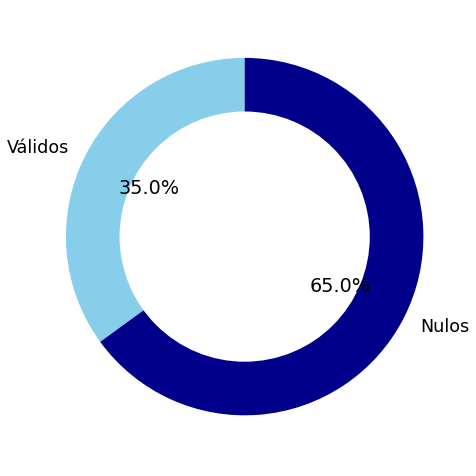

In [85]:
# Lateralidade e missing
sns.set_context("paper", font_scale= 2)
# Pie chartdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnkAAAGeCAYAAADooBcGAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABipElEQVR4nO3dd5xddbX//9fKTJiUIZ0MJCRBxQJXFBBQxILSvRas2EVEv4peK/aLoniv+lOuYsPrVSlewYbtYlewi3RFBFSQBAJMSEJ6ZshM1u+PvQ85s+fMnPY5e5/9mffz8TiP5OzZZa2ZZGbNp5q7IyIiIiJxmVZ0ACIiIiISnoo8ERERkQipyBMRERGJkIo8ERERkQipyBMRERGJkIo8ERERkQipyBMRaYOZnWlmXvW6Pcdn35559pl5PVtEul9v0QGIiEzEzAx4EPBIYC9gPrATuA9YC1zj7quKi1BEpHupyBORrmJm+wFPA54KPBHYvc75dwEXA59z99s6H6GISDmou1ZEuoKZvc3MbgD+CnycpNCbtMBLLQHeBvzdzD5mZn0dDFMaYGbnZ7qRf1l0TCJTkYo8EekWbyHplm3VNOB04A9mtiBMSCIi5aXuWhHpZuuA3wC/Bm4D1gA7gAHgcOClwIrMNQcBPzazI919W46x5s7d9yk6BhHpXiryRKTbjACXAl8CfuTuoxOc94N0NunpwFmM/X52KPAe4N87GKeISFdTd62IdIsR4ELg4e7+bHe/dJICDwB3H3H3jwCvrPHh081soBOBioiUgYo8EekWT3T3V7QyQ9bd/xf4euZwH/CsIJGJiJSQijwR6Qrufkebt/hkjWPHtHlPEZHS0pg8EYnFlcD9wG5Vx/YuKJZxzGwF8FhgGUkr4zrgDuA37r65wLimA48gmdm8iGTZGge2AuuBfwJ/c/d7i4qxlnSh7IOAfYHFwBySeNcAN7j73zvwzL2Ax7FrYe4twK3AH/P8/JhZP3AY8LA0DiNZHPzb7r62zrXTgAcD+wFLST5vPSQLjK8D/uzut3Qu+jFxHAIcAOyRHr4HuMrdb2ziHgcBjyL5N7AzvcfV7n5T8KDLyN310ksvvR54ASeT/JCvfv0QsCbv8wiSH4LV97kDWNTB2O/OPO+WHD5fZ2aeeXvm488C/ljjc1p53Q98F9ivhWffnrnXmU1c+xjgAmDTJLFVv24DzgeeAUyvcb9fNnifiV7nNxj3Q4HzSIq5ye53K/ARYEGAr/EJJDO8Ryd41ijwY+DxVdccWeO8feo8Z58a1xxZ9fFDgG8DwxPEceQE990beBPwf8DGBr4Wa4DPAw9p8fOV/bdwftXH+oEP1Pn6XQ+cMMn9+0kmVa2e5B43Ac/s9P//bn8VHoBeeunVfa/0h2j2m+a7mrh+JnBD5vodwBM6GHMPScFU/cwrcvhcnZl55u3p8dnANxr4gVr9+XlZk8++PXOPMxu4phf4DBMXLI28xn0da/xgD1rkAdNJuuR3NHnf+4DTWvzazga+1sSzdgL/SdKydmSNj+9T53n71LjmSJKhVf/ZwNfsyBr3vCCNq5WvyQjwIWBak5+37L+F89Pjj2b8v9nJXh+uce8DgX80cY9PdPp7QDe/NCZPRGp5PZDtMjnLzI5o8PrPMn5h4zPc/bdtRzax/UkKgWp3dvB5EzKzWcBPgOc3cVkvcIGZPbszUT3gYpKvb2m+/5vZ7iStyW+i+WFG84DPmtkn0i7eRp85G/gBcFITzzLg3cB/NRVhfeem923la/YvJHG1ogd4L/DNZj53tZjZo0laQ1c0cdm7zOz0qnscQlJAPqSJe7zZzN7TxPlR0Zg8ERnH3beZ2fOBq0haMyD5fvE1MzvIJxn3Y2YvZ/ySJj8CPtqRYHd5eY1jl3X4mRP5MlApiHeQdLH9mGR822aS8UNPAl4DLKy6zoBzzeyX7n5f6KDSr83zMod3knx9fgrcQjKubQfJ2LwFJGO3DiSZxDLZTiK/IhkXBkm3YvUP87Xpxydz1QQxG3AJcHSND19B0tJ2Yxr3AMm4x5eQjNWr9maScYaNrp14HvDkGsd/TzKT+0aSVsI9gIOBF5GML6s8q6fB59TzKpJFvytuAL5F8vlaQ/J1WgE8l6TlbTKrgMuBv5B8rTeQ/HucQTIe8wCS7vjDM9c9h2Tdyf9oMYe5wPdIxv9BMmzjIpKFzgfT5z+SJNdDMtf+h5l9l2RYwXfTe0HyC1zlHveQjHN9JHBqjXu8z8y+6R0Yp9n1im5K1Esvvbr3BbyM8d0fE47PIykIsuPw7qSD4/DS584nGTRe/dxRYO8cPkdnZp5b3TV2BfDQSa5dAPyhxuf47Q0++/bMdWfWOf+6zPm3AQc0+Kwe4CkkBcbj6px7fuY5v2zj8/u2Gp+fzcCLJrlmOvDBGteNkizVU++Zz61x7RbgpEmumQa8kaTQqjwrRHdt5TVEUsA0Ozb2hyS/YO3fxDWHk4xpq37+DmBZg9f/cpL/E2cDMyf5HJ5dI/f/ISmsK+8/Xucen6hxj8+3+m+wzK/CA9BLL726+wV8scY3zHHj84BZJC0E2R8MHRuHV/XsL9SI8eKcPj9nTvBD+XfArAauX0zSIlR97V8bfPbtmevOrPOcbIxHdOhzcn7mOb9s8T7zSVrfqu81DDylwetPr5Hz9XWumUbS4pr9d/zUBp/58gn+PbRT5I0yyUSEOvdsqiisum4hyeSV6jg+2uC1v5wgj7MaiZfkl6Pq66rH2k74bzxzjysz97gP2K0T/967+VWaMRkiUph/I+kiqnaWmT0hc+xzJON/qnV6HB5m9izg1ZnD24F3dfK5dWwjaWmqu3euu68hGXNVbT8zWxQ4pmWZ9/e5++8CPyO0V5P88lDtI+5+eSMXu/vHgZ9nDj/azI6c5LITSIqtap9y94a6/t39QuA7jZzbhM+4+49audDTqqeF69YBb88cfmEr90pdRfILUb3nOklLXLXKWNs/krTQNnKPszOH55FM/JhSVOSJyKTcfTvJBIItVYd7gYsrhYiZnQy8InPpj+nwODwzezjJ7MGsd7r7yk4+u44L3H1VE+fXKgoODhVMKtQYsTy9KvN+PfDhJu9xeo1jp05y/ssy7++n+bFo72/y/MmM0vnxrBP5AWPH+S03syUt3uvDXmebwio/Iml9y/qIu+9s4h5ZBzV4bTRU5IlIXZ4sjvr/Mof3Bi40s0eSzKattppkOZCWWhEaYWYLgUvZNRC74nskS4QU6RtNnn8DybilatmWt3atzryfb2bPDPyMYNJ9hx+WOXyxuw81cx93/xNwTebwEye5JDuD/Efuvr7JZ94A/LmZayZxmbvfFeheTXH3YZLJHdUe08KthkgKxkafu4nxM+NbuUd2F53ljV4fCxV5ItIQd7+IZOxbtRNIZhtWd6mNknRVTrryfjvS5S0uZfwMyr8Ar+hkcdkAJ+lWavyCpHDZlDmcLV7b4u6rSWZUVrvIzP4tXfKl22RneAL8rMV7/STzvmaLVHosu0tKq8MNQg1TaOrf0mTMrNfMjjezj5jZD8zs72a2xsy2m5nXegHZz9Mete5dx/Xufn+T12R3ELnO3Xe0eY85Nc+KmIo8EWnGm4A/ZY7tnnl/hrv/plMBmFkfSffm4zIfug04zt03durZDdqYdnE3K7u1WX+IYDL+v8z72cCngLvN7GtmdoqZPbQDz21FrTiubfFeta7LthICPKjGsVZb5EK15N3c7g3MrM/M3gvcRdKN+U7gaSS/JO1BsoRJo+a3EMLdLVyzJfP+ngD36MT/qa6mdfJEpGHuPpSun3cN44s7SMbhfaRTzzezXpKlFI7JfGg1cHRR3VoZ2Ra5RmW7a4P/Eu7uX04nzGTXMZxDsujvSQBmtpZkdvCvgJ96g3uJBpYtJpzxXc6NqrUodq1iZV6NY63uSRuqJXtDOxeb2T4kLZm1itpWtFIotbI3c7Y1PsQ9plzDloo8EWmKu//dzL7F+ELhfuDkTnWVppuRf4VkL9hqa4Cj3P2fnXhuC4rsKq7L3U8xs+tIZjpOtLjxIpLP87MAzOxGkhnAX0zHaeUhW4RtbWLQfVat1t1auc+rcayV4gJaL/aztrZ6oZntSVKoTzQWbTtJAXxX+vchkuEW1U5g7HCMVna+CPF/oqv/X3UrFXki0hQzO4rxM2kBdiPZweGsDjzTgC8xfgmH9SQteNmxZjIJd/+0mV0AvJjkc3o4yddvIv9CMpnldDN7ibv/Pocws8VE6B/yte5Xq4Cd7PMymVavC+njjC/w7iGZKHUp8Od6hbOZraxxDymJKdd0KSKtS1sGvsrE3zveb2ZP7sCjzwVOzhzbRDIGL7uGnzTA3Te5++fd/UiSFqynkiz98TMmbr3aB/iFmT0+hxCzM1r709bcVtSaxHJfjWMbahxrdbB+oYP8027al2QOX02yw8mH3P36BltGg04AknypyBORhqQ/YL9Ksj9oteolLXpI1s9bHPC55zB++ZatJDsAXB3qOVOZu29398vd/YPufixJV+mTgHMYX/jMAM5Lx0d2UrYIM8bP9GzU0gbuD7XH0T24xWc+pMXrQnlG5r0DL21m1ruZTWcKzkiNiYo8EWnU+0hae6p9mvEL1u4FfKWNVpcHmNlHSfYDrbYdeEZOXYZTkruPuvtv3P3NJMVKdumShzH+30JotTaTb3WB6Fpru/2txrG/Mr7LttVnFr3wbvb517QwrOFgWhuDJ11CRZ6I1GVmTwHOyBy+Bjg9XT/vi5mPHQu8u81nfgB4R+bwMPDsRre1kvalCwG/hGRiTbXstnbVst2ArRQKtYr4o1u4D4yfjb2y1kzsdC236zOHsxN96krXHcw+M2/Z1vTbWrjHUSECkeKoyBORSaU7D1zE2O8XG4EXVC1w+kbG72/7ATN7UovPfCdJy2G1HcDz3T27sK10mLvfy/h13ybrks/u2TuzhWeuYfzizS9O10lsWLojy6GZw7+e5JLsdlj7mlmzrZYvpvYSQ3nKbmPXVPe6mfUwfpiElIyKPBGZUNU4vD0zHzrV3R9oGUgX/30BY5d7qIzPa2qFfDN7I+PX2hsh2UXj/5q5lwSVLa6yC81Wyy5Z0upYumwL8UKShXyb8fEG7pv92Ejm2Dlm1tBsWTObT/N73XZCdn2/Zrud345m1ZaeijwRmcy/M77L5rPu/q3sie5+M/C6zOElJOPzGuquM7NTgU9mDu8EXu7ulzQUsdRkZoea2f4tXrs/8MjM4Vpj5iqy492WprM9m/VFxq8T924zm2zv2QeY2VuA4zKHr3P3CVvy0u3fvpY5/EiSX1gmbQ0zs36SpUmCTTxqQ3aXj33M7DmNXGhmxwAfCB+S5E1FnojUZGZHMr7L9FrgbRNd4+5fAc7LHD4OeFcDz3sR8N+MHb/lwCnufnH9iKWOI4AbzezHZvZCM2uoO9HMDgC+x9ivywjJ1nITqbXf6ufMbGHD0QLuvoHkF41qM4BL051XajKz6Wb2fuDszIdGgX9r4NFvZfxM2+cAV5nZ0dlJRWa2m5k9l2TIQmV5mX808JxOupTxYyO/PNkSR2bWY2anpddWWi6zrZpSIloMWUTGSZdAuYix43o2ASc1sOPBG4DDSBbQrTjLzH7j7jU3bU/H/V3I+F881wDPMLPschDNeF06pkwSx6WvYTP7DckEmj+RfK4ry4rMBx6RnvevjP+6fCIdM1eTu99sZtcwdlbrCSR75N5AssNC9t/R5e7+2Rq3Owc4nrEtcnOAb5jZ70la3W4kWeplMcm/vZdSe+/b/3D3300Ud1X895rZySSF7PSqDx1IMtP4XjO7OX3mIpJ/69VLjdxBMvHom9lb13t2KO7+DzP7OvCiqsNzgcvM7HvAd0laXHeQfN4eS7Kt3SOqzj8feAqwIoeQpQNU5InIGFXj8PbKfOjV7l63dcLdt6WtLFcBs9PDPcDXzOzACdbpmknt70cDwHMbDr6202l9/9GY9ZHMVm12xuqPGT/Tupa3kxRE1b8oTCcZG1ZrfFjNMX7u7mb2PODbjJ+x+nh2tZzV818kW7k1xN1/YGYnkeyVPD3z4T3SVy2DJIVxrY9nJ6R02ptJPj/VRdo04NnpazK/B04DbupIZJILddeKSNZ7Gf+D/1x3/0ajN3D3m4DXZw4vBS5sdHyeBDfZRIlG7CDp/nxGI/vXpsvcnMT4nSua5u5bSAqnc2i++3ADcJq7v63ZfZXd/TvAIcAVDV7yE+CwdBeWWjtF1NpDt2PS1tZjab5Q+xZwbDqhSkpMRZ6IPCAdr/P+zOHrScYoNcXdLwAuyBw+geZnR0oA7v5FYBlJ68wlJF2mjbibpLh6pLuf7u4NF1npZJl9gFeSdP//mWSsW90isca9dqSLM+9PMu6zXuvsbcBHgYe4+7nNPq/quX8maQ07mmTMaCWHUZKi7VqSfX0f7+7Hu/uq9NJFmVttr1pyKDfu/jeSJWTex+SfMwd+AzzT3Z/v7tkJL1JC1uQvNiIiEgkzW0Iydu1BJOPwZpMseryZpAj8s7v/s7gIJ5a2CB8M7Esypmx3kjGFa4Ab0uKmMGZ2LvDaqkM3uPujiooHHhiKcRDwaJIitJdkrO1twJXNbHkm5aAiT0REJDAzu4Vk+7eKL7t7dgtAkY5Sd62IiEhAZnYsYws8aHxcn0gwaskTEREJJF0Q+RrGFnnbgSXpun8iuVFLnoiISIaZLTWzk9I9XBu9ZiHwf4xvxbtYBZ4UQUWeSHge6jUyMhLsXt3yUk7lecWYV6M53XDDDXcCX3vQgx40csYZZ/j111/vo6OjNc+9++67/eMf/7jvueeea4EjqbJw4UJWr159SjfkVLZXjHkFzqkuddeKhBfsP9WGDRuYN29eqNt1BeVUHjHm1WhOf/nLXzjggAPGHJs1axb77bcfCxcuZObMmWzYsIE77riD2267reY9pk2bxiWXXMKJJ54YIPKJxfh1gjjzCpxT3TVHteOFSBfbuHFjdN/klFN5xJhXOzlt27aNa665pqFz+/v7ueiii3jGM9rZka8xMX6dIM688s5J3bUiXWxoaKjoEIJTTuURY16N5rRgwQIOPrjW7muT6+np4SUveQnXXnttLgUexPl1gjjzyjsnteSJiIhkLFmyhGuuuYaVK1dy2WWXccUVV3DzzTezatUq1q9fz7Zt2+jt7WX+/PksXLiQAw44gCc/+ckcf/zxrFixoujwRQCNyRPpBI3Jm4RyKo8Y81JO5RFjXnmPyVN3rUgXGx0dLTqE4JRTecSYl3IqjxjzyjsnFXkiIiIiEVKRJ9LF1q6Nb79w5VQeMealnMojxrzyzklFnoiIiEiEVOSJdLH+/v6iQwhOOZVHjHkpp/KIMa+8c1KRJ9LFZsyYUXQIwSmn8ogxL+VUHjHmlXdOKvJEutjs2bOLDiE45VQeMealnMojxrzyzklFnkgXe/SjD8ZsetuvbrJy5cqiQwguxpwgzryUU3nEmFfeOanIExEREYmQijwRERGRCGlbM5Hwgv2nmjmzn6Gh4bbv474jQDRhDA0NRTegOsacIM68lFN5xJhX4Jy0rZlImfX09BYdQnAjIyNFhxBcjDlBnHkpp/KIMa+8c1KRJ9LFBgYWFx1CcIODg0WHEFyMOUGceSmn8ogxr7xzUpEn0sV6e9WSVwYx5gRx5qWcyiPGvNSSJyIiIiJt08QLkfCC/afq75/H1q1b275PN0282LJlS3TbFcWYE8SZl3IqjxjzCpxT3YkX8fUFiURkxoy+IEVeNxkeHo7uG3eMOUGceSmn8giZ1/DwMJs3b2br1q3s3LkzyD2rTZs2jdmzZ7P77rvT19c3aRx5fq1U5Il0MY3JK4cYc4I481JO5REiry1btnDvvffS29vLnDlz2Hvvvenp6QkQ3Vijo6Ns2bKFNWvWMDIywh577FGzmNOYPBF5wNy5c4sOIbgNGzYUHUJwMeYEcealnMqj3bw2b97M2rVrWb58OcuWLWPu3LkdKfAAenp6mDt3LsuWLWP58uWsXbuWzZs3jzsv76+VijwRERGJypYtW1i3bh3Lli3rWGE3kZ6eHpYtW8a6devYsmVLrs/OUpEn0sU2btxYdAjBzZs3r+gQgosxJ4gzL+VUHu3kde+99xZS4FVUCr177713zPG8v1aFD/gxs2nAU4EnAIuBLcDfge+4+9oiYxMpWoxjbWIcZxhjThBnXsqpPFrNa3h4mN7e3sIKvIqenh56e3sZHh5+YDJG3l+rIE8zs17gsKpDI+5+ZQPXPQ44D3hYjQ9/xsz+C3ifd9P6DyI5CrFvbbeZbOZZWcWYE8SZl3Iqj1bz2rx5M3PmzAkcTWvmzJnD5s2bH8gl769VqO7a44HfVL1Or3eBmR0O/IKkwLMar+nAO4DvpK19IlPO0qVLig4huNWrVxcdQnAx5gRx5qWcyqPVvLZu3do1S8r09/ePWQYr769VqOLpuewqzgA+O9nJZrYb8FVgZnrI2bWArFe9DDgB+HCgOEVERCRiO3fuLLyrtqKnp6cj6/I1KlSR9yR2FWnrgV/XOf9UYJ+qawzYAVwN/KXqvEqh9yYz2zdQrCKloTF55RBjThBnXsqpPGLMK++c2i7yzGwR8KD0rQM/8/p7pb2OXQUcwM+Avd39MHd/NHAAcGvV+dPTa0SmlMHBNUWHENzAwEDRIQQXY04QZ17KqTxizCvvnEK05GUnTVw/2clmtj/wL1WHNgAnVc+kdfe/knQBV3fbnhQgVpFSGR1VS14ZxJgTxJmXciqPGPMqXUseu1rxKq1yN9U5/9iqvztwgbtvyJ7k7jcAP6i6715mtqKNOEVKZ/ny5UWHENzKlSuLDiG4GHOCOPNSTuURY1555xSiyFuQeb++zvlPTv+sFG+XTHLuTzLvH9VoUCIiIiJTWYgib3bm/fjN2sY6gl0TLjYDv5/k3JvTPyvnx7eehIiIiEgHhCjyLPN++oQnJjNkF6VvHbiiziSN+zLvd28+PJHyWrVqVdEhBLdiRXyjLmLMCeLMSzmVR4x55Z1TiCIv23KX7b6t9sTM+982+azdmjxfpNRmz842lJdf9cKgsYgxJ4gzL+VUHjHmlXdOIYq87P6yD5/k3Mqki0rr32/q3Ht+5n18X3GRScyYMaPoEIIbGhoqOoTgYswJ4sxLOZVHjHnlnVOIIq+yeHGl2/XYWieZ2UyS3Ssq590PXFHn3osrl6d/ZrtvRaIWY0veli1big4huBhzgjjzUk7lEWNeeecUosi7mV1dtgackK6Fl/UqoLJjsAN/cPd6u68/OvP+ny1HKSIiIjKFtF3kufsI8F2SAs+BHuD7Zva4yjlm9nSS/Werd7n4WgO3f0zm/d/bjVekTNatW1d0CMEtWrSo/kklE2NOEGdeyqk8Yswr75xCLb18DvASdhV6DwZ+Z2aV7tX5VR+DZC29iya7oZn1k0zUqBSGd7n7PYHiFREREYlaiO5a3P1a4PPsaqWrFGYL0pdVHXPgTHev1zH9r0Bf1f3+ECJWkTIZGRktOoTgenp6ig4huBhzgjjzUk7lEWNeeecUpMhLvYlk94rqQq/6VTl+nrt/toH7ncyulj+AX4QJU6Q8BgYW1z+pZAYHB4sOIbgYc4I481JO5RFjXnnnFKzIc/dRd38+SXH2J5Kirvp1C/Aqdz+13r3MbD/guKprAf4vVKwiIiIisQs1Ju8B7n4hcKGZ7QEsI5mIsdrd72riNrOBt1S939Lk9SJRGB6uNwG9fGJc+y/GnCDOvJRTecSYV945BS/yKtz9XuDeFq+9Grg6bEQi5bNhw8aiQwhu7ty5RYcQXIw5QZx5KafyiDGvvHMKOSZPRAIbHo5vxXf9dl4eMealnMojxrzyzklFnkgXW758edEhBLdy5cqiQwguxpwgzryUU3nEmFfeOanIExERkWhMmzaN0dHuWH5qdHSUadOKK7VU5ImIiEg0Zs+e3TX73m7ZsqXQPcjN3eufJSLNCPafaubMfoaG2p9h674jQDRhDA0NRTfWJsacIM68lFN5tJrX8PAwa9asYdmyZR2Iqjl33HEHixcvpq8v2dsh8NfK6p3Qsdm1ZnYI8GTgIGA5MAfop/XWQ3f3hwQKT6QU+vpmBCnyukmMP5BizAnizEs5lUerefX19TEyMsLo6Gihu2aMjIwwMjLyQIEH+X+tghd5ZvZS4N3AI7IfavPWanKUKWfevLls3BjXMiobN25k3rx5RYcRVIw5QZx5KafyaCevPfbYgzvuuINly5YVUuiNjo5y5513sscee4w5nvfXKliRZ2azSLY1O5bxBV1la7OWb9/GtSKlVf0bYCyGhuJbFibGnCDOvJRTebSTV39/P+5eSKE3OjrKHXfcwcKFC+nv7x/zsby/VkGKPDPrAX4MHEFSkFUXdNVbk4mIiIh03O67746ZsWrVKnp7e5kzZw79/f0dKfhGR0fZsmULmzZtYmRkhD322GNcgVeEUC15bwGewNgWOwN2AtcBN5LsfrEFdbuKNGxwcE3RIQQ3MDBQdAjBxZgTxJmXciqPEHn19/fT39/P8PAwmzdv5s4772Tnzp0Bohtr2rRpzJ49e8wki1ry/lq1XeSZ2TTgHYwt7kaBTwJnu/s97T5DZKrq7S1u0HCndMv6VSHFmBPEmZdyKo+QefX19dHX18eiRYuC3bMVeX+tQrTkPQ5YRFLkVbpqX+Tu3wpwbxERERFpQYjFkKtn0TpwiQo8kTAWLlxYdAjBrV27tugQgosxJ4gzL+VUHjHmlXdOIYq8xemflckV3wxwTxERERFpQ4gi7/7M+9sC3FNEgK1btxYdQnDdMOMstBhzgjjzUk7lEWNeeecUoshbnXk/PcA9RYQ417+KcWX+GHOCOPNSTuURY1555xSiyLs6/bMyu3bvAPcUEeJsyStys+5OiTEniDMv5VQeMeaVd05tF3nufivwZ3aNyTum3XuKSGL58uVFhxDcypUriw4huBhzgjjzUk7lEWNeeecUoiUP4GPpnwa8yMz2DHRfEREREWlBkCLP3b8K/Dx9Oxs4L93qTEREREQKYO5hdhkzswXA5cABJOPzfgqc7O6DQR4gUh7Btu6bObOfoaHhtu/jviNANGEMDQ1FN6A6xpwgzryUU3nEmFfgnKzeCaG6a3H39cCRwM/SBx8L3GJmZ5vZEWY28WZuIlJTT0+o7aW7x8jISNEhBBdjThBnXsqpPGLMK++cgv4Ecff7zOx44LUke9fOAd6cvnaa2UZgM621dLi7PyRMpCLlMDCwmNtu+2fRYQQ1ODgY3fpXMeYEcealnMojxrzyzqkTzQQvBt5Isl5eZT9bgB5gQfpqRbAuMJGy6O1VS14ZxJgTxJmXciqPGPMqbUuemc0CLgaenvlQiOKsbr+ziIiIiOwSZOKFmU0DfsTYNfIqNw5VoLm7a8aulEGwVuf+/nlBFkTupokXW7Zsia4LJsacIM68lFN5xJhX4Jzq1lehWvLeQFLgVf9wM2AncB1wI3AvsIUu7XY1sxnAfulrEbA7SbzrgZuB69w9aDtruszMocAj02cayefpBuBqdx/V87r3eXmYMaMvul0vhoeHo/vGHWNOEGdeyqk8Yswr75zaLvLSH6zvZGzL3QjwCeAT7n5Pu8/oFDM7BHgGcBTwWCb/fGw3s+8D57j7H9p87hySz9lrSIqRWtaa2ReAj7r7Jj2ve56XJ43JK4cYc4I481JO5RFjXnnnFGIJlcOAvdK/G0mxd5K7v7NbCzwze46Z3QpcBbwPOIL6Be9M4CTg92b2FTOb2+KzHwfcBLyHiQsS0o+9B/hrek1L9Lywz8vb3Lkt/TPrahs2bCg6hOBizAnizEs5lUeMeeWdU4gi71FVf3fg2+7+nQD37aTDgAdP8nEH7gPun+DjLwWuMLPJiopxzOwI4BfAkhofHgJqrXq7FPiFmT2+mWfpeeGfJyIiUiYhirzKkiiVAYDfDHDPvG0EziMp3vYBdnP3Be7eB+wLvAPI7tzxCODSRrdvM7PFwCXArKrDO4CPp8+YRdJa+FDg7PRjFbOAS9J7NETPC/u8omzcuLHoEIKbN29e0SEEF2NOEGdeyqk8Yswr75xCFHnZ1q7bAtwzL38FXgUscfdT3P2r7r6yeoKFu9/q7h8j2a7tt5nrH0syDqwRZwEDVe+3A09397enz6j4h7ufDjwzPadiT+CDTeSm54V9XiFiHJMS4zjDGHOCOPNSTuURY1555xSiyFudeV+GZU5WAa8EHuXuX3b3bfUucPd7SSZp3J750DvrXWtmD06fV+297v7TSZ73Y+CMzOFTzOxBel6+zytSiH1ru01fX3w7HMaYE8SZl3IqjxjzyjunEEXetemfldm1ywLcs6Pc/XPufn6zS2q4+wbgA5nDK8zsgDqXvpVkB5CKfwCfauCRn0zPrZgOvKWB6/S8sM8rzNKltYYbltvq1dnfC8svxpwgzryUU3nEmFfeObVd5Ln730hmN1bG5B0zyekx+C7j1/p7dJ1rnpV5/6VGCsz0nC9nDp9Y7zo9L/jzRERESidESx7Ax9I/DXiRme0Z6L5dJ23NW5c5PGG+ZvYYYO/M4W808cjsucvM7GA9L5/nFU1j8sohxpwgzryUU3nEmFcZx+Th7ucDl6dvZwPnm1l8X51dpmfeT7aLx1My7+9x94Ynp7j7rYyf2ftUPS+35xVqcHBN0SEENzAwUP+kkokxJ4gzL+VUHjHmlXdOoVryAJ5Psn2UkXTZ/jDGFr10bbzsCrWTLfq8f+b9lS089o+Z9/vpebk9r1Cjo2rJK4MYc4I481JO5RFjXqVsyQNw9/XAE4HvkBR6RwE3m9l/mdkTzCyWaTLPrnHsmknOf0TmfStLzPyzzj31vM49r1DLly8vOoTgVq5cWXQIwcWYE8SZl3IqjxjzyjunICWlmWV/0DpJoTcHeFP62mlmG4HNTN69ORF394e0FWgY2XXxbnX3myc5/2GZ93e08MzsNdl76nmde56IiEgphWo33IddhV2lgKv8WZl120OyO8YCWtNKYRiUmb0cOCRz+L/rXDY/876V/Xzvzryfp+fl9jwREZFSCjkmD2oXYh7gVTgz2xv4RObwHcBnJ7lmJuM/x3UXXq5he+Z9r5nN0PM6+7xusGrVqqJDCG7FihVFhxBcjDlBnHkpp/KIMa+8cwpZ5FkHX4Uys+nA1xnfCvm6Ortl9Nc4NtRCCLWuma3ndfx5hZs9uyvDasvWrVuLDiG4GHOCOPNSTuURY1555xSquza7C0RsPgc8PnPsXHf/QZ3rarUOZff6bUStva1m6nkdf15L1q1bx9q1awHo7+9nxowZzJ49e8yA2xUrVjAyMsLg4OADa+EtXbqU4eFhRkZG2LBhAwBLluwFJNubVXa/SK5bw+joyJiJGatWrWL27NkPPK8SC8CGDRsYHExWjpkxYwZz585lxowZ42IaGhpi48aNDA0ldfDAwACjo8k606FyGh5OPv19fX0PrP7e29vLwMAAvb294+65detWhoaG2LJlCwCLFi0CoKenRzl1MKd58+axbt065aScCsmpt7eX9evXP3BP5TQ+p4c//OHUY+5d0RvatczsvcCHMod/Bxzl7pNuLGpmewDZhc5OSPdRbSaGE4AfZg7v4e5r9bzOPa8Nwf5TPfzh+/O3v/297fu47wgQTRi33HJLQ9+cyiTGnCDOvJRTecSYV+Cc6vZ0hh6TFxUzO5XxBd6NwDPqFXipLTWOtTL2q9Y1te6t54V9noiISGmpyJuAmT0X+Hzm8O3Ase5+XyP3cPftwM7M4VkthJPtShx193HjyvS8sM/rBpXu1phUuh1iEmNOEGdeyqk8Yswr75ziW046ADM7GriIZNmXikHgGHe/q8nbbWDshI1WdgHZK/N+siJTzwv7PMmYP+tRbV0/b34/G+5LGk7v2/bnECGJiEgNasnLMLPDge8Cu1Udvo+kwPtHC7f8W+b9shbukb1mskFael7Y5xVqZGS06BCCGx3NNsaWX09PT/2TSijGvJRTecSYV945qcirYmaPIhmQX71uxRaSwf03tHjb7G4YD27hHg/KvL9Jz8vteYUaGFhcdAjBLdoju/Vz+VVmu8UmxryUU3nEmFfeOanIS5nZQ4GfMnb3g2HgWe6e3dC+GX/NvD+shXs8NvN+sqJEzwv7PBERkVJSkQeY2TLg58BA1eER4AXuflmbt788835PM2u49Sk9dyBzOHtPPa9zzytUZf21mNw/3D3LuYQyY0ZXbpjSthjzUk7lEWNeeecUZOKFmbVbCDXC3f2o0Dc1s8UkBd7yqsM7gVe4+/cDPOIaYDWwtOrYC4CPNHj9SZn3d7r7NXpebs8r1IYNG4sOIbhNm1rZia67zZ0bXxc0xJmXciqPGPPKO6dQs2uPpLN7zFon7m9mc4GfAA/LfOg0d78oxDPc3c3se8BpVYdfZWYfc/dJR9WbWQ9wSubw9/S8/J5XtOHhrlzZpS1qySuPGPNSTuURY15559RN3bW57llrZrOAS4EDMx96h7v/d+DHfYKk+7diX+CNDVz35vTcipH0Xnpevs8rTPW2ZbFYsnd8a19Vb0kUkxjzUk7lEWNeeecUssirVaQ18/Iar44Ue2Y2HfgW8ITMhz7k7h8L/bx06ZXzs88ys2MmusbMjgPOyhw+z91v1fPyfZ6IiEgZhequvaDF6wyYS7Kg7YFAX3q8UuR9m85sN3UOcELm2K3AajN7bQv3u8Xd6w3ePwN4JlBZE2MWcKmZnQOcS7KbBiRLgrwWeBMwver6NcD7mohJzwv7PBERkVIx904OpWucme0GPAt4N0nB58A/gKe7e9DFas3sl8CTA97yAnc/uYHnPpFkDGB2Wy2AyuCrWh3220m2U/ttM0HpeWGf14Rg/6lmzuxnaKj9Gbbu4cbBtbvjRV/fdIbTcXmx7HgxNDQU5fihGPNSTuURY16Bc6rb09k1Y/Lc/X53/yZwKPApkuD3BX7dzBIZ3czdfwMcA9xd48MzqF2Q3A0c3UpBoueFfV4R+vri+gYHsFvf9PonlczQUHwTZCDOvJRTecSYV945dU2RV+Huo+7+ZpIxV0ayptl303F0pefuvwP2I1nyY/0kp65Pz9nP3X+v53XH8/I2b158SwjMmTOr6BCC27gxvqVuIM68lFN5xJhX3jmFGpPXCW8mGXO1APgXktmTZ4e4sbsfGeI+bTx/I/BuMzuDpOXyAKAy5fBe4C/AVe4+MsEt9LwCn5envr6++ieVjFryyiPGvJRTecSYV945dW2R5+6bzOxi4PUkLXpvIlCR1y3SouMP6UvPK9nzREREulnXdddmVM9YXWpmBxUWiUgBBgfXFB1CcGvvja8LZmAgu1NeHGLMSzmVR4x55Z1Ttxd5q9M/K7MVH11UICJF6O3tKTqE4Hp6uv3bTvNGRyfdbKW0YsxLOZVHjHnlnVO3f7fNjqGKr6wXERER6YBuL/KWZd7vLCQKkYIsXLiw6BCCm79g96JDCG7t2rVFh9ARMealnMojxrzyzqnbi7ynpX9WFvy7t6hARERERMqka4s8M3sk8ArG7h7wt4LCESnE1q1biw4huG3b4lsWob+/v+gQOiLGvJRTecSYV945dWWRZ2ZHkmxXVb2g1ibgiiLiESlKjOtEDQ+F22KtW8S29VJFjHkpp/KIMa+8cwqyTp6ZLW/ncqCfZFLFgcCJwBHpca/680vurjF5MqXE2JK3fVv7e/F2m9mzZxcdQkfEmJdyKo8Y88o7p1AtebcD/2zxdRvwZ+BnwMcYW+BVDAIfChSrSGksX97O70/dacnei+qfVDIrV64sOoSOiDEv5VQeMeaVd04hd7yw+qc0xNlV4BmwATje3TcEur+IiIhI9EKOyfNAL0iKOwN+Dhzk7n8OGKeIiIhI9Mzd659V7yZmocbK7QRuBn4FnO/uVwW6r0ie2v9PlZo5s5+hofbHsLmHm+wwf9aj2rq+r286w8NJPPdti+P3t6GhoSgHiceYl3IqjxjzCpxT3R7UUN21T2njWge2ABuBu9x9e5iQRMqvp6cXiGuiQozbmo2MZDfniUOMeSmn8ogxr7xzClLkufuvQtxHRMYaGFjMbbf9s+gwglq0eC6rbl9TdBhBDQ4ORrmmV4x5KafyiDGvvHOK71dqkYj09oacG9Udenp6ig4huBhbHCDOvJRTecSYV945qcgTERERiZCKPJEutnr1XUWHENzg3euLDiG4pUuXFh1CR8SYl3IqjxjzyjsnFXkiXWzGjL6iQwhut77p9U8qmeHhuCbHVMSYl3IqjxjzyjsnFXkiXSzGMXm9vfF924lx7BDEmZdyKo8Y89KYPBF5wNy5c4sOIbjd58S3H+WGDRuKDqEjYsxLOZVHjHnlnVNHmwnMbAFwMLAMmAv000Zh6e4fDBSaiIiISNSCF3lmNhc4FXglsF/g26vIkyll48aNRYcQ3OZNW4sOIbh58+YVHUJHxJiXciqPGPPKO6egRZ6ZPQs4Fxigge02mhRsqyiRsohzTEqoXRC7R4xjJyHOvJRTecSYV945BXuamb0UOJ9d3bEhi7LQBaNIKYTYt7bb3D8cbh/dbtHXF98saIgzL+VUHjHmlXdOQSZemNkjgC+n93N2FXiWvpxkb9o7gVUtvFamf4pMKUuXLik6hOAG9lpQdAjBrV69uugQOiLGvJRTecSYV945hWrJ+3B6r+ribgNJ1+13gBvcPb4mCREREZEu1XaRZ2b9wNNICrxKq90VwLPc/d527y8ylcU4Jm90dLToEIKLcewQxJmXciqPGPMq45i8JwLT2dWKtw54mrtvCHBvkSltcHBN0SEEt3ZNfDOGBwYGig6hI2LMSzmVR4x55Z1TiDF5y6r+7sAXVOCJhDE6GmNLnmbXlkWMeSmn8ogxr7xzClHkLUz/rMyA/XWAe4oIsHz58qJDCG7J3ouKDiG4lStXFh1CR8SYl3IqjxjzyjunEEVedkJFfP1LIiIiIiUTosi7I/N+9wD3FBEREZE2mHt7axab2XLgdnZNvHilu1/YZlwiZRZsIfCZM/uDLIjsHm4B4vmzHtXW9X190xlOF0S+b9ufQ4RUuKGhIWbMmFF0GMHFmJdyKo8Y8wqcU92NItpuyXP3VcCVVQ87vt17ikhi9uzZRYcQ3MxZ8a1iv3VrfPvxQpx5KafyiDGvvHMKsuMFyWLIkBR6zzGzBwe6r8iUFttvsQB9M6YXHUJwQ0NDRYfQETHmpZzKI8a88s4pSJHn7t8DvpW+nQ58xczi++kkkrMYW/JmzYrvW8OWLVuKDqEjYsxLOZVHjHnlnVOoljyAk4Hfk7TmPQ74qZktDXh/EREREWlQsCLP3bcBxwBfJyn0jgBuNrNPm9mTzCy+gTgiHbZu3bqiQwjuvvWbiw4huEWL4lv7D+LMSzmVR4x55Z1TkKWXzey2zKHKPrazgdPSl5vZRmATrc0+dHd/SFuBioiIiEwRofbX2IddhV2lgKv8aVV/zk9frQi2LIVIWYyMjBYdQnAxbmvW09NTdAgdEWNeyqk8Yswr75xCjsmD2oWYB3iJTEkDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU8idcusuyiciIiIi+QhV5H0g0H1EpMrwcPu7XXSb+4fD7b7RLWJczxDizEs5lUeMeeWdU5Aiz91V5Il0wIYNG4sOIbhNm7YVHUJwc+fG1wUNcealnMojxrzyzin0mDwRCWh4OL4V39WSVx4x5qWcyiPGvPLOSUWeSBdbvnx50SEEt2Tv+Na+WrlyZdEhdESMeSmn8ogxr7xzUpEnIiIiEiEVeSIiIiIRMnctQycSWLD/VDNn9jM01P4MW/dw4+Dmz3pUW9f39U1nOB2Xd9+2P4cIqXBDQ0NRjh+KMS/lVB4x5hU4p7pL16klT6SL9fXF9Q0OYLe+6UWHENzQUHwTZCDOvJRTecSYV945qcgT6WLz5sW3hMCcObOKDiG4jRvjW+oG4sxLOZVHjHnlnZOKPJEu1tfXV3QIwaklrzxizEs5lUeMeaklT0RERETapiJPpIsNDq4pOoTg1t4bXxfMwMBA0SF0RIx5KafyiDGvvHNSkSfSxXp7e4oOIbienvi+7YyOjhYdQkfEmJdyKo8Y88o7p/i+24qIiIiIijyRbrZw4cKiQwhu/oLdiw4huLVr1xYdQkfEmJdyKo8Y88o7JxV5IiIiIhFSkSfSxbZu3Vp0CMFt2xbfsgj9/f1Fh9ARMealnMojxrzyzklFnkgXi3GdqOGhcFusdYvYtl6qiDEv5VQeMeaVd04q8kS6WIwtedu3tb8Xb7eZPXt20SF0RIx5KafyiDGvvHNSkSfSxZYvX150CMEt2XtR0SEEt3LlyqJD6IgY81JO5RFjXnnnpCJPREREJEIq8kREREQiZO5edAwisQn2n2rmzH6Ghtofw+YebrLD/FmPauv6vr7pDA8n8dy37c8hQirc0NBQlIPEY8xLOZVHjHkFzsnqnaCWPJEu1tPTW3QIwcW4rdnIyEjRIXREjHkpp/KIMa+8c+rq77ZmttDMlldeRccjkreBgcVFhxDcosVziw4huMHBwaJD6IgY81JO5RFjXnnn1FIzgZntATwLOAbYG1gA3AfcCVwGfN/d7woQ3+eB56R/d1qMV6Ssenvj+yff09NTdAjBxdjiAHHmpZzKI8a88s6pqZ8gZjYDeA9wOtBX/SGSIuyxwHOBT5vZ14F3u/sdbcZYt89ZRERERMZquLvWzOYBvwTeC8wgKb4qL8+87wFeBNxkZqcFjVhkClm9OkSDeHcZvHt90SEEt3Tp0qJD6IgY81JO5RFjXnnn1FCRZ2a7Ab8ADmNXUVf9osYxA2aRtOpdYma7hw1dJH4zZvTVP6lkduubXnQIwQ0Px7eLB8SZl3IqjxjzyjunRlvyPgQcxNiirtJqtwMYBEaqjsHYYu9E4DdmtmeQqEWmiBjH5PX2dvV8r5bEOHYI4sxLOZVHjHl13exaM3sQ8FbGrv1lwNeBw4GZ7r4EmAk8CjibZBJGdbFn6cd+rVmyIo2bOze+mai7z4lvP8oNGzYUHUJHxJiXciqPGPPKO6dGfqU+reo8I2mxe5m7v8jd/+jpasruvtPd/+Lubwf2Bb7I2EKP9PhvzGzfYBmIiIiIyDiNFHkvYldrnANnuPtXJ7vA3Te4+2uAZwObKofT1zKSFr39W45aZIrYuHFj0SEEt3nT1qJDCG7evHlFh9ARMealnMojxrzyzmnSIs/MlgFLqg6tBD7e6M3d/XvA44DbGNuqtyfwKzM7qKloRaaYOMek7Cw6hOBiHDsJcealnMojxrzyzqleS95jqv7uwP+6e1Pfod39FpL18/7I2EJvIXCZmT22mfuJTCUh9q3tNvcPh9tHt1v09cU3CxrizEs5lUeMeeWdU70ib1H6Z6U4+0MrD3H39cBRwM8ZW+jNBX5mZk9q5b4isVu6dEn9k0pmYK8FRYcQ3OrVq4sOoSNizEs5lUeMeeWdU70ib37mfcubrrn7NuDpwPcZW+j1Az80s6NbvbeIiIiIjFWvyMt+vK1VTN39fpJtz77O2EJvFvB9M3taO/cXiU2MY/JGR0eLDiG4GMcOQZx5KafyiDGvbhuTd1/m/eJ2H+juo8CLgQsYW+jNAL5tZie2+wyRWAwOrik6hODWrolvxvDAwEDRIXREjHkpp/KIMa+8c6pX5N2d/llZ5+7BIR7qiVcCX2Bsobcb8HUze0GI54iU3ehojC15ml1bFjHmpZzKI8a8uq0l7y+Z90EnSLj7a4FPM7bQmw581cxeFvJZImW0fHl8G8Qs2XtR/ZNKZuXKlUWH0BEx5qWcyiPGvPLOadKS0t3/aWabSSZHGPBEM7PKLhchuPubzGwIeDu7FkzuAc4D4uurEhEREclBIzte/IZdLW0LgRNCB+Hu7wTOYmyL3jRggLF75oqIiIhIAxop8i5L/6wUW6d0IhB3fz/wbsYWejbxFSLxW7VqVdEhBHfXnWuLDiG4FStWFB1CR8SYl3IqjxjzyjunRoq8H1b93YBnmNk+nQjG3T8KvLn6UCeeI1IWs2fPLjqE4GbOim8V+61b49uPF+LMSzmVR4x55Z1T3SLP3W9m1wQMJxnH975OBeTunwL+HyrwRJgxY0bRIQTXN6Ot5Ta70tDQUNEhdESMeSmn8ogxr7xzaqQlD5I17e6qeh1pZks7FZS7fxF4GTCKumxlCouxJW/WrPgK1y1bthQdQkfEmJdyKo8Y88o7p4YWbHH3s4GzOxxL9pkXm9kvgJl5PldEREQkBl290qC7awkVmdLWrVtXdAjB3bd+c9EhBLdoUXxr/0GceSmn8ogxr7xzarS7VkRERERKREWeSBcbGRktOoTgYtzWrKenp+gQOiLGvJRTecSYV945qcgT6WIDA4uLDiG4RXvMLTqE4AYHB4sOoSNizEs5lUeMeeWdU5Aiz8wWhLhPnWe8o9PPEBEREYlFqJa868zs8ED3GsPMFpjZD4APd+L+It1seHi46BCCu394R9EhBBfjeoYQZ17KqTxizCvvnEIVecuAX5rZ2wPdDwAzezxwPR3YL1ekDDZs2Fh0CMFt2rSt6BCCmzs3vi5oiDMv5VQeMeaVd04hl1CZDnzEzJ4EvMLd17dzMzN7J3AWEN/IS5EGDQ/Ht+J7t7fkvXrxm5q+xnYz/P7xm/T8z5pzQoRUGLWklEOMOUGceZW1JQ+SbcgMeBptdN+a2UIz+yHwn3T5On4inbZ8+fKiQwhuyd7xrX3VtyTOb1UrV64sOoTglFN5xJhX3jmFKvIq/S+VQq+l7lszewJJ9+xx6X2qfzW+oP0wRURERKaGUEXeIcBf2VWYObu6by9tZPatmb0buAxYWnUfIykgT3b3UwLFKiIiIhK9IEWeu98MHAqcT1KYwa4i7QSS7tvH17rWzBaZ2Y+AD5F0z3rVtTcCh7r7hSHiFCmbVatWFR1CcHfdubboEIIbvmuk6BA6YsWKFUWHEJxyKo8Y88o7p2Bj8tx9KG1tO5mJu2/HrHVnZk8k6Z49lrHdswacBxyWFpAiU1JfX3wDj3frm150CMFN67P6J5XQ0FB8E3+UU3nEmFfeOQXf8SJtdTsMuImx3be9wIfT7ts9zOzfgV8ASxjfPftyd3+Vu28PHZ9ImcybF98SAnPmzCo6hOB6+uPcPGjjxviW8FFO5RFjXnnn1JEpYe5+k5kdCpwLvJyxXbAnAKuA3RjfencD8AJ3v6UTcYmUTV9fX9EhBKeWvPJQS0o5xJgTxJlX6VvyKtx9u7ufDJwCVFrkKoVeH2Nb7wz4IvBYFXgiIiIi7et4H4O7nw88FthSOcTYlr3twIvd/TXuHl/ZLtKGwcE1RYcQ3Np74+uC2bFutOgQOmJgYKDoEIJTTuURY15559TxIi9dPuWjwO4TnDIDeKyZxbmaqEgbenvj2/Clpye+8WsWX0oAjI7GV7wqp/KIMa+8c+rot6Z02ZTrSMbhVS9snF1m5Y3A78wsvvnSIiIiIgXoWJGXLpdyOcnyKZWizki6bc9jV9FXKfQOJVlP79mdikmkbBYuXFh0CMHNXzBRo3559c6Pr8UVYO3a+NY0VE7lEWNeeecUvMgzswVmdinwYZJdL6rH3/0JeIy7v4pk67I1jF1mZR7wLTM7x8zim4InIiIikpOgRZ6ZHc6u7tns8ihfAB7n7v8AcPdfAAeStPZlu2/fQNJ9+6CQ8YmUzdatW4sOIbht2+KbXzW6bWfRIXREf39/0SEEp5zKI8a88s4pWJGXds/+kl3ds5WCbSvwEnd/rbsPV1/j7oPA0cAHGd99ewhwrZk9N1SMImUT4zpRw0M7ig4hOB/2+ieV0IwZ8e24opzKI8a88s4pSJE3SffsDcAh7n7xRNd64kzgGGCQsd23c4FvmNmnzWy3ELGKlEmMLXnbtw3XP6lkRrfHWeTNnj276BCCU07lEWNeeecUqiXvaemf1d2zXyJZ3PhvjdzA3S8n6b69jPHdt6cBvw8Uq0hpLF++vOgQgluy96KiQwiub0mcK0CtXLmy6BCCU07lEWNeeecUeuJF9d6zr252cWN3X0PSoncmUBnkUin0DgoYp4iIiEjUQhZ5BtwIHOru/9vqTdLu2w+SFHv3sKtVT0REREQaFLLIOw84zN1vDnEzd/8lSfftL0LcT6SMVq1aVXQIwd11Z3xrXw3fNVJ0CB2xYkV869Mrp/KIMa+8cwpV5L3S3V/l7tsD3Q8Ad78XOBZ4P7u6b0WmjJ6e+MZ6RbmtWZxrITMyEl/xqpzKI8a88s4pyHdbd78gxH0muLe7+1nAUZ16hki3GhhYXHQIwS1aPLfoEIKbvjDOKm9wcLDoEIJTTuURY15551SaX6nd/ddFxyCSt97eGFvy4iuIrDfOocNqSSmHGHOCOPMqZUueiIiIiHQXFXkiXWz16ruKDiG4wbvXFx1CcPcPxtfiALB06dKiQwhOOZVHjHnlnZOKPJEuNmNGX9EhBLdb3/SiQwhu2m5xdtcOD8e3O4lyKo8Y88o7JxV5Il0sxjF5vb3xfdvRmLzyUE7lEWNeGpMnIg+YOze+mai7z4lvP8qe3eP8Vrphw4aiQwhOOZVHjHnlnVN8zQQy5ZlZD3Ao8EhgEcmuKfcCNwBXu/togeGJiIjkQkWeRMPM5gDvBF5DUtzVstbMvgB81N035RZcizZu3Fh0CMFt3rS16BCCG90c51rt8+bNKzqE4JRTecSYV945qciTKJjZ44BLgCV1Tl0EvAd4hZk9z92v6HhwbYhzTEp8BZGPeNEhdEScY0LLndOX93/1uGM7+nuZvqX57xWn/PV/QoTUMWX/WtWSd05xDiSRKcXMjiDZ47hWgTcE1JrOtBT4hZk9vpOxtWtoKL7ZZfcP7yg6hOB23h9nkdfXF9/s7hhzmrYjvl+cIM6vVd45qciTUjOzxSQteLOqDu8APg7smx6fCTwUODv9WMUs4JL0Hl1p6dJ6DZPlM7DXgqJDCG63gfhaHABWr15ddAjBxZjT/Qt3KzqEjojxa5V3TirypOzOAgaq3m8Hnu7ub3f3W32Xf7j76cAz03Mq9gQ+mGO8IiIiuVCRJ6VlZg8GXpk5/F53/+lE17j7j4EzModPMbMHhY4vhBjH5I2Oxje5WWPyyiPGnGxU//7KQmPyRBr3VqB6+4R/AJ9q4LpPpudWTAfeEi6scAYH1xQdQnBr18Q3Y3jHuvgKV4CBgYH6J5VMjDlN3xDfOFeI82uVd04q8qTMnpV5/6VG1sBLz/ly5vCJoYIKaXQ0xpa8+AaJx7ryolpSysF2qiWvLNSSJ9IAM3sMsHfm8DeauEX23GVmdnB7UYW3fPnyokMIbsneEy1hWF59S+L7YQSwcuXKokMILsachveIbxYqxPm1yjsnFXlSVk/JvL/H3W9r9GJ3vxUYzBx+attRiYiIdIk4f/2UqWD/zPsrW7jHH0lm21bs13o4IuXwhyc9s/5JqTWL5rJ+7cRjKA//9fdDhCQiHaKWPCmrR2TeN9yKV+Wfde5ZuFWrVhUdQnB33bm26BCCG74rvrGTAPM3bCk6hOBWrFhRdAjB9d0b36LpEOfXKu+cVORJWT0s8/6OFu6RvSZ7z8LNnj276BCCmzkrvvFDPTOt6BA64v7p8XX2bN0a4d7JfT1Fh9ARMX6t8s5JRZ6U1fzM+3tauMfdmffzWgulc2bMmFF0CMH1zZhe/6SSsb44i7yR6fEVD0NDQ0WHENzO3eL89xfj1yrvnFTkSemY2UzG/9vd1sKttmfe95pZV1VVMbbkzZrVVZ/iIHpmxfmtdHi3+AryLVvi64LeOSO+Yhzi/FrlnVOc35kkdv01jrXy61Gta+KrqkREZEoy9zgXUZR4mdkyIDsj4Sh3v6zJ+zwV+EXm8DJ3v7Od+ERERLqBWvKkjGq1wO3Wwn1qzQCIbxCIiIhMSSrypIxqDWpoZaBXrWviGwQiIiJTkoo8KR133w5kN0Cd1cKtZmbej7q7WvJERCQKKvKkrDZk3u/Zwj32yry/r7VQREREuo+KPCmrv2XeL2vhHtlr/t5iLCIiIl1HRZ6U1c2Z9w9u4R4Pyry/qcVYREREuo6KPCmrv2beH9bCPR6bea8iT0REoqEiT8rq8sz7Pc2s4da89NyBOvcUEREpLRV5UlbXAKszx17QxPUnZd7f6e7XtBeSiIhI9+gtOgCRVri7m9n3gNOqDr/KzD7m7qOTXWtmPcApmcPfCx2jTC1mtifwUGA5sIhki7ydJDPBB4Fr3D27U4uINMHMpgEHAvuTrKowg2Tv8jXArcCf3L2VvcyjpG3NpLTMbF+ScXTVv6y81d0/Uee6twEfrzo0AjzC3W8NH6XUYmYzgP3S1yJgd5KFqNeTTKq5zt1HiouwPjN7LHACcATJD51FDVx2J3A+8Hl3z7ZEi8gEzOwhwFuAFwELJjl1BLgW+AHwX+4+pRe4V5EnpWZm/wOcWnVoG3Ciu/9sgvOPA77D2IWQ/8fdX9O5KFtnZgbsSzKx5ND0z4MYu1vHSnffJ//ommNmhwDPAI4imfQyWU/CduD7wDnu/occwmuamf0YOK7Fy7cA73H3TwcMKVdm1gtcDTw6+zF3t/wjmpiZHUn7Y25/5e5Hth2MNCX9d/Z+4B00v33lfu6eXYkhV2Z2MnBe4Ns+xd1/2ciJ6q6VsjsDeCawOH0/C7jUzM4BzgVuT48/GHgt8CZgetX1a4D35RJpg8ysH3g3SVF3KDCv0IDaZGbPAT5Gc8vczCQZN3mSmf0v8AZ339iJ+DpkGNhM8u+x1m4s/cCnzGxfd39TrpGF82ZqFHgioZjZ7sB3gadOcEplOMRsau9FHquGezk08UJKzd3vAZ5H0vJTsRvwduA2kpa9bcA/gNMZW+BtB56b3qObLALeAxxDyQu81GFMXuA5yW4j90/w8ZcCV5hZI92hRVgFXEAyzvMQYHd3n+Hue7j7bJKupROAr5PkWu2NZvbaXKMNwMxWAGcWHYfEy8z6gEsZX+D9FXgrSQ9Hn7svdPcZJL/oPw34DNBt39NDug+4qtGT1V0rUTCzI4BvMn6rsoncDTzP3X/fuahaY2b7AP9s4pKu7q41s48A76w6tBH4NvAL4LfA6sr4u3TczXOAtzF+iZs/AkfUm1iTFzN7IfD3ZmZlm9nRJMMF+qsObwSWu/umwCF2jJn9H/D0iT5egu7avwP/1eRt7nL374eKSSZnZp8k6Xmpdibwn+6+o86100nG7v3M3e/uSIANMrOHA09p8fJ+kl6Qap9z99c3/HwVeRILM5sLvAt4DRMPzF0PfAH4SLd2/9Uo8raSDCS+Kn3tC5xV9fGyFHl/Bc4GvlZv9puZ7UFSCD4h86HT3P3cjgSaEzN7GXBh5vBL3f2rRcTTLDN7HskvVBXfBU6sPqcERZ7G13UxMzsUuIKxvY2nu/vZBYVUiAnG8z3W3a9s+B4q8iQ26UDdQ4ED2DXj8V7gL8BVJZi1uRj4ALuKur9Wt17V+I/f7UXeaSRd5l9pphXOzOYB1wH7VB3u6lwbkU6muZuxLZVfcPf/V1BIDTOzOSQz2pekhy4FLiHzg0hFnrTDzK4jmbFe8T13P7GYaIpjZpcDR1Ydutnd92vmHpp4IdFJi7g/pK/Scfc1wOuKjiMUd/9ci9dtMLMPMLaAWGFmB7j7DWGiy1+6xuNVjO3uXDLR+V3mP9kV63bgjcCTiwtHYpMW5AdWHdpBMnxjSjGz5Yz/v3VBs/fRxAsR6WbfZfxkhRhmdG7OvO/678VpF1r1Lx//4e7NjB0VacSrMu9/PEXXMH05UN0ivhP4SrM36fpvLCIydbn7BmBd5vCeBYQS2tLM+zsKiaJB6S4xX2DXz4y/MX5AuEhbzGwW8NzM4VKMVe2Al2fe/7yVBdRV5IlIt5ueeV/qgcTpUjCPyxxud6HeTnszY7vQXu/uEy15I9Kqgxm7UD3Az4sIpEhm9niSLRKrNd1VCxqTJyJdLC2I5mYOl3YNrHTSxTmMXbn/DpJlVbpSOjboA1WHvu7uU+4Hr+Ti0Mz7f7r7mJZ8M1sKPJykNXwHyaS6myPbJjDbireJFr9HqMgTkW727BrHGl6XrpukP5w+SbJ4d8UI8KoubxX7DMmOApCMJXxrgbEEk66ldiCwjGTR8U0kSyz9zd3vLC6yKe2QzPvrKn9Jl+55A/Akxo5Vq3z8JpKliT7t7ls7GWQnpYtAn5Q5/A13317r/HpU5IlIN8vuKXxr0XtRTiRdXuTFmcOzSFbiP4RkKYSeqo9tAV450T7L3cDMnkuy33DF+9z9rqLiCehQkkWos12DAJjZbSTLw3xSk0tytSzzfrWZzQf+h/Fj9bL2Az4MvNnMXuLuv+hEgDl4FuN3OmqpqxZU5IlIlzKzlzP+N/v/LiKWBi0m2S+5nq0kW5yd5e63dzSiNqT7hp5TdehPwKcLCie0WvsJV3swyfIwrzezc0kW4h3ufFhTXnZoxn3A9xm/KPpkBoAfm9nJZVlgPOMVmfe3uvtvW72ZJl6ISNcxs72BT2QO3wF8toBwQvshyW4eK4sOpI7/ZNcsYCfZbaQrtpTLUQ9JF+Hv00XKpbPmZd6/nrEF3i+B55Os1dhHMtP+ROAnmet6gS+Z2cGdCLJTzGwAODZzOLs7TlNU5IlIV0nHSn2d8VvTva7edmgl8XySrsDrzKwr1/xL18Q7rerQed24z3ML1pL80HwFyUzORSSTYOYBjwBOAX5a47qDge+a2Yx8wpyyZmfeL6z6+zvc/Snu/i13v9vd73f3QXf/nrsfT1IQVs+87wMuSCc7lcVLGNvD6qjIE5HIfA54fObYue7+gyKCaZS7/8PdrfIi+f46D9gfeCWQHSP0aOAKMzsq30gnl66J99/s+vmwnmTv4TK7i2TD+iXu/gp3v9Ddr3P3de6+w903uvst7n6eux9HstNAdrbm4cAH8w58ipmoS/zT7j7puozpzjofyRx+JGN3lul22a7aX7U7pENFnoh0DTN7L3Bq5vDvgLcUEE5bPLHR3W9y9/Pd/WjgOGBN1WkzgG+ny5R0izcBB1W9f5e7ry0qmBDc/W/u/jV339Hg+b8m+UUju1zPG8ysLFvQldGWGsc2Ae9p8PoPMPb/F8DL2oooJ2Z2IPCozOGWJ1xUqMgTka5gZqcCH8ocvhF4RiyD3t39p8AxQHW38xzgo8VENJaZLWPsmnhXAF8sKJxCufsqku7bajMZ39oi4WS3+wP4prvXKv7GSb9PZCdblGVv5ezaeFuBb7V7UxV5IlK4dKmOz2cO3w4c6+735R9R57j7n4GzM4efZ2YLa52fs88A/enfR0nGQZZ6h5F2uPuPGL8uY3ZgvIRT6/96szNLs+cvNrOu3grRzHoZv/zSJY0Wt5NRkScihTKzo4GLGLuG3CBwTCRrstWS3Wi8l+aWiQjOzJ4DPLPq0Gfd/fqCwukm/5d5n92VQcK5pcax25u8R63zu+EXqMkcT7L0S7W2u2pBRZ6IFMjMDge+y9htvu4jKfD+UUhQOXD3vzO2yxbgQUXEUqW6m/Ye4IyiAuky2cW3Z5tZzUWUpW031ThWqwt3MptqHMuuv9dtskMAVhFoP2sVeSJSCDN7FMmacdXLJmwBTnD3G4qJKlcbM++LLhx2r/r7nsBGM/N6L+C87I1qnHdmXkl0wPoax+bnHsXUcGONY/01jk2m1vm1Cr+uYGbzGLurDMCFoYZJqMgTkdyZ2UNJ1iObV3V4GHiWu/+xkKDyl10H8N5CopB6arUCZQt0CeMKkgkH1bJbndVT6/xunh3+QpI1/aq1tTZeNRV5IpKrdAbnzxk7BmUEeIG7X1ZMVPkyswMY/4091vGHZffQzPvt7p4tRCQAdx9i/O4V2TUz68meP+ju2aVwukm2q/b36XCOILR3rYjkJt0a6udA9bpwO4FXuPv3i4mqENnlEu4HflNEIFXey9gu20Ydzvh8Xpd5f3VLEXWHEzLv/1xIFFPHJcBzqt6/wMzemhaAk0oX8n5p5nDX/uKY9mg8LnM4yISLChV5IpILM5tL8lv6wzIfOs3dLyogpJaZWV+ra/elW4a9MXP45+7e7ADzoFrdzN3MhsgUee6eXQ6nlMzsCOCJmcPZliYJ65skO4s8JH2/kGQx5Pc1cO3pwN6ZY0GLpsCyrXhDJFs6BqPuWhHpODObRbJf64GZD73D3f87/4jadr6ZfSzdULxhZvZMkiKhejbxTpJWNOmAVvcuNbNFjC8QRkmW+5EOSXclyRZ07zGzSXeuSJcAOitz+Ep378qiPP13mc3pu+4edLynijwR6Sgzm06ycnt2HbgP1duPsovNJGk1WG1mPzOzfzOzx5vZnOqTzKzHzPY3s1PN7NfA9xg/M/PDWo+uo84xsw83U5Cb2f7Ar9jVmlTxZXevtZabhHUx8LOq9z3AhWZ2cfr/rAfAzKaZ2WFmdh7J95jpVddsIdkzuls9hbHDVqADrY7qrhXpQmZ2CHDIBB8+PPN+dzN77UT36oKus3MYP67pVpICacK4J3GLuwdZQyqAHuDo9AWAme0gWbJhN5LlHCZrSTrH3f+9oxHKHODfgNPN7HKSQvta4C/VXeRpgf54ktmOL2ZswQDJGm7vzCXiKc7d3cxeBPwSeGTVh16YvkbNbCPJzOee8XdgGHiJu/+107G2IdtVexdjC9sgVOSJdKenA+9v8NwFwLmTfLzoIm//GscewuQxT+YCAi0U2iHTqb/C/l3AG9z9OznEI4lekn2Dj6kcMLP7SRbbncXk6xTeChwf2xZ73czd15nZk0m6x4/LfLiH8UsQVawGntvNSzGZ2WzGTi4B+F93Hw39LHXXiog071SSyQYXAysbvGaYpDh9BfBQFXhdYTeSgnyiAq+y2POB7r4qt6gEAHdf7+7HAydRf4b2rcDbSf5vdW2Bl3ou4xdt7sgEEbXkiYg0yd3Xkuw/+xV4YGmYhwP7kBQNs0nW/tsEbCDp6rsxHVQu+foEyTZRTwYOprEdFO4CvgN8xt2z25pJztz9G8A30jU2DwNWkLS+bgTWAFe7+60FhtisbFft1Z3qWrZAO2eIiIh0tXRG477Ag0mW2pgPzCBpZb2PZGeEa9VqJ7FQkSciIiISIY3JExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERGRCKnIExEREYmQijwRERHAzM40M6963V50TCLt6C06ABGRqczMDHgQ8EhgL2A+sBO4D1gLXOPuq4qLUETKSkWeiEjOzGw/4GnAU4EnArvXOf8u4GLgc+5+W+cjFJEYqLtWRCQnZvY2M7sB+CvwcZJCb9ICL7UEeBvwdzP7mJn1dTBMEYmEijwRkfy8haRbtlXTgNOBP5jZgjAhiUis1F0rIlKsdcBvgF8DtwFrgB3AAHA48FJgReaag4Afm9mR7r4tx1hFpERU5ImI5G8EuBT4EvAjdx+d4LwfmNmZJK13ZzH2e/ahwHuAf+9gnCJSYuquFRHJzwhwIfBwd3+2u186SYEHgLuPuPtHgFfW+PDpZjbQiUBFpPxU5ImI5OeJ7v6KVmbIuvv/Al/PHO4DnhUkMhGJjoo8EZGcuPsdbd7ikzWOHdPmPUUkUhqTJyJSHlcC9wO7VR3bu6BYcpUuGr0ceATJRJS5wHRgA7AeuAm4wd13FhVjNzGzXpJxm8uBPYA5JJ+ne4Fr3f2fBYYnOVGRJyJTjpmdDJyXOfwj4F/d3Zu4zyOAq4HZVYfvBA5y97Xtxpnl7jvNbD2wZ9XhjiylYmZHApdnDp/o7t9r455fB15QdegeYO+JxiWa2ULgOcCxwJHAojqP2GhmPwT+P3e/vtU4m5FOjHl/1aGV7r5PC/e5nbGzqD/g7me2cJ+jgDeQLLQ9Z5Lz/kEyPvQT7r6l2edIOai7VkSmHHc/Hzg/c/gE4J2N3sPMZgLfZGyBNwK8qBMFXvrMHmBh5vB9nXgW8CuSJV2q1Zr80RAzmwc8M3P4K5MUeB8iKQK/ADyP+gUeJK17LwKuM7MvTqVFo83sYWb2M+DnwIlMUuCl9gU+CNxmZs/ucHhSEBV5IjJVvR64MXPsLDM7osHrP8v4hY3PcPffth3ZxPYn6aKsdmcnHpS2aF6QOfw0M9ujxVu+CJiROXb+JOc/gvZ6m14FXG5m2WdGx8yeDFwBHN3C5XsA3zKzt4aNSrqBumtFZEpy921m9nzgKna1xvUCXzOzSbtbzezljG/V+hHw0Y4Eu8vLaxy7rIPPuwA4E7D0/XTgJdSeAFLPyZn3f3T3vzZ47RqSPG8gGXu3HtiUxrMA+BfgOJIuyp6q6w4HPg28uoV4S8HMngT8lLHjNCEp/r8B/BG4C9gKzAMOIJmR/dSqc6cBZ5vZSne/pNMxS35U5InIlOXuN5nZ60jGJlXsDVxoZjXH55nZfsDnModXAy9vZjxfs8xsPnBK5vBO4Pudeqa7rzSzy4Cjqg6fTJNFXvo5OyxzODsmMmsjcC7wZeCaOp/bH5MUKfsDXyQp7ipONbMvufsVzcRcBma2GPgaYwu8zSSLZ39pgq7wy4FPpa1/F5Hsi1zxZTO7MsAscOkS6q4VkSnN3b9CsvNEtZrj88xsFrXH4b2wU+PwqnyU8ZMsvuHuHemurZItxh5tZgc1eY9sq+cQSXEymVPd/TR3v7rR4jltGTyKpOuy2lsaC7N0PgXsVfV+PfAkd/9CA4ts/wo4gmS2bcUc4O3Bo5TCqMgTEYF/I+kKrHaWmT0hc+xzJF2D1To9Dg8zexbjuxy3A+/q5HNT3yZpVat2cqMXp5NFXpq9p7tn7zlGq62i7r6dZLxltRNjG5tnZvsCz88cfk0zs4rd/XbgzZnDr0onyUgEVOSJyJSXFgbPB6qXkugFLjazRfDAsiuvyFz6Yzo8Ds/MHs74CRAA73T3lZ18NjzwucnutPFiM8tOAJnIcYxtbYL6XbVtcfdrgeoux92Agzv5zAK8ibE/w69scTzd14C7q97PIlmuRiKgIk9EBHD3W4D/lzlcGZ/3SJLZtNVWAy/r8Di8hcClJEuDVPse8JlOPbeGbFG2CHh6g9eenHm/is5OFqnIjit7TA7PzNPxmfcXtXKTdPHoX2YOP6mVe0n3UZEnIpJy94tI1mWrdgLwe5IWjopROrgeHoCZzSYp8PbNfOgvwCs6WVxmpZMWbs4cPrnedelkkezaeBc0uyuFJZ5oZh80s++a2c1mdo+ZbTMzr/UCHp+5TatLv3QdM1vC+H8XV7dxy+y4zv3auJd0Ec2uFREZ603AY4FHVx3bPXPOGe7+m04FkC7i+x3gcZkP3QYcV288W4ecx9iu6aeZ2WJ3XzPJNS8GqhckrrX23oTMbBrwGuDdJNtztWN+m9d3k1pdz79Ndn4LIrvgtpSUWvJERKq4+xDJ+LzNE5zyY+AjnXp+uufo14FjMh9aDRzt7nd16tl1fIWkBbOil/ETKrJOzrz/tbvf2sjDzGwB8DuSZVTaLfAA+gPco1s0svtHO2IqiKc0teSJiGS4+9/N7FuMX/rjfuDkTnWVpi1XXyFZrLbaGuCoIjeVd/e7zewnwNOqDp8M/Fet89M16w7JHG5owkW6VM1ljG1NrXY/SdG7mmSR3+2MLUABnszYYihYM1cX6HRLW6OTaqTLqcgTEclIN3nPzqSFZJbma4CzOvBMI1mv74WZD60nacG7JfQzW3AeY4u8A8zs4HQ2a1a2QN4CfKvB57yH8QXeRuC/SZZ0udbdd0x2AzP7FfFOIMjubgHJ5yXULx+TdcFLiajIExGpYmZ7Al9l4uEs7zezX6eLyYZ0LuO7NzeRjMHLruFXlO8D6xjbknQyMKbIm2BtvG+6+9Z6DzCzmYxfvPifNN+SmZ2R3O2aaWlcX+PYG919dahgJA4akycikkq7S78KDGQ+NFT19x6S9fMWB3zuOYxfvmUrcIK7tzNrMih3v5/xS3W82MyyLUsnAHtmjjW6Nt7RjJ3JDPDaFrqqOz1urSLbetZqt3AzRWmtWd0PbvG5EjEVeSIiu7yPsRu3Q7LB/asyx/YCvpIWhW0xs48Cb8wc3g48w91/3+79OyBbrC0EnpE5dnLm/T+amI2c3TLtXuBnDV4LgJkNAEubuaYNWzLvm57gkbZezmniklpd909u9rkSPxV5IiKAmT0FOCNz+Brg9HT9vC9mPnYsydIe7TzzA8A7MoeHgWe7++Xt3LtT3P064E+ZwydX/pLOis0Wfec38YhsC+k/W5joclST57cju5zN3Ba2UHssTbQAuvtfgHsyh7OTdURU5ImIpC0/FzH2e+JG4AVpFyUkrW3ZsXEfMLOWBveb2TtJWg6r7QCe7+4/aeWeOcq25h2ffg4hWRuvuvt2J3BhE/fuybxvZex4du/aTsouJNwDPLLJe2T3oG3ETzPvDzGzo1u4j0RMRZ6ITGlV4/CyY8hOdffbKm/SPVxfQDJWrqIyPq+p3RTM7I2MX2tvhGQXjf9r5l4F+SrJMiYV1WvmnZw59+funt1ibDL3Zt7vl3ZnNsTMXsj43S466Zoax05s9GIzW04Du4fU8AnGjwc8x8yyC3fLFKYiT0Smun9nfPfeZ9193HIf7n4z8LrM4SUk4/Ma6m4zs1OBT2YO7wRe3uIG87lLt3O7NHP45HSP3+wesY1OuKjILscyk/Gf85rM7EDgc00+ry3ufi9wU+bw68ys7sSPdD3ArzF+okkjz72eZFeUavsDX0+3xGuamc0xs5e1cq10JxV5IjJlmdmRjO8yvRZ420TXuPtXGF+4HAe8q4HnvYhkrbfqgtCBU9z94voRd5Xs5+CRwKcyxzYA323yvpcxtrUU4MNm9oLJLko/fjm7dmsYafK57Tg/834B8J10796azGxfkngPTw+1ssbdG4G7M8dOAK5Mx5g2xMwOMbOPA6uA97cQh3Qpy3GPaxGRrpEugXI9yUzZik3AY9z9H3WunQVcCfxL1eFR4Eh3/+0E1wyQjN/KjjEbBGpe04TXpS1KuUm3X7uD8d3c1c5199NauPd/UntSy8+BbwA3ksxA3gM4kGRMW/XuGpeRfJ6rx0te4O4n13numYwtcla6+z4NxLuApDUvO2lkLUlR/2uSbuh+4CHA8cBz2fVv4Rskky9WVF37AXc/s4FnHwb8Cqg12eM6km34rkqfv4VkH+Z5wENJ9sB9Qua5t7r7vvWeK+WgxZBFZMqpGoe3V+ZDr65X4AG4+zYzez7JD89K11gP8DUzOzDtzsyaSe3vuQMkP/DbcTrjx7J1lLuPmNlXgLdPclqzXbUVHyKZvZzt+j06fU3mbyS7hnyzxWc3zd3Xm9lrgUsY20q7CHhv+prIH4BTSArXVp59ZTr55xJgWebDBzF+SRqZQtRdKyJT0XsZXyyc6+7faPQG7n4T42dxLgUubHR8XgQmK+JudPerWrmpu28D/hX4XZOX/gp4Yt6tmgDu/h2SrfCa6Sb+DnBsIzuB1Hn2VSStcl9l/B6+zdhIsj2aREJFnohMKWb2ZMaPO7oeeGuz93L3C4ALModPAN7ZUnAlkxa6f5zgw+e3ee9B4Ckk485W1jn9WpIC6ynuXti+q+l4zUeRFG+T7a17HclSOc9x9+xiyq0+e627vxR4OPBZ4NYGL11Jsmfy84E93T27bqOUmMbkiYhI1zOzfyEZd7eIpOt7M3A7cHU37tmaLmXyRGA5yUSMHSRjGK+sXpqnwzHsTdJdu4hkZ5I+ks/bRuA24KYJhhZIJFTkiYiIiERI3bUiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhIhFXkiIiIiEVKRJyIiIhKh/x/SblekkdI67AAAAABJRU5ErkJggg==
dims = (7, 7)
labels = ['Válidos', 'Nulos']
sizes = [train_df.LATERALIDADE.count()/100,
         train_df.LATERALIDADE.isnull().sum()/100]
#colors
colors = ['skyblue', 'darkblue']
 
fig1, ax1 = plt.subplots(figsize=dims)
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show();
fig.savefig('lateralidade.png', dpi=fig.dpi);

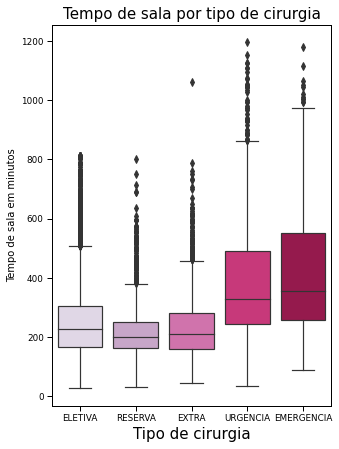

In [86]:
# Tempo por tipo de cirurgia
sns.set_context("paper", font_scale=1.0) 
fig, ax = plt.subplots(figsize=(5,7))
        
boxplot = sns.boxplot(y='TEMPO_SALA',x='TP_CIRURGIA', data=train_df, orient='v', palette="PuRd" )
boxplot.set_xlabel("Tipo de cirurgia", fontsize=15)
boxplot.set_ylabel("Tempo de sala em minutos", fontsize=10)
boxplot.axes.set_title("Tempo de sala por tipo de cirurgia", fontsize=15);


plt.savefig('tipo_de_cir_tempo.png')

In [87]:
anest = train_df[['ANESTESIA', 'TEMPO_SALA']]

In [88]:
for x in range(len(anest.ANESTESIA)):
    if (anest.ANESTESIA.iloc[x] ==  train_df.ANESTESIA.value_counts().index.tolist()[6])|\
        (anest.ANESTESIA.iloc[x] ==  train_df.ANESTESIA.value_counts().index.tolist()[7])|\
        (anest.ANESTESIA.iloc[x] ==  train_df.ANESTESIA.value_counts().index.tolist()[8])|\
        (anest.ANESTESIA.iloc[x] ==  train_df.ANESTESIA.value_counts().index.tolist()[9])|\
        (anest.ANESTESIA.iloc[x] ==  train_df.ANESTESIA.value_counts().index.tolist()[10])|\
        (anest.ANESTESIA.iloc[x] ==  train_df.ANESTESIA.value_counts().index.tolist()[11])|\
        (anest.ANESTESIA.iloc[x] ==  train_df.ANESTESIA.value_counts().index.tolist()[12]):
            anest.ANESTESIA.iloc[x] = 'Outros'

/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


KeyboardInterrupt: 

In [ ]:
anest

In [ ]:
# Tempo por tipo de cirurgia


sns.set_context("paper", font_scale=1.0) 
fig, ax = plt.subplots(figsize=(15,15))
        
boxplot = sns.boxplot(y='TEMPO_SALA',x= 'ANESTESIA', data=anest, orient='v', palette="PuBuGn" )
boxplot.set_xlabel("Tipo de anestesia", fontsize=15)
boxplot.set_ylabel("Tempo de sala em minutos", fontsize=10)
boxplot.axes.set_title("Tempo de sala por tipo de anestesia", fontsize=15);
plt.savefig('tipo_de_anest_tempo.png')

In [ ]:
anestesia = anest.groupby(by='ANESTESIA').describe()

In [ ]:
anestesia.to_csv('anestesia.csv', sep = ',')